In [ ]:
Proyecto Aprendizaje Automático: Predicción del Alzheimer

Santiago Valdez Bocardo

Sebastián Arturo Jácome Herrera

Este código realiza un análisis y modelado predictivo del diagnóstico de Alzheimer utilizando Machine Learning y Deep Learning.

Pasos principales:
1. **Carga y exploración de datos**: Se analiza la estructura del dataset.
2. **Preprocesamiento**: Se eliminan columnas redundantes, se codifican variables categóricas y se escalan datos numéricos.
3. **Balanceo de clases**: Se aplican técnicas de Near Miss y SMOTE para abordar el desbalance en los datos.
4. **Entrenamiento de modelos**: Se prueban modelos de Decision Tree, Logistic Regression, SVM y Neural Network.
5. **Reducción de dimensionalidad**: Se aplica PCA para mejorar el desempeño de los modelos.
6. **Optimización del mejor modelo**: Se usa GridSearch para ajustar hiperparámetros en la red neuronal.
7. **Evaluación y visualización de resultados**: Se calculan métricas como Accuracy, Precision, Recall y F1-Score y se generan visualizaciones de los modelos.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn import tree
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import layers
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import itertools

In [4]:
import warnings

warnings.filterwarnings('ignore')

Primeras filas

Mostrar las primeras filas del dataset para tener una idea general de su contenido

In [ ]:
file_path = "./alzheimers_prediction_dataset.csv"
df = pd.read_csv(file_path)
df.head(5)

# Conjunto de datos

Alzheimer’s Prediction Dataset (Global) es un conjunto de datos que contiene 74,283 registros provenientes de 20 países distintos. Este conjunto de datos es útil para modelos predictivos, estudios epidemiológicos e investigaciones sanitarias sobre la enfermedad de Alzheimer.



Atributos del Dataset


* Datos Demográficos:

Country: País de origen del individuo.

Age: Edad del individuo.

Gender: Género (Male/Female).

Education Level: Nivel educativo alcanzado (expresado en años de educación).

* Factores de Estilo de Vida:

Physical Activity Level: Nivel de actividad física (Bajo, Medio, Alto).

Smoking Status: Estado de tabaquismo (Nunca, Exfumador, Actual).

Alcohol Consumption: Frecuencia de consumo de alcohol (Nunca, Ocasionalmente, Regularmente).

Dietary Habits: Tipo de alimentación (Saludable, Promedio).

Air Pollution Exposure: Nivel de exposición a la contaminación del aire (Bajo, Medio, Alto).

Social Engagement Level: Nivel de participación en actividades sociales (Bajo, Medio, Alto).

Urban vs Rural Living: Lugar de residencia (Urbano/Rural).

* Factores Médicos:

BMI: Índice de Masa Corporal (IMC).

Diabetes: Presencia de diabetes (Sí/No).

Hypertension: Hipertensión arterial (Sí/No).

Cholesterol Level: Nivel de colesterol (Normal/Alto).

Family History of Alzheimer’s: Antecedentes familiares de Alzheimer (Sí/No).

Cognitive Test Score: Puntuación en pruebas cognitivas.

Depression Level: Nivel de depresión (Bajo, Medio, Alto).

Sleep Quality: Calidad del sueño (Buena, Regular, Pobre).


Stress Levels: Niveles de estrés (Bajo, Medio, Alto).

* Factores Genéticos y Económicos:

Genetic Risk Factor (APOE-ε4 allele): Presencia del alelo APOE-ε4 (Sí/No).

Income Level: Nivel de ingresos (Bajo, Medio, Alto).

Employment Status: Estado laboral (Empleado, Desempleado, Jubilado).

Marital Status: Estado civil (Soltero, Casado, Viudo).

* Variable Objetivo:

Alzheimer’s Diagnosis: Diagnóstico de Alzheimer, variable binaria con los valores:

0 (No): No se ha diagnosticado Alzheimer.

1 (Sí): Diagnóstico positivo de Alzheimer.




# Exploración de datos

Información General del Dataset

Análisis de la estructura general del dataset, incluyendo el número de columnas y tipos de datos

In [ ]:
df.info()

In [ ]:
df.shape

Valores Faltantes

In [ ]:
df.isnull().sum()

Datos Duplicados

In [ ]:
duplicated = df[df.duplicated()]
duplicated

In [ ]:
df.columns

In [ ]:
for i in range(len(df.columns)):
    ben = df.groupby(df.columns[i]).count()
    print("Column: ", ben.iloc[:, 0])
    print('\n')

There are 2 types of possible results:
* Yes with 30713 rows
* No with 43570 rows


Estadísticas generales

Visualización de estadísticas descriptivas para evaluar la distribución de las variables numéricas

In [ ]:
df.describe()

In [ ]:
df_processed.info()

Distribución de variable objetivo

Esto ayuda a identificar si la variable objetivo está balanceada o no

In [ ]:
print(df.columns.tolist())

– ¿Cuántos datos tienes, cuántas filas, cuántas columnas?

Hay 1857075 datos, 74,283 filas y 25 columnas.

– ¿Hay datos faltantes?

El dataset no muestra datos faltantes

– ¿Hay contenido redundante o duplicado?

No se encuentran datos repetidos en el dataset, sin embargo algunas posibles columnas redundantes son:

* Country: No aporta información para la predicción individual.
* Cognitive Test Score: Correlacionada con la variable objetivo.
* Employment Status, Marital Status, Income Level, Urban vs Rural Living:
 Podrían estar cubiertas por otras variables como Social Engagement Level o Education Level.

– ¿Cuál es la distribución de los datos en la clase objetivo?

Alzheimer’s Diagnosis (Variable Objetivo):
* No (sin Alzheimer): 58.65%
* Sí (con Alzheimer): 41.35%

La distribución no está completamente balanceada, pero no es un caso extremo de desbalanceo, así que se puede dejar como está

– ¿Existen correlaciones entre las categorías?

De acuerdo con la matriz, no hay correlaciones significativas entre las variables numéricas

Age, Education Level, BMI, y Cognitive Test Score tienen valores de correlación cercanos a 0 entre sí, indicando que no hay relaciones lineales fuertes entre estas variables.


Dado que no hay una relación fuerte entre las variables numéricas, no parece haber redundancia dentro de ellas.

In [6]:
df.drop(columns=[
    "Country",
    "Cognitive Test Score",
    "Employment Status",
    "Marital Status",
    "Income Level",
    "Urban vs Rural Living"
], inplace=True)


df_processed = df

label_cols = [
    "Smoking Status", "Alcohol Consumption", "Dietary Habits"
]

label_encoder = LabelEncoder()
for col in label_cols:
    df_processed[col] = label_encoder.fit_transform(df[col])

one_hot_cols = [
    "Gender", "Diabetes", "Hypertension", "Genetic Risk Factor (APOE-ε4 allele)", 
    "Alzheimer’s Diagnosis", "Family History of Alzheimer’s"
]

df_processed = pd.get_dummies(df_processed, columns = one_hot_cols, drop_first=True)

ordinal_cols = [
    "Physical Activity Level", "Cholesterol Level", "Depression Level", "Sleep Quality", 
    "Air Pollution Exposure", "Social Engagement Level", "Stress Levels"
]

ordinal_mappings = { 
    "Physical Activity Level": ["Low", "Medium", "High"],
    "Cholesterol Level": ["Normal", "High"],
    "Depression Level": ["Low", "Medium", "High",],
    "Sleep Quality": ["Poor", "Average", "Good"],
    "Air Pollution Exposure": ["Low", "Medium", "High"],
    "Social Engagement Level": ["Low", "Medium", "High"],
    "Stress Levels": ["Low", "Medium", "High"]
}

ordinal_encoder = OrdinalEncoder(categories=[ordinal_mappings[col] for col in ordinal_cols])
df_processed[ordinal_cols] = ordinal_encoder.fit_transform(df_processed[ordinal_cols])

In [19]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       74283 non-null  int64  
 1   Education Level                           74283 non-null  int64  
 2   BMI                                       74283 non-null  float64
 3   Physical Activity Level                   74283 non-null  float64
 4   Smoking Status                            74283 non-null  int64  
 5   Alcohol Consumption                       74283 non-null  int64  
 6   Cholesterol Level                         74283 non-null  float64
 7   Depression Level                          74283 non-null  float64
 8   Sleep Quality                             74283 non-null  float64
 9   Dietary Habits                            74283 non-null  int64  
 10  Air Pollution Exposure            

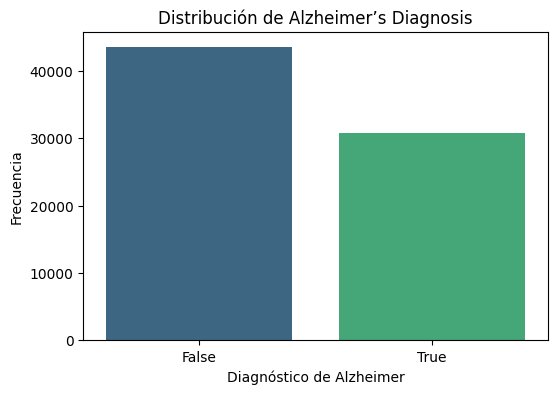

In [20]:
target_column = df_processed['Alzheimer’s Diagnosis_Yes']

plt.figure(figsize=(6, 4))
sns.countplot(x=target_column, data=df_processed, palette="viridis")
plt.title("Distribución de Alzheimer’s Diagnosis")
plt.xlabel("Diagnóstico de Alzheimer")
plt.ylabel("Frecuencia")
plt.show()

Matriz de Correlación

Se genera la matriz para analizar las correlaciones entre variables numéricas y detectar posibles relaciones

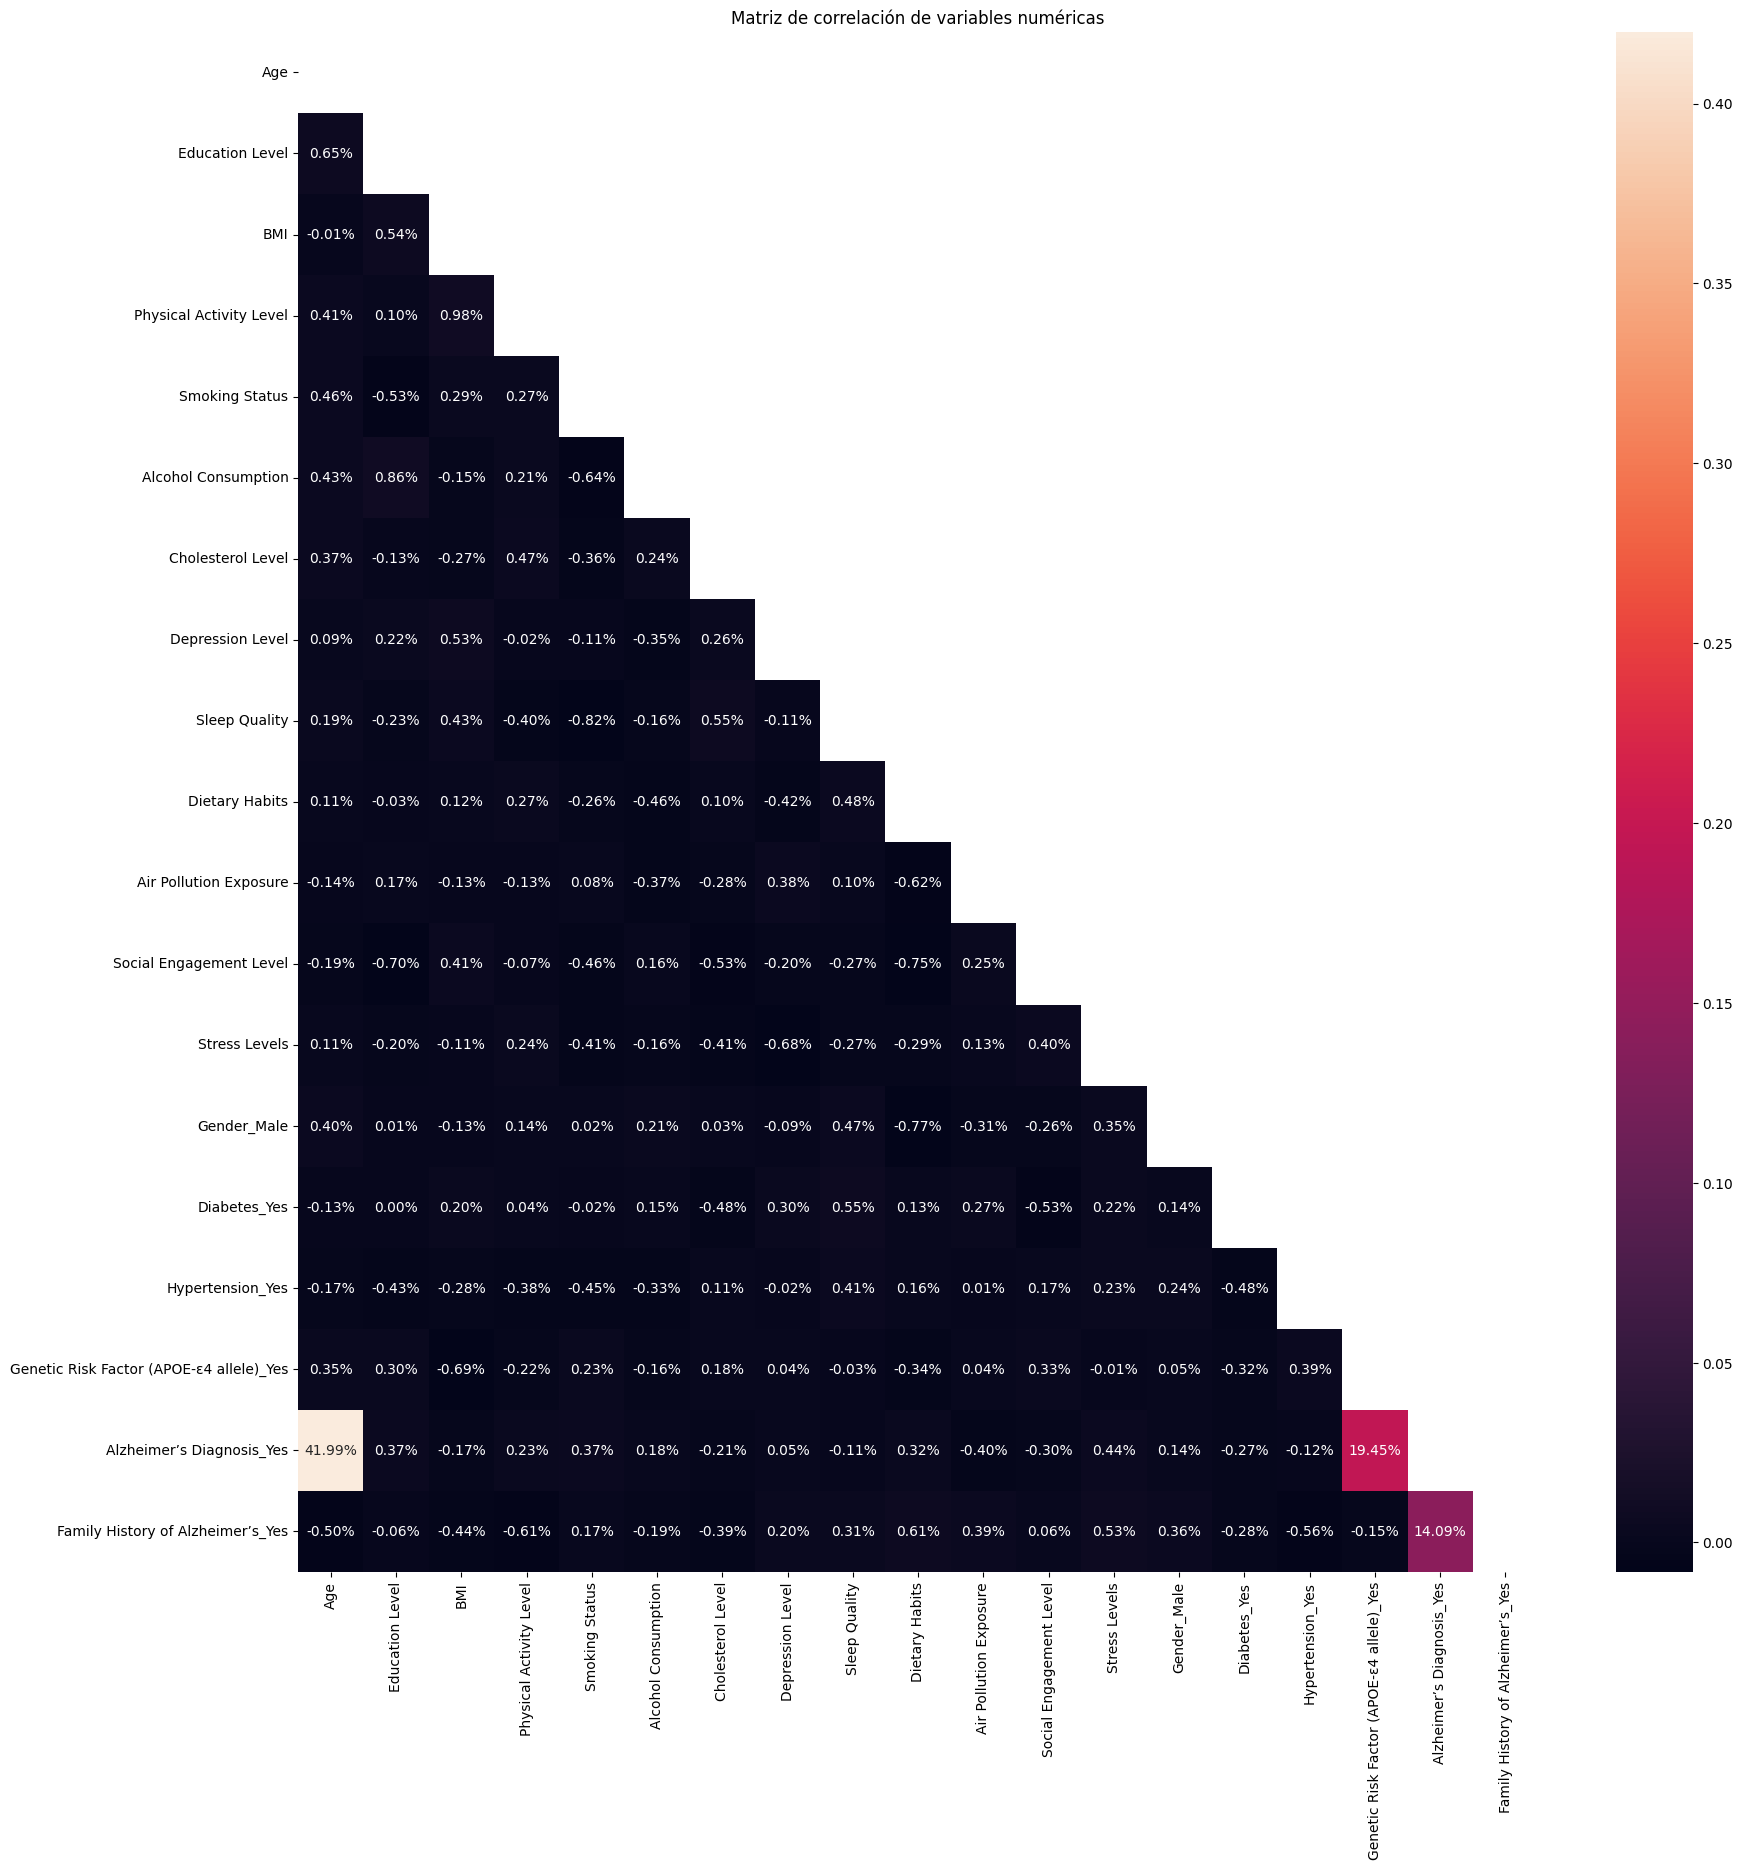

In [8]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_processed.corr(), annot=True, fmt=".2%", mask=np.triu(np.ones_like(df_processed.corr())))
plt.title("Matriz de correlación de variables numéricas")
plt.show()

Separación de datos

Se separan los datos en entrenamiento y prueba en una proporción 80%-20%

In [22]:
X = df_processed.drop(columns=["Alzheimer’s Diagnosis_Yes"])
y = df_processed["Alzheimer’s Diagnosis_Yes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Escalado de variables numericas

Se normalizan variables numéricas usando StandardScaler o MinMaxScaler para mejorar el desempeño de los modelos

In [23]:
numerical_columns = ["Age", "Education Level", "BMI"]
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [24]:
print("\n--- Información después del preprocesamiento ---")
print(X_train.info())
print("\n--- Primeras Filas del Dataset Preprocesado ---")
print(X_train.head())


--- Información después del preprocesamiento ---
<class 'pandas.core.frame.DataFrame'>
Index: 59426 entries, 14565 to 15795
Data columns (total 18 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       59426 non-null  float64
 1   Education Level                           59426 non-null  float64
 2   BMI                                       59426 non-null  float64
 3   Physical Activity Level                   59426 non-null  float64
 4   Smoking Status                            59426 non-null  int64  
 5   Alcohol Consumption                       59426 non-null  int64  
 6   Cholesterol Level                         59426 non-null  float64
 7   Depression Level                          59426 non-null  float64
 8   Sleep Quality                             59426 non-null  float64
 9   Dietary Habits                            59426 non-null

# Procesamiento

Aplicación de técnicas de balanceo

Near-miss
Reduce la cantidad de muestras de la clase mayoritaria

In [25]:
# undersampling
nearmiss = NearMiss()
X_train_nm, y_train_nm = nearmiss.fit_resample(X_train, y_train)

SMOTE

Genera nuevas muestras sintéticas para la clase minoritaria

In [26]:
# oversampling
smote = SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

Definición y entrenamiento de modelos

Se entrena y evalúa cada modelo con los datasets original, Near Miss y SMOTE

In [29]:
models = {
    "Decision Tree": tree.DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC()
}

In [30]:
results = []
for model_name, model in models.items():
    for dataset_name, X_tr, y_tr in zip(["Original", "Near Miss", "SMOTE"],
                                        [X_train, X_train_nm, X_train_sm],
                                        [y_train, y_train_nm, y_train_sm]):
        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results.append([model_name, dataset_name, accuracy])

Red neuronal

Se implementa una red neuronal con capas densas y dropout para evitar sobreajuste

In [31]:
def train_neural_network(X_train, y_train, X_test, y_test, dataset_name):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=0)

    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    results.append(["Neural Network", dataset_name, accuracy])

In [32]:
train_neural_network(X_train, y_train, X_test, y_test, "Original")
train_neural_network(X_train_nm, y_train_nm, X_test, y_test, "Near Miss")
train_neural_network(X_train_sm, y_train_sm, X_test, y_test, "SMOTE")

2025-03-05 21:15:18.631105: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-03-05 21:15:18.631315: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-03-05 21:15:18.631324: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2025-03-05 21:15:18.631580: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-05 21:15:18.631604: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


2025-03-05 21:15:18.983134: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


In [33]:
results_df = pd.DataFrame(results, columns=["Modelo", "Dataset", "Accuracy"])
print(results_df)

                 Modelo    Dataset  Accuracy
0         Decision Tree   Original  0.629737
1         Decision Tree  Near Miss  0.603756
2         Decision Tree      SMOTE  0.628189
3   Logistic Regression   Original  0.711584
4   Logistic Regression  Near Miss  0.697853
5   Logistic Regression      SMOTE  0.712324
6                   SVM   Original  0.717440
7                   SVM  Near Miss  0.698862
8                   SVM      SMOTE  0.713738
9        Neural Network   Original  0.713805
10       Neural Network  Near Miss  0.691189
11       Neural Network      SMOTE  0.710978


# Logistic Regression

In [41]:
# Under Sampling
undersampler = RandomUnderSampler(random_state=42)
X_under, y_under = undersampler.fit_resample(X, y)
print(len(X_under), len(y_under))
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=42)
model = LogisticRegression(class_weight='balanced' , max_iter=1000 , random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)
results.append(["Logistic Regression", 'Random Under Sampling', model.score(X_test, y_test)])

61426 61426


0.7069835585218949

In [42]:
# Over Sampling
oversampler = RandomOverSampler(random_state=42)
X_over, y_over = oversampler.fit_resample(X, y)
print(len(X_over), len(y_over))
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)
model = LogisticRegression(class_weight='balanced' , max_iter=1000 , random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)
results.append(["Logistic Regression", 'Random Over Sampling', model.score(X_test, y_test)])

87140 87140


0.7144824420472803

# Decision Tree

In [44]:
# Random Under Sampling
undersampler = RandomUnderSampler(random_state=42)
X_under, y_under = undersampler.fit_resample(X, y)
print(len(X_under), len(y_under))
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=42)
dt_under = tree.DecisionTreeClassifier()
dt_under = dt.fit(X_train, y_train)
dt_under.score(X_test, y_test)
results.append(["Decision Tree", 'Random Under Sampling', dt_under.score(X_test, y_test)])

61426 61426


0.6192414129903956

In [45]:
# Random Over Sampling
oversampler = RandomOverSampler(random_state=42)
X_over, y_over = oversampler.fit_resample(X, y)
print(len(X_over), len(y_over))
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)
dt_over = tree.DecisionTreeClassifier()
dt_over = dt.fit(X_train, y_train)
dt_over.score(X_test, y_test)
results.append(["Decision Tree", 'Random Over Sampling', dt_over.score(X_test, y_test)])

87140 87140


0.7168923571264632

# Redes Neuronales

In [46]:
# MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_processed)
df_scaled = pd.DataFrame(scaled_data, columns=df_processed.columns)


In [60]:
# Sin Balance
X = df_scaled.drop("Alzheimer’s Diagnosis_Yes", axis=1)
y = df_scaled['Alzheimer’s Diagnosis_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = keras.Sequential([])
model.add(keras.Input(shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=16, epochs=10)
train_accuracy = history.history['accuracy'][-1]
results.append(["Neural Network", 'Original', train_accuracy])

Epoch 1/10


   1/3715 ━━━━━━━━━━━━━━━━━━━━ 33:13 537ms/step - accuracy: 0.3750 - loss: 0.8062

   9/3715 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.4431 - loss: 0.7820    

  17/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.4358 - loss: 0.7768

  25/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.4337 - loss: 0.7714

  33/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.4355 - loss: 0.7657

  41/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.4351 - loss: 0.7614

  49/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.4353 - loss: 0.7579

  58/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.4363 - loss: 0.7546

  66/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.4378 - loss: 0.7521

  74/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.4392 - loss: 0.7499

  82/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.4403 - loss: 0.7481

  90/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.4416 - loss: 0.7463

  98/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.4436 - loss: 0.7445

 106/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.4456 - loss: 0.7429

 114/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.4476 - loss: 0.7413

 122/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.4497 - loss: 0.7398

 130/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.4518 - loss: 0.7383

 138/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.4541 - loss: 0.7368

 146/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.4564 - loss: 0.7353

 154/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.4589 - loss: 0.7338

 162/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.4613 - loss: 0.7325

 171/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.4640 - loss: 0.7310

 179/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.4664 - loss: 0.7297

 187/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.4688 - loss: 0.7284

 195/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.4711 - loss: 0.7272

 203/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.4733 - loss: 0.7260

 211/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.4755 - loss: 0.7248

 219/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.4777 - loss: 0.7237

 227/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.4799 - loss: 0.7226

 235/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.4822 - loss: 0.7214

 243/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.4845 - loss: 0.7203

 251/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.4868 - loss: 0.7192

 259/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.4889 - loss: 0.7181

 267/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.4910 - loss: 0.7171

 276/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.4934 - loss: 0.7159

 284/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.4954 - loss: 0.7148

 293/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.4976 - loss: 0.7137

 301/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.4996 - loss: 0.7127

 309/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.5014 - loss: 0.7117

 317/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.5032 - loss: 0.7107

 326/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.5052 - loss: 0.7096

 335/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.5072 - loss: 0.7086

 344/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.5091 - loss: 0.7075

 352/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.5108 - loss: 0.7066

 361/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.5127 - loss: 0.7056

 369/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.5143 - loss: 0.7047

 377/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.5159 - loss: 0.7038

 385/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.5174 - loss: 0.7030

 394/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.5192 - loss: 0.7020

 403/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.5209 - loss: 0.7010

 412/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.5226 - loss: 0.7000

 421/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.5242 - loss: 0.6990

 429/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.5256 - loss: 0.6982

 437/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.5270 - loss: 0.6973

 446/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.5286 - loss: 0.6964

 455/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.5301 - loss: 0.6954

 464/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.5316 - loss: 0.6945

 472/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.5329 - loss: 0.6937

 481/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.5343 - loss: 0.6928

 489/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.5356 - loss: 0.6920

 498/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.5369 - loss: 0.6912

 507/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.5383 - loss: 0.6903

 516/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.5397 - loss: 0.6895

 525/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.5410 - loss: 0.6886

 534/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.5423 - loss: 0.6878

 542/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.5434 - loss: 0.6871

 550/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.5445 - loss: 0.6863

 559/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.5458 - loss: 0.6856

 568/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.5470 - loss: 0.6847

 577/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.5482 - loss: 0.6840

 586/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.5494 - loss: 0.6832

 595/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.5506 - loss: 0.6824

 603/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.5516 - loss: 0.6817

 611/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.5526 - loss: 0.6811

 620/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.5537 - loss: 0.6803

 629/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.5548 - loss: 0.6796

 637/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.5557 - loss: 0.6790

 646/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.5567 - loss: 0.6783

 655/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.5577 - loss: 0.6776

 663/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.5586 - loss: 0.6770

 672/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.5596 - loss: 0.6763

 681/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.5606 - loss: 0.6756

 690/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.5616 - loss: 0.6750

 699/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.5625 - loss: 0.6743

 708/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.5635 - loss: 0.6737

 716/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.5643 - loss: 0.6731

 725/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.5652 - loss: 0.6725

 734/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.5661 - loss: 0.6719

 743/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.5670 - loss: 0.6713

 752/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.5679 - loss: 0.6707

 761/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.5687 - loss: 0.6700

 770/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.5696 - loss: 0.6694

 778/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.5704 - loss: 0.6689

 787/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.5712 - loss: 0.6684

 796/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.5720 - loss: 0.6678

 805/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.5729 - loss: 0.6672

 814/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.5737 - loss: 0.6666

 823/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.5745 - loss: 0.6661

 831/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.5752 - loss: 0.6656

 839/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.5759 - loss: 0.6651

 848/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.5767 - loss: 0.6646

 857/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.5774 - loss: 0.6641

 866/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.5782 - loss: 0.6635

 875/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.5789 - loss: 0.6630

 884/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.5796 - loss: 0.6625

 892/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.5803 - loss: 0.6621

 901/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.5810 - loss: 0.6616

 910/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.5816 - loss: 0.6611

 919/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.5823 - loss: 0.6606

 928/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.5830 - loss: 0.6602

 937/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.5837 - loss: 0.6597

 946/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.5843 - loss: 0.6592

 954/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.5849 - loss: 0.6588

 963/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.5856 - loss: 0.6583

 972/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.5862 - loss: 0.6579

 981/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.5869 - loss: 0.6574

 990/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.5875 - loss: 0.6570

 999/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.5881 - loss: 0.6565

1007/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.5887 - loss: 0.6561

1016/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.5893 - loss: 0.6557

1025/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.5899 - loss: 0.6553

1034/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.5905 - loss: 0.6548

1043/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.5910 - loss: 0.6544

1052/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.5916 - loss: 0.6540

1061/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.5922 - loss: 0.6536

1069/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.5927 - loss: 0.6532

1078/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.5932 - loss: 0.6528

1087/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.5938 - loss: 0.6524

1096/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.5943 - loss: 0.6520

1105/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.5949 - loss: 0.6516

1114/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.5954 - loss: 0.6512

1123/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.5959 - loss: 0.6508

1131/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.5964 - loss: 0.6505

1140/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.5969 - loss: 0.6501

1149/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.5974 - loss: 0.6497

1158/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.5979 - loss: 0.6494

1167/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.5985 - loss: 0.6490

1176/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.5990 - loss: 0.6486

1184/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.5994 - loss: 0.6483

1193/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.5999 - loss: 0.6479

1202/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6004 - loss: 0.6476

1211/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6008 - loss: 0.6472

1220/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6013 - loss: 0.6469

1229/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6018 - loss: 0.6465

1238/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6022 - loss: 0.6462

1246/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6026 - loss: 0.6459

1255/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6031 - loss: 0.6456

1264/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6035 - loss: 0.6452

1273/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6040 - loss: 0.6449

1282/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6044 - loss: 0.6446

1291/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6048 - loss: 0.6442

1299/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6052 - loss: 0.6439

1308/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6056 - loss: 0.6436

1317/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6061 - loss: 0.6433

1326/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6065 - loss: 0.6430

1335/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6069 - loss: 0.6427

1344/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6073 - loss: 0.6423

1353/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6077 - loss: 0.6420

1361/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6081 - loss: 0.6418

1369/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6084 - loss: 0.6415

1378/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6088 - loss: 0.6412

1387/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6092 - loss: 0.6409

1396/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6096 - loss: 0.6406

1405/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6100 - loss: 0.6403

1414/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6104 - loss: 0.6400

1422/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6107 - loss: 0.6397

1431/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6111 - loss: 0.6394

1440/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6114 - loss: 0.6391

1449/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6118 - loss: 0.6388

1458/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6122 - loss: 0.6386

1467/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6125 - loss: 0.6383

1475/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6128 - loss: 0.6380

1484/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6132 - loss: 0.6378

1493/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6135 - loss: 0.6375

1502/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6139 - loss: 0.6372

1511/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6142 - loss: 0.6369

1520/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6146 - loss: 0.6367

1529/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6149 - loss: 0.6364

1537/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6152 - loss: 0.6362

1546/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6155 - loss: 0.6359

1555/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6159 - loss: 0.6356

1564/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6162 - loss: 0.6354

1573/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6165 - loss: 0.6351

1582/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6168 - loss: 0.6349

1591/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6171 - loss: 0.6346

1599/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6174 - loss: 0.6344

1608/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6177 - loss: 0.6342

1617/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6180 - loss: 0.6339

1626/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6183 - loss: 0.6337

1635/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6186 - loss: 0.6335

1644/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6189 - loss: 0.6332

1652/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6192 - loss: 0.6330

1661/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6195 - loss: 0.6328

1670/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6198 - loss: 0.6326

1679/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6200 - loss: 0.6323

1687/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6203 - loss: 0.6321

1695/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6205 - loss: 0.6319

1703/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6208 - loss: 0.6317

1711/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6210 - loss: 0.6316

1719/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6213 - loss: 0.6314

1727/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6215 - loss: 0.6312

1735/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6217 - loss: 0.6310

1743/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6220 - loss: 0.6308

1752/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6222 - loss: 0.6306

1761/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6225 - loss: 0.6304

1770/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6228 - loss: 0.6302

1779/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6230 - loss: 0.6300

1787/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6233 - loss: 0.6298

1796/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6235 - loss: 0.6296

1805/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6238 - loss: 0.6294

1813/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6240 - loss: 0.6292

1822/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6242 - loss: 0.6290

1831/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6245 - loss: 0.6288

1840/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6247 - loss: 0.6286

1848/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6249 - loss: 0.6284

1857/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6252 - loss: 0.6282

1866/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6254 - loss: 0.6280

1875/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6257 - loss: 0.6278

1883/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6259 - loss: 0.6276

1891/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6261 - loss: 0.6275

1900/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6263 - loss: 0.6273

1908/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6265 - loss: 0.6271

1916/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6267 - loss: 0.6269

1925/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6270 - loss: 0.6267

1934/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6272 - loss: 0.6266

1943/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6274 - loss: 0.6264

1952/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6277 - loss: 0.6262

1961/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6279 - loss: 0.6260

1970/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6281 - loss: 0.6258

1978/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6283 - loss: 0.6256

1986/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6285 - loss: 0.6255

1995/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6288 - loss: 0.6253

2004/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6290 - loss: 0.6251

2013/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6292 - loss: 0.6249

2022/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6294 - loss: 0.6247

2030/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6296 - loss: 0.6246

2038/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6298 - loss: 0.6244

2047/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6300 - loss: 0.6242

2056/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6303 - loss: 0.6241

2065/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6305 - loss: 0.6239

2074/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6307 - loss: 0.6237

2083/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6309 - loss: 0.6235

2091/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6311 - loss: 0.6234

2100/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6313 - loss: 0.6232 

2109/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6315 - loss: 0.6230

2118/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6317 - loss: 0.6228

2127/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6319 - loss: 0.6227

2136/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6322 - loss: 0.6225

2144/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6323 - loss: 0.6223

2152/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6325 - loss: 0.6222

2161/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6327 - loss: 0.6220

2170/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6329 - loss: 0.6219

2179/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6331 - loss: 0.6217

2188/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6333 - loss: 0.6215

2197/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6335 - loss: 0.6214

2205/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6337 - loss: 0.6212

2213/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6339 - loss: 0.6211

2222/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6341 - loss: 0.6209

2231/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6343 - loss: 0.6208

2240/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6344 - loss: 0.6206

2249/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6346 - loss: 0.6204

2258/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6348 - loss: 0.6203

2266/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6350 - loss: 0.6202

2275/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6352 - loss: 0.6200

2284/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6354 - loss: 0.6198

2293/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6355 - loss: 0.6197

2302/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6357 - loss: 0.6195

2311/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6359 - loss: 0.6194

2319/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6361 - loss: 0.6193

2328/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6362 - loss: 0.6191

2337/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6364 - loss: 0.6190

2346/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6366 - loss: 0.6188

2355/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6368 - loss: 0.6187

2364/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6369 - loss: 0.6185

2373/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6371 - loss: 0.6184

2381/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6373 - loss: 0.6183

2390/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6374 - loss: 0.6181

2399/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6376 - loss: 0.6180

2408/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6378 - loss: 0.6178

2417/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6379 - loss: 0.6177

2426/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6381 - loss: 0.6176

2435/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6383 - loss: 0.6174

2443/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6384 - loss: 0.6173

2452/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6386 - loss: 0.6171

2461/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6387 - loss: 0.6170

2470/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6389 - loss: 0.6169

2479/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6391 - loss: 0.6167

2488/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6392 - loss: 0.6166

2496/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6394 - loss: 0.6165

2505/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6395 - loss: 0.6163

2514/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6397 - loss: 0.6162

2523/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6398 - loss: 0.6161

2532/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6400 - loss: 0.6159

2541/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6402 - loss: 0.6158

2550/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6403 - loss: 0.6157

2558/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6405 - loss: 0.6155

2567/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6406 - loss: 0.6154

2576/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6408 - loss: 0.6153

2585/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6409 - loss: 0.6151

2594/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6411 - loss: 0.6150

2603/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6412 - loss: 0.6149

2611/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6414 - loss: 0.6148

2619/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6415 - loss: 0.6146

2628/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6417 - loss: 0.6145

2637/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6418 - loss: 0.6144

2646/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6420 - loss: 0.6143

2655/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6421 - loss: 0.6141

2664/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6423 - loss: 0.6140

2672/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6424 - loss: 0.6139

2681/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6425 - loss: 0.6138

2690/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6427 - loss: 0.6136

2699/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6428 - loss: 0.6135

2708/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6430 - loss: 0.6134

2717/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6431 - loss: 0.6132

2726/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6433 - loss: 0.6131

2734/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6434 - loss: 0.6130

2743/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6435 - loss: 0.6129

2752/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6437 - loss: 0.6128

2761/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6438 - loss: 0.6126

2770/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6440 - loss: 0.6125

2779/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6441 - loss: 0.6124

2787/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6442 - loss: 0.6123

2796/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6444 - loss: 0.6122

2805/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6445 - loss: 0.6120

2814/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6447 - loss: 0.6119

2823/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6448 - loss: 0.6118

2832/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6449 - loss: 0.6117

2841/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6451 - loss: 0.6116

2849/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6452 - loss: 0.6114

2858/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6453 - loss: 0.6113

2867/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6455 - loss: 0.6112

2876/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6456 - loss: 0.6111

2885/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6457 - loss: 0.6110

2894/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6459 - loss: 0.6109

2903/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6460 - loss: 0.6107

2911/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6461 - loss: 0.6106

2920/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6463 - loss: 0.6105

2929/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6464 - loss: 0.6104

2938/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6465 - loss: 0.6103

2947/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6467 - loss: 0.6102

2956/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6468 - loss: 0.6101

2964/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6469 - loss: 0.6100

2973/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6470 - loss: 0.6098

2982/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6472 - loss: 0.6097

2991/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6473 - loss: 0.6096

3000/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6474 - loss: 0.6095

3009/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6475 - loss: 0.6094

3018/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6477 - loss: 0.6093

3026/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6478 - loss: 0.6092

3035/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6479 - loss: 0.6091

3044/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6480 - loss: 0.6090

3053/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6482 - loss: 0.6089

3062/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6483 - loss: 0.6087

3071/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6484 - loss: 0.6086

3079/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6485 - loss: 0.6085

3088/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6486 - loss: 0.6084

3097/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6488 - loss: 0.6083

3106/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6489 - loss: 0.6082

3115/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6490 - loss: 0.6081

3124/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6491 - loss: 0.6080

3133/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6493 - loss: 0.6079

3141/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6494 - loss: 0.6078

3150/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6495 - loss: 0.6077

3159/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6496 - loss: 0.6076

3168/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6497 - loss: 0.6075

3177/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6498 - loss: 0.6074

3186/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6500 - loss: 0.6073

3195/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6501 - loss: 0.6072

3203/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6502 - loss: 0.6071

3212/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6503 - loss: 0.6070

3221/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6504 - loss: 0.6069

3230/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6505 - loss: 0.6068

3239/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6506 - loss: 0.6067

3248/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6508 - loss: 0.6066

3256/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6509 - loss: 0.6065

3265/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6510 - loss: 0.6064

3274/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6511 - loss: 0.6063

3283/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6512 - loss: 0.6062

3292/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6513 - loss: 0.6061

3301/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6514 - loss: 0.6060

3310/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6515 - loss: 0.6059

3318/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6516 - loss: 0.6058

3327/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6517 - loss: 0.6057

3336/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6519 - loss: 0.6057

3345/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6520 - loss: 0.6056

3354/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6521 - loss: 0.6055

3363/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6522 - loss: 0.6054

3371/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6523 - loss: 0.6053

3380/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6524 - loss: 0.6052

3389/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6525 - loss: 0.6051

3398/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6526 - loss: 0.6050

3407/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6527 - loss: 0.6049

3416/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6528 - loss: 0.6048

3425/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6529 - loss: 0.6047

3433/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6530 - loss: 0.6046

3442/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6531 - loss: 0.6046

3451/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6532 - loss: 0.6045

3460/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6533 - loss: 0.6044

3469/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6534 - loss: 0.6043

3478/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6535 - loss: 0.6042

3487/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6536 - loss: 0.6041

3495/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6537 - loss: 0.6040

3504/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6538 - loss: 0.6039

3513/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6539 - loss: 0.6039

3522/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6540 - loss: 0.6038

3531/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6541 - loss: 0.6037

3540/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6542 - loss: 0.6036

3548/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6543 - loss: 0.6035

3556/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6544 - loss: 0.6034

3565/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6545 - loss: 0.6034

3574/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6546 - loss: 0.6033

3583/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6547 - loss: 0.6032

3592/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6548 - loss: 0.6031

3601/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6549 - loss: 0.6030

3609/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6550 - loss: 0.6030

3618/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6551 - loss: 0.6029

3627/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6552 - loss: 0.6028

3636/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6552 - loss: 0.6027

3645/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6553 - loss: 0.6026

3654/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6554 - loss: 0.6025

3662/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6555 - loss: 0.6025

3671/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6556 - loss: 0.6024

3680/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6557 - loss: 0.6023

3689/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6558 - loss: 0.6022

3698/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6559 - loss: 0.6021

3707/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6560 - loss: 0.6021

3715/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6561 - loss: 0.6020

3715/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6561 - loss: 0.6020


Epoch 2/10


   1/3715 ━━━━━━━━━━━━━━━━━━━━ 49s 13ms/step - accuracy: 0.5625 - loss: 0.6190

   9/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.7043 - loss: 0.5436 

  18/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6997 - loss: 0.5497

  27/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6967 - loss: 0.5550

  36/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6938 - loss: 0.5621

  44/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6940 - loss: 0.5658

  53/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6954 - loss: 0.5680

  62/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6974 - loss: 0.5682

  71/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6990 - loss: 0.5674

  80/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6998 - loss: 0.5673

  89/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7002 - loss: 0.5672

  97/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7006 - loss: 0.5670

 106/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7014 - loss: 0.5665

 115/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7021 - loss: 0.5659

 124/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7030 - loss: 0.5652

 133/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7039 - loss: 0.5645

 142/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7046 - loss: 0.5639

 151/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7051 - loss: 0.5634

 159/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7055 - loss: 0.5631

 167/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7059 - loss: 0.5627

 176/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7063 - loss: 0.5622

 185/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7066 - loss: 0.5619

 193/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7068 - loss: 0.5617

 201/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7069 - loss: 0.5616

 209/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7070 - loss: 0.5614

 218/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7070 - loss: 0.5614

 227/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7071 - loss: 0.5613

 236/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7072 - loss: 0.5613

 245/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7073 - loss: 0.5612

 253/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7073 - loss: 0.5611

 261/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7074 - loss: 0.5610

 270/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7075 - loss: 0.5610

 278/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7075 - loss: 0.5609

 287/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7076 - loss: 0.5608

 296/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7077 - loss: 0.5607

 305/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7078 - loss: 0.5606

 313/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7078 - loss: 0.5605

 322/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7079 - loss: 0.5604

 331/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7079 - loss: 0.5604

 340/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7079 - loss: 0.5603

 349/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7079 - loss: 0.5602

 358/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7079 - loss: 0.5601

 367/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7080 - loss: 0.5600

 375/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7080 - loss: 0.5599

 383/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7081 - loss: 0.5598

 392/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7081 - loss: 0.5597

 401/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7082 - loss: 0.5596

 409/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7082 - loss: 0.5596

 418/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7083 - loss: 0.5595

 426/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7084 - loss: 0.5594

 435/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7085 - loss: 0.5593

 443/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7085 - loss: 0.5592

 451/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7086 - loss: 0.5591

 460/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7087 - loss: 0.5590

 468/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7087 - loss: 0.5589

 477/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7088 - loss: 0.5588

 486/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7088 - loss: 0.5587

 495/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7088 - loss: 0.5587

 504/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7088 - loss: 0.5586

 512/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7089 - loss: 0.5585

 521/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7089 - loss: 0.5585

 530/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7089 - loss: 0.5584

 538/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7089 - loss: 0.5584

 547/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7089 - loss: 0.5583

 556/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7089 - loss: 0.5583

 565/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7089 - loss: 0.5582

 574/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7089 - loss: 0.5582

 582/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7089 - loss: 0.5581

 591/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7089 - loss: 0.5581

 600/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7089 - loss: 0.5580

 609/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7089 - loss: 0.5580

 618/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7089 - loss: 0.5579

 626/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7089 - loss: 0.5579

 635/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7089 - loss: 0.5579

 644/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7089 - loss: 0.5579

 652/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7088 - loss: 0.5579

 660/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7088 - loss: 0.5579

 669/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7088 - loss: 0.5579

 678/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7088 - loss: 0.5578

 687/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7088 - loss: 0.5578

 696/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7088 - loss: 0.5578

 704/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7088 - loss: 0.5578

 712/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7088 - loss: 0.5578

 720/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7088 - loss: 0.5578

 729/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7088 - loss: 0.5578

 737/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7088 - loss: 0.5577

 746/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7088 - loss: 0.5577

 754/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7088 - loss: 0.5577

 762/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7088 - loss: 0.5577

 770/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7088 - loss: 0.5577

 778/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7088 - loss: 0.5577

 786/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7088 - loss: 0.5577

 794/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7088 - loss: 0.5577

 802/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7087 - loss: 0.5577

 810/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7087 - loss: 0.5577

 819/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7087 - loss: 0.5578

 827/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7087 - loss: 0.5578

 836/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7087 - loss: 0.5578

 844/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7086 - loss: 0.5578

 853/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7086 - loss: 0.5578

 862/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7086 - loss: 0.5578

 871/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7086 - loss: 0.5578

 880/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7086 - loss: 0.5578

 889/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7086 - loss: 0.5578

 898/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7085 - loss: 0.5578

 907/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7085 - loss: 0.5578

 915/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7085 - loss: 0.5578

 924/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7085 - loss: 0.5578

 933/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7085 - loss: 0.5578

 941/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7085 - loss: 0.5578

 950/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7085 - loss: 0.5578

 958/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7085 - loss: 0.5578

 967/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7085 - loss: 0.5578

 975/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7085 - loss: 0.5577

 983/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7084 - loss: 0.5577

 992/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7084 - loss: 0.5577

1000/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7084 - loss: 0.5577

1008/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7084 - loss: 0.5577

1016/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7084 - loss: 0.5577

1024/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7084 - loss: 0.5577

1032/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7084 - loss: 0.5577

1040/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7084 - loss: 0.5577

1048/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7084 - loss: 0.5577

1056/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7084 - loss: 0.5577

1065/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7084 - loss: 0.5576

1073/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7084 - loss: 0.5576

1082/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7084 - loss: 0.5576

1090/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7084 - loss: 0.5576

1098/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7084 - loss: 0.5576

1107/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7084 - loss: 0.5576

1116/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7084 - loss: 0.5576

1124/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7084 - loss: 0.5576

1132/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7084 - loss: 0.5576

1140/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7084 - loss: 0.5575

1148/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7084 - loss: 0.5575

1156/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7084 - loss: 0.5575

1164/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7084 - loss: 0.5575

1172/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7084 - loss: 0.5575

1180/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7084 - loss: 0.5575

1188/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7084 - loss: 0.5575

1196/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7084 - loss: 0.5575

1205/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7084 - loss: 0.5575

1213/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7084 - loss: 0.5575

1221/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7084 - loss: 0.5575

1230/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7084 - loss: 0.5575

1239/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7084 - loss: 0.5575

1248/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7084 - loss: 0.5575

1257/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7084 - loss: 0.5575

1265/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7084 - loss: 0.5575

1274/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7084 - loss: 0.5575

1283/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7084 - loss: 0.5575

1292/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7084 - loss: 0.5575

1301/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7084 - loss: 0.5575

1309/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7083 - loss: 0.5575

1317/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7083 - loss: 0.5575

1325/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7083 - loss: 0.5575

1334/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7083 - loss: 0.5575

1342/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7083 - loss: 0.5575

1350/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7083 - loss: 0.5575

1358/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7083 - loss: 0.5575

1367/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7083 - loss: 0.5575

1376/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7083 - loss: 0.5575

1385/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7083 - loss: 0.5575

1393/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7083 - loss: 0.5575

1402/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7082 - loss: 0.5575

1411/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7082 - loss: 0.5575

1420/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7082 - loss: 0.5575

1429/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7082 - loss: 0.5575

1438/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7082 - loss: 0.5575

1446/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7082 - loss: 0.5575

1455/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7082 - loss: 0.5575

1464/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7082 - loss: 0.5575

1473/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7082 - loss: 0.5575

1482/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7082 - loss: 0.5575

1491/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7082 - loss: 0.5575

1500/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7081 - loss: 0.5575

1508/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7081 - loss: 0.5575

1517/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7081 - loss: 0.5575

1526/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7081 - loss: 0.5575

1534/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7081 - loss: 0.5575

1542/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7081 - loss: 0.5575

1550/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7081 - loss: 0.5575

1557/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7081 - loss: 0.5575

1564/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7081 - loss: 0.5575

1571/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7081 - loss: 0.5575

1579/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7081 - loss: 0.5575

1587/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7081 - loss: 0.5575

1595/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7080 - loss: 0.5575

1603/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7080 - loss: 0.5575

1610/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7080 - loss: 0.5575

1618/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7080 - loss: 0.5575

1626/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7080 - loss: 0.5575

1633/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7080 - loss: 0.5575

1641/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7080 - loss: 0.5575

1649/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7080 - loss: 0.5575

1657/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7080 - loss: 0.5575

1666/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7080 - loss: 0.5575

1675/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7080 - loss: 0.5575

1684/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7079 - loss: 0.5575

1693/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7079 - loss: 0.5575

1702/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7079 - loss: 0.5575

1711/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7079 - loss: 0.5575

1719/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7079 - loss: 0.5575

1728/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7079 - loss: 0.5575

1737/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7079 - loss: 0.5575

1745/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7079 - loss: 0.5575

1754/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7079 - loss: 0.5575

1763/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7079 - loss: 0.5575

1772/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7079 - loss: 0.5575

1780/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7078 - loss: 0.5575

1789/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7078 - loss: 0.5575

1798/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7078 - loss: 0.5575

1806/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7078 - loss: 0.5575

1813/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7078 - loss: 0.5575

1821/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7078 - loss: 0.5575

1829/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7078 - loss: 0.5575

1836/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7078 - loss: 0.5575

1844/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7078 - loss: 0.5575

1852/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7078 - loss: 0.5575

1860/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7078 - loss: 0.5575

1868/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7078 - loss: 0.5575

1876/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7078 - loss: 0.5575

1884/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7078 - loss: 0.5575

1892/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7078 - loss: 0.5575

1901/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7077 - loss: 0.5575

1910/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7077 - loss: 0.5575

1918/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7077 - loss: 0.5575

1926/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7077 - loss: 0.5575

1934/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7077 - loss: 0.5575

1942/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7077 - loss: 0.5575

1950/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7077 - loss: 0.5575

1958/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7077 - loss: 0.5575

1966/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7077 - loss: 0.5575

1974/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7077 - loss: 0.5575

1982/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7077 - loss: 0.5575

1991/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7077 - loss: 0.5575

2000/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7077 - loss: 0.5575

2009/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7077 - loss: 0.5575

2017/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7077 - loss: 0.5576

2025/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7077 - loss: 0.5576

2034/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7077 - loss: 0.5576

2042/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7076 - loss: 0.5576

2050/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7076 - loss: 0.5576

2058/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7076 - loss: 0.5576

2066/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7076 - loss: 0.5576

2074/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7076 - loss: 0.5576

2082/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7076 - loss: 0.5576

2090/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7076 - loss: 0.5576

2099/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7076 - loss: 0.5576

2108/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7076 - loss: 0.5576

2116/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7076 - loss: 0.5576

2125/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7076 - loss: 0.5576

2134/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7076 - loss: 0.5576 

2143/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7076 - loss: 0.5576

2152/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7076 - loss: 0.5576

2161/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7076 - loss: 0.5576

2170/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7076 - loss: 0.5576

2179/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7076 - loss: 0.5576

2187/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7076 - loss: 0.5576

2195/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7075 - loss: 0.5576

2204/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7075 - loss: 0.5576

2213/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7075 - loss: 0.5576

2222/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7075 - loss: 0.5576

2231/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7075 - loss: 0.5576

2240/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7075 - loss: 0.5576

2249/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7075 - loss: 0.5576

2257/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7075 - loss: 0.5576

2266/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7075 - loss: 0.5576

2275/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7075 - loss: 0.5576

2284/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7075 - loss: 0.5576

2293/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7075 - loss: 0.5576

2302/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7075 - loss: 0.5576

2311/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7075 - loss: 0.5576

2320/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7075 - loss: 0.5576

2328/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7075 - loss: 0.5576

2337/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7075 - loss: 0.5576

2346/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7075 - loss: 0.5576

2355/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7075 - loss: 0.5576

2364/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7075 - loss: 0.5576

2373/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7075 - loss: 0.5576

2382/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7075 - loss: 0.5576

2390/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7075 - loss: 0.5576

2399/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7075 - loss: 0.5576

2408/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7075 - loss: 0.5576

2417/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7075 - loss: 0.5576

2426/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7075 - loss: 0.5576

2435/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7075 - loss: 0.5576

2444/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7075 - loss: 0.5576

2453/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7075 - loss: 0.5576

2461/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7075 - loss: 0.5576

2470/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7075 - loss: 0.5576

2479/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7075 - loss: 0.5576

2488/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7075 - loss: 0.5576

2497/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7075 - loss: 0.5576

2506/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7075 - loss: 0.5576

2515/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7075 - loss: 0.5576

2524/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7075 - loss: 0.5575

2532/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7075 - loss: 0.5575

2541/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7075 - loss: 0.5575

2550/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7075 - loss: 0.5575

2559/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7075 - loss: 0.5575

2568/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7075 - loss: 0.5575

2577/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7075 - loss: 0.5575

2586/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7075 - loss: 0.5575

2595/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7075 - loss: 0.5575

2603/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7075 - loss: 0.5575

2612/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7075 - loss: 0.5575

2621/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7075 - loss: 0.5575

2630/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7075 - loss: 0.5575

2639/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7075 - loss: 0.5575

2648/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7075 - loss: 0.5575

2656/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7075 - loss: 0.5575

2664/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7075 - loss: 0.5574

2673/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7075 - loss: 0.5574

2682/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7075 - loss: 0.5574

2691/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7075 - loss: 0.5574

2700/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7075 - loss: 0.5574

2709/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7075 - loss: 0.5574

2718/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7075 - loss: 0.5574

2727/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7075 - loss: 0.5574

2735/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7075 - loss: 0.5574

2744/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7075 - loss: 0.5574

2753/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7075 - loss: 0.5574

2762/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7075 - loss: 0.5574

2771/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7075 - loss: 0.5574

2780/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7075 - loss: 0.5573

2789/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7075 - loss: 0.5573

2797/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7075 - loss: 0.5573

2805/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7075 - loss: 0.5573

2814/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7075 - loss: 0.5573

2823/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7076 - loss: 0.5573

2832/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7076 - loss: 0.5573

2840/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7076 - loss: 0.5573

2849/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7076 - loss: 0.5573

2858/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7076 - loss: 0.5573

2866/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7076 - loss: 0.5573

2875/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7076 - loss: 0.5573

2884/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7076 - loss: 0.5573

2893/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7076 - loss: 0.5572

2902/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7076 - loss: 0.5572

2911/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7076 - loss: 0.5572

2920/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7076 - loss: 0.5572

2928/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7076 - loss: 0.5572

2936/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7076 - loss: 0.5572

2945/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7076 - loss: 0.5572

2954/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7076 - loss: 0.5572

2963/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7076 - loss: 0.5572

2972/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7076 - loss: 0.5572

2981/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7076 - loss: 0.5572

2990/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7076 - loss: 0.5572

2998/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7076 - loss: 0.5571

3007/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7076 - loss: 0.5571

3016/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7076 - loss: 0.5571

3025/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7076 - loss: 0.5571

3034/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7076 - loss: 0.5571

3043/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7076 - loss: 0.5571

3052/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7076 - loss: 0.5571

3061/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7076 - loss: 0.5571

3069/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7076 - loss: 0.5571

3078/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7076 - loss: 0.5571

3087/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7076 - loss: 0.5571

3096/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7076 - loss: 0.5571

3105/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7077 - loss: 0.5570

3114/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7077 - loss: 0.5570

3123/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7077 - loss: 0.5570

3131/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7077 - loss: 0.5570

3140/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7077 - loss: 0.5570

3149/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7077 - loss: 0.5570

3158/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7077 - loss: 0.5570

3167/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7077 - loss: 0.5570

3176/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7077 - loss: 0.5570

3185/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7077 - loss: 0.5570

3194/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7077 - loss: 0.5570

3202/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7077 - loss: 0.5570

3211/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7077 - loss: 0.5569

3220/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7077 - loss: 0.5569

3229/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7077 - loss: 0.5569

3238/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7077 - loss: 0.5569

3247/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7077 - loss: 0.5569

3256/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7077 - loss: 0.5569

3265/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7077 - loss: 0.5569

3273/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7077 - loss: 0.5569

3282/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7077 - loss: 0.5569

3291/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7077 - loss: 0.5569

3300/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7077 - loss: 0.5569

3309/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7077 - loss: 0.5569

3318/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7077 - loss: 0.5568

3327/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7077 - loss: 0.5568

3336/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7078 - loss: 0.5568

3344/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7078 - loss: 0.5568

3353/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7078 - loss: 0.5568

3361/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7078 - loss: 0.5568

3369/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7078 - loss: 0.5568

3377/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7078 - loss: 0.5568

3385/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7078 - loss: 0.5568

3393/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7078 - loss: 0.5568

3401/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7078 - loss: 0.5568

3410/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7078 - loss: 0.5568

3419/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7078 - loss: 0.5567

3427/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7078 - loss: 0.5567

3435/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7078 - loss: 0.5567

3443/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7078 - loss: 0.5567

3451/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7078 - loss: 0.5567

3459/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7078 - loss: 0.5567

3467/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7078 - loss: 0.5567

3475/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7078 - loss: 0.5567

3483/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7078 - loss: 0.5567

3491/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7078 - loss: 0.5567

3499/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7078 - loss: 0.5567

3507/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7078 - loss: 0.5567

3515/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7078 - loss: 0.5567

3523/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7078 - loss: 0.5566

3531/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7078 - loss: 0.5566

3539/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7078 - loss: 0.5566

3547/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7078 - loss: 0.5566

3556/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7078 - loss: 0.5566

3565/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7078 - loss: 0.5566

3574/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7078 - loss: 0.5566

3583/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7079 - loss: 0.5566

3592/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7079 - loss: 0.5566

3601/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7079 - loss: 0.5566

3609/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7079 - loss: 0.5566

3618/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7079 - loss: 0.5566

3627/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7079 - loss: 0.5565

3636/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7079 - loss: 0.5565

3645/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7079 - loss: 0.5565

3654/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7079 - loss: 0.5565

3663/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7079 - loss: 0.5565

3672/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7079 - loss: 0.5565

3680/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7079 - loss: 0.5565

3689/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7079 - loss: 0.5565

3697/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7079 - loss: 0.5565

3705/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7079 - loss: 0.5565

3713/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7079 - loss: 0.5565

3715/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7079 - loss: 0.5565


Epoch 3/10


   1/3715 ━━━━━━━━━━━━━━━━━━━━ 50s 14ms/step - accuracy: 0.7500 - loss: 0.4333

   9/3715 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.7249 - loss: 0.5313 

  17/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.7110 - loss: 0.5564

  26/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7102 - loss: 0.5612

  35/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7096 - loss: 0.5610

  44/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7083 - loss: 0.5598

  53/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7077 - loss: 0.5580

  62/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7072 - loss: 0.5564

  70/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7069 - loss: 0.5555

  78/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7068 - loss: 0.5547

  87/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7067 - loss: 0.5541

  96/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7068 - loss: 0.5536

 105/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7066 - loss: 0.5533

 114/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7065 - loss: 0.5528

 123/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7067 - loss: 0.5521

 132/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7071 - loss: 0.5514

 140/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7073 - loss: 0.5508

 149/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7076 - loss: 0.5501

 158/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7079 - loss: 0.5495

 167/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7083 - loss: 0.5489

 176/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7086 - loss: 0.5483

 185/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7091 - loss: 0.5476

 194/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7094 - loss: 0.5471

 203/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7097 - loss: 0.5466

 211/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7099 - loss: 0.5462

 220/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7099 - loss: 0.5458

 229/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7100 - loss: 0.5456

 238/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7100 - loss: 0.5454

 247/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7100 - loss: 0.5452

 256/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7100 - loss: 0.5450

 265/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7100 - loss: 0.5449

 273/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7100 - loss: 0.5448

 282/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7099 - loss: 0.5448

 291/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7098 - loss: 0.5447

 300/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7098 - loss: 0.5446

 309/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7098 - loss: 0.5446

 318/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7097 - loss: 0.5446

 327/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7097 - loss: 0.5445

 336/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7096 - loss: 0.5445

 344/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7096 - loss: 0.5445

 352/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7095 - loss: 0.5445

 361/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7095 - loss: 0.5446

 370/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7094 - loss: 0.5446

 379/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7094 - loss: 0.5446

 388/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7093 - loss: 0.5446

 397/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7093 - loss: 0.5446

 406/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7093 - loss: 0.5447

 414/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7093 - loss: 0.5447

 423/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7093 - loss: 0.5448

 432/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7092 - loss: 0.5448

 441/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7091 - loss: 0.5449

 449/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7091 - loss: 0.5450

 458/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7090 - loss: 0.5451

 467/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7090 - loss: 0.5452

 476/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7089 - loss: 0.5453

 484/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7089 - loss: 0.5453

 492/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7089 - loss: 0.5454

 501/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7088 - loss: 0.5455

 510/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7088 - loss: 0.5456

 519/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7087 - loss: 0.5457

 528/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7086 - loss: 0.5458

 537/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7085 - loss: 0.5459

 545/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7085 - loss: 0.5461

 554/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7084 - loss: 0.5462

 563/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7083 - loss: 0.5463

 572/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7083 - loss: 0.5464

 581/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7082 - loss: 0.5465

 590/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7081 - loss: 0.5466

 599/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7081 - loss: 0.5467

 608/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7080 - loss: 0.5469

 616/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7079 - loss: 0.5470

 624/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7079 - loss: 0.5471

 633/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7078 - loss: 0.5472

 642/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7078 - loss: 0.5473

 651/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7077 - loss: 0.5474

 660/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7076 - loss: 0.5475

 669/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7076 - loss: 0.5476

 678/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7076 - loss: 0.5477

 686/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7075 - loss: 0.5478

 694/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7075 - loss: 0.5479

 703/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7074 - loss: 0.5480

 712/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7074 - loss: 0.5481

 721/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7073 - loss: 0.5482

 730/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7073 - loss: 0.5483

 739/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7072 - loss: 0.5484

 747/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7072 - loss: 0.5484

 756/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7071 - loss: 0.5485

 765/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7071 - loss: 0.5486

 774/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7071 - loss: 0.5487

 783/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7070 - loss: 0.5487

 792/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7070 - loss: 0.5488

 801/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7069 - loss: 0.5489

 810/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7069 - loss: 0.5490

 818/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7069 - loss: 0.5490

 826/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7068 - loss: 0.5491

 835/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7068 - loss: 0.5491

 844/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7068 - loss: 0.5492

 853/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7067 - loss: 0.5493

 862/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7067 - loss: 0.5493

 871/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7067 - loss: 0.5494

 880/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7067 - loss: 0.5494

 888/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7066 - loss: 0.5495

 897/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7066 - loss: 0.5495

 906/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7066 - loss: 0.5496

 915/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7066 - loss: 0.5496

 924/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7065 - loss: 0.5497

 933/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7065 - loss: 0.5497

 942/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7065 - loss: 0.5498

 951/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7065 - loss: 0.5498

 959/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7065 - loss: 0.5499

 967/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7065 - loss: 0.5499

 976/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7064 - loss: 0.5500

 985/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7064 - loss: 0.5500

 994/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7064 - loss: 0.5501

1002/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7064 - loss: 0.5501

1011/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7064 - loss: 0.5501

1019/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7064 - loss: 0.5502

1027/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7064 - loss: 0.5502

1036/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7064 - loss: 0.5502

1045/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7064 - loss: 0.5502

1054/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7064 - loss: 0.5503

1063/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7064 - loss: 0.5503

1072/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7064 - loss: 0.5503

1081/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7063 - loss: 0.5504

1089/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7063 - loss: 0.5504

1097/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7063 - loss: 0.5504

1106/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7063 - loss: 0.5505

1115/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7063 - loss: 0.5505

1124/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7063 - loss: 0.5505

1133/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7063 - loss: 0.5506

1142/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7063 - loss: 0.5506

1151/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7063 - loss: 0.5507

1159/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7063 - loss: 0.5507

1168/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7063 - loss: 0.5507

1177/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7063 - loss: 0.5508

1186/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7062 - loss: 0.5508

1195/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7062 - loss: 0.5508

1204/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7062 - loss: 0.5509

1213/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7062 - loss: 0.5509

1221/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7062 - loss: 0.5509

1230/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7062 - loss: 0.5509

1239/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7062 - loss: 0.5510

1248/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7062 - loss: 0.5510

1257/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7062 - loss: 0.5510

1266/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7062 - loss: 0.5510

1275/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7062 - loss: 0.5511

1284/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7062 - loss: 0.5511

1292/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7062 - loss: 0.5511

1300/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7062 - loss: 0.5511

1308/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7062 - loss: 0.5511

1317/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7062 - loss: 0.5512

1326/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7062 - loss: 0.5512

1335/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7062 - loss: 0.5512

1344/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7062 - loss: 0.5512

1353/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7062 - loss: 0.5512

1361/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7062 - loss: 0.5513

1369/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7062 - loss: 0.5513

1378/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7062 - loss: 0.5513

1387/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7062 - loss: 0.5513

1396/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7062 - loss: 0.5513

1405/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7062 - loss: 0.5514

1414/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7062 - loss: 0.5514

1423/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7062 - loss: 0.5514

1431/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7062 - loss: 0.5514

1440/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7062 - loss: 0.5514

1449/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7062 - loss: 0.5514

1458/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7062 - loss: 0.5515

1467/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7062 - loss: 0.5515

1476/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7062 - loss: 0.5515

1485/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7062 - loss: 0.5515

1493/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7062 - loss: 0.5515

1502/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7062 - loss: 0.5515

1511/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7062 - loss: 0.5516

1520/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7062 - loss: 0.5516

1529/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7062 - loss: 0.5516

1538/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7062 - loss: 0.5516

1547/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7062 - loss: 0.5516

1556/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7062 - loss: 0.5516

1564/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7062 - loss: 0.5516

1573/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7062 - loss: 0.5517

1582/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7062 - loss: 0.5517

1591/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7062 - loss: 0.5517

1600/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7062 - loss: 0.5517

1609/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7062 - loss: 0.5517

1618/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7062 - loss: 0.5517

1627/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7062 - loss: 0.5517

1635/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7062 - loss: 0.5517

1644/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7062 - loss: 0.5517

1653/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7062 - loss: 0.5518

1662/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7062 - loss: 0.5518

1671/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7062 - loss: 0.5518

1680/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7062 - loss: 0.5518

1689/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7062 - loss: 0.5518

1697/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7062 - loss: 0.5518

1705/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7062 - loss: 0.5518

1714/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7062 - loss: 0.5518

1723/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7063 - loss: 0.5518

1732/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7063 - loss: 0.5518

1741/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7063 - loss: 0.5518

1750/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7063 - loss: 0.5518

1759/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7063 - loss: 0.5518

1767/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7063 - loss: 0.5518

1776/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7063 - loss: 0.5518

1785/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7063 - loss: 0.5518

1794/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7063 - loss: 0.5518

1803/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7064 - loss: 0.5518

1812/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7064 - loss: 0.5518

1821/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7064 - loss: 0.5518

1830/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7064 - loss: 0.5518

1838/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7064 - loss: 0.5518

1847/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7064 - loss: 0.5518

1856/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7064 - loss: 0.5518

1865/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7064 - loss: 0.5519

1874/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7064 - loss: 0.5519

1883/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7064 - loss: 0.5519

1892/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7064 - loss: 0.5519

1900/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7064 - loss: 0.5519

1909/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7065 - loss: 0.5519

1918/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7065 - loss: 0.5519

1927/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7065 - loss: 0.5519

1936/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7065 - loss: 0.5519

1945/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7065 - loss: 0.5519

1954/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7065 - loss: 0.5519

1963/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7065 - loss: 0.5519

1971/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7065 - loss: 0.5519

1980/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7065 - loss: 0.5520

1989/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7065 - loss: 0.5520

1998/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7065 - loss: 0.5520

2007/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7065 - loss: 0.5520

2016/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7065 - loss: 0.5520

2025/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7065 - loss: 0.5520

2034/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7065 - loss: 0.5520

2042/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7065 - loss: 0.5520

2050/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7065 - loss: 0.5520

2059/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7065 - loss: 0.5521

2068/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7065 - loss: 0.5521

2077/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7065 - loss: 0.5521

2086/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7065 - loss: 0.5521

2095/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7065 - loss: 0.5521 

2103/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7065 - loss: 0.5521

2112/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7065 - loss: 0.5521

2121/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7065 - loss: 0.5522

2130/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7065 - loss: 0.5522

2139/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7065 - loss: 0.5522

2148/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7065 - loss: 0.5522

2157/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7065 - loss: 0.5522

2166/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7065 - loss: 0.5522

2174/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7065 - loss: 0.5522

2182/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7065 - loss: 0.5522

2191/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7065 - loss: 0.5522

2200/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7065 - loss: 0.5522

2209/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7065 - loss: 0.5523

2218/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7065 - loss: 0.5523

2227/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7065 - loss: 0.5523

2236/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7065 - loss: 0.5523

2244/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7065 - loss: 0.5523

2253/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7065 - loss: 0.5523

2262/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7065 - loss: 0.5523

2271/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7065 - loss: 0.5523

2280/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7065 - loss: 0.5523

2289/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7065 - loss: 0.5523

2298/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7065 - loss: 0.5523

2307/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7065 - loss: 0.5523

2315/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7065 - loss: 0.5523

2324/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7065 - loss: 0.5524

2333/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7065 - loss: 0.5524

2342/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7065 - loss: 0.5524

2351/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7065 - loss: 0.5524

2360/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7065 - loss: 0.5524

2369/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7065 - loss: 0.5524

2377/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7065 - loss: 0.5524

2386/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7065 - loss: 0.5524

2395/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7065 - loss: 0.5524

2404/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7065 - loss: 0.5524

2413/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7065 - loss: 0.5524

2422/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7065 - loss: 0.5524

2431/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7065 - loss: 0.5524

2440/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7065 - loss: 0.5524

2448/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7065 - loss: 0.5524

2457/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7065 - loss: 0.5524

2466/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7065 - loss: 0.5524

2475/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7066 - loss: 0.5525

2484/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7066 - loss: 0.5525

2493/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7066 - loss: 0.5525

2502/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7066 - loss: 0.5525

2511/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7066 - loss: 0.5525

2519/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7066 - loss: 0.5525

2528/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7066 - loss: 0.5525

2537/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7066 - loss: 0.5525

2546/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7066 - loss: 0.5525

2555/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7066 - loss: 0.5525

2564/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7066 - loss: 0.5525

2573/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7066 - loss: 0.5525

2581/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7066 - loss: 0.5525

2590/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7066 - loss: 0.5525

2599/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7066 - loss: 0.5525

2608/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7066 - loss: 0.5525

2617/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7066 - loss: 0.5525

2626/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7066 - loss: 0.5526

2635/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7066 - loss: 0.5526

2644/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7066 - loss: 0.5526

2652/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7066 - loss: 0.5526

2661/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7066 - loss: 0.5526

2670/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7066 - loss: 0.5526

2679/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7066 - loss: 0.5526

2688/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7066 - loss: 0.5526

2697/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7066 - loss: 0.5526

2705/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7066 - loss: 0.5526

2714/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7066 - loss: 0.5526

2722/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7066 - loss: 0.5526

2731/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7066 - loss: 0.5526

2740/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7066 - loss: 0.5526

2749/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7066 - loss: 0.5526

2758/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7066 - loss: 0.5526

2767/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7066 - loss: 0.5526

2776/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7066 - loss: 0.5527

2784/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7066 - loss: 0.5527

2793/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7066 - loss: 0.5527

2802/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7066 - loss: 0.5527

2810/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7066 - loss: 0.5527

2819/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7066 - loss: 0.5527

2828/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7066 - loss: 0.5527

2837/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7066 - loss: 0.5527

2846/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7066 - loss: 0.5527

2854/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7066 - loss: 0.5527

2863/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7066 - loss: 0.5527

2872/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7066 - loss: 0.5527

2881/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7066 - loss: 0.5527

2890/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7066 - loss: 0.5527

2899/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7066 - loss: 0.5527

2908/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7066 - loss: 0.5527

2917/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7066 - loss: 0.5527

2925/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7066 - loss: 0.5527

2934/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7066 - loss: 0.5527

2943/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7066 - loss: 0.5527

2952/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7066 - loss: 0.5527

2961/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7066 - loss: 0.5527

2970/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7066 - loss: 0.5528

2979/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7066 - loss: 0.5528

2987/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7066 - loss: 0.5528

2996/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7066 - loss: 0.5528

3005/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7066 - loss: 0.5528

3014/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7066 - loss: 0.5528

3023/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7066 - loss: 0.5528

3032/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7066 - loss: 0.5528

3041/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7066 - loss: 0.5528

3050/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7066 - loss: 0.5528

3058/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7066 - loss: 0.5528

3067/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7066 - loss: 0.5528

3076/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7066 - loss: 0.5528

3085/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7066 - loss: 0.5528

3094/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7066 - loss: 0.5528

3103/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7066 - loss: 0.5528

3112/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7066 - loss: 0.5528

3121/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7066 - loss: 0.5528

3129/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7066 - loss: 0.5528

3138/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7066 - loss: 0.5528

3147/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7066 - loss: 0.5528

3156/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7066 - loss: 0.5528

3165/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7066 - loss: 0.5528

3174/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7066 - loss: 0.5528

3183/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7066 - loss: 0.5529

3191/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7066 - loss: 0.5529

3200/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7066 - loss: 0.5529

3209/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7066 - loss: 0.5529

3218/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7066 - loss: 0.5529

3227/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7066 - loss: 0.5529

3236/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7066 - loss: 0.5529

3245/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7066 - loss: 0.5529

3254/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7066 - loss: 0.5529

3262/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7066 - loss: 0.5529

3271/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7066 - loss: 0.5529

3280/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7066 - loss: 0.5529

3289/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7066 - loss: 0.5529

3298/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7066 - loss: 0.5529

3307/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7066 - loss: 0.5529

3316/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7066 - loss: 0.5529

3325/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7066 - loss: 0.5529

3333/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7066 - loss: 0.5529

3342/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7066 - loss: 0.5529

3351/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7066 - loss: 0.5529

3360/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7066 - loss: 0.5529

3369/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7066 - loss: 0.5529

3378/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7066 - loss: 0.5529

3387/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7066 - loss: 0.5529

3395/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7066 - loss: 0.5529

3404/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7066 - loss: 0.5530

3413/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7066 - loss: 0.5530

3422/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7066 - loss: 0.5530

3431/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7066 - loss: 0.5530

3440/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7066 - loss: 0.5530

3449/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7066 - loss: 0.5530

3458/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7066 - loss: 0.5530

3466/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7066 - loss: 0.5530

3475/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7066 - loss: 0.5530

3484/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7066 - loss: 0.5530

3493/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7066 - loss: 0.5530

3502/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7066 - loss: 0.5530

3511/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7066 - loss: 0.5530

3520/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7066 - loss: 0.5530

3528/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7066 - loss: 0.5530

3537/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7066 - loss: 0.5530

3546/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7066 - loss: 0.5530

3555/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7066 - loss: 0.5530

3564/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7066 - loss: 0.5530

3573/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7066 - loss: 0.5530

3582/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7066 - loss: 0.5530

3587/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7066 - loss: 0.5530

3591/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7066 - loss: 0.5530

3598/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7066 - loss: 0.5530

3607/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7067 - loss: 0.5530

3616/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7067 - loss: 0.5530

3625/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7067 - loss: 0.5530

3634/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7067 - loss: 0.5530

3643/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7067 - loss: 0.5530

3652/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7067 - loss: 0.5530

3660/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7067 - loss: 0.5530

3669/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7067 - loss: 0.5530

3678/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7067 - loss: 0.5530

3687/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7067 - loss: 0.5530

3696/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7067 - loss: 0.5530

3705/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7067 - loss: 0.5530

3714/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7067 - loss: 0.5530

3715/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7067 - loss: 0.5530


Epoch 4/10


   1/3715 ━━━━━━━━━━━━━━━━━━━━ 49s 13ms/step - accuracy: 0.6875 - loss: 0.5712

   9/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6542 - loss: 0.5839 

  18/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6540 - loss: 0.5863

  27/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6661 - loss: 0.5814

  36/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6779 - loss: 0.5735

  45/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6833 - loss: 0.5702

  53/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6865 - loss: 0.5679

  62/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6895 - loss: 0.5659

  71/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6924 - loss: 0.5644

  80/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6950 - loss: 0.5630

  89/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6977 - loss: 0.5614

  98/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7002 - loss: 0.5597

 107/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7020 - loss: 0.5588

 116/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7033 - loss: 0.5582

 124/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7044 - loss: 0.5578

 133/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7052 - loss: 0.5575

 142/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7059 - loss: 0.5572

 151/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7066 - loss: 0.5569

 160/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7073 - loss: 0.5565

 169/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7079 - loss: 0.5562

 178/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7086 - loss: 0.5559

 187/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7090 - loss: 0.5558

 195/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7092 - loss: 0.5558

 204/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7095 - loss: 0.5558

 213/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7098 - loss: 0.5558

 222/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7099 - loss: 0.5558

 231/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7101 - loss: 0.5558

 240/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7103 - loss: 0.5558

 249/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7105 - loss: 0.5559

 257/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7106 - loss: 0.5560

 266/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7108 - loss: 0.5561

 275/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7109 - loss: 0.5561

 284/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7110 - loss: 0.5561

 293/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7112 - loss: 0.5561

 302/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7113 - loss: 0.5561

 311/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7114 - loss: 0.5561

 320/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7114 - loss: 0.5561

 328/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7115 - loss: 0.5561

 336/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7116 - loss: 0.5561

 345/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7116 - loss: 0.5561

 354/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7116 - loss: 0.5562

 363/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7116 - loss: 0.5563

 372/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7116 - loss: 0.5564

 381/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7116 - loss: 0.5564

 389/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7116 - loss: 0.5565

 398/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7116 - loss: 0.5565

 406/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7116 - loss: 0.5565

 415/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7116 - loss: 0.5566

 424/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7116 - loss: 0.5566

 433/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7115 - loss: 0.5567

 442/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7115 - loss: 0.5567

 451/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7114 - loss: 0.5568

 459/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7114 - loss: 0.5568

 468/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7113 - loss: 0.5569

 477/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7113 - loss: 0.5569

 486/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7113 - loss: 0.5569

 495/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7113 - loss: 0.5569

 504/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7112 - loss: 0.5569

 513/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7112 - loss: 0.5569

 522/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7112 - loss: 0.5569

 530/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7112 - loss: 0.5569

 539/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7112 - loss: 0.5569

 547/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7111 - loss: 0.5569

 555/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7111 - loss: 0.5569

 563/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7111 - loss: 0.5569

 571/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7110 - loss: 0.5569

 579/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7110 - loss: 0.5569

 587/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7110 - loss: 0.5569

 595/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7109 - loss: 0.5568

 603/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7109 - loss: 0.5568

 611/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7109 - loss: 0.5567

 619/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7109 - loss: 0.5567

 628/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7109 - loss: 0.5566

 637/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7109 - loss: 0.5566

 645/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7109 - loss: 0.5565

 653/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7109 - loss: 0.5565

 661/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7109 - loss: 0.5564

 669/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7109 - loss: 0.5564

 678/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7109 - loss: 0.5563

 687/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7109 - loss: 0.5563

 695/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7109 - loss: 0.5562

 704/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7109 - loss: 0.5562

 713/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7109 - loss: 0.5561

 722/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7109 - loss: 0.5561

 731/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7109 - loss: 0.5561

 740/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7109 - loss: 0.5560

 749/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7109 - loss: 0.5560

 757/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7109 - loss: 0.5560

 766/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7109 - loss: 0.5559

 775/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7109 - loss: 0.5559

 784/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7109 - loss: 0.5558

 793/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7109 - loss: 0.5558

 802/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7109 - loss: 0.5558

 811/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7109 - loss: 0.5558

 818/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7109 - loss: 0.5557

 826/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7109 - loss: 0.5557

 835/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7109 - loss: 0.5557

 844/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7110 - loss: 0.5556

 853/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7110 - loss: 0.5556

 862/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7110 - loss: 0.5556

 871/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7110 - loss: 0.5555

 880/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7110 - loss: 0.5555

 888/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7110 - loss: 0.5555

 896/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7110 - loss: 0.5554

 905/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7110 - loss: 0.5554

 914/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7110 - loss: 0.5554

 923/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7110 - loss: 0.5553

 932/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7110 - loss: 0.5553

 941/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7110 - loss: 0.5553

 949/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7109 - loss: 0.5552

 957/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7109 - loss: 0.5552

 966/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7109 - loss: 0.5552

 975/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7109 - loss: 0.5552

 984/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7109 - loss: 0.5551

 993/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7109 - loss: 0.5551

1002/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7109 - loss: 0.5551

1011/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7108 - loss: 0.5551

1019/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7108 - loss: 0.5551

1027/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7108 - loss: 0.5550

1036/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7108 - loss: 0.5550

1044/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7108 - loss: 0.5550

1053/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7108 - loss: 0.5550

1062/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7108 - loss: 0.5550

1071/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7108 - loss: 0.5549

1079/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7108 - loss: 0.5549

1087/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7108 - loss: 0.5549

1096/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7108 - loss: 0.5548

1105/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7108 - loss: 0.5548

1114/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7107 - loss: 0.5548

1123/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7107 - loss: 0.5548

1132/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7107 - loss: 0.5547

1141/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7107 - loss: 0.5547

1149/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7107 - loss: 0.5547

1157/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7107 - loss: 0.5546

1166/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7107 - loss: 0.5546

1175/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7107 - loss: 0.5546

1184/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7107 - loss: 0.5546

1193/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7107 - loss: 0.5545

1202/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7107 - loss: 0.5545

1210/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7106 - loss: 0.5545

1218/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7106 - loss: 0.5545

1226/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7106 - loss: 0.5545

1235/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7106 - loss: 0.5545

1244/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7106 - loss: 0.5544

1253/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7106 - loss: 0.5544

1262/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7106 - loss: 0.5544

1271/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7106 - loss: 0.5544

1279/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7105 - loss: 0.5544

1288/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7105 - loss: 0.5544

1297/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7105 - loss: 0.5544

1306/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7105 - loss: 0.5544

1315/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7105 - loss: 0.5544

1324/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7105 - loss: 0.5544

1333/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7104 - loss: 0.5544

1341/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7104 - loss: 0.5544

1349/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7104 - loss: 0.5544

1358/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7104 - loss: 0.5544

1367/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7104 - loss: 0.5544

1376/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7103 - loss: 0.5544

1385/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7103 - loss: 0.5543

1394/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7103 - loss: 0.5543

1403/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7103 - loss: 0.5543

1411/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7103 - loss: 0.5543

1420/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7103 - loss: 0.5543

1429/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7102 - loss: 0.5543

1438/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7102 - loss: 0.5543

1446/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7102 - loss: 0.5543

1454/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7102 - loss: 0.5543

1462/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7102 - loss: 0.5543

1470/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7102 - loss: 0.5543

1478/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7102 - loss: 0.5543

1487/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7101 - loss: 0.5543

1496/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7101 - loss: 0.5543

1505/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7101 - loss: 0.5543

1514/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7101 - loss: 0.5543

1523/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7101 - loss: 0.5543

1531/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7101 - loss: 0.5543

1540/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7101 - loss: 0.5543

1549/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7101 - loss: 0.5542

1558/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7101 - loss: 0.5542

1567/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7101 - loss: 0.5542

1576/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7101 - loss: 0.5542

1585/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7100 - loss: 0.5542

1593/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7100 - loss: 0.5542

1602/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7100 - loss: 0.5542

1611/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7100 - loss: 0.5542

1620/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7100 - loss: 0.5542

1629/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7100 - loss: 0.5542

1638/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7100 - loss: 0.5541

1647/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7100 - loss: 0.5541

1656/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7100 - loss: 0.5541

1664/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7100 - loss: 0.5541

1673/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7100 - loss: 0.5541

1682/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7100 - loss: 0.5541

1691/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7100 - loss: 0.5541

1700/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7100 - loss: 0.5541

1709/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7100 - loss: 0.5541

1718/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7100 - loss: 0.5540

1726/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7100 - loss: 0.5540

1735/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7100 - loss: 0.5540

1744/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7100 - loss: 0.5540

1753/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7100 - loss: 0.5540

1762/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7100 - loss: 0.5540

1771/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7099 - loss: 0.5540

1780/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7099 - loss: 0.5540

1789/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7099 - loss: 0.5540

1797/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7099 - loss: 0.5540

1805/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7099 - loss: 0.5540

1814/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7099 - loss: 0.5540

1823/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7099 - loss: 0.5540

1832/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7099 - loss: 0.5540

1841/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7099 - loss: 0.5539

1850/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7099 - loss: 0.5539

1858/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7099 - loss: 0.5539

1867/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7098 - loss: 0.5539

1876/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7098 - loss: 0.5539

1885/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7098 - loss: 0.5539

1894/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7098 - loss: 0.5539

1903/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7098 - loss: 0.5539

1912/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7098 - loss: 0.5539

1920/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7098 - loss: 0.5539

1928/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7098 - loss: 0.5539

1937/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7098 - loss: 0.5539

1946/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7098 - loss: 0.5539

1955/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7098 - loss: 0.5539

1964/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7098 - loss: 0.5539

1973/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7097 - loss: 0.5538

1982/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7097 - loss: 0.5538

1990/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7097 - loss: 0.5538

1998/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7097 - loss: 0.5538

2006/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7097 - loss: 0.5538

2014/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7097 - loss: 0.5538

2022/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7097 - loss: 0.5538

2030/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7097 - loss: 0.5538

2038/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7097 - loss: 0.5538

2046/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7097 - loss: 0.5538

2054/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7097 - loss: 0.5538

2063/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7097 - loss: 0.5538

2072/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7097 - loss: 0.5538

2080/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7097 - loss: 0.5538

2088/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7097 - loss: 0.5537

2096/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7097 - loss: 0.5537

2104/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7097 - loss: 0.5537 

2112/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7097 - loss: 0.5537

2120/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7097 - loss: 0.5537

2128/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7097 - loss: 0.5537

2137/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7097 - loss: 0.5537

2145/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7097 - loss: 0.5537

2153/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7097 - loss: 0.5537

2162/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7096 - loss: 0.5537

2171/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7096 - loss: 0.5537

2180/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7096 - loss: 0.5537

2189/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7096 - loss: 0.5537

2198/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7096 - loss: 0.5537

2206/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7096 - loss: 0.5537

2215/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7096 - loss: 0.5537

2224/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7096 - loss: 0.5537

2233/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7096 - loss: 0.5537

2242/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7096 - loss: 0.5537

2251/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7096 - loss: 0.5537

2260/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7096 - loss: 0.5537

2269/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7096 - loss: 0.5537

2277/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7096 - loss: 0.5537

2286/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7096 - loss: 0.5537

2295/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7095 - loss: 0.5537

2304/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7095 - loss: 0.5537

2313/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7095 - loss: 0.5537

2322/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7095 - loss: 0.5537

2331/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7095 - loss: 0.5537

2339/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7095 - loss: 0.5537

2347/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7095 - loss: 0.5537

2356/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7095 - loss: 0.5537

2365/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7095 - loss: 0.5537

2374/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7095 - loss: 0.5537

2383/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7095 - loss: 0.5537

2392/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7095 - loss: 0.5537

2401/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7094 - loss: 0.5537

2409/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7094 - loss: 0.5537

2418/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7094 - loss: 0.5537

2427/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7094 - loss: 0.5537

2436/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7094 - loss: 0.5537

2445/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7094 - loss: 0.5537

2454/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7094 - loss: 0.5537

2463/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7094 - loss: 0.5537

2472/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7094 - loss: 0.5537

2480/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7094 - loss: 0.5537

2489/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7094 - loss: 0.5537

2498/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7093 - loss: 0.5537

2507/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7093 - loss: 0.5537

2516/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7093 - loss: 0.5537

2525/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7093 - loss: 0.5537

2534/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7093 - loss: 0.5537

2542/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7093 - loss: 0.5537

2550/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7093 - loss: 0.5537

2559/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7093 - loss: 0.5537

2568/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7093 - loss: 0.5538

2577/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7093 - loss: 0.5538

2586/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7093 - loss: 0.5538

2595/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7093 - loss: 0.5538

2604/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7093 - loss: 0.5538

2612/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7092 - loss: 0.5538

2621/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7092 - loss: 0.5538

2630/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7092 - loss: 0.5538

2639/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7092 - loss: 0.5538

2648/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7092 - loss: 0.5538

2656/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7092 - loss: 0.5538

2664/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7092 - loss: 0.5538

2672/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7092 - loss: 0.5538

2680/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7092 - loss: 0.5538

2689/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7092 - loss: 0.5538

2698/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7091 - loss: 0.5538

2707/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7091 - loss: 0.5538

2716/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7091 - loss: 0.5538

2725/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7091 - loss: 0.5538

2734/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7091 - loss: 0.5538

2742/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7091 - loss: 0.5538

2751/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7091 - loss: 0.5539

2759/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7091 - loss: 0.5539

2767/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7091 - loss: 0.5539

2776/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7090 - loss: 0.5539

2785/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7090 - loss: 0.5539

2793/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7090 - loss: 0.5539

2801/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7090 - loss: 0.5539

2809/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7090 - loss: 0.5539

2817/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7090 - loss: 0.5539

2825/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7090 - loss: 0.5539

2833/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7090 - loss: 0.5539

2841/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7090 - loss: 0.5539

2849/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7090 - loss: 0.5539

2857/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7090 - loss: 0.5539

2865/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7089 - loss: 0.5539

2873/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7089 - loss: 0.5539

2881/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7089 - loss: 0.5539

2890/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7089 - loss: 0.5539

2899/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7089 - loss: 0.5539

2907/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7089 - loss: 0.5539

2915/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7089 - loss: 0.5540

2924/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7089 - loss: 0.5540

2933/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7089 - loss: 0.5540

2942/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7089 - loss: 0.5540

2951/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7088 - loss: 0.5540

2960/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7088 - loss: 0.5540

2968/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7088 - loss: 0.5540

2976/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7088 - loss: 0.5540

2985/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7088 - loss: 0.5540

2994/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7088 - loss: 0.5540

3003/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7088 - loss: 0.5540

3012/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7088 - loss: 0.5540

3021/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7088 - loss: 0.5540

3030/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7088 - loss: 0.5540

3038/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7087 - loss: 0.5540

3047/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7087 - loss: 0.5540

3056/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7087 - loss: 0.5540

3065/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7087 - loss: 0.5540

3074/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7087 - loss: 0.5540

3083/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7087 - loss: 0.5540

3092/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7087 - loss: 0.5540

3100/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7087 - loss: 0.5541

3109/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7087 - loss: 0.5541

3118/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7087 - loss: 0.5541

3127/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7087 - loss: 0.5541

3136/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7087 - loss: 0.5541

3145/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7086 - loss: 0.5541

3154/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7086 - loss: 0.5541

3163/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7086 - loss: 0.5541

3171/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7086 - loss: 0.5541

3180/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7086 - loss: 0.5541

3189/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7086 - loss: 0.5541

3198/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7086 - loss: 0.5541

3207/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7086 - loss: 0.5541

3216/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7086 - loss: 0.5541

3225/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7086 - loss: 0.5541

3233/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7086 - loss: 0.5541

3241/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7086 - loss: 0.5541

3249/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7086 - loss: 0.5541

3258/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7086 - loss: 0.5541

3267/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7085 - loss: 0.5541

3275/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7085 - loss: 0.5541

3284/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7085 - loss: 0.5541

3292/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7085 - loss: 0.5541

3301/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7085 - loss: 0.5541

3310/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7085 - loss: 0.5541

3319/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7085 - loss: 0.5541

3328/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7085 - loss: 0.5541

3337/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7085 - loss: 0.5541

3346/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7085 - loss: 0.5541

3355/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7085 - loss: 0.5541

3363/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7085 - loss: 0.5541

3372/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7085 - loss: 0.5541

3381/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7085 - loss: 0.5541

3390/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7085 - loss: 0.5541

3399/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7085 - loss: 0.5541

3408/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7085 - loss: 0.5541

3417/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7084 - loss: 0.5541

3425/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7084 - loss: 0.5541

3433/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7084 - loss: 0.5541

3442/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7084 - loss: 0.5541

3451/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7084 - loss: 0.5541

3460/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7084 - loss: 0.5541

3469/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7084 - loss: 0.5541

3478/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7084 - loss: 0.5541

3487/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7084 - loss: 0.5541

3495/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7084 - loss: 0.5541

3504/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7084 - loss: 0.5542

3513/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7084 - loss: 0.5542

3522/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7084 - loss: 0.5542

3531/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7084 - loss: 0.5542

3540/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7084 - loss: 0.5542

3549/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7084 - loss: 0.5542

3557/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7084 - loss: 0.5542

3565/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7084 - loss: 0.5542

3574/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7084 - loss: 0.5542

3583/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7084 - loss: 0.5542

3592/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7083 - loss: 0.5542

3601/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7083 - loss: 0.5542

3610/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7083 - loss: 0.5542

3619/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7083 - loss: 0.5542

3627/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7083 - loss: 0.5542

3636/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7083 - loss: 0.5542

3645/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7083 - loss: 0.5542

3654/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7083 - loss: 0.5542

3663/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7083 - loss: 0.5542

3672/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7083 - loss: 0.5542

3681/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7083 - loss: 0.5542

3689/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7083 - loss: 0.5542

3698/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7083 - loss: 0.5542

3707/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7083 - loss: 0.5542

3715/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7083 - loss: 0.5542


Epoch 5/10


   1/3715 ━━━━━━━━━━━━━━━━━━━━ 47s 13ms/step - accuracy: 0.8750 - loss: 0.5321

   9/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7474 - loss: 0.5387 

  18/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7317 - loss: 0.5475

  26/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7218 - loss: 0.5482

  35/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7100 - loss: 0.5535

  44/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7044 - loss: 0.5560

  53/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7014 - loss: 0.5573

  62/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6990 - loss: 0.5595

  71/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6981 - loss: 0.5607

  80/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6982 - loss: 0.5611

  88/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6991 - loss: 0.5608

  97/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7000 - loss: 0.5601

 105/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7006 - loss: 0.5595

 113/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7008 - loss: 0.5592

 121/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7010 - loss: 0.5590

 129/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7014 - loss: 0.5587

 137/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7020 - loss: 0.5582

 144/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7025 - loss: 0.5577

 152/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7030 - loss: 0.5572

 160/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7035 - loss: 0.5568

 167/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7039 - loss: 0.5566

 175/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7042 - loss: 0.5564

 182/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7044 - loss: 0.5562

 190/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7046 - loss: 0.5560

 197/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7047 - loss: 0.5560

 204/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7048 - loss: 0.5559

 211/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7050 - loss: 0.5559

 218/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7050 - loss: 0.5558

 226/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7051 - loss: 0.5558

 235/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7051 - loss: 0.5558

 243/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7050 - loss: 0.5559

 251/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7050 - loss: 0.5560

 259/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7050 - loss: 0.5561

 267/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7050 - loss: 0.5561

 275/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7050 - loss: 0.5561

 284/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7050 - loss: 0.5562

 293/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7050 - loss: 0.5562

 302/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7050 - loss: 0.5562

 311/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7050 - loss: 0.5563

 319/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7050 - loss: 0.5564

 327/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7049 - loss: 0.5566

 336/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7048 - loss: 0.5567

 345/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7047 - loss: 0.5568

 354/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7047 - loss: 0.5569

 363/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7046 - loss: 0.5570

 372/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7045 - loss: 0.5571

 379/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7045 - loss: 0.5572

 385/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7044 - loss: 0.5573

 393/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7044 - loss: 0.5573

 401/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7043 - loss: 0.5574

 408/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7043 - loss: 0.5574

 416/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7043 - loss: 0.5574

 425/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7043 - loss: 0.5574

 433/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7043 - loss: 0.5575

 441/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7042 - loss: 0.5575

 450/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7042 - loss: 0.5576

 459/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7042 - loss: 0.5576

 468/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7041 - loss: 0.5577

 477/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7041 - loss: 0.5577

 485/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7041 - loss: 0.5578

 494/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7040 - loss: 0.5578

 502/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7039 - loss: 0.5579

 511/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7039 - loss: 0.5579

 519/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7038 - loss: 0.5579

 528/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7038 - loss: 0.5580

 537/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7037 - loss: 0.5580

 545/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7037 - loss: 0.5580

 554/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7036 - loss: 0.5580

 562/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7036 - loss: 0.5580

 570/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7036 - loss: 0.5580

 579/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7035 - loss: 0.5580

 588/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7035 - loss: 0.5581

 597/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7034 - loss: 0.5581

 606/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7034 - loss: 0.5581

 615/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7033 - loss: 0.5581

 624/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7033 - loss: 0.5581

 632/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7033 - loss: 0.5581

 641/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7033 - loss: 0.5581

 650/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7032 - loss: 0.5581

 659/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7032 - loss: 0.5581

 667/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7032 - loss: 0.5581

 676/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7032 - loss: 0.5581

 684/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7032 - loss: 0.5581

 692/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7032 - loss: 0.5580

 701/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7032 - loss: 0.5580

 710/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7032 - loss: 0.5580

 719/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7031 - loss: 0.5580

 728/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7031 - loss: 0.5580

 737/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7031 - loss: 0.5581

 746/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7031 - loss: 0.5581

 754/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7031 - loss: 0.5581

 762/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7031 - loss: 0.5581

 770/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7031 - loss: 0.5581

 779/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7031 - loss: 0.5581

 788/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7031 - loss: 0.5581

 797/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7031 - loss: 0.5581

 805/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7031 - loss: 0.5581

 814/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7031 - loss: 0.5581

 822/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7031 - loss: 0.5581

 830/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7031 - loss: 0.5581

 838/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7031 - loss: 0.5581

 847/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7031 - loss: 0.5581

 855/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7031 - loss: 0.5581

 864/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7031 - loss: 0.5581

 872/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7032 - loss: 0.5581

 880/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7032 - loss: 0.5581

 888/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7032 - loss: 0.5581

 897/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7032 - loss: 0.5581

 905/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7032 - loss: 0.5581

 914/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7032 - loss: 0.5581

 923/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7032 - loss: 0.5581

 932/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7032 - loss: 0.5581

 940/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7032 - loss: 0.5581

 948/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7032 - loss: 0.5581

 957/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7032 - loss: 0.5581

 965/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7032 - loss: 0.5581

 973/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7032 - loss: 0.5580

 981/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7033 - loss: 0.5580

 990/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7033 - loss: 0.5580

 999/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7033 - loss: 0.5580

1007/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7033 - loss: 0.5580

1015/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7033 - loss: 0.5580

1023/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7033 - loss: 0.5580

1032/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7033 - loss: 0.5580

1041/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7033 - loss: 0.5580

1050/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7033 - loss: 0.5580

1059/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7033 - loss: 0.5580

1067/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7033 - loss: 0.5580

1075/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7033 - loss: 0.5580

1084/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7034 - loss: 0.5580

1093/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7034 - loss: 0.5580

1102/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7034 - loss: 0.5580

1111/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7034 - loss: 0.5580

1119/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7034 - loss: 0.5580

1127/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7034 - loss: 0.5579

1135/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7034 - loss: 0.5579

1143/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7034 - loss: 0.5579

1151/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7035 - loss: 0.5579

1159/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7035 - loss: 0.5579

1168/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7035 - loss: 0.5579

1177/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7035 - loss: 0.5579

1186/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7035 - loss: 0.5579

1194/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7035 - loss: 0.5579

1202/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7035 - loss: 0.5579

1211/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7036 - loss: 0.5578

1220/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7036 - loss: 0.5578

1229/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7036 - loss: 0.5578

1237/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7036 - loss: 0.5578

1245/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7036 - loss: 0.5578

1253/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7036 - loss: 0.5578

1262/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7036 - loss: 0.5578

1271/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7036 - loss: 0.5578

1280/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7036 - loss: 0.5578

1289/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7037 - loss: 0.5578

1298/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7037 - loss: 0.5577

1307/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7037 - loss: 0.5577

1315/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7037 - loss: 0.5577

1324/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7037 - loss: 0.5577

1333/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7037 - loss: 0.5577

1341/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7037 - loss: 0.5577

1350/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7037 - loss: 0.5577

1359/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7038 - loss: 0.5577

1368/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7038 - loss: 0.5577

1376/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7038 - loss: 0.5577

1384/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7038 - loss: 0.5577

1392/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7038 - loss: 0.5577

1400/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7038 - loss: 0.5577

1408/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7038 - loss: 0.5576

1417/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7038 - loss: 0.5576

1425/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7038 - loss: 0.5576

1433/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7039 - loss: 0.5576

1441/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7039 - loss: 0.5576

1449/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7039 - loss: 0.5576

1457/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7039 - loss: 0.5576

1465/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7039 - loss: 0.5576

1473/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7039 - loss: 0.5575

1481/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7040 - loss: 0.5575

1489/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7040 - loss: 0.5575

1498/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7040 - loss: 0.5575

1507/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7040 - loss: 0.5575

1516/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7040 - loss: 0.5575

1525/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7040 - loss: 0.5575

1533/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7041 - loss: 0.5574

1542/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7041 - loss: 0.5574

1551/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7041 - loss: 0.5574

1560/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7041 - loss: 0.5574

1569/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7041 - loss: 0.5574

1578/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7041 - loss: 0.5574

1586/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7041 - loss: 0.5574

1594/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7042 - loss: 0.5574

1603/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7042 - loss: 0.5573

1612/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7042 - loss: 0.5573

1621/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7042 - loss: 0.5573

1630/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7042 - loss: 0.5573

1639/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7042 - loss: 0.5573

1647/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7042 - loss: 0.5573

1655/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7043 - loss: 0.5573

1663/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7043 - loss: 0.5573

1671/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7043 - loss: 0.5573

1679/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7043 - loss: 0.5572

1687/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7043 - loss: 0.5572

1696/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7043 - loss: 0.5572

1705/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7043 - loss: 0.5572

1714/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7043 - loss: 0.5572

1723/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7043 - loss: 0.5572

1732/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7043 - loss: 0.5572

1740/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7043 - loss: 0.5572

1748/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7043 - loss: 0.5572

1756/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7043 - loss: 0.5572

1764/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7043 - loss: 0.5572

1772/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7044 - loss: 0.5572

1780/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7044 - loss: 0.5572

1788/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7044 - loss: 0.5572

1796/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7044 - loss: 0.5572

1805/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7044 - loss: 0.5572

1814/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7044 - loss: 0.5572

1823/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7044 - loss: 0.5571

1832/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7044 - loss: 0.5571

1841/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7044 - loss: 0.5571

1849/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7045 - loss: 0.5571

1857/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7045 - loss: 0.5571

1865/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7045 - loss: 0.5571

1873/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7045 - loss: 0.5571

1881/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7045 - loss: 0.5570

1889/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7045 - loss: 0.5570

1897/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7046 - loss: 0.5570

1906/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7046 - loss: 0.5570

1915/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7046 - loss: 0.5570

1924/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7046 - loss: 0.5570

1933/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7046 - loss: 0.5570

1942/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7047 - loss: 0.5569

1950/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7047 - loss: 0.5569

1958/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7047 - loss: 0.5569

1967/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7047 - loss: 0.5569

1976/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7047 - loss: 0.5569

1985/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7048 - loss: 0.5569

1994/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7048 - loss: 0.5569

2003/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7048 - loss: 0.5568

2011/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7048 - loss: 0.5568

2019/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7048 - loss: 0.5568

2028/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7048 - loss: 0.5568

2036/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7049 - loss: 0.5568

2044/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7049 - loss: 0.5568

2052/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7049 - loss: 0.5568

2060/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7049 - loss: 0.5568

2068/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7049 - loss: 0.5568

2077/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7049 - loss: 0.5568

2086/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7050 - loss: 0.5568

2094/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7050 - loss: 0.5567

2103/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7050 - loss: 0.5567

2111/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7050 - loss: 0.5567

2119/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7050 - loss: 0.5567

2128/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7050 - loss: 0.5567

2137/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7050 - loss: 0.5567 

2146/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7051 - loss: 0.5567

2155/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7051 - loss: 0.5567

2164/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7051 - loss: 0.5567

2172/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7051 - loss: 0.5567

2180/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7051 - loss: 0.5567

2189/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7051 - loss: 0.5567

2198/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7051 - loss: 0.5567

2207/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7051 - loss: 0.5567

2216/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7052 - loss: 0.5567

2224/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7052 - loss: 0.5567

2232/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7052 - loss: 0.5567

2240/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7052 - loss: 0.5567

2249/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7052 - loss: 0.5567

2258/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7052 - loss: 0.5567

2267/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7052 - loss: 0.5567

2276/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7052 - loss: 0.5567

2285/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7052 - loss: 0.5567

2293/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7052 - loss: 0.5567

2301/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7053 - loss: 0.5567

2310/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7053 - loss: 0.5567

2319/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7053 - loss: 0.5567

2328/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7053 - loss: 0.5567

2337/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7053 - loss: 0.5567

2346/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7053 - loss: 0.5567

2355/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7053 - loss: 0.5567

2363/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7053 - loss: 0.5566

2372/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7053 - loss: 0.5566

2381/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7053 - loss: 0.5566

2390/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7053 - loss: 0.5566

2399/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7053 - loss: 0.5566

2408/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7054 - loss: 0.5566

2417/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7054 - loss: 0.5566

2425/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7054 - loss: 0.5566

2434/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7054 - loss: 0.5566

2443/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7054 - loss: 0.5566

2452/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7054 - loss: 0.5566

2460/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7054 - loss: 0.5566

2469/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7054 - loss: 0.5566

2478/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7054 - loss: 0.5566

2486/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7054 - loss: 0.5566

2495/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7054 - loss: 0.5566

2501/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7054 - loss: 0.5566

2509/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7054 - loss: 0.5566

2518/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7054 - loss: 0.5566

2527/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7055 - loss: 0.5566

2536/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7055 - loss: 0.5566

2544/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7055 - loss: 0.5566

2552/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7055 - loss: 0.5566

2561/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7055 - loss: 0.5566

2570/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7055 - loss: 0.5566

2579/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7055 - loss: 0.5566

2588/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7055 - loss: 0.5566

2597/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7055 - loss: 0.5566

2605/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7055 - loss: 0.5566

2613/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7056 - loss: 0.5566

2622/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7056 - loss: 0.5566

2631/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7056 - loss: 0.5566

2640/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7056 - loss: 0.5566

2649/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7056 - loss: 0.5566

2658/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7056 - loss: 0.5566

2666/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7056 - loss: 0.5566

2674/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7056 - loss: 0.5566

2683/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7056 - loss: 0.5566

2692/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7056 - loss: 0.5566

2701/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7057 - loss: 0.5565

2710/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7057 - loss: 0.5565

2719/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7057 - loss: 0.5565

2727/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7057 - loss: 0.5565

2735/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7057 - loss: 0.5565

2744/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7057 - loss: 0.5565

2753/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7057 - loss: 0.5565

2762/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7057 - loss: 0.5565

2771/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7057 - loss: 0.5565

2780/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7057 - loss: 0.5565

2788/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7057 - loss: 0.5565

2797/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7057 - loss: 0.5565

2806/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7058 - loss: 0.5565

2815/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7058 - loss: 0.5565

2824/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7058 - loss: 0.5565

2833/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7058 - loss: 0.5565

2842/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7058 - loss: 0.5565

2850/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7058 - loss: 0.5565

2858/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7058 - loss: 0.5565

2867/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7058 - loss: 0.5565

2876/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7058 - loss: 0.5565

2885/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7058 - loss: 0.5565

2894/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7058 - loss: 0.5565

2903/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7058 - loss: 0.5565

2911/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7059 - loss: 0.5565

2920/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7059 - loss: 0.5565

2929/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7059 - loss: 0.5565

2938/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7059 - loss: 0.5565

2947/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7059 - loss: 0.5565

2956/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7059 - loss: 0.5564

2965/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7059 - loss: 0.5564

2973/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7059 - loss: 0.5564

2981/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7059 - loss: 0.5564

2990/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7059 - loss: 0.5564

2999/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7059 - loss: 0.5564

3008/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7059 - loss: 0.5564

3017/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7060 - loss: 0.5564

3026/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7060 - loss: 0.5564

3034/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7060 - loss: 0.5564

3042/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7060 - loss: 0.5564

3051/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7060 - loss: 0.5564

3060/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7060 - loss: 0.5564

3069/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7060 - loss: 0.5564

3078/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7060 - loss: 0.5564

3087/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7060 - loss: 0.5564

3095/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7060 - loss: 0.5564

3103/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7060 - loss: 0.5564

3112/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7060 - loss: 0.5564

3121/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7060 - loss: 0.5564

3130/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7060 - loss: 0.5564

3139/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7060 - loss: 0.5564

3148/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7060 - loss: 0.5564

3156/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7060 - loss: 0.5564

3164/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7061 - loss: 0.5564

3173/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7061 - loss: 0.5564

3182/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7061 - loss: 0.5564

3191/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7061 - loss: 0.5564

3200/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7061 - loss: 0.5564

3209/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7061 - loss: 0.5564

3217/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7061 - loss: 0.5564

3225/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7061 - loss: 0.5564

3234/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7061 - loss: 0.5564

3243/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7061 - loss: 0.5564

3252/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7061 - loss: 0.5564

3261/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7061 - loss: 0.5564

3270/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7061 - loss: 0.5564

3278/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7061 - loss: 0.5564

3286/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7061 - loss: 0.5564

3295/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7061 - loss: 0.5564

3304/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7061 - loss: 0.5564

3313/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7061 - loss: 0.5564

3322/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7061 - loss: 0.5564

3331/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7061 - loss: 0.5564

3339/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7062 - loss: 0.5564

3348/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7062 - loss: 0.5564

3357/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7062 - loss: 0.5564

3366/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7062 - loss: 0.5564

3375/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7062 - loss: 0.5564

3384/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7062 - loss: 0.5564

3393/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7062 - loss: 0.5564

3402/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7062 - loss: 0.5564

3410/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7062 - loss: 0.5564

3418/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7062 - loss: 0.5564

3427/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7062 - loss: 0.5564

3436/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7062 - loss: 0.5564

3445/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7062 - loss: 0.5564

3454/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7062 - loss: 0.5564

3463/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7062 - loss: 0.5564

3471/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7062 - loss: 0.5564

3479/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7062 - loss: 0.5564

3488/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7062 - loss: 0.5564

3497/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7062 - loss: 0.5564

3506/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7062 - loss: 0.5564

3515/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7062 - loss: 0.5564

3524/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7062 - loss: 0.5563

3532/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7062 - loss: 0.5563

3540/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7062 - loss: 0.5563

3549/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7062 - loss: 0.5563

3558/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7062 - loss: 0.5563

3567/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7062 - loss: 0.5563

3576/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7063 - loss: 0.5563

3585/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7063 - loss: 0.5563

3593/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7063 - loss: 0.5563

3601/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7063 - loss: 0.5563

3610/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7063 - loss: 0.5563

3619/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7063 - loss: 0.5563

3628/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7063 - loss: 0.5563

3637/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7063 - loss: 0.5563

3646/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7063 - loss: 0.5563

3654/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7063 - loss: 0.5563

3662/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7063 - loss: 0.5563

3671/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7063 - loss: 0.5563

3679/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7063 - loss: 0.5563

3688/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7063 - loss: 0.5563

3697/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7063 - loss: 0.5563

3706/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7063 - loss: 0.5563

3714/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7063 - loss: 0.5563

3715/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7063 - loss: 0.5563


Epoch 6/10


   1/3715 ━━━━━━━━━━━━━━━━━━━━ 47s 13ms/step - accuracy: 0.6875 - loss: 0.6991

   9/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6653 - loss: 0.6442 

  18/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6821 - loss: 0.6150

  27/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6919 - loss: 0.6023

  35/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6957 - loss: 0.5949

  43/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6980 - loss: 0.5890

  52/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7017 - loss: 0.5827

  61/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7047 - loss: 0.5774

  70/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7066 - loss: 0.5737

  79/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7083 - loss: 0.5705

  88/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7096 - loss: 0.5680

  96/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7102 - loss: 0.5662

 104/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7106 - loss: 0.5648

 113/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7107 - loss: 0.5640

 122/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7107 - loss: 0.5634

 131/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7108 - loss: 0.5629

 140/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7108 - loss: 0.5625

 149/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7105 - loss: 0.5625

 157/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7102 - loss: 0.5626

 165/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7100 - loss: 0.5625

 174/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7097 - loss: 0.5626

 183/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7095 - loss: 0.5625

 192/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7091 - loss: 0.5624

 201/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7086 - loss: 0.5626

 210/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7082 - loss: 0.5627

 218/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7078 - loss: 0.5628

 226/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7075 - loss: 0.5629

 235/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7071 - loss: 0.5630

 244/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7067 - loss: 0.5632

 253/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7063 - loss: 0.5633

 262/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7059 - loss: 0.5635

 271/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7056 - loss: 0.5637

 279/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7054 - loss: 0.5638

 287/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7051 - loss: 0.5640

 296/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7048 - loss: 0.5642

 305/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7046 - loss: 0.5644

 314/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7044 - loss: 0.5645

 323/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7042 - loss: 0.5646

 332/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7040 - loss: 0.5647

 340/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7038 - loss: 0.5648

 348/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7037 - loss: 0.5649

 357/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7036 - loss: 0.5650

 366/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7035 - loss: 0.5651

 375/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7033 - loss: 0.5652

 384/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7032 - loss: 0.5652

 393/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7031 - loss: 0.5653

 401/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7030 - loss: 0.5654

 409/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7029 - loss: 0.5655

 418/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7027 - loss: 0.5655

 427/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7026 - loss: 0.5656

 436/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7025 - loss: 0.5657

 445/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7024 - loss: 0.5657

 454/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7023 - loss: 0.5657

 462/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7023 - loss: 0.5657

 470/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7023 - loss: 0.5657

 479/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7022 - loss: 0.5658

 488/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7021 - loss: 0.5658

 497/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7021 - loss: 0.5658

 506/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7021 - loss: 0.5658

 515/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7021 - loss: 0.5658

 523/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7020 - loss: 0.5658

 531/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7020 - loss: 0.5658

 540/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7020 - loss: 0.5658

 549/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7020 - loss: 0.5658

 558/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7019 - loss: 0.5659

 567/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7019 - loss: 0.5659

 576/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7019 - loss: 0.5659

 584/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7019 - loss: 0.5659

 592/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7019 - loss: 0.5659

 601/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7019 - loss: 0.5659

 610/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7019 - loss: 0.5658

 619/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7019 - loss: 0.5658

 628/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7019 - loss: 0.5658

 637/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7019 - loss: 0.5658

 645/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7019 - loss: 0.5657

 653/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7019 - loss: 0.5657

 662/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7019 - loss: 0.5657

 671/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7019 - loss: 0.5657

 680/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7019 - loss: 0.5657

 689/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7019 - loss: 0.5657

 698/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7019 - loss: 0.5657

 706/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7019 - loss: 0.5657

 714/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7019 - loss: 0.5658

 723/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7018 - loss: 0.5658

 732/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7018 - loss: 0.5658

 741/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7018 - loss: 0.5658

 750/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7019 - loss: 0.5657

 759/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7019 - loss: 0.5657

 767/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7019 - loss: 0.5657

 775/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7019 - loss: 0.5657

 784/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7019 - loss: 0.5657

 793/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7019 - loss: 0.5657

 802/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7019 - loss: 0.5657

 811/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7019 - loss: 0.5657

 820/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7019 - loss: 0.5657

 828/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7019 - loss: 0.5657

 836/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7019 - loss: 0.5656

 845/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7019 - loss: 0.5656

 854/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7020 - loss: 0.5656

 863/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7020 - loss: 0.5656

 872/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7020 - loss: 0.5656

 881/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7020 - loss: 0.5656

 889/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7020 - loss: 0.5656

 897/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7020 - loss: 0.5656

 906/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7020 - loss: 0.5656

 915/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7020 - loss: 0.5656

 924/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7020 - loss: 0.5656

 933/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7020 - loss: 0.5656

 942/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7020 - loss: 0.5656

 950/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7020 - loss: 0.5656

 958/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7021 - loss: 0.5656

 967/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7021 - loss: 0.5656

 976/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7021 - loss: 0.5656

 984/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7021 - loss: 0.5655

 992/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7021 - loss: 0.5655

1001/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7022 - loss: 0.5655

1009/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7022 - loss: 0.5655

1017/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7022 - loss: 0.5655

1025/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7022 - loss: 0.5655

1034/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7022 - loss: 0.5654

1043/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7022 - loss: 0.5654

1051/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7023 - loss: 0.5654

1059/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7023 - loss: 0.5654

1067/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7023 - loss: 0.5654

1076/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7023 - loss: 0.5654

1085/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7023 - loss: 0.5653

1094/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7023 - loss: 0.5653

1102/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7023 - loss: 0.5653

1110/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7023 - loss: 0.5653

1119/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7024 - loss: 0.5653

1127/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7024 - loss: 0.5652

1135/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7024 - loss: 0.5652

1143/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7024 - loss: 0.5652

1151/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7024 - loss: 0.5652

1160/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7024 - loss: 0.5652

1169/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7024 - loss: 0.5652

1178/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7025 - loss: 0.5652

1186/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7025 - loss: 0.5651

1194/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7025 - loss: 0.5651

1202/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7025 - loss: 0.5651

1211/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7025 - loss: 0.5651

1219/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7025 - loss: 0.5651

1228/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7025 - loss: 0.5650

1237/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7026 - loss: 0.5650

1245/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7026 - loss: 0.5650

1253/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7026 - loss: 0.5650

1262/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7026 - loss: 0.5650

1271/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7026 - loss: 0.5649

1279/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7027 - loss: 0.5649

1288/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7027 - loss: 0.5649

1296/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7027 - loss: 0.5649

1304/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7027 - loss: 0.5648

1312/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7028 - loss: 0.5648

1320/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7028 - loss: 0.5648

1329/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7028 - loss: 0.5647

1337/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7028 - loss: 0.5647

1346/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7028 - loss: 0.5647

1355/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7028 - loss: 0.5647

1363/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7029 - loss: 0.5647

1371/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7029 - loss: 0.5646

1379/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7029 - loss: 0.5646

1388/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7029 - loss: 0.5646

1397/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7029 - loss: 0.5646

1406/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7029 - loss: 0.5646

1415/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7030 - loss: 0.5645

1423/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7030 - loss: 0.5645

1431/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7030 - loss: 0.5645

1440/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7030 - loss: 0.5645

1449/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7030 - loss: 0.5645

1458/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7030 - loss: 0.5644

1467/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7030 - loss: 0.5644

1476/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7031 - loss: 0.5644

1484/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7031 - loss: 0.5644

1492/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7031 - loss: 0.5643

1501/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7031 - loss: 0.5643

1510/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7031 - loss: 0.5643

1519/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7032 - loss: 0.5643

1528/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7032 - loss: 0.5643

1537/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7032 - loss: 0.5642

1545/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7032 - loss: 0.5642

1553/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7032 - loss: 0.5642

1562/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7032 - loss: 0.5642

1571/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7033 - loss: 0.5642

1580/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7033 - loss: 0.5641

1589/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7033 - loss: 0.5641

1597/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7033 - loss: 0.5641

1605/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7033 - loss: 0.5641

1614/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7033 - loss: 0.5641

1623/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7034 - loss: 0.5641

1632/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7034 - loss: 0.5640

1641/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7034 - loss: 0.5640

1650/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7034 - loss: 0.5640

1658/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7034 - loss: 0.5640

1666/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7034 - loss: 0.5640

1675/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7034 - loss: 0.5639

1683/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7035 - loss: 0.5639

1692/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7035 - loss: 0.5639

1701/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7035 - loss: 0.5639

1710/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7035 - loss: 0.5639

1718/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7035 - loss: 0.5638

1726/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7035 - loss: 0.5638

1734/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7035 - loss: 0.5638

1742/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7036 - loss: 0.5638

1751/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7036 - loss: 0.5638

1759/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7036 - loss: 0.5638

1767/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7036 - loss: 0.5637

1775/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7036 - loss: 0.5637

1783/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7036 - loss: 0.5637

1792/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7036 - loss: 0.5637

1800/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7036 - loss: 0.5637

1809/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7036 - loss: 0.5637

1818/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7036 - loss: 0.5637

1826/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7036 - loss: 0.5636

1834/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7037 - loss: 0.5636

1842/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7037 - loss: 0.5636

1850/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7037 - loss: 0.5636

1858/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7037 - loss: 0.5636

1867/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7037 - loss: 0.5636

1876/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7037 - loss: 0.5635

1884/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7037 - loss: 0.5635

1892/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7037 - loss: 0.5635

1901/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7037 - loss: 0.5635

1910/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7037 - loss: 0.5635

1919/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7037 - loss: 0.5635

1928/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7037 - loss: 0.5634

1937/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7038 - loss: 0.5634

1945/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7038 - loss: 0.5634

1953/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7038 - loss: 0.5634

1961/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7038 - loss: 0.5634

1970/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7038 - loss: 0.5634

1979/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7038 - loss: 0.5634

1988/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7038 - loss: 0.5634

1997/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7038 - loss: 0.5634

2005/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7038 - loss: 0.5633

2014/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7038 - loss: 0.5633

2023/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7038 - loss: 0.5633

2032/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7038 - loss: 0.5633

2041/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7038 - loss: 0.5633

2050/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7038 - loss: 0.5633

2058/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7038 - loss: 0.5633

2066/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7038 - loss: 0.5633

2075/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7038 - loss: 0.5633

2084/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7038 - loss: 0.5633

2092/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7038 - loss: 0.5632

2101/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7039 - loss: 0.5632

2110/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7039 - loss: 0.5632 

2118/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7039 - loss: 0.5632

2126/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7039 - loss: 0.5632

2135/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7039 - loss: 0.5632

2144/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7039 - loss: 0.5632

2153/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7039 - loss: 0.5632

2161/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7039 - loss: 0.5632

2169/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7039 - loss: 0.5632

2177/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7039 - loss: 0.5631

2186/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7039 - loss: 0.5631

2195/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7039 - loss: 0.5631

2204/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7039 - loss: 0.5631

2213/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7039 - loss: 0.5631

2222/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7039 - loss: 0.5631

2230/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7040 - loss: 0.5631

2238/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7040 - loss: 0.5631

2246/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7040 - loss: 0.5631

2254/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7040 - loss: 0.5630

2262/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7040 - loss: 0.5630

2270/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7040 - loss: 0.5630

2278/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7040 - loss: 0.5630

2286/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7040 - loss: 0.5630

2294/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7040 - loss: 0.5630

2302/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7040 - loss: 0.5630

2310/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7040 - loss: 0.5630

2318/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7040 - loss: 0.5630

2327/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7040 - loss: 0.5629

2336/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7040 - loss: 0.5629

2344/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7040 - loss: 0.5629

2352/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7040 - loss: 0.5629

2360/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7041 - loss: 0.5629

2368/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7041 - loss: 0.5629

2376/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7041 - loss: 0.5629

2384/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7041 - loss: 0.5629

2393/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7041 - loss: 0.5629

2402/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7041 - loss: 0.5629

2411/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7041 - loss: 0.5628

2419/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7041 - loss: 0.5628

2427/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7041 - loss: 0.5628

2435/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7041 - loss: 0.5628

2443/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7041 - loss: 0.5628

2452/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7041 - loss: 0.5628

2461/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7041 - loss: 0.5628

2470/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7041 - loss: 0.5628

2479/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7041 - loss: 0.5628

2488/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7041 - loss: 0.5628

2496/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7041 - loss: 0.5628

2504/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7041 - loss: 0.5627

2513/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7041 - loss: 0.5627

2522/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7041 - loss: 0.5627

2531/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7042 - loss: 0.5627

2539/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7042 - loss: 0.5627

2548/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7042 - loss: 0.5627

2556/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7042 - loss: 0.5627

2564/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7042 - loss: 0.5627

2573/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7042 - loss: 0.5627

2582/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7042 - loss: 0.5626

2591/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7042 - loss: 0.5626

2600/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7042 - loss: 0.5626

2609/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7042 - loss: 0.5626

2617/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7042 - loss: 0.5626

2625/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7042 - loss: 0.5626

2634/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7042 - loss: 0.5626

2643/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7042 - loss: 0.5626

2652/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7042 - loss: 0.5626

2661/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7042 - loss: 0.5625

2670/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7043 - loss: 0.5625

2678/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7043 - loss: 0.5625

2686/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7043 - loss: 0.5625

2694/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7043 - loss: 0.5625

2702/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7043 - loss: 0.5625

2710/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7043 - loss: 0.5625

2718/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7043 - loss: 0.5625

2726/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7043 - loss: 0.5625

2735/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7043 - loss: 0.5625

2743/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7043 - loss: 0.5625

2752/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7043 - loss: 0.5624

2760/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7043 - loss: 0.5624

2768/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7043 - loss: 0.5624

2777/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7043 - loss: 0.5624

2786/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7043 - loss: 0.5624

2795/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7044 - loss: 0.5624

2804/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7044 - loss: 0.5624

2813/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7044 - loss: 0.5624

2821/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7044 - loss: 0.5623

2829/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7044 - loss: 0.5623

2838/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7044 - loss: 0.5623

2847/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7044 - loss: 0.5623

2856/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7044 - loss: 0.5623

2865/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7044 - loss: 0.5623

2874/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7044 - loss: 0.5623

2882/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7044 - loss: 0.5623

2890/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7044 - loss: 0.5623

2899/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7045 - loss: 0.5622

2908/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7045 - loss: 0.5622

2917/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7045 - loss: 0.5622

2926/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7045 - loss: 0.5622

2935/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7045 - loss: 0.5622

2944/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7045 - loss: 0.5622

2952/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7045 - loss: 0.5622

2961/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7045 - loss: 0.5622

2970/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7045 - loss: 0.5622

2979/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7045 - loss: 0.5622

2988/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7045 - loss: 0.5621

2997/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7045 - loss: 0.5621

3006/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7045 - loss: 0.5621

3014/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7046 - loss: 0.5621

3022/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7046 - loss: 0.5621

3031/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7046 - loss: 0.5621

3040/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7046 - loss: 0.5621

3049/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7046 - loss: 0.5621

3058/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7046 - loss: 0.5621

3066/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7046 - loss: 0.5621

3074/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7046 - loss: 0.5620

3082/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7046 - loss: 0.5620

3090/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7046 - loss: 0.5620

3098/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7046 - loss: 0.5620

3107/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7046 - loss: 0.5620

3116/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7046 - loss: 0.5620

3125/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7047 - loss: 0.5620

3133/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7047 - loss: 0.5620

3141/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7047 - loss: 0.5620

3149/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7047 - loss: 0.5620

3158/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7047 - loss: 0.5620

3167/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7047 - loss: 0.5619

3176/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7047 - loss: 0.5619

3185/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7047 - loss: 0.5619

3193/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7047 - loss: 0.5619

3201/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7047 - loss: 0.5619

3209/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7047 - loss: 0.5619

3217/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7047 - loss: 0.5619

3225/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7047 - loss: 0.5619

3233/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7047 - loss: 0.5619

3242/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7048 - loss: 0.5619

3251/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7048 - loss: 0.5619

3260/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7048 - loss: 0.5618

3269/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7048 - loss: 0.5618

3278/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7048 - loss: 0.5618

3286/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7048 - loss: 0.5618

3294/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7048 - loss: 0.5618

3303/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7048 - loss: 0.5618

3311/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7048 - loss: 0.5618

3320/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7048 - loss: 0.5618

3329/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7048 - loss: 0.5618

3337/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7048 - loss: 0.5618

3345/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7048 - loss: 0.5617

3354/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7048 - loss: 0.5617

3363/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7048 - loss: 0.5617

3372/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7049 - loss: 0.5617

3381/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7049 - loss: 0.5617

3389/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7049 - loss: 0.5617

3397/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7049 - loss: 0.5617

3406/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7049 - loss: 0.5617

3415/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7049 - loss: 0.5617

3424/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7049 - loss: 0.5617

3433/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7049 - loss: 0.5617

3442/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7049 - loss: 0.5617

3450/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7049 - loss: 0.5616

3458/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7049 - loss: 0.5616

3467/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7049 - loss: 0.5616

3476/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7049 - loss: 0.5616

3485/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7049 - loss: 0.5616

3494/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7049 - loss: 0.5616

3502/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7049 - loss: 0.5616

3510/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7049 - loss: 0.5616

3519/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7049 - loss: 0.5616

3528/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7050 - loss: 0.5616

3537/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7050 - loss: 0.5616

3546/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7050 - loss: 0.5616

3555/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7050 - loss: 0.5616

3563/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7050 - loss: 0.5616

3571/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7050 - loss: 0.5615

3579/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7050 - loss: 0.5615

3587/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7050 - loss: 0.5615

3595/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7050 - loss: 0.5615

3603/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7050 - loss: 0.5615

3611/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7050 - loss: 0.5615

3619/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7050 - loss: 0.5615

3627/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7050 - loss: 0.5615

3635/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7050 - loss: 0.5615

3643/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7050 - loss: 0.5615

3651/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7050 - loss: 0.5615

3659/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7050 - loss: 0.5615

3667/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7050 - loss: 0.5615

3675/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7050 - loss: 0.5615

3683/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7050 - loss: 0.5615

3691/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7050 - loss: 0.5614

3700/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7051 - loss: 0.5614

3709/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7051 - loss: 0.5614

3715/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7051 - loss: 0.5614


Epoch 7/10


   1/3715 ━━━━━━━━━━━━━━━━━━━━ 46s 13ms/step - accuracy: 0.8125 - loss: 0.5474

   9/3715 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.7567 - loss: 0.5752 

  17/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.7390 - loss: 0.5739

  25/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7285 - loss: 0.5737

  34/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7218 - loss: 0.5741

  42/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7185 - loss: 0.5733

  51/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7153 - loss: 0.5730

  60/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7136 - loss: 0.5720

  69/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7126 - loss: 0.5712

  78/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7115 - loss: 0.5707

  87/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7099 - loss: 0.5712

  95/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7090 - loss: 0.5714

 103/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7082 - loss: 0.5717

 112/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7075 - loss: 0.5721

 121/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7066 - loss: 0.5723

 130/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7059 - loss: 0.5725

 139/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7052 - loss: 0.5724

 147/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7047 - loss: 0.5723

 156/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7044 - loss: 0.5720

 165/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7040 - loss: 0.5718

 174/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7037 - loss: 0.5716

 183/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7034 - loss: 0.5715

 192/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7031 - loss: 0.5713

 200/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7029 - loss: 0.5712

 208/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7027 - loss: 0.5711

 216/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7026 - loss: 0.5708

 225/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7026 - loss: 0.5705

 234/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7024 - loss: 0.5703

 243/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7023 - loss: 0.5701

 252/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7023 - loss: 0.5698

 260/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7022 - loss: 0.5696

 268/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7022 - loss: 0.5694

 277/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7021 - loss: 0.5692

 286/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7020 - loss: 0.5692

 295/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7019 - loss: 0.5691

 304/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7019 - loss: 0.5691

 312/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7017 - loss: 0.5691

 320/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7016 - loss: 0.5692

 329/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7015 - loss: 0.5692

 338/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7014 - loss: 0.5692

 347/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7013 - loss: 0.5692

 355/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7013 - loss: 0.5693

 363/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7012 - loss: 0.5693

 372/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7012 - loss: 0.5693

 381/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7011 - loss: 0.5694

 390/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7011 - loss: 0.5694

 399/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7010 - loss: 0.5694

 408/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7010 - loss: 0.5694

 416/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7009 - loss: 0.5694

 424/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7009 - loss: 0.5695

 433/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7008 - loss: 0.5695

 442/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7008 - loss: 0.5695

 451/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7007 - loss: 0.5695

 460/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7006 - loss: 0.5695

 468/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7006 - loss: 0.5695

 476/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7005 - loss: 0.5695

 485/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7005 - loss: 0.5695

 494/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7004 - loss: 0.5695

 503/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7004 - loss: 0.5695

 512/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7004 - loss: 0.5694

 520/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7004 - loss: 0.5694

 528/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7004 - loss: 0.5693

 537/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7004 - loss: 0.5693

 546/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7004 - loss: 0.5693

 555/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7004 - loss: 0.5692

 564/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7003 - loss: 0.5692

 573/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7003 - loss: 0.5692

 581/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7003 - loss: 0.5692

 589/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7003 - loss: 0.5692

 597/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7003 - loss: 0.5692

 605/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7003 - loss: 0.5692

 613/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7003 - loss: 0.5692

 622/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7003 - loss: 0.5692

 630/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7002 - loss: 0.5692

 638/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7002 - loss: 0.5692

 646/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7002 - loss: 0.5692

 655/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7002 - loss: 0.5692

 664/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7002 - loss: 0.5691

 672/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7003 - loss: 0.5691

 680/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7003 - loss: 0.5691

 689/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7003 - loss: 0.5691

 698/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7003 - loss: 0.5690

 707/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7003 - loss: 0.5690

 716/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7003 - loss: 0.5690

 725/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7003 - loss: 0.5690

 734/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7003 - loss: 0.5690

 742/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7004 - loss: 0.5690

 750/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7004 - loss: 0.5690

 758/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7004 - loss: 0.5690

 767/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7004 - loss: 0.5690

 776/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7004 - loss: 0.5690

 785/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7004 - loss: 0.5690

 794/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7004 - loss: 0.5690

 802/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7004 - loss: 0.5690

 810/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7004 - loss: 0.5690

 819/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7004 - loss: 0.5690

 827/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7004 - loss: 0.5690

 835/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7004 - loss: 0.5690

 843/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7003 - loss: 0.5690

 851/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7003 - loss: 0.5690

 859/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7003 - loss: 0.5690

 867/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7003 - loss: 0.5690

 876/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7003 - loss: 0.5690

 884/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7003 - loss: 0.5690

 892/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7003 - loss: 0.5690

 900/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7003 - loss: 0.5690

 908/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7003 - loss: 0.5690

 915/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7003 - loss: 0.5690

 924/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7003 - loss: 0.5690

 933/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7003 - loss: 0.5690

 942/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7002 - loss: 0.5690

 951/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7002 - loss: 0.5690

 959/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7002 - loss: 0.5690

 967/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7002 - loss: 0.5690

 975/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7002 - loss: 0.5690

 984/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7002 - loss: 0.5690

 992/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7002 - loss: 0.5690

1000/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7002 - loss: 0.5690

1008/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7002 - loss: 0.5690

1016/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7002 - loss: 0.5690

1024/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7002 - loss: 0.5689

1032/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7002 - loss: 0.5689

1040/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7002 - loss: 0.5689

1048/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7002 - loss: 0.5689

1056/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7002 - loss: 0.5689

1065/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7002 - loss: 0.5689

1074/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7003 - loss: 0.5688

1082/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7003 - loss: 0.5688

1090/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7003 - loss: 0.5688

1099/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7003 - loss: 0.5688

1108/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7003 - loss: 0.5688

1117/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7003 - loss: 0.5688

1126/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7003 - loss: 0.5688

1135/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7003 - loss: 0.5687

1143/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7004 - loss: 0.5687

1151/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7004 - loss: 0.5687

1160/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7004 - loss: 0.5687

1169/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7004 - loss: 0.5686

1178/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7004 - loss: 0.5686

1187/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7005 - loss: 0.5686

1195/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7005 - loss: 0.5686

1203/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7005 - loss: 0.5685

1212/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7005 - loss: 0.5685

1221/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7006 - loss: 0.5685

1229/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7006 - loss: 0.5684

1238/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7006 - loss: 0.5684

1246/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7006 - loss: 0.5684

1254/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7006 - loss: 0.5684

1262/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7007 - loss: 0.5683

1271/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7007 - loss: 0.5683

1280/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7007 - loss: 0.5683

1288/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7007 - loss: 0.5683

1296/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7007 - loss: 0.5682

1305/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7008 - loss: 0.5682

1314/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7008 - loss: 0.5682

1323/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7008 - loss: 0.5682

1332/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7008 - loss: 0.5681

1341/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7009 - loss: 0.5681

1349/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7009 - loss: 0.5681

1358/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7009 - loss: 0.5680

1367/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7009 - loss: 0.5680

1376/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7010 - loss: 0.5680

1385/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7010 - loss: 0.5680

1394/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7010 - loss: 0.5679

1402/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7010 - loss: 0.5679

1410/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7010 - loss: 0.5679

1419/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7011 - loss: 0.5679

1428/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7011 - loss: 0.5679

1437/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7011 - loss: 0.5678

1446/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7011 - loss: 0.5678

1454/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7011 - loss: 0.5678

1462/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7012 - loss: 0.5678

1471/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7012 - loss: 0.5678

1480/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7012 - loss: 0.5678

1489/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7012 - loss: 0.5677

1497/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7012 - loss: 0.5677

1505/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7012 - loss: 0.5677

1513/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7013 - loss: 0.5677

1522/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7013 - loss: 0.5677

1531/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7013 - loss: 0.5677

1540/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7013 - loss: 0.5677

1549/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7013 - loss: 0.5677

1557/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7013 - loss: 0.5677

1565/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7013 - loss: 0.5676

1573/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7013 - loss: 0.5676

1582/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7014 - loss: 0.5676

1591/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7014 - loss: 0.5676

1600/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7014 - loss: 0.5676

1609/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7014 - loss: 0.5676

1617/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7014 - loss: 0.5676

1625/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7014 - loss: 0.5676

1634/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7014 - loss: 0.5676

1643/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7014 - loss: 0.5676

1652/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7014 - loss: 0.5676

1661/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7014 - loss: 0.5676

1669/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7015 - loss: 0.5676

1677/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7015 - loss: 0.5675

1686/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7015 - loss: 0.5675

1695/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7015 - loss: 0.5675

1704/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7015 - loss: 0.5675

1713/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7015 - loss: 0.5675

1720/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7015 - loss: 0.5675

1729/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7015 - loss: 0.5675

1738/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7015 - loss: 0.5675

1747/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7015 - loss: 0.5675

1756/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7016 - loss: 0.5675

1765/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7016 - loss: 0.5675

1773/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7016 - loss: 0.5675

1781/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7016 - loss: 0.5675

1790/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7016 - loss: 0.5675

1799/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7016 - loss: 0.5675

1808/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7016 - loss: 0.5675

1817/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7016 - loss: 0.5675

1825/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7016 - loss: 0.5675

1834/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7016 - loss: 0.5675

1843/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7016 - loss: 0.5675

1852/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7016 - loss: 0.5674

1861/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7016 - loss: 0.5674

1869/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7016 - loss: 0.5674

1877/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7016 - loss: 0.5674

1886/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7016 - loss: 0.5674

1895/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7017 - loss: 0.5674

1904/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7017 - loss: 0.5674

1913/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7017 - loss: 0.5674

1922/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7017 - loss: 0.5674

1930/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7017 - loss: 0.5674

1938/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7017 - loss: 0.5674

1947/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7017 - loss: 0.5674

1956/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7017 - loss: 0.5674

1965/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7017 - loss: 0.5674

1973/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7017 - loss: 0.5674

1981/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7017 - loss: 0.5674

1990/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7017 - loss: 0.5674

1999/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7018 - loss: 0.5674

2008/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7018 - loss: 0.5674

2017/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7018 - loss: 0.5673

2025/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7018 - loss: 0.5673

2033/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7018 - loss: 0.5673

2042/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7018 - loss: 0.5673

2051/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7018 - loss: 0.5673

2060/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7018 - loss: 0.5673

2069/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7018 - loss: 0.5673

2077/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7018 - loss: 0.5673

2085/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7018 - loss: 0.5673

2094/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7018 - loss: 0.5673

2103/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7018 - loss: 0.5673

2112/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7018 - loss: 0.5673 

2121/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7019 - loss: 0.5673

2129/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7019 - loss: 0.5673

2137/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7019 - loss: 0.5673

2146/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7019 - loss: 0.5673

2155/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7019 - loss: 0.5673

2164/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7019 - loss: 0.5672

2173/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7019 - loss: 0.5672

2182/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7019 - loss: 0.5672

2190/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7019 - loss: 0.5672

2199/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7019 - loss: 0.5672

2208/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7020 - loss: 0.5672

2217/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7020 - loss: 0.5672

2226/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7020 - loss: 0.5671

2235/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7020 - loss: 0.5671

2243/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7020 - loss: 0.5671

2251/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7020 - loss: 0.5671

2260/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7020 - loss: 0.5671

2269/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7020 - loss: 0.5671

2278/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7021 - loss: 0.5671

2286/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7021 - loss: 0.5671

2294/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7021 - loss: 0.5670

2301/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7021 - loss: 0.5670

2309/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7021 - loss: 0.5670

2316/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7021 - loss: 0.5670

2323/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7021 - loss: 0.5670

2330/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7021 - loss: 0.5670

2338/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7021 - loss: 0.5670

2345/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7021 - loss: 0.5670

2352/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7021 - loss: 0.5670

2360/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7021 - loss: 0.5670

2367/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7022 - loss: 0.5669

2375/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7022 - loss: 0.5669

2382/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7022 - loss: 0.5669

2389/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7022 - loss: 0.5669

2397/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7022 - loss: 0.5669

2406/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7022 - loss: 0.5669

2415/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7022 - loss: 0.5669

2424/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7022 - loss: 0.5669

2432/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7022 - loss: 0.5669

2440/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7022 - loss: 0.5668

2449/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7023 - loss: 0.5668

2458/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7023 - loss: 0.5668

2467/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7023 - loss: 0.5668

2476/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7023 - loss: 0.5668

2484/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7023 - loss: 0.5668

2493/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7023 - loss: 0.5668

2502/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7023 - loss: 0.5668

2511/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7023 - loss: 0.5668

2520/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7023 - loss: 0.5668

2528/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7023 - loss: 0.5667

2536/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7023 - loss: 0.5667

2545/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7023 - loss: 0.5667

2553/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7024 - loss: 0.5667

2560/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7024 - loss: 0.5667

2568/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7024 - loss: 0.5667

2575/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7024 - loss: 0.5667

2581/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7024 - loss: 0.5667

2589/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7024 - loss: 0.5667

2597/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7024 - loss: 0.5667

2606/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7024 - loss: 0.5667

2614/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7024 - loss: 0.5667

2622/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7024 - loss: 0.5667

2631/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7024 - loss: 0.5666

2640/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7024 - loss: 0.5666

2649/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7024 - loss: 0.5666

2658/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7024 - loss: 0.5666

2666/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7024 - loss: 0.5666

2674/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7025 - loss: 0.5666

2683/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7025 - loss: 0.5666

2692/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7025 - loss: 0.5666

2701/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7025 - loss: 0.5666

2709/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7025 - loss: 0.5666

2717/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7025 - loss: 0.5666

2726/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7025 - loss: 0.5666

2735/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7025 - loss: 0.5666

2744/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7025 - loss: 0.5665

2753/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7025 - loss: 0.5665

2761/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7025 - loss: 0.5665

2769/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7025 - loss: 0.5665

2778/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7025 - loss: 0.5665

2787/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7026 - loss: 0.5665

2796/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7026 - loss: 0.5665

2805/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7026 - loss: 0.5665

2814/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7026 - loss: 0.5665

2822/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7026 - loss: 0.5665

2831/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7026 - loss: 0.5665

2840/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7026 - loss: 0.5665

2849/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7026 - loss: 0.5665

2858/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7026 - loss: 0.5665

2866/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7026 - loss: 0.5665

2874/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7026 - loss: 0.5665

2883/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7026 - loss: 0.5665

2892/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7026 - loss: 0.5664

2901/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7026 - loss: 0.5664

2910/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7026 - loss: 0.5664

2918/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7026 - loss: 0.5664

2926/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7026 - loss: 0.5664

2935/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7026 - loss: 0.5664

2944/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7026 - loss: 0.5664

2953/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7027 - loss: 0.5664

2962/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7027 - loss: 0.5664

2971/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7027 - loss: 0.5664

2979/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7027 - loss: 0.5664

2988/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7027 - loss: 0.5664

2997/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7027 - loss: 0.5664

3006/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7027 - loss: 0.5664

3015/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7027 - loss: 0.5664

3023/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7027 - loss: 0.5664

3031/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7027 - loss: 0.5664

3040/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7027 - loss: 0.5664

3049/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7027 - loss: 0.5664

3058/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7027 - loss: 0.5664

3067/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7027 - loss: 0.5664

3075/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7027 - loss: 0.5664

3083/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7027 - loss: 0.5664

3092/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7027 - loss: 0.5664

3101/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7027 - loss: 0.5664

3110/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7027 - loss: 0.5663

3119/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7027 - loss: 0.5663

3127/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7027 - loss: 0.5663

3135/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7027 - loss: 0.5663

3144/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7027 - loss: 0.5663

3153/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7028 - loss: 0.5663

3162/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7028 - loss: 0.5663

3171/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7028 - loss: 0.5663

3179/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7028 - loss: 0.5663

3187/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7028 - loss: 0.5663

3196/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7028 - loss: 0.5663

3205/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7028 - loss: 0.5663

3214/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7028 - loss: 0.5663

3223/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7028 - loss: 0.5663

3232/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7028 - loss: 0.5663

3240/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7028 - loss: 0.5663

3248/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7028 - loss: 0.5663

3257/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7028 - loss: 0.5663

3266/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7028 - loss: 0.5663

3275/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7028 - loss: 0.5663

3283/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7028 - loss: 0.5662

3291/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7028 - loss: 0.5662

3300/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7028 - loss: 0.5662

3309/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7028 - loss: 0.5662

3318/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7028 - loss: 0.5662

3327/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7029 - loss: 0.5662

3335/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7029 - loss: 0.5662

3343/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7029 - loss: 0.5662

3352/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7029 - loss: 0.5662

3361/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7029 - loss: 0.5662

3370/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7029 - loss: 0.5662

3378/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7029 - loss: 0.5662

3386/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7029 - loss: 0.5662

3394/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7029 - loss: 0.5662

3403/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7029 - loss: 0.5662

3412/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7029 - loss: 0.5662

3421/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7029 - loss: 0.5662

3429/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7029 - loss: 0.5662

3437/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7029 - loss: 0.5662

3446/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7029 - loss: 0.5662

3455/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7029 - loss: 0.5662

3464/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7029 - loss: 0.5662

3473/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7029 - loss: 0.5662

3481/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7029 - loss: 0.5662

3489/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7029 - loss: 0.5662

3498/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7029 - loss: 0.5661

3507/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7029 - loss: 0.5661

3516/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7029 - loss: 0.5661

3525/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7030 - loss: 0.5661

3533/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7030 - loss: 0.5661

3542/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7030 - loss: 0.5661

3551/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7030 - loss: 0.5661

3560/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7030 - loss: 0.5661

3569/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7030 - loss: 0.5661

3578/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7030 - loss: 0.5661

3586/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7030 - loss: 0.5661

3594/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7030 - loss: 0.5661

3603/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7030 - loss: 0.5661

3612/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7030 - loss: 0.5661

3621/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7030 - loss: 0.5661

3629/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7030 - loss: 0.5661

3637/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7030 - loss: 0.5661

3646/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7030 - loss: 0.5661

3654/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7030 - loss: 0.5661

3663/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7030 - loss: 0.5661

3672/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7030 - loss: 0.5661

3680/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7030 - loss: 0.5661

3688/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7030 - loss: 0.5661

3697/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7030 - loss: 0.5661

3706/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7030 - loss: 0.5661

3715/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7030 - loss: 0.5661

3715/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7030 - loss: 0.5661


Epoch 8/10


   1/3715 ━━━━━━━━━━━━━━━━━━━━ 47s 13ms/step - accuracy: 0.6875 - loss: 0.5209

   9/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.7103 - loss: 0.5715 

  17/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.7122 - loss: 0.5732

  25/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.7101 - loss: 0.5706

  33/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7077 - loss: 0.5723

  41/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7053 - loss: 0.5731

  49/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7047 - loss: 0.5730

  58/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7049 - loss: 0.5719

  67/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7048 - loss: 0.5710

  75/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7047 - loss: 0.5701

  83/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7049 - loss: 0.5690

  92/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7051 - loss: 0.5679

 101/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7051 - loss: 0.5672

 110/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7050 - loss: 0.5669

 119/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7050 - loss: 0.5668

 127/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7050 - loss: 0.5668

 135/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7050 - loss: 0.5670

 144/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7050 - loss: 0.5671

 152/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7051 - loss: 0.5673

 161/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7051 - loss: 0.5675

 170/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7051 - loss: 0.5677

 178/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7053 - loss: 0.5677

 186/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7055 - loss: 0.5676

 195/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7058 - loss: 0.5674

 204/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7061 - loss: 0.5672

 213/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7064 - loss: 0.5670

 221/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7067 - loss: 0.5668

 229/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7068 - loss: 0.5668

 238/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7070 - loss: 0.5666

 246/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7071 - loss: 0.5665

 255/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7073 - loss: 0.5664

 264/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7075 - loss: 0.5663

 272/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7076 - loss: 0.5664

 280/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7076 - loss: 0.5664

 289/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7076 - loss: 0.5665

 298/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7077 - loss: 0.5666

 307/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7077 - loss: 0.5667

 316/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7078 - loss: 0.5667

 324/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7078 - loss: 0.5667

 332/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7079 - loss: 0.5666

 341/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7081 - loss: 0.5665

 350/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7082 - loss: 0.5664

 359/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7083 - loss: 0.5662

 368/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7085 - loss: 0.5661

 376/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7086 - loss: 0.5660

 384/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7087 - loss: 0.5659

 393/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7088 - loss: 0.5658

 402/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7088 - loss: 0.5657

 411/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7089 - loss: 0.5655

 420/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7090 - loss: 0.5654

 428/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7091 - loss: 0.5653

 436/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7091 - loss: 0.5651

 445/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7091 - loss: 0.5650

 454/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7092 - loss: 0.5649

 463/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7092 - loss: 0.5648

 472/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7092 - loss: 0.5647

 480/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7093 - loss: 0.5647

 488/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7093 - loss: 0.5646

 497/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7093 - loss: 0.5645

 506/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7094 - loss: 0.5644

 514/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7094 - loss: 0.5643

 522/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7094 - loss: 0.5643

 530/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7094 - loss: 0.5642

 539/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7093 - loss: 0.5642

 548/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7093 - loss: 0.5642

 557/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7093 - loss: 0.5641

 566/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7093 - loss: 0.5641

 574/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7093 - loss: 0.5640

 582/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7093 - loss: 0.5640

 591/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7092 - loss: 0.5640

 600/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7092 - loss: 0.5639

 609/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7091 - loss: 0.5639

 618/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7091 - loss: 0.5639

 626/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7090 - loss: 0.5639

 634/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7090 - loss: 0.5639

 642/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7089 - loss: 0.5639

 650/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7089 - loss: 0.5639

 658/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7088 - loss: 0.5639

 666/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7088 - loss: 0.5639

 674/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7088 - loss: 0.5639

 682/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7087 - loss: 0.5639

 691/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7087 - loss: 0.5639

 700/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7087 - loss: 0.5639

 708/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7086 - loss: 0.5639

 716/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7086 - loss: 0.5639

 725/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7086 - loss: 0.5639

 734/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7085 - loss: 0.5639

 743/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7085 - loss: 0.5639

 752/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7085 - loss: 0.5639

 761/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7084 - loss: 0.5639

 769/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7084 - loss: 0.5639

 777/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7084 - loss: 0.5640

 786/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7083 - loss: 0.5640

 795/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7083 - loss: 0.5640

 804/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7083 - loss: 0.5641

 813/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7082 - loss: 0.5641

 821/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7082 - loss: 0.5641

 829/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7082 - loss: 0.5641

 838/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7081 - loss: 0.5641

 846/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7081 - loss: 0.5642

 855/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7081 - loss: 0.5642

 864/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7080 - loss: 0.5642

 872/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7080 - loss: 0.5642

 880/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7080 - loss: 0.5643

 888/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7079 - loss: 0.5643

 897/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7079 - loss: 0.5643

 906/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7079 - loss: 0.5644

 915/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7078 - loss: 0.5644

 924/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7078 - loss: 0.5644

 931/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7078 - loss: 0.5645

 939/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7077 - loss: 0.5645

 947/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7077 - loss: 0.5645

 956/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7077 - loss: 0.5646

 965/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7076 - loss: 0.5646

 974/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7076 - loss: 0.5647

 982/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7075 - loss: 0.5647

 990/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7075 - loss: 0.5648

 999/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7075 - loss: 0.5648

1008/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7075 - loss: 0.5649

1017/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7074 - loss: 0.5649

1026/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7074 - loss: 0.5649

1035/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7074 - loss: 0.5650

1043/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7073 - loss: 0.5650

1051/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7073 - loss: 0.5650

1060/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7073 - loss: 0.5650

1069/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7073 - loss: 0.5651

1078/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7073 - loss: 0.5651

1087/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7073 - loss: 0.5651

1095/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7072 - loss: 0.5651

1103/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7072 - loss: 0.5651

1111/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7072 - loss: 0.5652

1119/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7072 - loss: 0.5652

1128/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7072 - loss: 0.5652

1137/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7072 - loss: 0.5652

1145/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7072 - loss: 0.5652

1153/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7072 - loss: 0.5652

1162/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7072 - loss: 0.5653

1171/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7071 - loss: 0.5653

1180/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7071 - loss: 0.5653

1189/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7071 - loss: 0.5653

1198/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7071 - loss: 0.5653

1206/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7071 - loss: 0.5653

1215/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7071 - loss: 0.5654

1224/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7071 - loss: 0.5654

1233/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7071 - loss: 0.5654

1241/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7071 - loss: 0.5654

1250/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7071 - loss: 0.5654

1258/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7071 - loss: 0.5655

1266/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7071 - loss: 0.5655

1275/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7071 - loss: 0.5655

1284/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7071 - loss: 0.5655

1293/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7071 - loss: 0.5655

1302/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7070 - loss: 0.5656

1310/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7070 - loss: 0.5656

1318/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7070 - loss: 0.5656

1327/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7070 - loss: 0.5656

1336/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7070 - loss: 0.5656

1344/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7070 - loss: 0.5656

1353/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7070 - loss: 0.5657

1361/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7070 - loss: 0.5657

1369/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7070 - loss: 0.5657

1378/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7070 - loss: 0.5657

1387/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7070 - loss: 0.5657

1396/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7070 - loss: 0.5657

1405/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7069 - loss: 0.5658

1414/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7069 - loss: 0.5658

1422/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7069 - loss: 0.5658

1430/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7069 - loss: 0.5658

1439/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7069 - loss: 0.5658

1448/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7069 - loss: 0.5658

1457/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7069 - loss: 0.5658

1465/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7069 - loss: 0.5658

1473/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7069 - loss: 0.5658

1481/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7069 - loss: 0.5659

1489/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7069 - loss: 0.5659

1498/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7069 - loss: 0.5659

1507/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7069 - loss: 0.5659

1516/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7069 - loss: 0.5659

1524/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7069 - loss: 0.5659

1532/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7069 - loss: 0.5659

1541/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7069 - loss: 0.5660

1550/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7069 - loss: 0.5660

1558/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7069 - loss: 0.5660

1567/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7069 - loss: 0.5660

1576/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7068 - loss: 0.5660

1584/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7068 - loss: 0.5660

1592/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7068 - loss: 0.5661

1601/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7068 - loss: 0.5661

1610/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7068 - loss: 0.5661

1619/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7068 - loss: 0.5661

1628/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7068 - loss: 0.5661

1636/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7068 - loss: 0.5661

1644/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7068 - loss: 0.5662

1653/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7068 - loss: 0.5662

1662/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7068 - loss: 0.5662

1671/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7068 - loss: 0.5662

1680/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7068 - loss: 0.5662

1688/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7068 - loss: 0.5662

1696/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7068 - loss: 0.5663

1704/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7068 - loss: 0.5663

1713/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7068 - loss: 0.5663

1721/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7068 - loss: 0.5663

1729/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7068 - loss: 0.5663

1737/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7068 - loss: 0.5663

1745/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7067 - loss: 0.5664

1754/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7067 - loss: 0.5664

1763/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7067 - loss: 0.5664

1772/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7067 - loss: 0.5664

1780/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7067 - loss: 0.5664

1788/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7067 - loss: 0.5664

1796/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7067 - loss: 0.5664

1805/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7067 - loss: 0.5665

1814/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7067 - loss: 0.5665

1823/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7067 - loss: 0.5665

1832/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7067 - loss: 0.5665

1840/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7067 - loss: 0.5665

1848/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7067 - loss: 0.5665

1857/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7067 - loss: 0.5666

1866/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7067 - loss: 0.5666

1875/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7066 - loss: 0.5666

1884/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7066 - loss: 0.5666

1893/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7066 - loss: 0.5666

1901/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7066 - loss: 0.5666

1909/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7066 - loss: 0.5667

1917/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7066 - loss: 0.5667

1926/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7066 - loss: 0.5667

1935/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7066 - loss: 0.5667

1944/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7066 - loss: 0.5667

1952/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7066 - loss: 0.5667

1960/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7066 - loss: 0.5668

1969/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7065 - loss: 0.5668

1978/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7065 - loss: 0.5668

1987/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7065 - loss: 0.5668

1996/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7065 - loss: 0.5668

2004/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7065 - loss: 0.5669

2012/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7065 - loss: 0.5669

2021/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7065 - loss: 0.5669

2030/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7064 - loss: 0.5669

2039/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7064 - loss: 0.5669

2048/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7064 - loss: 0.5670

2056/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7064 - loss: 0.5670

2064/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7064 - loss: 0.5670

2073/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7064 - loss: 0.5670

2081/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7064 - loss: 0.5670

2090/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7064 - loss: 0.5670

2099/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7064 - loss: 0.5671

2107/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7063 - loss: 0.5671

2115/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7063 - loss: 0.5671 

2124/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7063 - loss: 0.5671

2133/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7063 - loss: 0.5671

2142/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7063 - loss: 0.5672

2150/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7063 - loss: 0.5672

2158/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7063 - loss: 0.5672

2166/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7063 - loss: 0.5672

2175/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7062 - loss: 0.5672

2184/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7062 - loss: 0.5672

2193/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7062 - loss: 0.5673

2201/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7062 - loss: 0.5673

2209/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7062 - loss: 0.5673

2218/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7062 - loss: 0.5673

2227/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7062 - loss: 0.5673

2236/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7061 - loss: 0.5673

2245/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7061 - loss: 0.5674

2253/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7061 - loss: 0.5674

2261/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7061 - loss: 0.5674

2270/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7061 - loss: 0.5674

2279/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7061 - loss: 0.5674

2288/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7061 - loss: 0.5674

2297/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7061 - loss: 0.5675

2306/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7060 - loss: 0.5675

2314/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7060 - loss: 0.5675

2322/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7060 - loss: 0.5675

2331/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7060 - loss: 0.5675

2340/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7060 - loss: 0.5675

2349/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7060 - loss: 0.5676

2358/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7060 - loss: 0.5676

2366/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7060 - loss: 0.5676

2374/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7060 - loss: 0.5676

2383/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7060 - loss: 0.5676

2392/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7059 - loss: 0.5676

2401/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7059 - loss: 0.5676

2410/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7059 - loss: 0.5676

2419/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7059 - loss: 0.5677

2427/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7059 - loss: 0.5677

2436/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7059 - loss: 0.5677

2445/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7059 - loss: 0.5677

2453/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7059 - loss: 0.5677

2462/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7059 - loss: 0.5677

2470/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7059 - loss: 0.5677

2478/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7058 - loss: 0.5678

2486/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7058 - loss: 0.5678

2495/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7058 - loss: 0.5678

2503/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7058 - loss: 0.5678

2512/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7058 - loss: 0.5678

2520/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7058 - loss: 0.5678

2528/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7058 - loss: 0.5678

2537/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7058 - loss: 0.5678

2546/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7058 - loss: 0.5678

2555/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7058 - loss: 0.5679

2564/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7058 - loss: 0.5679

2573/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7058 - loss: 0.5679

2581/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7057 - loss: 0.5679

2589/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7057 - loss: 0.5679

2598/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7057 - loss: 0.5679

2607/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7057 - loss: 0.5679

2616/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7057 - loss: 0.5679

2625/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7057 - loss: 0.5679

2633/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7057 - loss: 0.5680

2641/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7057 - loss: 0.5680

2650/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7057 - loss: 0.5680

2659/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7057 - loss: 0.5680

2668/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7057 - loss: 0.5680

2677/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7057 - loss: 0.5680

2686/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7057 - loss: 0.5680

2694/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7057 - loss: 0.5680

2702/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7056 - loss: 0.5680

2711/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7056 - loss: 0.5680

2720/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7056 - loss: 0.5681

2729/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7056 - loss: 0.5681

2738/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7056 - loss: 0.5681

2746/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7056 - loss: 0.5681

2754/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7056 - loss: 0.5681

2763/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7056 - loss: 0.5681

2772/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7056 - loss: 0.5681

2781/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7056 - loss: 0.5681

2790/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7056 - loss: 0.5681

2798/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7056 - loss: 0.5682

2806/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7055 - loss: 0.5682

2815/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7055 - loss: 0.5682

2824/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7055 - loss: 0.5682

2833/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7055 - loss: 0.5682

2842/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7055 - loss: 0.5682

2851/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7055 - loss: 0.5682

2859/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7055 - loss: 0.5682

2867/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7055 - loss: 0.5682

2876/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7055 - loss: 0.5682

2885/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7055 - loss: 0.5682

2894/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7055 - loss: 0.5682

2903/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7055 - loss: 0.5683

2911/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7055 - loss: 0.5683

2919/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7054 - loss: 0.5683

2928/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7054 - loss: 0.5683

2937/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7054 - loss: 0.5683

2946/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7054 - loss: 0.5683

2955/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7054 - loss: 0.5683

2964/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7054 - loss: 0.5683

2972/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7054 - loss: 0.5683

2980/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7054 - loss: 0.5683

2989/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7054 - loss: 0.5683

2998/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7054 - loss: 0.5684

3006/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7054 - loss: 0.5684

3015/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7054 - loss: 0.5684

3023/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7053 - loss: 0.5684

3031/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7053 - loss: 0.5684

3039/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7053 - loss: 0.5684

3048/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7053 - loss: 0.5684

3057/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7053 - loss: 0.5684

3066/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7053 - loss: 0.5684

3075/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7053 - loss: 0.5684

3083/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7053 - loss: 0.5685

3092/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7053 - loss: 0.5685

3101/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7053 - loss: 0.5685

3110/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7053 - loss: 0.5685

3119/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7053 - loss: 0.5685

3128/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7052 - loss: 0.5685

3136/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7052 - loss: 0.5685

3144/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7052 - loss: 0.5685

3153/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7052 - loss: 0.5685

3162/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7052 - loss: 0.5685

3171/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7052 - loss: 0.5686

3180/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7052 - loss: 0.5686

3188/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7052 - loss: 0.5686

3196/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7052 - loss: 0.5686

3205/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7052 - loss: 0.5686

3214/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7052 - loss: 0.5686

3223/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7052 - loss: 0.5686

3232/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7052 - loss: 0.5686

3240/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7052 - loss: 0.5686

3248/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7052 - loss: 0.5686

3257/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7051 - loss: 0.5686

3266/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7051 - loss: 0.5687

3275/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7051 - loss: 0.5687

3284/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7051 - loss: 0.5687

3293/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7051 - loss: 0.5687

3301/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7051 - loss: 0.5687

3309/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7051 - loss: 0.5687

3317/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7051 - loss: 0.5687

3325/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7051 - loss: 0.5687

3333/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7051 - loss: 0.5687

3342/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7051 - loss: 0.5687

3350/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7051 - loss: 0.5687

3358/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7051 - loss: 0.5687

3367/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7051 - loss: 0.5688

3375/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7051 - loss: 0.5688

3383/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7051 - loss: 0.5688

3392/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7051 - loss: 0.5688

3400/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7051 - loss: 0.5688

3408/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7051 - loss: 0.5688

3417/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7050 - loss: 0.5688

3426/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7050 - loss: 0.5688

3435/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7050 - loss: 0.5688

3444/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7050 - loss: 0.5688

3453/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7050 - loss: 0.5688

3461/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7050 - loss: 0.5688

3469/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7050 - loss: 0.5688

3478/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7050 - loss: 0.5688

3487/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7050 - loss: 0.5689

3496/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7050 - loss: 0.5689

3504/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7050 - loss: 0.5689

3512/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7050 - loss: 0.5689

3520/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7050 - loss: 0.5689

3529/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7050 - loss: 0.5689

3538/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7050 - loss: 0.5689

3547/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7050 - loss: 0.5689

3556/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7050 - loss: 0.5689

3564/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7050 - loss: 0.5689

3572/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7050 - loss: 0.5689

3581/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7050 - loss: 0.5689

3589/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7050 - loss: 0.5689

3598/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7050 - loss: 0.5689

3607/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7050 - loss: 0.5689

3615/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7050 - loss: 0.5689

3623/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7050 - loss: 0.5690

3632/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7050 - loss: 0.5690

3641/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7049 - loss: 0.5690

3650/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7049 - loss: 0.5690

3659/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7049 - loss: 0.5690

3668/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7049 - loss: 0.5690

3676/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7049 - loss: 0.5690

3684/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7049 - loss: 0.5690

3693/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7049 - loss: 0.5690

3702/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7049 - loss: 0.5690

3711/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7049 - loss: 0.5690

3715/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7049 - loss: 0.5690


Epoch 9/10


   1/3715 ━━━━━━━━━━━━━━━━━━━━ 47s 13ms/step - accuracy: 0.6875 - loss: 0.7739

   9/3715 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.7077 - loss: 0.6739 

  17/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.7188 - loss: 0.6344

  25/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.7197 - loss: 0.6201

  33/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7150 - loss: 0.6165

  41/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7107 - loss: 0.6161

  49/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7078 - loss: 0.6165

  58/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7032 - loss: 0.6187

  67/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7000 - loss: 0.6204

  76/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6974 - loss: 0.6214

  85/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6952 - loss: 0.6220

  93/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6939 - loss: 0.6220

 101/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6930 - loss: 0.6217

 110/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6920 - loss: 0.6216

 118/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6914 - loss: 0.6211

 127/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6912 - loss: 0.6202

 136/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6909 - loss: 0.6193

 145/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6907 - loss: 0.6184

 153/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6906 - loss: 0.6177

 161/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6906 - loss: 0.6169

 170/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6906 - loss: 0.6160

 179/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6905 - loss: 0.6152

 188/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6903 - loss: 0.6145

 197/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6900 - loss: 0.6141

 205/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6897 - loss: 0.6138

 213/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6895 - loss: 0.6135

 222/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6893 - loss: 0.6132

 231/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6891 - loss: 0.6127

 239/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6890 - loss: 0.6123

 248/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6889 - loss: 0.6119

 256/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6888 - loss: 0.6115

 264/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6888 - loss: 0.6111

 273/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6888 - loss: 0.6107

 281/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6889 - loss: 0.6103

 290/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6890 - loss: 0.6099

 299/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6892 - loss: 0.6094

 307/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6893 - loss: 0.6090

 315/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6895 - loss: 0.6085

 324/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6897 - loss: 0.6080

 332/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6898 - loss: 0.6076

 340/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6900 - loss: 0.6072

 349/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6902 - loss: 0.6067

 357/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6903 - loss: 0.6063

 365/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6904 - loss: 0.6060

 374/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6906 - loss: 0.6056

 382/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6907 - loss: 0.6053

 391/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6908 - loss: 0.6049

 399/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6909 - loss: 0.6045

 407/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6911 - loss: 0.6041

 415/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6912 - loss: 0.6037

 424/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6914 - loss: 0.6033

 432/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6916 - loss: 0.6029

 441/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6918 - loss: 0.6025

 449/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6920 - loss: 0.6021

 457/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6922 - loss: 0.6018

 465/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6924 - loss: 0.6015

 474/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6925 - loss: 0.6011

 483/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6927 - loss: 0.6008

 491/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6929 - loss: 0.6005

 500/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6930 - loss: 0.6002

 508/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6932 - loss: 0.5999

 516/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6933 - loss: 0.5997

 524/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6935 - loss: 0.5994

 532/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6936 - loss: 0.5991

 541/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6937 - loss: 0.5989

 549/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6938 - loss: 0.5986

 557/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6940 - loss: 0.5983

 565/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6941 - loss: 0.5981

 573/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6942 - loss: 0.5979

 582/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6943 - loss: 0.5976

 591/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6945 - loss: 0.5974

 599/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6946 - loss: 0.5972

 607/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6947 - loss: 0.5970

 616/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6948 - loss: 0.5967

 625/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6949 - loss: 0.5965

 634/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6951 - loss: 0.5964

 643/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6952 - loss: 0.5962

 652/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6953 - loss: 0.5960

 660/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6954 - loss: 0.5959

 668/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6956 - loss: 0.5957

 677/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6957 - loss: 0.5955

 686/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6958 - loss: 0.5954

 695/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6959 - loss: 0.5952

 704/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6960 - loss: 0.5951

 712/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6961 - loss: 0.5950

 720/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6962 - loss: 0.5948

 729/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6963 - loss: 0.5947

 738/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6964 - loss: 0.5946

 747/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6965 - loss: 0.5944

 756/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6966 - loss: 0.5943

 765/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6967 - loss: 0.5941

 773/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6968 - loss: 0.5940

 781/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6969 - loss: 0.5939

 790/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6970 - loss: 0.5938

 799/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6971 - loss: 0.5937

 808/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6971 - loss: 0.5936

 817/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6972 - loss: 0.5935

 825/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6973 - loss: 0.5934

 833/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6974 - loss: 0.5933

 842/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6974 - loss: 0.5932

 851/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6975 - loss: 0.5930

 860/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6976 - loss: 0.5929

 869/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6977 - loss: 0.5928

 877/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6978 - loss: 0.5927

 885/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6978 - loss: 0.5926

 894/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6979 - loss: 0.5925

 903/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6979 - loss: 0.5925

 912/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6980 - loss: 0.5924

 921/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6981 - loss: 0.5923

 930/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6981 - loss: 0.5922

 938/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6982 - loss: 0.5921

 946/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6982 - loss: 0.5920

 955/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6983 - loss: 0.5919

 964/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6983 - loss: 0.5919

 973/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6984 - loss: 0.5918

 982/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6984 - loss: 0.5917

 990/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6985 - loss: 0.5916

 998/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6985 - loss: 0.5915

1007/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6985 - loss: 0.5915

1016/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6986 - loss: 0.5914

1025/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6986 - loss: 0.5913

1034/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6987 - loss: 0.5912

1043/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6987 - loss: 0.5911

1051/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6987 - loss: 0.5911

1059/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6988 - loss: 0.5910

1068/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6988 - loss: 0.5909

1077/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6989 - loss: 0.5909

1086/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6989 - loss: 0.5908

1095/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6989 - loss: 0.5907

1103/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6990 - loss: 0.5906

1111/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6990 - loss: 0.5906

1120/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6990 - loss: 0.5905

1129/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6991 - loss: 0.5904

1138/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6991 - loss: 0.5904

1147/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6991 - loss: 0.5903

1155/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6992 - loss: 0.5902

1163/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6992 - loss: 0.5902

1172/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6992 - loss: 0.5901

1181/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6993 - loss: 0.5901

1190/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6993 - loss: 0.5900

1199/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6993 - loss: 0.5900

1208/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6994 - loss: 0.5899

1216/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6994 - loss: 0.5899

1224/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6994 - loss: 0.5898

1233/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6995 - loss: 0.5898

1242/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6995 - loss: 0.5897

1251/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6995 - loss: 0.5897

1260/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6995 - loss: 0.5896

1268/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6996 - loss: 0.5896

1276/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6996 - loss: 0.5896

1285/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6996 - loss: 0.5895

1294/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6996 - loss: 0.5895

1303/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6996 - loss: 0.5895

1312/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6997 - loss: 0.5894

1321/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6997 - loss: 0.5894

1329/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6997 - loss: 0.5894

1337/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6997 - loss: 0.5893

1346/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6998 - loss: 0.5893

1355/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6998 - loss: 0.5893

1364/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6998 - loss: 0.5893

1373/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6998 - loss: 0.5892

1381/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6998 - loss: 0.5892

1389/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6998 - loss: 0.5892

1398/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6999 - loss: 0.5892

1407/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6999 - loss: 0.5891

1416/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6999 - loss: 0.5891

1425/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6999 - loss: 0.5891

1433/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6999 - loss: 0.5891

1441/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6999 - loss: 0.5891

1450/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6999 - loss: 0.5890

1459/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7000 - loss: 0.5890

1468/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7000 - loss: 0.5890

1477/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7000 - loss: 0.5890

1486/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7000 - loss: 0.5889

1494/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7000 - loss: 0.5889

1502/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7000 - loss: 0.5889

1511/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7000 - loss: 0.5889

1520/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7000 - loss: 0.5889

1529/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7000 - loss: 0.5889

1538/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7000 - loss: 0.5888

1546/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7000 - loss: 0.5888

1554/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7000 - loss: 0.5888

1563/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7000 - loss: 0.5888

1572/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7000 - loss: 0.5888

1581/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7000 - loss: 0.5888

1590/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7000 - loss: 0.5887

1599/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7000 - loss: 0.5887

1607/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7000 - loss: 0.5887

1616/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7000 - loss: 0.5887

1625/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7000 - loss: 0.5887

1634/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7000 - loss: 0.5887

1643/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7000 - loss: 0.5886

1652/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7000 - loss: 0.5886

1660/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7000 - loss: 0.5886

1668/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7000 - loss: 0.5886

1677/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7000 - loss: 0.5886

1686/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7000 - loss: 0.5885

1695/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7000 - loss: 0.5885

1704/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7000 - loss: 0.5885

1712/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7000 - loss: 0.5885

1720/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7000 - loss: 0.5885

1729/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7000 - loss: 0.5885

1738/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7000 - loss: 0.5885

1747/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7000 - loss: 0.5885

1756/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7000 - loss: 0.5884

1765/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7000 - loss: 0.5884

1773/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7000 - loss: 0.5884

1782/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7000 - loss: 0.5884

1791/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7000 - loss: 0.5884

1800/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7000 - loss: 0.5884

1809/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7000 - loss: 0.5884

1818/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7000 - loss: 0.5884

1826/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7000 - loss: 0.5884

1834/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7000 - loss: 0.5884

1843/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7000 - loss: 0.5883

1852/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7000 - loss: 0.5883

1860/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7000 - loss: 0.5883

1868/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7000 - loss: 0.5883

1876/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7000 - loss: 0.5883

1885/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7000 - loss: 0.5883

1894/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7000 - loss: 0.5883

1903/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7000 - loss: 0.5883

1912/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6999 - loss: 0.5883

1921/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6999 - loss: 0.5882

1929/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6999 - loss: 0.5882

1937/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6999 - loss: 0.5882

1946/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6999 - loss: 0.5882

1955/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6999 - loss: 0.5882

1964/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6999 - loss: 0.5882

1973/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6999 - loss: 0.5882

1982/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6999 - loss: 0.5881

1990/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6999 - loss: 0.5881

1999/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6999 - loss: 0.5881

2007/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6999 - loss: 0.5881

2016/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6999 - loss: 0.5881

2025/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6999 - loss: 0.5881

2034/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6999 - loss: 0.5880

2042/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6999 - loss: 0.5880

2050/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6999 - loss: 0.5880

2059/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6999 - loss: 0.5880

2068/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6999 - loss: 0.5880

2077/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6999 - loss: 0.5879

2086/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6999 - loss: 0.5879

2095/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6999 - loss: 0.5879

2103/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6999 - loss: 0.5879

2111/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6999 - loss: 0.5879 

2120/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6999 - loss: 0.5878

2129/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6999 - loss: 0.5878

2138/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6999 - loss: 0.5878

2147/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6999 - loss: 0.5878

2156/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6999 - loss: 0.5878

2164/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6999 - loss: 0.5878

2173/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6999 - loss: 0.5877

2182/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6999 - loss: 0.5877

2191/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6999 - loss: 0.5877

2200/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6999 - loss: 0.5877

2209/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6999 - loss: 0.5877

2217/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6999 - loss: 0.5877

2225/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6999 - loss: 0.5876

2234/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6999 - loss: 0.5876

2243/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6999 - loss: 0.5876

2252/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6999 - loss: 0.5876

2261/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6999 - loss: 0.5876

2270/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6999 - loss: 0.5876

2278/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6999 - loss: 0.5876

2286/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6999 - loss: 0.5875

2295/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6999 - loss: 0.5875

2304/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6999 - loss: 0.5875

2313/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6999 - loss: 0.5875

2322/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6999 - loss: 0.5875

2331/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6999 - loss: 0.5875

2339/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6998 - loss: 0.5874

2347/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6998 - loss: 0.5874

2356/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6998 - loss: 0.5874

2365/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6998 - loss: 0.5874

2374/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6998 - loss: 0.5874

2383/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6998 - loss: 0.5874

2391/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6998 - loss: 0.5873

2399/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6998 - loss: 0.5873

2408/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6998 - loss: 0.5873

2417/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6998 - loss: 0.5873

2426/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6998 - loss: 0.5873

2435/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6998 - loss: 0.5873

2444/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6998 - loss: 0.5873

2452/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6998 - loss: 0.5872

2460/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6998 - loss: 0.5872

2469/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6998 - loss: 0.5872

2478/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6998 - loss: 0.5872

2487/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6998 - loss: 0.5872

2496/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6998 - loss: 0.5872

2505/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6998 - loss: 0.5872

2513/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6998 - loss: 0.5872

2521/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6998 - loss: 0.5871

2530/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6998 - loss: 0.5871

2539/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6998 - loss: 0.5871

2548/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6998 - loss: 0.5871

2557/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6997 - loss: 0.5871

2565/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6997 - loss: 0.5871

2573/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6997 - loss: 0.5871

2582/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6997 - loss: 0.5871

2591/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6997 - loss: 0.5871

2600/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6997 - loss: 0.5870

2609/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6997 - loss: 0.5870

2618/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6997 - loss: 0.5870

2626/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6997 - loss: 0.5870

2634/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6997 - loss: 0.5870

2643/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6997 - loss: 0.5870

2652/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6997 - loss: 0.5870

2661/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6997 - loss: 0.5870

2670/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6997 - loss: 0.5869

2679/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6997 - loss: 0.5869

2687/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6997 - loss: 0.5869

2695/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6997 - loss: 0.5869

2704/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6997 - loss: 0.5869

2713/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6997 - loss: 0.5869

2722/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6997 - loss: 0.5869

2731/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6997 - loss: 0.5869

2739/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6997 - loss: 0.5869

2747/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6997 - loss: 0.5869

2756/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6997 - loss: 0.5868

2763/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6996 - loss: 0.5868

2769/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6996 - loss: 0.5868

2776/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6996 - loss: 0.5868

2783/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6996 - loss: 0.5868

2790/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6996 - loss: 0.5868

2797/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6996 - loss: 0.5868

2805/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6996 - loss: 0.5868

2814/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6996 - loss: 0.5868

2822/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6996 - loss: 0.5868

2830/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6996 - loss: 0.5868

2838/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6996 - loss: 0.5868

2846/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6996 - loss: 0.5868

2854/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6996 - loss: 0.5868

2863/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6996 - loss: 0.5868

2869/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6996 - loss: 0.5868

2876/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6996 - loss: 0.5868

2882/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6996 - loss: 0.5867

2888/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6996 - loss: 0.5867

2894/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6996 - loss: 0.5867

2901/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6996 - loss: 0.5867

2909/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6996 - loss: 0.5867

2917/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6996 - loss: 0.5867

2924/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6996 - loss: 0.5867

2931/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6996 - loss: 0.5867

2938/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6996 - loss: 0.5867

2944/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6996 - loss: 0.5867

2950/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6995 - loss: 0.5867

2957/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6995 - loss: 0.5867

2965/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6995 - loss: 0.5867

2973/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6995 - loss: 0.5867

2979/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6995 - loss: 0.5867

2985/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6995 - loss: 0.5867

2991/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6995 - loss: 0.5867

2998/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6995 - loss: 0.5867

3005/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6995 - loss: 0.5867

3012/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6995 - loss: 0.5867

3020/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6995 - loss: 0.5867

3028/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6995 - loss: 0.5867

3035/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6995 - loss: 0.5867

3042/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6995 - loss: 0.5867

3049/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6995 - loss: 0.5867

3056/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6995 - loss: 0.5867

3063/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6995 - loss: 0.5867

3071/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6995 - loss: 0.5867

3079/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6995 - loss: 0.5867

3087/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6995 - loss: 0.5867

3096/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6995 - loss: 0.5867

3104/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6995 - loss: 0.5867

3111/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6995 - loss: 0.5867

3118/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6995 - loss: 0.5867

3125/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6995 - loss: 0.5867

3132/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6995 - loss: 0.5867

3140/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6995 - loss: 0.5867

3148/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6994 - loss: 0.5867

3157/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6994 - loss: 0.5867

3166/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6994 - loss: 0.5866

3175/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6994 - loss: 0.5866

3183/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6994 - loss: 0.5866

3191/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6994 - loss: 0.5866

3200/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6994 - loss: 0.5866

3209/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6994 - loss: 0.5866

3218/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6994 - loss: 0.5866

3226/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6994 - loss: 0.5866

3235/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6994 - loss: 0.5866

3243/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6994 - loss: 0.5866

3251/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6994 - loss: 0.5866

3260/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6994 - loss: 0.5866

3269/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6994 - loss: 0.5866

3278/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6994 - loss: 0.5866

3287/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6994 - loss: 0.5866

3296/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6994 - loss: 0.5866

3304/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6994 - loss: 0.5866

3312/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6994 - loss: 0.5866

3321/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6994 - loss: 0.5866

3330/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6994 - loss: 0.5866

3339/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6994 - loss: 0.5866

3348/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6994 - loss: 0.5866

3356/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6994 - loss: 0.5866

3364/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6994 - loss: 0.5865

3373/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6994 - loss: 0.5865

3382/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6994 - loss: 0.5865

3390/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6994 - loss: 0.5865

3399/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6994 - loss: 0.5865

3408/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6994 - loss: 0.5865

3416/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6994 - loss: 0.5865

3424/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6994 - loss: 0.5865

3433/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6994 - loss: 0.5865

3442/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6994 - loss: 0.5865

3451/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6994 - loss: 0.5865

3460/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6994 - loss: 0.5865

3469/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6994 - loss: 0.5865

3477/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6994 - loss: 0.5865

3485/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6994 - loss: 0.5865

3494/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6994 - loss: 0.5865

3503/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6994 - loss: 0.5865

3512/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6994 - loss: 0.5865

3521/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6994 - loss: 0.5865

3529/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6994 - loss: 0.5865

3537/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6993 - loss: 0.5865

3546/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6993 - loss: 0.5865

3554/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6993 - loss: 0.5865

3563/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6993 - loss: 0.5865

3572/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6993 - loss: 0.5865

3581/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6993 - loss: 0.5865

3589/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6993 - loss: 0.5865

3598/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6993 - loss: 0.5865

3607/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6993 - loss: 0.5865

3616/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6993 - loss: 0.5865

3625/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6993 - loss: 0.5865

3634/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6993 - loss: 0.5865

3643/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6993 - loss: 0.5865

3651/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6993 - loss: 0.5865

3659/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6993 - loss: 0.5865

3668/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6993 - loss: 0.5865

3677/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6993 - loss: 0.5865

3685/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6993 - loss: 0.5865

3694/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6993 - loss: 0.5865

3702/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6993 - loss: 0.5865

3710/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6993 - loss: 0.5865

3715/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.6993 - loss: 0.5865


Epoch 10/10


   1/3715 ━━━━━━━━━━━━━━━━━━━━ 48s 13ms/step - accuracy: 0.8750 - loss: 0.3359

   9/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7495 - loss: 0.5217 

  18/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7164 - loss: 0.5672

  26/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7115 - loss: 0.5751

  34/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7107 - loss: 0.5767

  43/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7109 - loss: 0.5765

  52/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7114 - loss: 0.5749

  61/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7115 - loss: 0.5744

  70/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7101 - loss: 0.5752

  78/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7090 - loss: 0.5755

  86/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7083 - loss: 0.5756

  95/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7079 - loss: 0.5756

 104/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7080 - loss: 0.5750

 113/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7083 - loss: 0.5741

 122/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7085 - loss: 0.5734

 131/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7088 - loss: 0.5730

 139/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7088 - loss: 0.5727

 147/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7089 - loss: 0.5726

 156/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7089 - loss: 0.5724

 164/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7089 - loss: 0.5723

 172/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7089 - loss: 0.5722

 181/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7089 - loss: 0.5722

 190/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7088 - loss: 0.5723

 198/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7085 - loss: 0.5724

 206/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7083 - loss: 0.5725

 215/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7080 - loss: 0.5726

 223/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7077 - loss: 0.5726

 231/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7075 - loss: 0.5727

 240/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7072 - loss: 0.5727

 248/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7071 - loss: 0.5727

 256/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7069 - loss: 0.5728

 264/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7067 - loss: 0.5729

 273/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7066 - loss: 0.5730

 282/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7064 - loss: 0.5731

 291/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7063 - loss: 0.5733

 300/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7062 - loss: 0.5734

 308/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7061 - loss: 0.5735

 316/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7060 - loss: 0.5735

 325/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7059 - loss: 0.5736

 334/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7058 - loss: 0.5736

 343/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7057 - loss: 0.5737

 352/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7057 - loss: 0.5737

 361/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7056 - loss: 0.5738

 369/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7055 - loss: 0.5739

 378/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7054 - loss: 0.5740

 387/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7053 - loss: 0.5742

 396/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7051 - loss: 0.5743

 405/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7050 - loss: 0.5745

 414/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7049 - loss: 0.5746

 422/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7047 - loss: 0.5747

 430/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7046 - loss: 0.5749

 439/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7045 - loss: 0.5750

 448/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7044 - loss: 0.5751

 457/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7043 - loss: 0.5752

 466/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7041 - loss: 0.5754

 474/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7040 - loss: 0.5755

 482/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7039 - loss: 0.5756

 490/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7038 - loss: 0.5758

 499/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7037 - loss: 0.5759

 508/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7036 - loss: 0.5760

 517/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7035 - loss: 0.5761

 526/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7034 - loss: 0.5762

 535/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7034 - loss: 0.5763

 543/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7033 - loss: 0.5763

 552/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7033 - loss: 0.5764

 561/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7032 - loss: 0.5765

 569/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7031 - loss: 0.5766

 577/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7030 - loss: 0.5767

 584/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7030 - loss: 0.5768

 591/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7029 - loss: 0.5769

 598/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7028 - loss: 0.5770

 605/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7028 - loss: 0.5771

 613/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7027 - loss: 0.5772

 621/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7026 - loss: 0.5773

 628/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7025 - loss: 0.5774

 635/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7025 - loss: 0.5775

 643/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7024 - loss: 0.5776

 650/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7023 - loss: 0.5776

 658/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7023 - loss: 0.5777

 664/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7022 - loss: 0.5778

 670/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7022 - loss: 0.5778

 677/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7021 - loss: 0.5779

 685/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7021 - loss: 0.5779

 693/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7020 - loss: 0.5779

 701/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7020 - loss: 0.5780

 709/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7020 - loss: 0.5780

 717/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7020 - loss: 0.5780

 725/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7019 - loss: 0.5781

 733/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7019 - loss: 0.5782

 741/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7018 - loss: 0.5782

 749/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7018 - loss: 0.5783

 757/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7018 - loss: 0.5784

 765/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7017 - loss: 0.5784

 774/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7017 - loss: 0.5785

 782/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7016 - loss: 0.5786

 790/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7016 - loss: 0.5787

 798/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7015 - loss: 0.5788

 806/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7014 - loss: 0.5789

 815/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7014 - loss: 0.5790

 823/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7013 - loss: 0.5791

 831/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7013 - loss: 0.5791

 838/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7012 - loss: 0.5792

 845/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7012 - loss: 0.5793

 851/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7011 - loss: 0.5793

 857/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7011 - loss: 0.5794

 864/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7010 - loss: 0.5795

 871/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7010 - loss: 0.5795

 878/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7010 - loss: 0.5796

 885/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7009 - loss: 0.5797

 892/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7009 - loss: 0.5797

 900/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7008 - loss: 0.5798

 908/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7008 - loss: 0.5799

 916/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7007 - loss: 0.5800

 924/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7007 - loss: 0.5800

 932/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7006 - loss: 0.5801

 941/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7006 - loss: 0.5802

 949/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7005 - loss: 0.5803

 957/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7005 - loss: 0.5804

 966/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7004 - loss: 0.5805

 975/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7004 - loss: 0.5805

 984/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7004 - loss: 0.5806

 993/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7003 - loss: 0.5807

1001/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7003 - loss: 0.5808

1009/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7002 - loss: 0.5808

1018/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7002 - loss: 0.5809

1027/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7001 - loss: 0.5810

1036/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7001 - loss: 0.5811

1045/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7001 - loss: 0.5811

1054/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7000 - loss: 0.5812

1062/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7000 - loss: 0.5813

1069/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6999 - loss: 0.5814

1078/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6999 - loss: 0.5814

1087/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6998 - loss: 0.5815

1096/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6998 - loss: 0.5816

1105/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6998 - loss: 0.5817

1114/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6997 - loss: 0.5817

1122/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6997 - loss: 0.5818

1130/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6996 - loss: 0.5819

1139/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6996 - loss: 0.5820

1148/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6996 - loss: 0.5820

1157/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6995 - loss: 0.5821

1166/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6995 - loss: 0.5822

1174/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6994 - loss: 0.5822

1182/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6994 - loss: 0.5823

1191/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6994 - loss: 0.5824

1200/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6993 - loss: 0.5824

1209/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6993 - loss: 0.5825

1218/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6992 - loss: 0.5825

1227/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6992 - loss: 0.5826

1235/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6992 - loss: 0.5827

1243/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6991 - loss: 0.5827

1252/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6991 - loss: 0.5828

1261/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6991 - loss: 0.5828

1270/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6990 - loss: 0.5829

1279/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6990 - loss: 0.5829

1287/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6990 - loss: 0.5830

1295/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6989 - loss: 0.5830

1304/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6989 - loss: 0.5830

1313/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6989 - loss: 0.5831

1322/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6989 - loss: 0.5831

1331/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6988 - loss: 0.5831

1340/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6988 - loss: 0.5832

1348/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6988 - loss: 0.5832

1356/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6988 - loss: 0.5832

1362/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6988 - loss: 0.5833

1369/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6988 - loss: 0.5833

1376/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6987 - loss: 0.5833

1383/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6987 - loss: 0.5833

1390/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6987 - loss: 0.5834

1397/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6987 - loss: 0.5834

1405/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6987 - loss: 0.5834

1413/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6987 - loss: 0.5834

1422/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6986 - loss: 0.5835

1431/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6986 - loss: 0.5835

1440/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6986 - loss: 0.5835

1448/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6986 - loss: 0.5836

1456/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6986 - loss: 0.5836

1465/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6985 - loss: 0.5836

1473/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6985 - loss: 0.5837

1481/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6985 - loss: 0.5837

1490/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6985 - loss: 0.5837

1499/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6985 - loss: 0.5838

1507/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6985 - loss: 0.5838

1515/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6984 - loss: 0.5838

1524/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6984 - loss: 0.5838

1533/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6984 - loss: 0.5839

1541/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6984 - loss: 0.5839

1549/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6984 - loss: 0.5839

1557/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6983 - loss: 0.5840

1565/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6983 - loss: 0.5840

1573/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6983 - loss: 0.5840

1582/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6983 - loss: 0.5841

1590/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6983 - loss: 0.5841

1597/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6982 - loss: 0.5841

1604/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6982 - loss: 0.5841

1611/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6982 - loss: 0.5842

1617/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6982 - loss: 0.5842

1624/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6982 - loss: 0.5842

1631/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6982 - loss: 0.5842

1639/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6981 - loss: 0.5842

1646/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6981 - loss: 0.5843

1652/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6981 - loss: 0.5843

1659/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6981 - loss: 0.5843

1666/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6981 - loss: 0.5843

1673/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6981 - loss: 0.5843

1680/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6981 - loss: 0.5844

1688/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6980 - loss: 0.5844

1694/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6980 - loss: 0.5844

1701/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6980 - loss: 0.5844

1707/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6980 - loss: 0.5844

1713/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6980 - loss: 0.5845

1720/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6980 - loss: 0.5845

1727/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6980 - loss: 0.5845

1735/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6980 - loss: 0.5845

1743/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6979 - loss: 0.5845

1751/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6979 - loss: 0.5846

1759/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6979 - loss: 0.5846

1767/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6979 - loss: 0.5846

1775/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6979 - loss: 0.5846

1783/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6979 - loss: 0.5846

1792/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6979 - loss: 0.5847

1800/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6978 - loss: 0.5847

1808/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6978 - loss: 0.5847

1816/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6978 - loss: 0.5847

1824/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6978 - loss: 0.5847

1832/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6978 - loss: 0.5848

1840/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6978 - loss: 0.5848

1848/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6978 - loss: 0.5848

1856/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6978 - loss: 0.5848

1864/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6978 - loss: 0.5848

1872/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6977 - loss: 0.5848

1881/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6977 - loss: 0.5848

1889/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6977 - loss: 0.5849

1898/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6977 - loss: 0.5849

1906/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6977 - loss: 0.5849

1914/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6977 - loss: 0.5849

1922/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6977 - loss: 0.5849

1930/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6977 - loss: 0.5849

1939/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6977 - loss: 0.5849

1947/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6977 - loss: 0.5849

1955/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6977 - loss: 0.5849

1963/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6977 - loss: 0.5849

1971/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6977 - loss: 0.5850

1979/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6977 - loss: 0.5850

1987/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6977 - loss: 0.5850

1995/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6977 - loss: 0.5850

2001/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6976 - loss: 0.5850

2008/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6976 - loss: 0.5850

2015/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6976 - loss: 0.5850

2021/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6976 - loss: 0.5850

2027/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6976 - loss: 0.5850

2034/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6976 - loss: 0.5850

2042/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6976 - loss: 0.5850

2050/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6976 - loss: 0.5850

2059/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6976 - loss: 0.5850

2067/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6976 - loss: 0.5850

2075/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6976 - loss: 0.5850

2083/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6976 - loss: 0.5851

2091/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6976 - loss: 0.5851

2100/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6976 - loss: 0.5851

2108/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6976 - loss: 0.5851

2116/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6976 - loss: 0.5851

2124/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6976 - loss: 0.5851

2133/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6976 - loss: 0.5851

2141/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6975 - loss: 0.5851

2150/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6975 - loss: 0.5851

2158/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6975 - loss: 0.5852

2167/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6975 - loss: 0.5852

2175/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6975 - loss: 0.5852

2183/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6975 - loss: 0.5852

2192/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6975 - loss: 0.5852

2200/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6975 - loss: 0.5852 

2208/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6975 - loss: 0.5853

2216/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6975 - loss: 0.5853

2224/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6975 - loss: 0.5853

2232/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6975 - loss: 0.5853

2241/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6974 - loss: 0.5853

2250/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6974 - loss: 0.5854

2259/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6974 - loss: 0.5854

2268/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6974 - loss: 0.5854

2276/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6974 - loss: 0.5854

2284/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6974 - loss: 0.5854

2292/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6974 - loss: 0.5855

2301/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6974 - loss: 0.5855

2310/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6974 - loss: 0.5855

2319/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6973 - loss: 0.5855

2328/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6973 - loss: 0.5856

2336/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6973 - loss: 0.5856

2344/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6973 - loss: 0.5856

2353/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6973 - loss: 0.5856

2362/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6973 - loss: 0.5857

2371/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6973 - loss: 0.5857

2380/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6973 - loss: 0.5857

2389/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6973 - loss: 0.5857

2397/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6972 - loss: 0.5858

2405/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6972 - loss: 0.5858

2414/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6972 - loss: 0.5858

2422/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6972 - loss: 0.5858

2431/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6972 - loss: 0.5858

2440/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6972 - loss: 0.5859

2449/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6972 - loss: 0.5859

2457/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6972 - loss: 0.5859

2466/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6972 - loss: 0.5859

2475/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6971 - loss: 0.5859

2484/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6971 - loss: 0.5860

2493/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6971 - loss: 0.5860

2502/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6971 - loss: 0.5860

2510/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6971 - loss: 0.5860

2518/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6971 - loss: 0.5861

2527/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6971 - loss: 0.5861

2536/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6971 - loss: 0.5861

2545/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6971 - loss: 0.5861

2554/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6970 - loss: 0.5861

2563/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6970 - loss: 0.5862

2571/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6970 - loss: 0.5862

2579/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6970 - loss: 0.5862

2588/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6970 - loss: 0.5862

2597/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6970 - loss: 0.5862

2606/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6970 - loss: 0.5863

2615/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6970 - loss: 0.5863

2623/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6970 - loss: 0.5863

2631/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6970 - loss: 0.5863

2640/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6969 - loss: 0.5863

2649/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6969 - loss: 0.5864

2658/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6969 - loss: 0.5864

2667/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6969 - loss: 0.5864

2676/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6969 - loss: 0.5864

2684/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6969 - loss: 0.5864

2692/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6969 - loss: 0.5865

2701/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6969 - loss: 0.5865

2710/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6969 - loss: 0.5865

2719/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6969 - loss: 0.5865

2728/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6968 - loss: 0.5866

2737/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6968 - loss: 0.5866

2745/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6968 - loss: 0.5866

2754/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6968 - loss: 0.5866

2763/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6968 - loss: 0.5867

2772/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6968 - loss: 0.5867

2780/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6968 - loss: 0.5867

2789/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6968 - loss: 0.5867

2797/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6968 - loss: 0.5868

2805/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6967 - loss: 0.5868

2814/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6967 - loss: 0.5868

2823/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6967 - loss: 0.5868

2832/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6967 - loss: 0.5869

2841/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6967 - loss: 0.5869

2850/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6967 - loss: 0.5869

2858/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6967 - loss: 0.5869

2866/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6967 - loss: 0.5870

2875/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6967 - loss: 0.5870

2884/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6966 - loss: 0.5870

2893/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6966 - loss: 0.5870

2902/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6966 - loss: 0.5871

2910/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6966 - loss: 0.5871

2918/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6966 - loss: 0.5871

2927/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6966 - loss: 0.5871

2936/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6966 - loss: 0.5871

2945/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6966 - loss: 0.5872

2954/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6965 - loss: 0.5872

2963/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6965 - loss: 0.5872

2971/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6965 - loss: 0.5872

2979/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6965 - loss: 0.5873

2988/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6965 - loss: 0.5873

2997/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6965 - loss: 0.5873

3006/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6965 - loss: 0.5873

3015/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6965 - loss: 0.5873

3024/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6965 - loss: 0.5874

3032/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6964 - loss: 0.5874

3041/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6964 - loss: 0.5874

3050/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6964 - loss: 0.5874

3059/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6964 - loss: 0.5875

3068/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6964 - loss: 0.5875

3077/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6964 - loss: 0.5875

3085/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6964 - loss: 0.5875

3093/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6964 - loss: 0.5876

3102/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6964 - loss: 0.5876

3111/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6963 - loss: 0.5876

3120/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6963 - loss: 0.5876

3129/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6963 - loss: 0.5877

3138/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6963 - loss: 0.5877

3146/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6963 - loss: 0.5877

3154/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6963 - loss: 0.5877

3163/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6963 - loss: 0.5878

3172/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6963 - loss: 0.5878

3181/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6963 - loss: 0.5878

3190/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6962 - loss: 0.5878

3198/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6962 - loss: 0.5879

3206/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6962 - loss: 0.5879

3215/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6962 - loss: 0.5879

3224/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6962 - loss: 0.5879

3233/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6962 - loss: 0.5880

3242/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6962 - loss: 0.5880

3251/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6962 - loss: 0.5880

3259/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6962 - loss: 0.5880

3267/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6962 - loss: 0.5880

3276/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6961 - loss: 0.5881

3285/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6961 - loss: 0.5881

3294/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6961 - loss: 0.5881

3303/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6961 - loss: 0.5881

3312/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6961 - loss: 0.5882

3320/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6961 - loss: 0.5882

3329/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6961 - loss: 0.5882

3338/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6961 - loss: 0.5882

3347/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6961 - loss: 0.5883

3356/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6960 - loss: 0.5883

3365/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6960 - loss: 0.5883

3373/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6960 - loss: 0.5883

3381/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6960 - loss: 0.5883

3390/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6960 - loss: 0.5884

3399/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6960 - loss: 0.5884

3408/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6960 - loss: 0.5884

3417/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6960 - loss: 0.5884

3426/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6960 - loss: 0.5885

3434/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6959 - loss: 0.5885

3442/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6959 - loss: 0.5885

3451/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6959 - loss: 0.5885

3460/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6959 - loss: 0.5886

3469/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6959 - loss: 0.5886

3477/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6959 - loss: 0.5886

3485/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6959 - loss: 0.5886

3493/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6959 - loss: 0.5887

3502/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6959 - loss: 0.5887

3511/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6959 - loss: 0.5887

3520/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6958 - loss: 0.5887

3529/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6958 - loss: 0.5888

3537/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6958 - loss: 0.5888

3545/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6958 - loss: 0.5888

3553/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6958 - loss: 0.5888

3562/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6958 - loss: 0.5888

3571/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6958 - loss: 0.5889

3580/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6958 - loss: 0.5889

3589/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6958 - loss: 0.5889

3598/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6958 - loss: 0.5889

3606/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6957 - loss: 0.5890

3614/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6957 - loss: 0.5890

3623/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6957 - loss: 0.5890

3632/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6957 - loss: 0.5890

3641/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6957 - loss: 0.5891

3650/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6957 - loss: 0.5891

3658/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6957 - loss: 0.5891

3666/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6957 - loss: 0.5891

3675/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6957 - loss: 0.5891

3684/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6957 - loss: 0.5892

3693/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6957 - loss: 0.5892

3702/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6957 - loss: 0.5892

3711/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6956 - loss: 0.5892

3715/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.6956 - loss: 0.5892


In [48]:
# Under Sampler
undersampler = RandomUnderSampler(random_state=42)
X_under, y_under = undersampler.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=42)
model = keras.Sequential([])
model.add(keras.Input(shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=16, epochs=10)
train_accuracy = history.history['accuracy'][-1]
results.append(["Neural Network", 'Random Under Sampling', train_accuracy])

Epoch 1/10


   1/3072 ━━━━━━━━━━━━━━━━━━━━ 28:59 567ms/step - accuracy: 0.3125 - loss: 0.8932

   8/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.4243 - loss: 0.8355    

  16/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.4491 - loss: 0.8143

  24/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.4633 - loss: 0.7961

  31/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.4732 - loss: 0.7861

  39/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.4804 - loss: 0.7781

  47/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.4861 - loss: 0.7716

  55/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.4894 - loss: 0.7664

  63/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.4918 - loss: 0.7620

  71/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.4940 - loss: 0.7581

  79/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.4958 - loss: 0.7548

  86/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.4971 - loss: 0.7523

  94/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.4984 - loss: 0.7496

 102/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.4999 - loss: 0.7471

 110/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5013 - loss: 0.7447

 118/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5026 - loss: 0.7425

 126/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5036 - loss: 0.7405

 135/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5053 - loss: 0.7383

 143/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5068 - loss: 0.7365

 151/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5084 - loss: 0.7347

 159/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5100 - loss: 0.7329

 167/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5117 - loss: 0.7312

 175/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5135 - loss: 0.7295

 183/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5153 - loss: 0.7279

 191/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5171 - loss: 0.7262

 199/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5189 - loss: 0.7247

 207/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5206 - loss: 0.7232

 215/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5225 - loss: 0.7217

 224/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5246 - loss: 0.7201

 232/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5265 - loss: 0.7186

 240/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5283 - loss: 0.7172

 248/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5301 - loss: 0.7158

 256/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5318 - loss: 0.7144

 265/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5338 - loss: 0.7129

 273/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5355 - loss: 0.7116

 281/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5371 - loss: 0.7103

 289/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5388 - loss: 0.7091

 297/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5405 - loss: 0.7078

 305/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5422 - loss: 0.7065

 313/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5438 - loss: 0.7053

 321/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5455 - loss: 0.7040

 329/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5470 - loss: 0.7028

 337/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5486 - loss: 0.7017

 344/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5500 - loss: 0.7006

 351/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5513 - loss: 0.6996

 359/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5528 - loss: 0.6985

 367/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5543 - loss: 0.6974

 375/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5557 - loss: 0.6963

 382/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5570 - loss: 0.6953

 389/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5582 - loss: 0.6944

 396/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5594 - loss: 0.6935

 403/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5606 - loss: 0.6925

 410/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5618 - loss: 0.6916

 417/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5629 - loss: 0.6907

 424/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5640 - loss: 0.6898

 432/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5653 - loss: 0.6888

 440/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5666 - loss: 0.6878

 448/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5678 - loss: 0.6868

 456/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5690 - loss: 0.6858

 464/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5702 - loss: 0.6849

 472/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5714 - loss: 0.6840

 480/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5726 - loss: 0.6831

 488/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5737 - loss: 0.6822

 496/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5748 - loss: 0.6813

 505/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5761 - loss: 0.6803

 513/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5772 - loss: 0.6794

 521/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5783 - loss: 0.6786

 529/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5793 - loss: 0.6777

 537/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5804 - loss: 0.6769

 545/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5814 - loss: 0.6761

 553/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5824 - loss: 0.6753

 561/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5834 - loss: 0.6745

 569/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5844 - loss: 0.6738

 578/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5855 - loss: 0.6729

 586/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5865 - loss: 0.6722

 594/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5874 - loss: 0.6714

 601/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5882 - loss: 0.6708

 609/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5891 - loss: 0.6701

 617/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5900 - loss: 0.6694

 625/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5909 - loss: 0.6687

 633/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5917 - loss: 0.6681

 640/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5924 - loss: 0.6675

 648/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5932 - loss: 0.6668

 656/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5940 - loss: 0.6662

 664/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5948 - loss: 0.6656

 672/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5956 - loss: 0.6650

 680/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5964 - loss: 0.6644

 688/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5971 - loss: 0.6638

 696/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5979 - loss: 0.6632

 704/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5986 - loss: 0.6626

 712/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5993 - loss: 0.6621

 720/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6000 - loss: 0.6615

 729/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6008 - loss: 0.6609

 738/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6016 - loss: 0.6603

 746/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6023 - loss: 0.6597

 754/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6029 - loss: 0.6592

 762/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6036 - loss: 0.6587

 770/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6042 - loss: 0.6581

 778/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6048 - loss: 0.6576

 786/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6055 - loss: 0.6571

 794/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6061 - loss: 0.6566

 802/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6067 - loss: 0.6561

 810/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6073 - loss: 0.6556

 818/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6079 - loss: 0.6552

 826/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6085 - loss: 0.6547

 834/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6090 - loss: 0.6542

 842/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6096 - loss: 0.6537

 850/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6102 - loss: 0.6533

 858/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6107 - loss: 0.6528

 866/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6113 - loss: 0.6524

 874/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6118 - loss: 0.6520

 881/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6123 - loss: 0.6516

 889/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6128 - loss: 0.6512

 897/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6133 - loss: 0.6508

 905/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6138 - loss: 0.6504

 913/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6143 - loss: 0.6500

 921/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6148 - loss: 0.6496

 929/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6153 - loss: 0.6492

 937/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6158 - loss: 0.6488

 945/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6163 - loss: 0.6484

 953/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6167 - loss: 0.6480

 961/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6172 - loss: 0.6476

 969/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6177 - loss: 0.6472

 977/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6181 - loss: 0.6469

 985/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6186 - loss: 0.6465

 993/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6190 - loss: 0.6461

1001/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6194 - loss: 0.6458

1009/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6199 - loss: 0.6454

1017/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6203 - loss: 0.6451

1026/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6208 - loss: 0.6447

1034/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6212 - loss: 0.6443

1043/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6217 - loss: 0.6440

1051/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6221 - loss: 0.6436

1060/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6225 - loss: 0.6432

1069/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6230 - loss: 0.6429

1078/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6234 - loss: 0.6425

1087/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6239 - loss: 0.6421

1096/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6243 - loss: 0.6418

1104/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6247 - loss: 0.6415

1113/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6251 - loss: 0.6411

1122/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6256 - loss: 0.6408

1130/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6259 - loss: 0.6405

1138/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6263 - loss: 0.6402

1145/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6266 - loss: 0.6399

1152/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6269 - loss: 0.6397

1160/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6273 - loss: 0.6394

1168/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6276 - loss: 0.6391

1176/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6280 - loss: 0.6388

1184/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6283 - loss: 0.6385

1192/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6287 - loss: 0.6382

1200/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6290 - loss: 0.6380

1208/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6294 - loss: 0.6377

1216/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6297 - loss: 0.6374

1224/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6300 - loss: 0.6371

1232/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6304 - loss: 0.6369

1240/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6307 - loss: 0.6366

1248/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6310 - loss: 0.6363

1256/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6314 - loss: 0.6360

1264/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6317 - loss: 0.6358

1272/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6320 - loss: 0.6355

1280/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6323 - loss: 0.6353

1288/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6326 - loss: 0.6350

1296/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6330 - loss: 0.6347

1304/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6333 - loss: 0.6345

1312/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6336 - loss: 0.6342

1320/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6339 - loss: 0.6340

1328/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6342 - loss: 0.6337

1336/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6345 - loss: 0.6335

1344/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6348 - loss: 0.6332

1352/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6351 - loss: 0.6330

1360/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6354 - loss: 0.6327

1369/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6357 - loss: 0.6325

1378/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6360 - loss: 0.6322

1387/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6363 - loss: 0.6319

1395/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6366 - loss: 0.6317

1403/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6369 - loss: 0.6315

1412/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6372 - loss: 0.6312

1421/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6375 - loss: 0.6310

1430/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6378 - loss: 0.6307

1434/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6379 - loss: 0.6306

1442/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6382 - loss: 0.6304

1450/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6384 - loss: 0.6302

1458/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6387 - loss: 0.6299

1466/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6389 - loss: 0.6297

1473/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6392 - loss: 0.6295

1481/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6394 - loss: 0.6293

1489/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6396 - loss: 0.6291

1497/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6399 - loss: 0.6289

1506/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6402 - loss: 0.6287

1514/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6404 - loss: 0.6285

1522/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6406 - loss: 0.6283

1530/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6409 - loss: 0.6281

1538/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6411 - loss: 0.6279

1546/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6413 - loss: 0.6277

1554/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6415 - loss: 0.6275

1562/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6418 - loss: 0.6273

1570/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6420 - loss: 0.6271

1578/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6422 - loss: 0.6269 

1586/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6424 - loss: 0.6267

1595/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6427 - loss: 0.6265

1603/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6429 - loss: 0.6263

1611/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6431 - loss: 0.6261

1619/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6433 - loss: 0.6259

1627/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6436 - loss: 0.6258

1635/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6438 - loss: 0.6256

1643/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6440 - loss: 0.6254

1652/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6442 - loss: 0.6252

1661/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6445 - loss: 0.6250

1670/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6447 - loss: 0.6248

1679/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6449 - loss: 0.6246

1687/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6451 - loss: 0.6244

1696/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6454 - loss: 0.6242

1705/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6456 - loss: 0.6240

1713/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6458 - loss: 0.6239

1722/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6460 - loss: 0.6237

1730/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6462 - loss: 0.6235

1739/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6464 - loss: 0.6233

1747/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6466 - loss: 0.6232

1755/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6468 - loss: 0.6230

1764/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6470 - loss: 0.6228

1773/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6472 - loss: 0.6226

1781/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6474 - loss: 0.6225

1789/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6476 - loss: 0.6223

1797/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6478 - loss: 0.6222

1805/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6480 - loss: 0.6220

1813/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6481 - loss: 0.6218

1821/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6483 - loss: 0.6217

1829/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6485 - loss: 0.6215

1838/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6487 - loss: 0.6214

1846/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6489 - loss: 0.6212

1855/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6491 - loss: 0.6210

1864/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6493 - loss: 0.6209

1873/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6495 - loss: 0.6207

1881/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6496 - loss: 0.6205

1889/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6498 - loss: 0.6204

1898/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6500 - loss: 0.6202

1907/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6502 - loss: 0.6201

1915/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6504 - loss: 0.6199

1923/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6505 - loss: 0.6198

1932/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6507 - loss: 0.6196

1940/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6509 - loss: 0.6195

1947/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6510 - loss: 0.6193

1955/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6512 - loss: 0.6192

1963/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6514 - loss: 0.6191

1972/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6515 - loss: 0.6189

1980/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6517 - loss: 0.6188

1988/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6519 - loss: 0.6186

1996/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6520 - loss: 0.6185

2005/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6522 - loss: 0.6183

2013/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6523 - loss: 0.6182

2021/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6525 - loss: 0.6181

2030/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6527 - loss: 0.6179

2038/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6528 - loss: 0.6178

2046/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6530 - loss: 0.6176

2054/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6531 - loss: 0.6175

2063/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6533 - loss: 0.6173

2071/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6535 - loss: 0.6172

2079/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6536 - loss: 0.6171

2087/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6538 - loss: 0.6169

2095/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6539 - loss: 0.6168

2103/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6541 - loss: 0.6167

2111/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6542 - loss: 0.6166

2119/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6544 - loss: 0.6164

2127/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6545 - loss: 0.6163

2136/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6547 - loss: 0.6162

2144/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6548 - loss: 0.6160

2152/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6550 - loss: 0.6159

2160/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6551 - loss: 0.6158

2168/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6552 - loss: 0.6156

2176/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6554 - loss: 0.6155

2185/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6555 - loss: 0.6154

2193/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6557 - loss: 0.6153

2201/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6558 - loss: 0.6151

2208/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6559 - loss: 0.6150

2216/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6561 - loss: 0.6149

2224/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6562 - loss: 0.6148

2232/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6563 - loss: 0.6147

2240/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6565 - loss: 0.6146

2249/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6566 - loss: 0.6144

2257/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6568 - loss: 0.6143

2265/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6569 - loss: 0.6142

2273/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6570 - loss: 0.6141

2282/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6572 - loss: 0.6140

2291/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6573 - loss: 0.6138

2300/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6575 - loss: 0.6137

2309/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6576 - loss: 0.6136

2318/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6578 - loss: 0.6134

2327/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6579 - loss: 0.6133

2335/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6580 - loss: 0.6132

2343/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6582 - loss: 0.6131

2351/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6583 - loss: 0.6130

2359/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6584 - loss: 0.6129

2367/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6585 - loss: 0.6128

2375/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6587 - loss: 0.6127

2383/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6588 - loss: 0.6126

2391/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6589 - loss: 0.6124

2399/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6590 - loss: 0.6123

2407/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6591 - loss: 0.6122

2415/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6593 - loss: 0.6121

2423/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6594 - loss: 0.6120

2432/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6595 - loss: 0.6119

2440/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6596 - loss: 0.6118

2448/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6598 - loss: 0.6117

2456/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6599 - loss: 0.6116

2464/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6600 - loss: 0.6115

2472/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6601 - loss: 0.6114

2480/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6602 - loss: 0.6113

2489/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6603 - loss: 0.6112

2497/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6605 - loss: 0.6111

2506/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6606 - loss: 0.6110

2514/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6607 - loss: 0.6109

2522/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6608 - loss: 0.6108

2531/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6609 - loss: 0.6107

2539/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6610 - loss: 0.6106

2547/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6612 - loss: 0.6105

2555/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6613 - loss: 0.6104

2563/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6614 - loss: 0.6103

2571/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6615 - loss: 0.6102

2579/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6616 - loss: 0.6101

2587/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6617 - loss: 0.6100

2596/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6618 - loss: 0.6099

2605/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6619 - loss: 0.6098

2613/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6620 - loss: 0.6097

2621/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6621 - loss: 0.6097

2629/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6622 - loss: 0.6096

2638/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6624 - loss: 0.6095

2646/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6625 - loss: 0.6094

2654/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6626 - loss: 0.6093

2662/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6627 - loss: 0.6092

2671/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6628 - loss: 0.6091

2680/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6629 - loss: 0.6090

2689/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6630 - loss: 0.6089

2698/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6631 - loss: 0.6088

2706/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6632 - loss: 0.6087

2714/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6633 - loss: 0.6086

2722/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6634 - loss: 0.6085

2730/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6635 - loss: 0.6085

2739/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6636 - loss: 0.6084

2748/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6637 - loss: 0.6083

2757/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6638 - loss: 0.6082

2766/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6639 - loss: 0.6081

2774/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6640 - loss: 0.6080

2782/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6641 - loss: 0.6079

2790/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6642 - loss: 0.6078

2798/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6643 - loss: 0.6078

2807/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6644 - loss: 0.6077

2816/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6645 - loss: 0.6076

2825/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6646 - loss: 0.6075

2834/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6647 - loss: 0.6074

2842/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6648 - loss: 0.6073

2850/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6649 - loss: 0.6072

2858/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6650 - loss: 0.6071

2866/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6651 - loss: 0.6071

2874/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6652 - loss: 0.6070

2883/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6653 - loss: 0.6069

2891/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6654 - loss: 0.6068

2900/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6655 - loss: 0.6067

2908/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6656 - loss: 0.6066

2916/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6657 - loss: 0.6066

2924/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6657 - loss: 0.6065

2933/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6658 - loss: 0.6064

2941/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6659 - loss: 0.6063

2950/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6660 - loss: 0.6062

2959/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6661 - loss: 0.6061

2968/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6662 - loss: 0.6061

2977/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6663 - loss: 0.6060

2985/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6664 - loss: 0.6059

2993/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6665 - loss: 0.6058

3002/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6666 - loss: 0.6057

3011/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6667 - loss: 0.6056

3020/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6668 - loss: 0.6056

3028/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6669 - loss: 0.6055

3037/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6670 - loss: 0.6054

3046/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6671 - loss: 0.6053

3054/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6671 - loss: 0.6052

3063/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6672 - loss: 0.6052

3072/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6673 - loss: 0.6051

3072/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6673 - loss: 0.6051


Epoch 2/10


   1/3072 ━━━━━━━━━━━━━━━━━━━━ 39s 13ms/step - accuracy: 0.7500 - loss: 0.4980

   9/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7374 - loss: 0.5379 

  17/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7341 - loss: 0.5474

  26/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7301 - loss: 0.5538

  35/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7320 - loss: 0.5498

  44/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7339 - loss: 0.5463

  53/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7340 - loss: 0.5450

  62/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7327 - loss: 0.5451

  71/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7311 - loss: 0.5461

  80/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7288 - loss: 0.5476

  88/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7268 - loss: 0.5492

  97/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7248 - loss: 0.5508

 106/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7230 - loss: 0.5520

 115/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7209 - loss: 0.5534

 124/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7191 - loss: 0.5547

 133/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7176 - loss: 0.5558

 142/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7165 - loss: 0.5566

 151/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7155 - loss: 0.5572

 159/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7148 - loss: 0.5575

 168/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7142 - loss: 0.5578

 176/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7138 - loss: 0.5581

 185/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7133 - loss: 0.5584

 194/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7129 - loss: 0.5588

 203/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7124 - loss: 0.5592

 212/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7120 - loss: 0.5596

 221/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7116 - loss: 0.5600

 229/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7113 - loss: 0.5602

 237/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7110 - loss: 0.5606

 246/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7106 - loss: 0.5610

 255/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7102 - loss: 0.5614

 264/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7100 - loss: 0.5617

 273/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7097 - loss: 0.5620

 282/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7095 - loss: 0.5622

 291/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7092 - loss: 0.5625

 299/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7091 - loss: 0.5627

 308/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7089 - loss: 0.5629

 317/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7087 - loss: 0.5630

 326/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7086 - loss: 0.5632

 335/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7085 - loss: 0.5633

 344/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7084 - loss: 0.5634

 353/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7082 - loss: 0.5634

 362/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7081 - loss: 0.5635

 370/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7080 - loss: 0.5635

 378/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7079 - loss: 0.5636

 387/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7078 - loss: 0.5637

 395/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7077 - loss: 0.5637

 404/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7077 - loss: 0.5637

 412/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7077 - loss: 0.5636

 421/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7077 - loss: 0.5636

 430/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7077 - loss: 0.5635

 438/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7077 - loss: 0.5634

 447/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7077 - loss: 0.5633

 456/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7077 - loss: 0.5633

 465/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7078 - loss: 0.5632

 474/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7078 - loss: 0.5631

 483/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7078 - loss: 0.5631

 492/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7079 - loss: 0.5630

 501/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7079 - loss: 0.5630

 509/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7079 - loss: 0.5630

 518/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7079 - loss: 0.5630

 526/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7079 - loss: 0.5630

 534/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7079 - loss: 0.5630

 542/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7079 - loss: 0.5630

 551/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7079 - loss: 0.5630

 560/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7080 - loss: 0.5630

 569/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7080 - loss: 0.5629

 577/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7080 - loss: 0.5629

 586/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7080 - loss: 0.5629

 594/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7079 - loss: 0.5630

 603/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7079 - loss: 0.5630

 612/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7079 - loss: 0.5630

 620/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7079 - loss: 0.5630

 629/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7079 - loss: 0.5630

 638/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7079 - loss: 0.5630

 646/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7079 - loss: 0.5630

 655/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7079 - loss: 0.5630

 664/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7079 - loss: 0.5630

 673/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7079 - loss: 0.5630

 681/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7079 - loss: 0.5630

 690/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7080 - loss: 0.5630

 699/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7080 - loss: 0.5630

 707/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7080 - loss: 0.5630

 715/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7080 - loss: 0.5630

 723/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7080 - loss: 0.5630

 732/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7080 - loss: 0.5630

 741/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7080 - loss: 0.5630

 750/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7080 - loss: 0.5630

 759/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7080 - loss: 0.5630

 768/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7080 - loss: 0.5630

 776/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7080 - loss: 0.5630

 784/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7080 - loss: 0.5630

 793/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7080 - loss: 0.5631

 801/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7080 - loss: 0.5631

 810/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7080 - loss: 0.5631

 819/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7080 - loss: 0.5631

 828/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7080 - loss: 0.5631

 837/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7080 - loss: 0.5631

 845/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7080 - loss: 0.5631

 853/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7080 - loss: 0.5631

 862/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7081 - loss: 0.5631

 871/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7081 - loss: 0.5631

 880/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7081 - loss: 0.5631

 888/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7081 - loss: 0.5631

 897/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7081 - loss: 0.5631

 906/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7081 - loss: 0.5631

 914/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7081 - loss: 0.5631

 922/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7080 - loss: 0.5631

 931/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7081 - loss: 0.5631

 940/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7081 - loss: 0.5631

 949/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7080 - loss: 0.5632

 958/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7080 - loss: 0.5632

 967/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7080 - loss: 0.5632

 975/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7080 - loss: 0.5632

 983/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7080 - loss: 0.5632

 992/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7080 - loss: 0.5633

1001/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7080 - loss: 0.5633

1010/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7080 - loss: 0.5633

1019/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7080 - loss: 0.5633

1028/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7080 - loss: 0.5633

1037/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7080 - loss: 0.5634

1046/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7080 - loss: 0.5634

1054/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7080 - loss: 0.5634

1062/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7080 - loss: 0.5634

1071/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7080 - loss: 0.5635

1080/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7080 - loss: 0.5635

1089/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7080 - loss: 0.5635

1098/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7080 - loss: 0.5635

1106/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7080 - loss: 0.5635

1115/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7080 - loss: 0.5635

1123/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7080 - loss: 0.5635

1131/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7080 - loss: 0.5635

1139/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7080 - loss: 0.5636

1148/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7080 - loss: 0.5636

1157/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7080 - loss: 0.5636

1166/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7080 - loss: 0.5636

1175/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7080 - loss: 0.5636

1183/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7081 - loss: 0.5636

1191/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7081 - loss: 0.5636

1200/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7081 - loss: 0.5636

1209/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7081 - loss: 0.5636

1218/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7081 - loss: 0.5636

1226/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7081 - loss: 0.5636

1235/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7081 - loss: 0.5636

1243/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7081 - loss: 0.5636

1252/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7081 - loss: 0.5636

1260/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7081 - loss: 0.5636

1268/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7081 - loss: 0.5636

1277/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7081 - loss: 0.5636

1285/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7081 - loss: 0.5637

1294/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7081 - loss: 0.5637

1303/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7081 - loss: 0.5637

1312/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7081 - loss: 0.5637

1321/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7081 - loss: 0.5637

1329/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7081 - loss: 0.5637

1338/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7081 - loss: 0.5637

1347/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7081 - loss: 0.5637

1356/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7081 - loss: 0.5637

1364/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7081 - loss: 0.5637

1372/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7081 - loss: 0.5637

1380/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7081 - loss: 0.5637

1388/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7081 - loss: 0.5637

1396/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7081 - loss: 0.5638

1405/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7081 - loss: 0.5638

1414/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7081 - loss: 0.5638

1422/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7081 - loss: 0.5638

1430/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7081 - loss: 0.5638

1439/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7081 - loss: 0.5638

1447/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7081 - loss: 0.5638

1455/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7081 - loss: 0.5638

1464/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7081 - loss: 0.5638

1473/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7081 - loss: 0.5638 

1482/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7081 - loss: 0.5638

1490/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7081 - loss: 0.5638

1498/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7081 - loss: 0.5638

1506/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7081 - loss: 0.5638

1514/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7081 - loss: 0.5638

1522/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7081 - loss: 0.5638

1530/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7081 - loss: 0.5638

1539/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7081 - loss: 0.5638

1547/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7081 - loss: 0.5638

1555/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7081 - loss: 0.5638

1563/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7081 - loss: 0.5638

1571/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7081 - loss: 0.5638

1580/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7081 - loss: 0.5638

1588/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7081 - loss: 0.5638

1596/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7081 - loss: 0.5638

1605/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7081 - loss: 0.5638

1613/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7080 - loss: 0.5638

1622/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7080 - loss: 0.5639

1630/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7080 - loss: 0.5639

1638/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7080 - loss: 0.5639

1647/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7080 - loss: 0.5639

1655/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7080 - loss: 0.5639

1663/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7080 - loss: 0.5639

1671/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7080 - loss: 0.5639

1679/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7080 - loss: 0.5639

1687/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7080 - loss: 0.5639

1696/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7080 - loss: 0.5639

1705/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7080 - loss: 0.5639

1714/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7080 - loss: 0.5639

1722/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7080 - loss: 0.5639

1730/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7080 - loss: 0.5640

1738/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7079 - loss: 0.5640

1746/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7079 - loss: 0.5640

1754/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7079 - loss: 0.5640

1762/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7079 - loss: 0.5640

1771/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7079 - loss: 0.5640

1779/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7079 - loss: 0.5640

1787/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7079 - loss: 0.5640

1795/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7079 - loss: 0.5640

1803/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7079 - loss: 0.5640

1812/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7079 - loss: 0.5640

1821/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7079 - loss: 0.5640

1829/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7079 - loss: 0.5640

1837/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7079 - loss: 0.5640

1845/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7079 - loss: 0.5640

1853/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7079 - loss: 0.5640

1861/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7079 - loss: 0.5641

1869/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7078 - loss: 0.5641

1877/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7078 - loss: 0.5641

1885/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7078 - loss: 0.5641

1893/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7078 - loss: 0.5641

1902/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7078 - loss: 0.5641

1910/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7078 - loss: 0.5641

1918/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7078 - loss: 0.5641

1926/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7078 - loss: 0.5641

1934/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7078 - loss: 0.5641

1942/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7078 - loss: 0.5641

1950/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7078 - loss: 0.5641

1958/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7078 - loss: 0.5641

1966/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7078 - loss: 0.5641

1974/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7078 - loss: 0.5641

1982/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7078 - loss: 0.5641

1990/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7078 - loss: 0.5642

1998/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7077 - loss: 0.5642

2006/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7077 - loss: 0.5642

2014/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7077 - loss: 0.5642

2022/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7077 - loss: 0.5642

2030/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7077 - loss: 0.5642

2038/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7077 - loss: 0.5642

2047/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7077 - loss: 0.5642

2055/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7077 - loss: 0.5642

2063/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7077 - loss: 0.5642

2071/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7077 - loss: 0.5642

2079/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7077 - loss: 0.5642

2087/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7077 - loss: 0.5642

2095/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7077 - loss: 0.5642

2103/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7077 - loss: 0.5642

2111/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7077 - loss: 0.5642

2119/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7077 - loss: 0.5642

2128/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7076 - loss: 0.5642

2136/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7076 - loss: 0.5642

2144/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7076 - loss: 0.5642

2153/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7076 - loss: 0.5642

2161/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7076 - loss: 0.5642

2169/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7076 - loss: 0.5642

2177/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7076 - loss: 0.5642

2186/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7076 - loss: 0.5642

2194/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7076 - loss: 0.5642

2202/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7076 - loss: 0.5642

2211/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7076 - loss: 0.5642

2219/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7076 - loss: 0.5642

2227/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7076 - loss: 0.5642

2234/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7076 - loss: 0.5642

2241/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7076 - loss: 0.5642

2246/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7076 - loss: 0.5642

2254/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7076 - loss: 0.5642

2262/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7076 - loss: 0.5642

2270/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7075 - loss: 0.5642

2279/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7075 - loss: 0.5642

2287/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7075 - loss: 0.5642

2295/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7075 - loss: 0.5642

2303/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7075 - loss: 0.5642

2311/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7075 - loss: 0.5642

2319/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7075 - loss: 0.5642

2328/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7075 - loss: 0.5642

2337/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7075 - loss: 0.5642

2346/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7075 - loss: 0.5642

2354/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7075 - loss: 0.5642

2363/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7075 - loss: 0.5642

2372/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7075 - loss: 0.5642

2380/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7074 - loss: 0.5642

2388/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7074 - loss: 0.5642

2397/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7074 - loss: 0.5642

2405/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7074 - loss: 0.5642

2414/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7074 - loss: 0.5642

2422/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7074 - loss: 0.5642

2431/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7074 - loss: 0.5643

2439/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7074 - loss: 0.5643

2448/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7074 - loss: 0.5643

2456/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7074 - loss: 0.5643

2465/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7074 - loss: 0.5643

2474/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7074 - loss: 0.5643

2483/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7074 - loss: 0.5643

2491/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7073 - loss: 0.5643

2499/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7073 - loss: 0.5643

2508/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7073 - loss: 0.5643

2516/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7073 - loss: 0.5643

2525/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7073 - loss: 0.5643

2534/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7073 - loss: 0.5643

2542/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7073 - loss: 0.5643

2551/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7073 - loss: 0.5643

2559/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7073 - loss: 0.5643

2568/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7073 - loss: 0.5643

2577/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7073 - loss: 0.5643

2586/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7073 - loss: 0.5643

2595/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7072 - loss: 0.5643

2604/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7072 - loss: 0.5643

2612/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7072 - loss: 0.5643

2621/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7072 - loss: 0.5643

2629/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7072 - loss: 0.5643

2637/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7072 - loss: 0.5643

2646/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7072 - loss: 0.5643

2654/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7072 - loss: 0.5643

2663/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7072 - loss: 0.5643

2671/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7072 - loss: 0.5643

2680/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7072 - loss: 0.5643

2689/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7072 - loss: 0.5643

2697/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7072 - loss: 0.5643

2705/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7072 - loss: 0.5643

2714/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7071 - loss: 0.5643

2723/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7071 - loss: 0.5643

2732/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7071 - loss: 0.5643

2741/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7071 - loss: 0.5643

2750/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7071 - loss: 0.5643

2759/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7071 - loss: 0.5643

2767/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7071 - loss: 0.5643

2775/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7071 - loss: 0.5643

2784/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7071 - loss: 0.5643

2792/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7071 - loss: 0.5643

2801/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7071 - loss: 0.5643

2810/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7071 - loss: 0.5643

2818/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7071 - loss: 0.5643

2826/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7071 - loss: 0.5643

2834/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7071 - loss: 0.5643

2843/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7071 - loss: 0.5643

2852/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7070 - loss: 0.5643

2861/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7070 - loss: 0.5644

2869/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7070 - loss: 0.5644

2878/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7070 - loss: 0.5644

2887/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7070 - loss: 0.5644

2895/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7070 - loss: 0.5644

2903/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7070 - loss: 0.5644

2911/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7070 - loss: 0.5644

2920/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7070 - loss: 0.5644

2928/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7070 - loss: 0.5644

2937/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7070 - loss: 0.5644

2946/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7070 - loss: 0.5644

2954/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7070 - loss: 0.5644

2962/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7070 - loss: 0.5644

2970/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7070 - loss: 0.5644

2979/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7070 - loss: 0.5644

2987/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7070 - loss: 0.5644

2995/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7070 - loss: 0.5644

3003/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7070 - loss: 0.5644

3012/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7070 - loss: 0.5644

3020/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7070 - loss: 0.5644

3028/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7070 - loss: 0.5644

3037/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7070 - loss: 0.5644

3045/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7070 - loss: 0.5644

3053/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7070 - loss: 0.5644

3061/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7069 - loss: 0.5644

3069/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7069 - loss: 0.5644

3072/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7069 - loss: 0.5644


Epoch 3/10


   1/3072 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.7500 - loss: 0.5117

   9/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7385 - loss: 0.5210 

  17/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7431 - loss: 0.5169

  26/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7436 - loss: 0.5217

  35/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7409 - loss: 0.5267

  44/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7358 - loss: 0.5323

  52/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7321 - loss: 0.5358

  60/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7305 - loss: 0.5379

  68/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7295 - loss: 0.5396

  76/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7288 - loss: 0.5406

  84/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7279 - loss: 0.5419

  92/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7272 - loss: 0.5430

 101/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7268 - loss: 0.5438

 110/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7266 - loss: 0.5443

 119/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7266 - loss: 0.5445

 127/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7267 - loss: 0.5445

 135/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7268 - loss: 0.5445

 143/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7267 - loss: 0.5446

 152/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7266 - loss: 0.5447

 160/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7265 - loss: 0.5448

 168/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7263 - loss: 0.5451

 177/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7260 - loss: 0.5455

 185/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7258 - loss: 0.5457

 193/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7255 - loss: 0.5461

 201/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7253 - loss: 0.5464

 209/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7250 - loss: 0.5468

 217/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7248 - loss: 0.5471

 225/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7245 - loss: 0.5475

 233/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7243 - loss: 0.5477

 241/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7241 - loss: 0.5479

 249/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7239 - loss: 0.5482

 257/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7237 - loss: 0.5485

 265/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7235 - loss: 0.5487

 274/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7233 - loss: 0.5489

 283/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7231 - loss: 0.5491

 291/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7229 - loss: 0.5493

 299/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7226 - loss: 0.5495

 307/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7224 - loss: 0.5497

 315/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7222 - loss: 0.5499

 323/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7220 - loss: 0.5501

 332/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7217 - loss: 0.5504

 341/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7215 - loss: 0.5507

 350/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7212 - loss: 0.5511

 359/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7210 - loss: 0.5514

 367/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7208 - loss: 0.5516

 375/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7206 - loss: 0.5518

 383/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7205 - loss: 0.5520

 391/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7203 - loss: 0.5522

 399/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7201 - loss: 0.5524

 408/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7200 - loss: 0.5526

 417/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7198 - loss: 0.5528

 425/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7196 - loss: 0.5531

 433/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7194 - loss: 0.5533

 441/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7192 - loss: 0.5535

 449/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7191 - loss: 0.5537

 457/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7189 - loss: 0.5539

 465/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7188 - loss: 0.5541

 473/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7186 - loss: 0.5542

 481/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7185 - loss: 0.5544

 490/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7183 - loss: 0.5546

 499/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7182 - loss: 0.5547

 508/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7181 - loss: 0.5549

 516/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7179 - loss: 0.5550

 524/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7178 - loss: 0.5551

 532/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7177 - loss: 0.5552

 540/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7176 - loss: 0.5553

 548/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7175 - loss: 0.5555

 556/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7174 - loss: 0.5556

 565/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7173 - loss: 0.5557

 574/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7173 - loss: 0.5558

 582/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7172 - loss: 0.5559

 590/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7171 - loss: 0.5560

 599/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7170 - loss: 0.5562

 607/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7169 - loss: 0.5563

 616/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7169 - loss: 0.5564

 625/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7168 - loss: 0.5565

 633/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7167 - loss: 0.5566

 641/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7166 - loss: 0.5567

 649/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7166 - loss: 0.5568

 657/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7165 - loss: 0.5569

 665/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7164 - loss: 0.5570

 674/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7164 - loss: 0.5571

 682/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7163 - loss: 0.5571

 691/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7163 - loss: 0.5572

 700/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7162 - loss: 0.5573

 708/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7162 - loss: 0.5574

 717/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7161 - loss: 0.5574

 725/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7161 - loss: 0.5575

 734/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7160 - loss: 0.5576

 742/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7160 - loss: 0.5577

 751/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7159 - loss: 0.5577

 759/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7159 - loss: 0.5578

 767/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7158 - loss: 0.5579

 775/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7158 - loss: 0.5580

 783/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7157 - loss: 0.5580

 792/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7157 - loss: 0.5581

 801/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7156 - loss: 0.5582

 810/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7156 - loss: 0.5583

 818/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7155 - loss: 0.5583

 826/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7155 - loss: 0.5584

 834/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7155 - loss: 0.5585

 842/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7154 - loss: 0.5585

 850/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7154 - loss: 0.5586

 858/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7153 - loss: 0.5586

 867/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7153 - loss: 0.5587

 875/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7153 - loss: 0.5588

 884/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7152 - loss: 0.5588

 892/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7152 - loss: 0.5589

 901/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7151 - loss: 0.5589

 909/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7151 - loss: 0.5590

 917/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7150 - loss: 0.5591

 925/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7150 - loss: 0.5591

 934/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7150 - loss: 0.5592

 942/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7150 - loss: 0.5592

 951/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7149 - loss: 0.5593

 959/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7149 - loss: 0.5593

 967/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7149 - loss: 0.5594

 975/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7149 - loss: 0.5594

 984/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7149 - loss: 0.5595

 993/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7148 - loss: 0.5595

1001/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7148 - loss: 0.5595

1010/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7148 - loss: 0.5596

1019/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7148 - loss: 0.5596

1027/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7148 - loss: 0.5596

1035/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7148 - loss: 0.5597

1043/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7148 - loss: 0.5597

1051/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7148 - loss: 0.5597

1059/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7148 - loss: 0.5598

1068/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7148 - loss: 0.5598

1077/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7148 - loss: 0.5599

1086/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7148 - loss: 0.5599

1094/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7148 - loss: 0.5599

1102/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7147 - loss: 0.5600

1111/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7147 - loss: 0.5600

1119/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7147 - loss: 0.5600

1127/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7147 - loss: 0.5601

1135/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7147 - loss: 0.5601

1144/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7147 - loss: 0.5601

1153/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7147 - loss: 0.5602

1162/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7147 - loss: 0.5602

1170/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7146 - loss: 0.5603

1178/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7146 - loss: 0.5603

1186/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7146 - loss: 0.5603

1194/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7146 - loss: 0.5604

1202/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7146 - loss: 0.5604

1210/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7146 - loss: 0.5604

1218/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7146 - loss: 0.5605

1226/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7146 - loss: 0.5605

1235/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7146 - loss: 0.5605

1243/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7145 - loss: 0.5605

1252/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7145 - loss: 0.5606

1260/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7145 - loss: 0.5606

1269/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7145 - loss: 0.5606

1277/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7145 - loss: 0.5607

1286/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7145 - loss: 0.5607

1294/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7145 - loss: 0.5607

1302/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7145 - loss: 0.5607

1311/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7144 - loss: 0.5608

1319/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7144 - loss: 0.5608

1328/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7144 - loss: 0.5608

1336/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7144 - loss: 0.5609

1345/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7144 - loss: 0.5609

1354/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7144 - loss: 0.5609

1362/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7144 - loss: 0.5609

1370/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7144 - loss: 0.5609

1376/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7144 - loss: 0.5610

1382/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7144 - loss: 0.5610

1389/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7144 - loss: 0.5610

1396/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7143 - loss: 0.5610

1403/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7143 - loss: 0.5610

1409/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7143 - loss: 0.5610

1416/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7143 - loss: 0.5611

1423/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7143 - loss: 0.5611

1430/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7143 - loss: 0.5611

1436/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7143 - loss: 0.5611

1443/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7143 - loss: 0.5612

1450/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7143 - loss: 0.5612

1457/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7143 - loss: 0.5612

1463/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7143 - loss: 0.5612

1470/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7142 - loss: 0.5612

1476/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7142 - loss: 0.5612

1482/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7142 - loss: 0.5613

1489/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7142 - loss: 0.5613

1496/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7142 - loss: 0.5613

1502/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7142 - loss: 0.5613

1509/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7142 - loss: 0.5613

1516/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7142 - loss: 0.5614

1524/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7142 - loss: 0.5614

1532/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7142 - loss: 0.5614

1540/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7142 - loss: 0.5614 

1548/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7141 - loss: 0.5614

1556/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7141 - loss: 0.5615

1563/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7141 - loss: 0.5615

1570/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7141 - loss: 0.5615

1577/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7141 - loss: 0.5615

1585/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7141 - loss: 0.5615

1593/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7141 - loss: 0.5616

1601/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7141 - loss: 0.5616

1609/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7141 - loss: 0.5616

1617/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7141 - loss: 0.5616

1625/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7141 - loss: 0.5616

1634/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7141 - loss: 0.5617

1642/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7140 - loss: 0.5617

1650/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7140 - loss: 0.5617

1658/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7140 - loss: 0.5617

1666/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7140 - loss: 0.5617

1674/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7140 - loss: 0.5617

1682/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7140 - loss: 0.5618

1691/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7140 - loss: 0.5618

1698/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7140 - loss: 0.5618

1706/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7140 - loss: 0.5618

1714/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7140 - loss: 0.5618

1722/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7139 - loss: 0.5619

1729/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7139 - loss: 0.5619

1737/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7139 - loss: 0.5619

1745/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7139 - loss: 0.5619

1753/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7139 - loss: 0.5619

1760/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7139 - loss: 0.5620

1768/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7139 - loss: 0.5620

1776/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7139 - loss: 0.5620

1784/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7139 - loss: 0.5620

1792/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7139 - loss: 0.5620

1800/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7139 - loss: 0.5621

1808/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7139 - loss: 0.5621

1816/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7139 - loss: 0.5621

1823/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7138 - loss: 0.5621

1831/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7138 - loss: 0.5621

1839/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7138 - loss: 0.5622

1847/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7138 - loss: 0.5622

1855/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7138 - loss: 0.5622

1862/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7138 - loss: 0.5622

1870/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7138 - loss: 0.5622

1877/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7138 - loss: 0.5622

1884/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7138 - loss: 0.5623

1892/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7138 - loss: 0.5623

1899/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7138 - loss: 0.5623

1906/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7138 - loss: 0.5623

1913/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7138 - loss: 0.5623

1920/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7138 - loss: 0.5623

1928/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7138 - loss: 0.5624

1935/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7138 - loss: 0.5624

1943/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7138 - loss: 0.5624

1951/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7137 - loss: 0.5624

1959/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7137 - loss: 0.5625

1967/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7137 - loss: 0.5625

1975/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7137 - loss: 0.5625

1983/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7137 - loss: 0.5625

1991/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7137 - loss: 0.5625

1999/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7137 - loss: 0.5626

2007/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7137 - loss: 0.5626

2015/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7137 - loss: 0.5626

2023/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7137 - loss: 0.5626

2031/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7137 - loss: 0.5627

2039/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7137 - loss: 0.5627

2047/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7137 - loss: 0.5627

2055/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7136 - loss: 0.5627

2063/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7136 - loss: 0.5627

2071/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7136 - loss: 0.5628

2079/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7136 - loss: 0.5628

2087/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7136 - loss: 0.5628

2095/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7136 - loss: 0.5628

2103/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7136 - loss: 0.5628

2111/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7136 - loss: 0.5629

2119/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7136 - loss: 0.5629

2126/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7136 - loss: 0.5629

2134/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7136 - loss: 0.5629

2142/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7136 - loss: 0.5629

2150/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7136 - loss: 0.5630

2158/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7136 - loss: 0.5630

2166/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7136 - loss: 0.5630

2173/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7135 - loss: 0.5630

2180/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7135 - loss: 0.5630

2188/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7135 - loss: 0.5631

2196/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7135 - loss: 0.5631

2203/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7135 - loss: 0.5631

2211/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7135 - loss: 0.5631

2219/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7135 - loss: 0.5632

2227/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7135 - loss: 0.5632

2235/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7135 - loss: 0.5632

2243/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7135 - loss: 0.5632

2250/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7135 - loss: 0.5632

2258/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7135 - loss: 0.5633

2266/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7135 - loss: 0.5633

2274/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7134 - loss: 0.5633

2282/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7134 - loss: 0.5633

2290/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7134 - loss: 0.5633

2298/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7134 - loss: 0.5633

2306/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7134 - loss: 0.5634

2314/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7134 - loss: 0.5634

2322/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7134 - loss: 0.5634

2330/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7134 - loss: 0.5634

2338/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7134 - loss: 0.5634

2346/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7134 - loss: 0.5635

2354/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7134 - loss: 0.5635

2362/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7134 - loss: 0.5635

2370/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7134 - loss: 0.5635

2378/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7134 - loss: 0.5635

2386/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7134 - loss: 0.5635

2394/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7134 - loss: 0.5636

2402/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7133 - loss: 0.5636

2410/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7133 - loss: 0.5636

2417/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7133 - loss: 0.5636

2424/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7133 - loss: 0.5636

2431/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7133 - loss: 0.5636

2439/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7133 - loss: 0.5637

2447/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7133 - loss: 0.5637

2455/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7133 - loss: 0.5637

2463/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7133 - loss: 0.5637

2471/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7133 - loss: 0.5637

2479/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7133 - loss: 0.5637

2486/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7133 - loss: 0.5638

2494/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7133 - loss: 0.5638

2501/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7133 - loss: 0.5638

2509/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7133 - loss: 0.5638

2517/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7133 - loss: 0.5638

2525/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7133 - loss: 0.5638

2533/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7133 - loss: 0.5639

2541/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7132 - loss: 0.5639

2549/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7132 - loss: 0.5639

2556/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7132 - loss: 0.5639

2561/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7132 - loss: 0.5639

2566/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7132 - loss: 0.5639

2573/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7132 - loss: 0.5639

2580/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7132 - loss: 0.5640

2588/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7132 - loss: 0.5640

2595/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7132 - loss: 0.5640

2603/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7132 - loss: 0.5640

2611/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7132 - loss: 0.5640

2619/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7132 - loss: 0.5640

2627/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7132 - loss: 0.5641

2635/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7132 - loss: 0.5641

2643/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7132 - loss: 0.5641

2651/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7132 - loss: 0.5641

2658/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7132 - loss: 0.5641

2666/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7131 - loss: 0.5642

2674/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7131 - loss: 0.5642

2682/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7131 - loss: 0.5642

2690/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7131 - loss: 0.5642

2698/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7131 - loss: 0.5642

2706/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7131 - loss: 0.5642

2714/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7131 - loss: 0.5643

2722/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7131 - loss: 0.5643

2730/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7131 - loss: 0.5643

2738/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7131 - loss: 0.5643

2746/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7131 - loss: 0.5643

2753/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7131 - loss: 0.5644

2761/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7131 - loss: 0.5644

2769/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7131 - loss: 0.5644

2777/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7130 - loss: 0.5644

2785/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7130 - loss: 0.5644

2793/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7130 - loss: 0.5644

2801/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7130 - loss: 0.5645

2809/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7130 - loss: 0.5645

2817/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7130 - loss: 0.5645

2825/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7130 - loss: 0.5645

2833/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7130 - loss: 0.5645

2841/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7130 - loss: 0.5646

2849/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7130 - loss: 0.5646

2857/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7130 - loss: 0.5646

2865/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7130 - loss: 0.5646

2873/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7129 - loss: 0.5646

2881/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7129 - loss: 0.5647

2889/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7129 - loss: 0.5647

2897/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7129 - loss: 0.5647

2904/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7129 - loss: 0.5647

2912/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7129 - loss: 0.5647

2920/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7129 - loss: 0.5647

2928/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7129 - loss: 0.5648

2936/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7129 - loss: 0.5648

2944/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7129 - loss: 0.5648

2952/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7129 - loss: 0.5648

2960/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7128 - loss: 0.5648

2968/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7128 - loss: 0.5649

2976/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7128 - loss: 0.5649

2984/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7128 - loss: 0.5649

2992/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7128 - loss: 0.5649

3000/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7128 - loss: 0.5649

3008/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7128 - loss: 0.5650

3016/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7128 - loss: 0.5650

3024/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7128 - loss: 0.5650

3032/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7128 - loss: 0.5650

3040/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7127 - loss: 0.5650

3048/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7127 - loss: 0.5651

3056/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7127 - loss: 0.5651

3064/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7127 - loss: 0.5651

3072/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7127 - loss: 0.5651

3072/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7127 - loss: 0.5651


Epoch 4/10


   1/3072 ━━━━━━━━━━━━━━━━━━━━ 43s 14ms/step - accuracy: 0.8125 - loss: 0.5194

   8/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7019 - loss: 0.5735 

  16/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7077 - loss: 0.5801

  24/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7055 - loss: 0.5894

  32/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6997 - loss: 0.5940

  40/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6944 - loss: 0.5976

  47/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6909 - loss: 0.6009

  55/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6873 - loss: 0.6038

  63/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6835 - loss: 0.6059

  71/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6805 - loss: 0.6075

  79/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6786 - loss: 0.6088

  87/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6773 - loss: 0.6099

  95/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6764 - loss: 0.6107

 103/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6755 - loss: 0.6115

 110/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6749 - loss: 0.6121

 118/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6743 - loss: 0.6126

 126/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6736 - loss: 0.6131

 134/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6730 - loss: 0.6134

 142/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6726 - loss: 0.6135

 150/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6724 - loss: 0.6136

 158/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6723 - loss: 0.6137

 166/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6722 - loss: 0.6138

 173/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6719 - loss: 0.6139

 181/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6717 - loss: 0.6141

 189/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6716 - loss: 0.6142

 197/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6715 - loss: 0.6144

 205/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6714 - loss: 0.6144

 213/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6713 - loss: 0.6145

 221/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6712 - loss: 0.6146

 229/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6712 - loss: 0.6146

 237/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6713 - loss: 0.6146

 245/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6713 - loss: 0.6145

 253/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6714 - loss: 0.6145

 261/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6715 - loss: 0.6144

 269/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6716 - loss: 0.6144

 277/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6716 - loss: 0.6144

 285/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6716 - loss: 0.6144

 292/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6716 - loss: 0.6144

 300/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6716 - loss: 0.6145

 308/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6716 - loss: 0.6145

 316/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6717 - loss: 0.6145

 324/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6717 - loss: 0.6144

 332/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6718 - loss: 0.6144

 340/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6719 - loss: 0.6143

 348/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6720 - loss: 0.6142

 356/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6721 - loss: 0.6141

 364/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6723 - loss: 0.6140

 372/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6725 - loss: 0.6138

 380/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6726 - loss: 0.6137

 388/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6728 - loss: 0.6135

 396/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6729 - loss: 0.6135

 404/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6730 - loss: 0.6134

 411/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6731 - loss: 0.6134

 419/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6733 - loss: 0.6134

 427/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6734 - loss: 0.6134

 435/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6735 - loss: 0.6133

 443/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6736 - loss: 0.6133

 451/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6738 - loss: 0.6133

 459/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6739 - loss: 0.6133

 467/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6740 - loss: 0.6133

 474/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6740 - loss: 0.6133

 482/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6741 - loss: 0.6132

 490/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6742 - loss: 0.6132

 498/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6743 - loss: 0.6132

 506/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6743 - loss: 0.6132

 514/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6744 - loss: 0.6132

 522/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6745 - loss: 0.6132

 530/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6746 - loss: 0.6132

 537/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6747 - loss: 0.6132

 545/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6747 - loss: 0.6131

 553/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6748 - loss: 0.6131

 561/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6749 - loss: 0.6131

 569/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6749 - loss: 0.6131

 577/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6750 - loss: 0.6131

 585/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6751 - loss: 0.6131

 593/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6751 - loss: 0.6131

 601/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6751 - loss: 0.6131

 609/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6752 - loss: 0.6131

 617/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6752 - loss: 0.6131

 625/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6753 - loss: 0.6131

 633/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6753 - loss: 0.6131

 641/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6754 - loss: 0.6131

 649/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6754 - loss: 0.6130

 657/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6755 - loss: 0.6130

 665/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6755 - loss: 0.6129

 673/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6756 - loss: 0.6129

 681/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6756 - loss: 0.6129

 689/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6757 - loss: 0.6128

 697/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6757 - loss: 0.6128

 705/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6758 - loss: 0.6128

 713/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6758 - loss: 0.6127

 720/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6759 - loss: 0.6127

 728/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6759 - loss: 0.6127

 736/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6759 - loss: 0.6126

 744/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6760 - loss: 0.6126

 752/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6760 - loss: 0.6126

 760/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6760 - loss: 0.6126

 768/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6761 - loss: 0.6125

 776/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6761 - loss: 0.6125

 784/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6761 - loss: 0.6125

 792/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6762 - loss: 0.6124

 800/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6762 - loss: 0.6124

 808/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6763 - loss: 0.6124

 816/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6763 - loss: 0.6123

 824/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6764 - loss: 0.6123

 832/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6764 - loss: 0.6123

 839/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6764 - loss: 0.6122

 847/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6765 - loss: 0.6122

 855/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6765 - loss: 0.6122

 863/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6765 - loss: 0.6122

 871/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6766 - loss: 0.6121

 879/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6766 - loss: 0.6121

 887/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6766 - loss: 0.6121

 895/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6766 - loss: 0.6121

 902/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6766 - loss: 0.6121

 909/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6767 - loss: 0.6120

 917/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6767 - loss: 0.6120

 925/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6767 - loss: 0.6120

 933/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6767 - loss: 0.6120

 941/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6767 - loss: 0.6120

 949/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6768 - loss: 0.6119

 956/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6768 - loss: 0.6119

 964/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6768 - loss: 0.6119

 972/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6769 - loss: 0.6118

 980/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6769 - loss: 0.6118

 988/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6769 - loss: 0.6118

 996/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6770 - loss: 0.6117

1004/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6770 - loss: 0.6117

1012/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6770 - loss: 0.6117

1019/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6770 - loss: 0.6116

1027/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6771 - loss: 0.6116

1035/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6771 - loss: 0.6116

1043/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6771 - loss: 0.6116

1051/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6771 - loss: 0.6115

1059/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6771 - loss: 0.6115

1067/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6772 - loss: 0.6115

1075/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6772 - loss: 0.6115

1082/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6772 - loss: 0.6114

1090/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6772 - loss: 0.6114

1098/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6773 - loss: 0.6114

1106/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6773 - loss: 0.6114

1114/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6773 - loss: 0.6113

1122/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6774 - loss: 0.6113

1130/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6774 - loss: 0.6113

1137/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6774 - loss: 0.6113

1145/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6775 - loss: 0.6112

1153/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6775 - loss: 0.6112

1161/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6775 - loss: 0.6112

1169/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6776 - loss: 0.6112

1177/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6776 - loss: 0.6111

1185/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6776 - loss: 0.6111

1193/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6777 - loss: 0.6111

1200/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6777 - loss: 0.6110

1208/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6778 - loss: 0.6110

1216/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6778 - loss: 0.6110

1224/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6778 - loss: 0.6110

1232/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6778 - loss: 0.6110

1240/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6779 - loss: 0.6110

1248/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6779 - loss: 0.6109

1255/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6779 - loss: 0.6109

1263/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6780 - loss: 0.6109

1271/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6780 - loss: 0.6109

1279/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6780 - loss: 0.6109

1287/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6781 - loss: 0.6109

1295/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6781 - loss: 0.6109

1303/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6781 - loss: 0.6109

1311/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6781 - loss: 0.6109

1318/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6782 - loss: 0.6108

1326/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6782 - loss: 0.6108

1334/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6782 - loss: 0.6108

1342/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6782 - loss: 0.6108

1350/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6783 - loss: 0.6108

1358/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6783 - loss: 0.6108

1366/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6783 - loss: 0.6108

1374/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6783 - loss: 0.6108

1381/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6783 - loss: 0.6108

1389/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6784 - loss: 0.6107

1397/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6784 - loss: 0.6107

1405/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6784 - loss: 0.6107

1413/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6784 - loss: 0.6107

1421/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6784 - loss: 0.6107

1429/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6784 - loss: 0.6107

1436/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6784 - loss: 0.6107

1444/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6785 - loss: 0.6108

1452/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6785 - loss: 0.6108

1460/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6785 - loss: 0.6108

1468/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6785 - loss: 0.6108

1476/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6785 - loss: 0.6108

1484/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6785 - loss: 0.6108

1492/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6785 - loss: 0.6108

1499/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6785 - loss: 0.6108

1507/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6785 - loss: 0.6109

1515/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6785 - loss: 0.6109

1523/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6785 - loss: 0.6109

1531/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6785 - loss: 0.6109

1539/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6785 - loss: 0.6109

1547/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6785 - loss: 0.6109

1555/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6785 - loss: 0.6109

1562/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6785 - loss: 0.6109

1570/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6786 - loss: 0.6110

1578/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6786 - loss: 0.6110

1586/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6786 - loss: 0.6110 

1594/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6786 - loss: 0.6110

1602/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6786 - loss: 0.6110

1610/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6786 - loss: 0.6110

1617/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6786 - loss: 0.6110

1625/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6786 - loss: 0.6110

1633/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6786 - loss: 0.6110

1641/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6786 - loss: 0.6110

1649/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6787 - loss: 0.6110

1657/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6787 - loss: 0.6110

1665/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6787 - loss: 0.6110

1672/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6787 - loss: 0.6110

1679/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6787 - loss: 0.6110

1687/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6787 - loss: 0.6110

1695/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6787 - loss: 0.6110

1703/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6787 - loss: 0.6110

1711/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6788 - loss: 0.6110

1719/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6788 - loss: 0.6110

1727/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6788 - loss: 0.6110

1735/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6788 - loss: 0.6110

1743/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6788 - loss: 0.6110

1751/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6788 - loss: 0.6110

1759/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6788 - loss: 0.6110

1767/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6789 - loss: 0.6110

1775/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6789 - loss: 0.6110

1783/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6789 - loss: 0.6110

1791/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6789 - loss: 0.6110

1799/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6789 - loss: 0.6110

1807/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6789 - loss: 0.6110

1815/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6789 - loss: 0.6110

1823/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6790 - loss: 0.6110

1831/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6790 - loss: 0.6110

1839/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6790 - loss: 0.6110

1847/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6790 - loss: 0.6110

1855/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6790 - loss: 0.6110

1863/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6790 - loss: 0.6110

1871/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6790 - loss: 0.6110

1879/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6790 - loss: 0.6110

1887/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6790 - loss: 0.6110

1895/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6790 - loss: 0.6111

1903/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6790 - loss: 0.6111

1911/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6791 - loss: 0.6111

1919/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6791 - loss: 0.6111

1927/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6791 - loss: 0.6111

1935/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6791 - loss: 0.6111

1943/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6791 - loss: 0.6111

1951/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6791 - loss: 0.6111

1959/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6791 - loss: 0.6112

1967/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6791 - loss: 0.6112

1975/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6791 - loss: 0.6112

1982/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6791 - loss: 0.6112

1990/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6791 - loss: 0.6112

1998/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6791 - loss: 0.6112

2006/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6792 - loss: 0.6112

2014/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6792 - loss: 0.6112

2022/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6792 - loss: 0.6112

2030/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6792 - loss: 0.6112

2038/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6792 - loss: 0.6113

2046/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6792 - loss: 0.6113

2054/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6792 - loss: 0.6113

2062/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6792 - loss: 0.6113

2070/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6792 - loss: 0.6113

2078/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6792 - loss: 0.6113

2086/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6792 - loss: 0.6113

2094/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6792 - loss: 0.6113

2102/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6793 - loss: 0.6113

2110/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6793 - loss: 0.6114

2118/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6793 - loss: 0.6114

2126/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6793 - loss: 0.6114

2134/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6793 - loss: 0.6114

2142/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6793 - loss: 0.6114

2150/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6793 - loss: 0.6114

2158/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6793 - loss: 0.6114

2166/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6793 - loss: 0.6114

2174/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6793 - loss: 0.6114

2182/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6793 - loss: 0.6115

2190/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6793 - loss: 0.6115

2198/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6793 - loss: 0.6115

2206/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6793 - loss: 0.6115

2214/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6793 - loss: 0.6115

2221/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6793 - loss: 0.6115

2229/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6793 - loss: 0.6116

2237/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6793 - loss: 0.6116

2245/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6793 - loss: 0.6116

2253/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6793 - loss: 0.6116

2261/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6793 - loss: 0.6117

2269/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6793 - loss: 0.6117

2277/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6793 - loss: 0.6117

2284/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6793 - loss: 0.6117

2292/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6793 - loss: 0.6118

2300/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6793 - loss: 0.6118

2308/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6793 - loss: 0.6118

2316/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6793 - loss: 0.6118

2324/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6793 - loss: 0.6119

2332/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6793 - loss: 0.6119

2339/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6793 - loss: 0.6119

2347/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6793 - loss: 0.6120

2355/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6793 - loss: 0.6120

2363/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6793 - loss: 0.6120

2371/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6793 - loss: 0.6120

2379/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6792 - loss: 0.6121

2387/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6792 - loss: 0.6121

2395/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6792 - loss: 0.6121

2402/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6792 - loss: 0.6122

2410/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6792 - loss: 0.6122

2418/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6792 - loss: 0.6122

2426/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6792 - loss: 0.6122

2434/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6792 - loss: 0.6123

2442/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6792 - loss: 0.6123

2450/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6792 - loss: 0.6123

2458/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6792 - loss: 0.6123

2465/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6792 - loss: 0.6124

2472/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6792 - loss: 0.6124

2479/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6792 - loss: 0.6124

2486/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6792 - loss: 0.6124

2493/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6792 - loss: 0.6125

2500/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6792 - loss: 0.6125

2507/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6792 - loss: 0.6125

2514/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6792 - loss: 0.6125

2521/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6792 - loss: 0.6125

2529/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6792 - loss: 0.6126

2537/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6792 - loss: 0.6126

2545/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6792 - loss: 0.6126

2553/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6792 - loss: 0.6126

2561/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6792 - loss: 0.6127

2569/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6792 - loss: 0.6127

2576/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6792 - loss: 0.6127

2584/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6792 - loss: 0.6127

2592/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6792 - loss: 0.6128

2600/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6792 - loss: 0.6128

2608/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6792 - loss: 0.6128

2616/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6792 - loss: 0.6128

2624/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6792 - loss: 0.6128

2632/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6792 - loss: 0.6129

2640/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6792 - loss: 0.6129

2648/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6792 - loss: 0.6129

2656/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6792 - loss: 0.6129

2664/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6792 - loss: 0.6129

2672/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6792 - loss: 0.6130

2680/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6792 - loss: 0.6130

2688/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6792 - loss: 0.6130

2695/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6792 - loss: 0.6130

2703/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6792 - loss: 0.6130

2711/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6792 - loss: 0.6131

2719/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6792 - loss: 0.6131

2727/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6792 - loss: 0.6131

2735/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6792 - loss: 0.6131

2743/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6792 - loss: 0.6131

2750/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6792 - loss: 0.6132

2758/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6792 - loss: 0.6132

2766/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6792 - loss: 0.6132

2774/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6792 - loss: 0.6132

2782/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6792 - loss: 0.6132

2790/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6792 - loss: 0.6132

2798/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6792 - loss: 0.6133

2806/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6792 - loss: 0.6133

2814/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6792 - loss: 0.6133

2822/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6792 - loss: 0.6133

2830/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6792 - loss: 0.6134

2838/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6792 - loss: 0.6134

2846/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6792 - loss: 0.6134

2854/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6792 - loss: 0.6134

2862/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6792 - loss: 0.6134

2870/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6792 - loss: 0.6135

2877/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6792 - loss: 0.6135

2885/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6792 - loss: 0.6135

2893/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6792 - loss: 0.6135

2901/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6792 - loss: 0.6135

2909/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6792 - loss: 0.6136

2917/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6792 - loss: 0.6136

2925/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6792 - loss: 0.6136

2932/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6792 - loss: 0.6136

2940/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6792 - loss: 0.6137

2948/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6792 - loss: 0.6137

2956/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6792 - loss: 0.6137

2964/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6792 - loss: 0.6137

2972/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6792 - loss: 0.6138

2980/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6792 - loss: 0.6138

2988/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6792 - loss: 0.6138

2996/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6792 - loss: 0.6138

3004/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6792 - loss: 0.6139

3012/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6792 - loss: 0.6139

3020/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6792 - loss: 0.6139

3028/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6792 - loss: 0.6139

3036/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6792 - loss: 0.6140

3044/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6792 - loss: 0.6140

3051/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6792 - loss: 0.6140

3059/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6792 - loss: 0.6140

3067/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6792 - loss: 0.6141

3072/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6792 - loss: 0.6141


Epoch 5/10


   1/3072 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.6250 - loss: 0.5203

   9/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6348 - loss: 0.8558 

  17/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6304 - loss: 0.8269

  24/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6232 - loss: 0.8095

  32/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6212 - loss: 0.7890

  40/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6229 - loss: 0.7714

  48/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6243 - loss: 0.7584

  56/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6260 - loss: 0.7484

  64/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6270 - loss: 0.7401

  71/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6281 - loss: 0.7338

  78/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6298 - loss: 0.7277

  86/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6319 - loss: 0.7210

  94/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6337 - loss: 0.7153

 102/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6358 - loss: 0.7100

 110/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6378 - loss: 0.7052

 118/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6396 - loss: 0.7009

 125/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6410 - loss: 0.6974

 132/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6421 - loss: 0.6944

 139/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6430 - loss: 0.6916

 147/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6441 - loss: 0.6889

 154/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6450 - loss: 0.6865

 161/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6457 - loss: 0.6845

 168/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6461 - loss: 0.6830

 175/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6465 - loss: 0.6815

 183/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6470 - loss: 0.6799

 190/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6474 - loss: 0.6785

 197/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6478 - loss: 0.6772

 205/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6482 - loss: 0.6758

 213/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6487 - loss: 0.6744

 221/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6492 - loss: 0.6730

 229/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6496 - loss: 0.6716

 237/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6500 - loss: 0.6704

 245/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6504 - loss: 0.6692

 252/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6507 - loss: 0.6683

 260/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6511 - loss: 0.6672

 268/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6514 - loss: 0.6662

 276/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6517 - loss: 0.6653

 284/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6520 - loss: 0.6645

 292/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6524 - loss: 0.6636

 300/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6528 - loss: 0.6628

 307/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6531 - loss: 0.6622

 315/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6535 - loss: 0.6615

 323/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6537 - loss: 0.6609

 331/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6539 - loss: 0.6604

 339/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6541 - loss: 0.6599

 346/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6543 - loss: 0.6596

 353/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6544 - loss: 0.6592

 360/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6546 - loss: 0.6589

 367/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6547 - loss: 0.6585

 375/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6548 - loss: 0.6582

 383/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6549 - loss: 0.6578

 391/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6550 - loss: 0.6575

 399/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6551 - loss: 0.6572

 406/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6552 - loss: 0.6570

 413/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6553 - loss: 0.6567

 420/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6554 - loss: 0.6564

 427/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6555 - loss: 0.6561

 434/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6556 - loss: 0.6559

 441/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6558 - loss: 0.6556

 448/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6559 - loss: 0.6553

 456/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6561 - loss: 0.6550

 464/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6562 - loss: 0.6547

 472/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6564 - loss: 0.6544

 480/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6565 - loss: 0.6541

 487/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6566 - loss: 0.6538

 495/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6567 - loss: 0.6536

 503/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6568 - loss: 0.6534

 511/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6569 - loss: 0.6532

 519/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6570 - loss: 0.6530

 527/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6571 - loss: 0.6528

 534/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6572 - loss: 0.6527

 539/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6572 - loss: 0.6526

 546/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6573 - loss: 0.6525

 553/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6573 - loss: 0.6524

 560/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6574 - loss: 0.6522

 567/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6574 - loss: 0.6521

 574/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6575 - loss: 0.6520

 582/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6575 - loss: 0.6519

 589/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6576 - loss: 0.6517

 597/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6577 - loss: 0.6516

 605/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6577 - loss: 0.6515

 612/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6578 - loss: 0.6514

 619/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6578 - loss: 0.6514

 626/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6578 - loss: 0.6513

 633/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6579 - loss: 0.6513

 641/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6579 - loss: 0.6513

 648/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6580 - loss: 0.6512

 656/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6580 - loss: 0.6512

 664/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6581 - loss: 0.6511

 672/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6581 - loss: 0.6511

 680/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6582 - loss: 0.6510

 688/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6582 - loss: 0.6510

 696/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6582 - loss: 0.6509

 703/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6582 - loss: 0.6509

 711/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6583 - loss: 0.6508

 718/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6583 - loss: 0.6508

 725/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6583 - loss: 0.6508

 732/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6583 - loss: 0.6507

 739/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6584 - loss: 0.6507

 745/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6584 - loss: 0.6507

 751/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6584 - loss: 0.6506

 757/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6584 - loss: 0.6506

 763/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6584 - loss: 0.6506

 770/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6585 - loss: 0.6505

 776/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6585 - loss: 0.6505

 783/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6585 - loss: 0.6504

 790/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6586 - loss: 0.6504

 797/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6586 - loss: 0.6503

 803/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6586 - loss: 0.6503

 809/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6587 - loss: 0.6502

 816/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6587 - loss: 0.6502

 823/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6588 - loss: 0.6501

 830/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6588 - loss: 0.6501

 837/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6589 - loss: 0.6500

 844/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6589 - loss: 0.6499

 851/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6590 - loss: 0.6499

 858/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6590 - loss: 0.6499

 864/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6590 - loss: 0.6498

 871/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6591 - loss: 0.6498

 878/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6591 - loss: 0.6498

 885/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6591 - loss: 0.6497

 892/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6592 - loss: 0.6498

 899/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6592 - loss: 0.6498

 906/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6592 - loss: 0.6498

 913/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6592 - loss: 0.6498

 920/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6592 - loss: 0.6499

 928/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6592 - loss: 0.6499

 936/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6592 - loss: 0.6499

 944/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6592 - loss: 0.6499

 952/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6593 - loss: 0.6500

 960/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6593 - loss: 0.6500

 967/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6593 - loss: 0.6500

 975/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6593 - loss: 0.6500

 983/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6593 - loss: 0.6500

 991/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6593 - loss: 0.6500

 999/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6593 - loss: 0.6501

1007/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6594 - loss: 0.6501

1015/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6594 - loss: 0.6501

1022/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6594 - loss: 0.6501

1029/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6594 - loss: 0.6501

1036/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6594 - loss: 0.6502

1043/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6594 - loss: 0.6503

1050/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6594 - loss: 0.6504

1057/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6594 - loss: 0.6504

1064/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6594 - loss: 0.6505

1070/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6594 - loss: 0.6506

1077/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6594 - loss: 0.6507

1084/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6594 - loss: 0.6508

1092/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6593 - loss: 0.6509

1099/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6593 - loss: 0.6510

1107/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6593 - loss: 0.6511

1115/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6593 - loss: 0.6512

1123/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6593 - loss: 0.6513

1130/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6593 - loss: 0.6514

1138/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6592 - loss: 0.6515

1146/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6592 - loss: 0.6515

1154/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6592 - loss: 0.6516

1162/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6592 - loss: 0.6517

1169/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6591 - loss: 0.6518

1175/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6591 - loss: 0.6519

1182/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6591 - loss: 0.6519

1188/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6591 - loss: 0.6520

1195/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6590 - loss: 0.6521

1202/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6590 - loss: 0.6522

1210/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6590 - loss: 0.6523

1218/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6589 - loss: 0.6524

1226/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6589 - loss: 0.6525

1234/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6589 - loss: 0.6526

1241/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6588 - loss: 0.6526

1249/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6588 - loss: 0.6527

1257/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6588 - loss: 0.6528

1265/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6588 - loss: 0.6529

1273/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6587 - loss: 0.6530

1281/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6587 - loss: 0.6531

1289/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6587 - loss: 0.6532

1297/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6586 - loss: 0.6533

1304/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6586 - loss: 0.6534

1312/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6586 - loss: 0.6535

1320/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6586 - loss: 0.6536

1328/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6586 - loss: 0.6537

1336/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6585 - loss: 0.6537

1344/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6585 - loss: 0.6538

1352/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6585 - loss: 0.6539

1360/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6585 - loss: 0.6540

1368/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6584 - loss: 0.6541

1376/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6584 - loss: 0.6542

1384/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6584 - loss: 0.6543

1392/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6584 - loss: 0.6543

1400/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6583 - loss: 0.6544

1408/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6583 - loss: 0.6545

1415/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6583 - loss: 0.6546

1422/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6583 - loss: 0.6546

1430/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6583 - loss: 0.6547

1438/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6583 - loss: 0.6548

1444/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6582 - loss: 0.6548

1451/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6582 - loss: 0.6549

1457/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6582 - loss: 0.6549

1464/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6582 - loss: 0.6550

1470/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6582 - loss: 0.6550

1477/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6582 - loss: 0.6551

1484/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6581 - loss: 0.6552

1491/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6581 - loss: 0.6552

1498/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6581 - loss: 0.6553

1505/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6581 - loss: 0.6553

1512/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6581 - loss: 0.6554

1519/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6581 - loss: 0.6554

1526/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6580 - loss: 0.6555

1532/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6580 - loss: 0.6556

1539/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6580 - loss: 0.6556

1546/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6580 - loss: 0.6557

1553/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6580 - loss: 0.6558

1561/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6579 - loss: 0.6558

1569/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6579 - loss: 0.6559

1576/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6579 - loss: 0.6560

1584/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6579 - loss: 0.6561

1592/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6578 - loss: 0.6562

1599/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6578 - loss: 0.6563

1606/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6578 - loss: 0.6564

1612/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6578 - loss: 0.6564

1619/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6577 - loss: 0.6565

1626/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6577 - loss: 0.6566

1632/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6577 - loss: 0.6567

1639/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6577 - loss: 0.6567

1646/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6576 - loss: 0.6568

1653/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6576 - loss: 0.6569

1660/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6576 - loss: 0.6570

1667/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6576 - loss: 0.6570

1674/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6575 - loss: 0.6571

1681/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6575 - loss: 0.6572

1688/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6575 - loss: 0.6573

1695/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6575 - loss: 0.6573

1701/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6574 - loss: 0.6574

1708/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6574 - loss: 0.6575 

1715/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6574 - loss: 0.6575

1722/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6574 - loss: 0.6576

1729/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6574 - loss: 0.6577

1736/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6573 - loss: 0.6577

1743/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6573 - loss: 0.6578

1750/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6573 - loss: 0.6579

1757/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6573 - loss: 0.6579

1764/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6573 - loss: 0.6580

1771/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6573 - loss: 0.6580

1779/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6572 - loss: 0.6581

1786/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6572 - loss: 0.6581

1794/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6572 - loss: 0.6582

1802/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6572 - loss: 0.6583

1810/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6572 - loss: 0.6583

1818/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6572 - loss: 0.6584

1826/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6571 - loss: 0.6584

1834/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6571 - loss: 0.6585

1842/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6571 - loss: 0.6586

1850/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6571 - loss: 0.6586

1858/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6571 - loss: 0.6587

1866/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6571 - loss: 0.6587

1874/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6570 - loss: 0.6588

1882/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6570 - loss: 0.6588

1890/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6570 - loss: 0.6589

1898/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6570 - loss: 0.6589

1906/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6570 - loss: 0.6590

1914/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6570 - loss: 0.6591

1922/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6569 - loss: 0.6591

1930/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6569 - loss: 0.6592

1938/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6569 - loss: 0.6592

1946/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6569 - loss: 0.6593

1954/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6569 - loss: 0.6593

1961/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6569 - loss: 0.6593

1969/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6569 - loss: 0.6594

1977/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6568 - loss: 0.6594

1985/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6568 - loss: 0.6595

1993/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6568 - loss: 0.6595

2001/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6568 - loss: 0.6596

2009/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6568 - loss: 0.6596

2017/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6568 - loss: 0.6596

2025/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6568 - loss: 0.6597

2033/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6567 - loss: 0.6597

2041/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6567 - loss: 0.6598

2049/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6567 - loss: 0.6598

2057/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6567 - loss: 0.6598

2065/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6567 - loss: 0.6599

2073/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6567 - loss: 0.6599

2081/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6567 - loss: 0.6600

2088/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6566 - loss: 0.6600

2095/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6566 - loss: 0.6600

2102/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6566 - loss: 0.6601

2109/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6566 - loss: 0.6601

2116/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6566 - loss: 0.6601

2123/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6566 - loss: 0.6602

2130/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6566 - loss: 0.6602

2137/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6565 - loss: 0.6602

2144/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6565 - loss: 0.6602

2152/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6565 - loss: 0.6603

2160/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6565 - loss: 0.6603

2168/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6565 - loss: 0.6603

2175/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6565 - loss: 0.6604

2182/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6565 - loss: 0.6604

2188/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6565 - loss: 0.6604

2195/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6564 - loss: 0.6604

2202/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6564 - loss: 0.6605

2209/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6564 - loss: 0.6605

2217/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6564 - loss: 0.6606

2225/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6564 - loss: 0.6606

2233/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6564 - loss: 0.6607

2241/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6564 - loss: 0.6607

2248/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6563 - loss: 0.6608

2256/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6563 - loss: 0.6608

2264/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6563 - loss: 0.6609

2272/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6563 - loss: 0.6609

2279/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6563 - loss: 0.6610

2286/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6563 - loss: 0.6610

2294/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6562 - loss: 0.6611

2301/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6562 - loss: 0.6611

2309/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6562 - loss: 0.6612

2316/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6562 - loss: 0.6613

2324/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6562 - loss: 0.6613

2332/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6562 - loss: 0.6614

2339/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6561 - loss: 0.6614

2346/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6561 - loss: 0.6615

2353/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6561 - loss: 0.6616

2358/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6561 - loss: 0.6616

2364/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6561 - loss: 0.6616

2371/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6561 - loss: 0.6617

2377/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6560 - loss: 0.6617

2384/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6560 - loss: 0.6618

2391/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6560 - loss: 0.6618

2398/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6560 - loss: 0.6619

2405/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6560 - loss: 0.6619

2412/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6560 - loss: 0.6620

2419/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6560 - loss: 0.6620

2426/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6559 - loss: 0.6621

2434/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6559 - loss: 0.6621

2441/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6559 - loss: 0.6622

2449/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6559 - loss: 0.6622

2457/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6559 - loss: 0.6623

2465/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6559 - loss: 0.6623

2473/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6558 - loss: 0.6624

2481/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6558 - loss: 0.6625

2489/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6558 - loss: 0.6625

2497/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6558 - loss: 0.6626

2504/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6558 - loss: 0.6626

2511/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6558 - loss: 0.6627

2518/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6558 - loss: 0.6627

2525/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6557 - loss: 0.6628

2532/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6557 - loss: 0.6628

2539/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6557 - loss: 0.6629

2546/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6557 - loss: 0.6629

2553/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6557 - loss: 0.6630

2561/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6557 - loss: 0.6631

2569/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6557 - loss: 0.6631

2577/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6556 - loss: 0.6632

2585/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6556 - loss: 0.6632

2593/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6556 - loss: 0.6633

2601/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6556 - loss: 0.6634

2609/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6556 - loss: 0.6634

2617/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6556 - loss: 0.6635

2625/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6555 - loss: 0.6636

2633/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6555 - loss: 0.6636

2641/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6555 - loss: 0.6637

2648/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6555 - loss: 0.6638

2656/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6555 - loss: 0.6638

2664/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6555 - loss: 0.6639

2672/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6555 - loss: 0.6640

2680/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6554 - loss: 0.6640

2688/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6554 - loss: 0.6641

2696/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6554 - loss: 0.6642

2704/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6554 - loss: 0.6642

2712/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6554 - loss: 0.6643

2720/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6554 - loss: 0.6644

2728/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6554 - loss: 0.6644

2736/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6553 - loss: 0.6645

2744/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6553 - loss: 0.6646

2752/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6553 - loss: 0.6646

2760/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6553 - loss: 0.6647

2768/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6553 - loss: 0.6648

2776/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6553 - loss: 0.6648

2784/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6552 - loss: 0.6649

2792/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6552 - loss: 0.6650

2800/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6552 - loss: 0.6650

2808/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6552 - loss: 0.6651

2816/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6552 - loss: 0.6651

2824/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6552 - loss: 0.6652

2832/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6551 - loss: 0.6653

2840/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6551 - loss: 0.6653

2848/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6551 - loss: 0.6654

2856/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6551 - loss: 0.6655

2864/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6551 - loss: 0.6655

2873/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6550 - loss: 0.6656

2881/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6550 - loss: 0.6657

2889/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6550 - loss: 0.6657

2896/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6550 - loss: 0.6658

2903/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6550 - loss: 0.6659

2911/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6550 - loss: 0.6659

2919/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6549 - loss: 0.6660

2926/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6549 - loss: 0.6660

2934/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6549 - loss: 0.6661

2942/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6549 - loss: 0.6662

2950/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6549 - loss: 0.6662

2957/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6549 - loss: 0.6663

2964/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6548 - loss: 0.6663

2971/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6548 - loss: 0.6664

2978/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6548 - loss: 0.6664

2985/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6548 - loss: 0.6665

2993/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6548 - loss: 0.6666

3001/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6548 - loss: 0.6666

3009/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6547 - loss: 0.6667

3017/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6547 - loss: 0.6667

3025/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6547 - loss: 0.6668

3033/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6547 - loss: 0.6669

3041/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6547 - loss: 0.6669

3049/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6547 - loss: 0.6670

3057/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6546 - loss: 0.6671

3065/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6546 - loss: 0.6671

3072/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6546 - loss: 0.6672


Epoch 6/10


   1/3072 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.5000 - loss: 0.8571

   9/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5728 - loss: 0.7815 

  17/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.5928 - loss: 0.7635

  25/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.5992 - loss: 0.7891

  32/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6049 - loss: 0.7982

  39/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6094 - loss: 0.7983

  47/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6111 - loss: 0.7950

  55/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6130 - loss: 0.7897

  63/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6151 - loss: 0.7834

  70/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6168 - loss: 0.7786

  78/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6188 - loss: 0.7737

  86/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6204 - loss: 0.7695

  94/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6219 - loss: 0.7655

 102/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6233 - loss: 0.7637

 110/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6241 - loss: 0.7648

 118/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6248 - loss: 0.7666

 125/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6251 - loss: 0.7679

 132/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6253 - loss: 0.7691

 140/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6257 - loss: 0.7699

 147/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6260 - loss: 0.7711

 154/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6262 - loss: 0.7725

 161/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6265 - loss: 0.7736

 169/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6268 - loss: 0.7747

 176/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6269 - loss: 0.7758

 183/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6269 - loss: 0.7767

 191/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6269 - loss: 0.7777

 199/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6269 - loss: 0.7786

 207/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6268 - loss: 0.7795

 215/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6266 - loss: 0.7803

 223/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6263 - loss: 0.7811

 231/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6260 - loss: 0.7821

 239/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6258 - loss: 0.7828

 246/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6256 - loss: 0.7834

 253/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6254 - loss: 0.7840

 260/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6253 - loss: 0.7844

 267/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6253 - loss: 0.7847

 274/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6253 - loss: 0.7850

 281/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6252 - loss: 0.7851

 288/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6251 - loss: 0.7852

 295/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6249 - loss: 0.7853

 302/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6248 - loss: 0.7854

 309/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6246 - loss: 0.7855

 316/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6245 - loss: 0.7855

 323/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6244 - loss: 0.7854

 331/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6243 - loss: 0.7852

 339/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6242 - loss: 0.7850

 347/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6241 - loss: 0.7848

 354/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6241 - loss: 0.7846

 362/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6240 - loss: 0.7843

 370/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6240 - loss: 0.7841

 378/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6239 - loss: 0.7838

 384/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6239 - loss: 0.7838

 390/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6239 - loss: 0.7838

 396/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6238 - loss: 0.7838

 403/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6237 - loss: 0.7840

 410/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6237 - loss: 0.7842

 417/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6235 - loss: 0.7843

 424/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6234 - loss: 0.7845

 431/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6233 - loss: 0.7845

 438/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6232 - loss: 0.7846

 445/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6231 - loss: 0.7847

 452/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6230 - loss: 0.7847

 459/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6229 - loss: 0.7847

 466/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6228 - loss: 0.7847

 474/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6227 - loss: 0.7847

 482/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6226 - loss: 0.7847

 490/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6225 - loss: 0.7847

 498/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6224 - loss: 0.7847

 506/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6222 - loss: 0.7848

 514/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6221 - loss: 0.7848

 522/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6220 - loss: 0.7848

 530/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6219 - loss: 0.7849

 538/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6217 - loss: 0.7849

 546/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6216 - loss: 0.7849

 554/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6215 - loss: 0.7848

 562/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6214 - loss: 0.7848

 570/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6213 - loss: 0.7848

 578/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6212 - loss: 0.7848

 586/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6211 - loss: 0.7849

 594/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6210 - loss: 0.7850

 602/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6208 - loss: 0.7852

 610/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6207 - loss: 0.7853

 618/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6206 - loss: 0.7854

 626/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6204 - loss: 0.7855

 634/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6203 - loss: 0.7857

 642/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6202 - loss: 0.7858

 650/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6200 - loss: 0.7858

 658/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6199 - loss: 0.7860

 665/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6198 - loss: 0.7862

 672/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6196 - loss: 0.7864

 679/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6195 - loss: 0.7866

 686/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6194 - loss: 0.7869

 694/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6192 - loss: 0.7872

 702/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6191 - loss: 0.7874

 710/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6189 - loss: 0.7877

 718/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6188 - loss: 0.7880

 726/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6187 - loss: 0.7883

 734/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6185 - loss: 0.7886

 741/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6184 - loss: 0.7889

 749/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6183 - loss: 0.7892

 757/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6181 - loss: 0.7896

 764/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6180 - loss: 0.7899

 771/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6179 - loss: 0.7902

 778/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6178 - loss: 0.7905

 786/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6177 - loss: 0.7908

 793/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6176 - loss: 0.7911

 801/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6175 - loss: 0.7914

 809/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6174 - loss: 0.7918

 817/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6173 - loss: 0.7921

 825/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6172 - loss: 0.7925

 833/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6170 - loss: 0.7929

 841/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6169 - loss: 0.7932

 848/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6168 - loss: 0.7935

 855/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6168 - loss: 0.7939

 862/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6167 - loss: 0.7942

 870/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6166 - loss: 0.7945

 877/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6165 - loss: 0.7948

 885/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6164 - loss: 0.7951

 892/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6163 - loss: 0.7955

 899/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6162 - loss: 0.7958

 907/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6162 - loss: 0.7962

 915/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6161 - loss: 0.7965

 923/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6160 - loss: 0.7969

 931/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6159 - loss: 0.7972

 939/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6158 - loss: 0.7976

 947/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6157 - loss: 0.7979

 954/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6156 - loss: 0.7982

 961/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6155 - loss: 0.7985

 968/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6154 - loss: 0.7988

 976/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6154 - loss: 0.7992

 984/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6153 - loss: 0.7996

 992/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6152 - loss: 0.8000

 999/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6151 - loss: 0.8004

1006/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6150 - loss: 0.8009

1013/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6149 - loss: 0.8013

1020/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6148 - loss: 0.8018

1027/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6147 - loss: 0.8022

1034/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6147 - loss: 0.8027

1041/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6146 - loss: 0.8032

1048/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6145 - loss: 0.8036

1055/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6144 - loss: 0.8040

1062/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6143 - loss: 0.8045

1069/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6143 - loss: 0.8049

1076/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6142 - loss: 0.8053

1084/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6141 - loss: 0.8058

1092/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6140 - loss: 0.8063

1100/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6139 - loss: 0.8067

1108/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6138 - loss: 0.8072

1116/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6137 - loss: 0.8077

1124/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6136 - loss: 0.8081

1131/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6136 - loss: 0.8085

1138/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6135 - loss: 0.8089

1145/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6134 - loss: 0.8093

1152/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6133 - loss: 0.8097

1159/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6132 - loss: 0.8100

1166/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6132 - loss: 0.8104

1174/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6131 - loss: 0.8108

1181/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6130 - loss: 0.8112

1189/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6129 - loss: 0.8115

1197/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6128 - loss: 0.8119

1205/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6128 - loss: 0.8123

1213/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6127 - loss: 0.8127

1221/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6126 - loss: 0.8132

1229/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6125 - loss: 0.8136

1237/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6124 - loss: 0.8141

1245/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6124 - loss: 0.8145

1253/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6123 - loss: 0.8150

1261/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6122 - loss: 0.8154

1269/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6121 - loss: 0.8159

1277/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6121 - loss: 0.8163

1285/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6120 - loss: 0.8168

1293/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6119 - loss: 0.8172

1301/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6118 - loss: 0.8177

1309/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6117 - loss: 0.8181

1317/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6117 - loss: 0.8185

1325/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6116 - loss: 0.8190

1333/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6115 - loss: 0.8194

1341/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6114 - loss: 0.8198

1349/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6113 - loss: 0.8203

1357/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6112 - loss: 0.8207

1365/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6112 - loss: 0.8211

1372/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6111 - loss: 0.8214

1379/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6110 - loss: 0.8218

1386/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6110 - loss: 0.8221

1393/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6109 - loss: 0.8225

1401/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6108 - loss: 0.8228

1408/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6107 - loss: 0.8232

1416/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6107 - loss: 0.8235

1424/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6106 - loss: 0.8239

1431/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6105 - loss: 0.8243

1438/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6104 - loss: 0.8246

1445/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6104 - loss: 0.8249

1453/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6103 - loss: 0.8253

1461/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6102 - loss: 0.8256

1468/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6101 - loss: 0.8259

1476/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6101 - loss: 0.8263

1484/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6100 - loss: 0.8266

1492/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6099 - loss: 0.8270

1500/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6098 - loss: 0.8273

1508/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6098 - loss: 0.8277

1516/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6097 - loss: 0.8280

1523/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6096 - loss: 0.8283

1531/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6096 - loss: 0.8286

1539/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6095 - loss: 0.8289

1547/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6094 - loss: 0.8293

1555/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6093 - loss: 0.8296

1563/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6093 - loss: 0.8299

1571/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6092 - loss: 0.8302

1579/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6091 - loss: 0.8305

1587/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6091 - loss: 0.8308

1595/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6090 - loss: 0.8311

1603/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6089 - loss: 0.8315

1606/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6089 - loss: 0.8316

1614/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6088 - loss: 0.8319

1622/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6088 - loss: 0.8322

1630/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6087 - loss: 0.8325

1638/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6086 - loss: 0.8329

1645/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6086 - loss: 0.8332

1652/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6085 - loss: 0.8334

1659/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6085 - loss: 0.8338 

1666/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6084 - loss: 0.8341

1674/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6083 - loss: 0.8345

1681/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6083 - loss: 0.8349

1688/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6082 - loss: 0.8352

1695/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6082 - loss: 0.8356

1703/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6081 - loss: 0.8360

1710/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6081 - loss: 0.8364

1718/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6080 - loss: 0.8368

1726/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6079 - loss: 0.8372

1733/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6079 - loss: 0.8376

1741/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6078 - loss: 0.8380

1748/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6078 - loss: 0.8383

1756/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6077 - loss: 0.8387

1764/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6077 - loss: 0.8391

1772/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6076 - loss: 0.8395

1779/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6076 - loss: 0.8399

1787/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6075 - loss: 0.8402

1795/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6074 - loss: 0.8406

1802/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6074 - loss: 0.8409

1810/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6073 - loss: 0.8413

1818/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6073 - loss: 0.8417

1826/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6072 - loss: 0.8420

1834/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6072 - loss: 0.8424

1842/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6071 - loss: 0.8428

1850/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6070 - loss: 0.8431

1858/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6070 - loss: 0.8435

1866/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6069 - loss: 0.8438

1874/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6069 - loss: 0.8442

1882/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6068 - loss: 0.8445

1890/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6068 - loss: 0.8449

1898/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6067 - loss: 0.8452

1906/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6066 - loss: 0.8456

1914/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6066 - loss: 0.8459

1922/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6065 - loss: 0.8463

1930/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6065 - loss: 0.8467

1938/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6064 - loss: 0.8470

1946/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6063 - loss: 0.8474

1954/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6063 - loss: 0.8478

1962/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6062 - loss: 0.8482

1969/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6062 - loss: 0.8485

1976/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6061 - loss: 0.8489

1984/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6061 - loss: 0.8493

1992/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6060 - loss: 0.8498

2000/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6060 - loss: 0.8502

2008/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6059 - loss: 0.8506

2016/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6058 - loss: 0.8510

2024/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6058 - loss: 0.8514

2032/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6057 - loss: 0.8518

2040/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6057 - loss: 0.8523

2047/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6056 - loss: 0.8526

2055/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6056 - loss: 0.8530

2063/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6055 - loss: 0.8535

2071/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6055 - loss: 0.8539

2078/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6054 - loss: 0.8542

2086/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6054 - loss: 0.8546

2093/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6053 - loss: 0.8550

2101/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6053 - loss: 0.8554

2109/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6052 - loss: 0.8558

2117/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6051 - loss: 0.8562

2125/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6051 - loss: 0.8566

2133/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6050 - loss: 0.8570

2141/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6050 - loss: 0.8574

2149/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6049 - loss: 0.8578

2157/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6049 - loss: 0.8582

2165/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6048 - loss: 0.8586

2173/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6047 - loss: 0.8589

2181/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6047 - loss: 0.8593

2189/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6046 - loss: 0.8597

2197/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6046 - loss: 0.8601

2205/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6045 - loss: 0.8605

2213/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6045 - loss: 0.8609

2221/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6044 - loss: 0.8612

2229/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6043 - loss: 0.8616

2237/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6043 - loss: 0.8620

2245/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6042 - loss: 0.8624

2253/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6042 - loss: 0.8628

2261/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6041 - loss: 0.8633

2269/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6041 - loss: 0.8637

2277/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6040 - loss: 0.8641

2285/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6039 - loss: 0.8645

2293/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6039 - loss: 0.8650

2301/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6038 - loss: 0.8654

2309/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6038 - loss: 0.8658

2316/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6037 - loss: 0.8662

2324/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6037 - loss: 0.8666

2332/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6036 - loss: 0.8671

2340/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6035 - loss: 0.8675

2348/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6035 - loss: 0.8680

2356/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6034 - loss: 0.8685

2364/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6034 - loss: 0.8690

2372/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6033 - loss: 0.8695

2380/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6033 - loss: 0.8700

2388/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6032 - loss: 0.8705

2396/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6032 - loss: 0.8710

2404/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6031 - loss: 0.8714

2412/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6031 - loss: 0.8719

2419/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6030 - loss: 0.8724

2426/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6030 - loss: 0.8728

2433/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6029 - loss: 0.8732

2440/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6029 - loss: 0.8736

2448/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6028 - loss: 0.8741

2456/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6028 - loss: 0.8746

2464/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6027 - loss: 0.8751

2472/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6027 - loss: 0.8757

2480/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6026 - loss: 0.8762

2488/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6025 - loss: 0.8767

2495/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6025 - loss: 0.8771

2503/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6024 - loss: 0.8776

2511/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6024 - loss: 0.8782

2519/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6023 - loss: 0.8787

2527/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6023 - loss: 0.8792

2535/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6022 - loss: 0.8797

2543/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6022 - loss: 0.8802

2551/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6021 - loss: 0.8807

2559/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6021 - loss: 0.8812

2567/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6020 - loss: 0.8817

2575/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6020 - loss: 0.8822

2583/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6019 - loss: 0.8826

2591/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6019 - loss: 0.8831

2599/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6018 - loss: 0.8836

2607/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6018 - loss: 0.8841

2614/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6017 - loss: 0.8845

2622/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6017 - loss: 0.8850

2630/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6016 - loss: 0.8855

2638/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6016 - loss: 0.8860

2646/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6015 - loss: 0.8865

2654/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6015 - loss: 0.8869

2662/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6014 - loss: 0.8874

2670/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6014 - loss: 0.8879

2678/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6013 - loss: 0.8884

2686/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6013 - loss: 0.8888

2694/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6012 - loss: 0.8893

2702/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6012 - loss: 0.8898

2709/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6011 - loss: 0.8902

2716/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6011 - loss: 0.8906

2723/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6010 - loss: 0.8910

2730/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6010 - loss: 0.8914

2737/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6009 - loss: 0.8918

2744/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6009 - loss: 0.8923

2751/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6008 - loss: 0.8927

2758/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6008 - loss: 0.8931

2765/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6008 - loss: 0.8935

2772/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6007 - loss: 0.8939

2779/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6007 - loss: 0.8944

2787/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6006 - loss: 0.8948

2795/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6006 - loss: 0.8953

2803/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6005 - loss: 0.8958

2811/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6005 - loss: 0.8963

2819/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6004 - loss: 0.8969

2826/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6004 - loss: 0.8973

2832/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6003 - loss: 0.8977

2838/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6003 - loss: 0.8981

2844/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6003 - loss: 0.8984

2851/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6002 - loss: 0.8989

2858/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6002 - loss: 0.8993

2865/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6001 - loss: 0.8997

2872/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6001 - loss: 0.9002

2879/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6001 - loss: 0.9006

2886/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6000 - loss: 0.9011

2893/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6000 - loss: 0.9015

2900/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5999 - loss: 0.9020

2907/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5999 - loss: 0.9024

2914/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5999 - loss: 0.9029

2920/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5998 - loss: 0.9033

2927/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5998 - loss: 0.9037

2934/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5997 - loss: 0.9041

2941/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5997 - loss: 0.9046

2948/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5997 - loss: 0.9050

2956/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5996 - loss: 0.9055

2963/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5996 - loss: 0.9060

2970/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5995 - loss: 0.9064

2977/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5995 - loss: 0.9069

2984/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5994 - loss: 0.9073

2991/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5994 - loss: 0.9077

2998/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5994 - loss: 0.9082

3005/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5993 - loss: 0.9086

3013/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5993 - loss: 0.9091

3021/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5992 - loss: 0.9096

3029/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5992 - loss: 0.9100

3037/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5991 - loss: 0.9105

3045/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5991 - loss: 0.9110

3053/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5990 - loss: 0.9115

3061/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5990 - loss: 0.9120

3069/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5989 - loss: 0.9125

3072/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.5989 - loss: 0.9127


Epoch 7/10


   1/3072 ━━━━━━━━━━━━━━━━━━━━ 39s 13ms/step - accuracy: 0.5000 - loss: 2.4407

   9/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.4865 - loss: 3.2087 

  17/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5107 - loss: 2.9833

  25/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5200 - loss: 2.8242

  33/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5324 - loss: 2.8137

  41/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5384 - loss: 2.8143

  49/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5436 - loss: 2.8470

  57/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5469 - loss: 2.8557

  65/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5503 - loss: 2.8405

  73/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5526 - loss: 2.8076

  81/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5535 - loss: 2.7680

  89/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5541 - loss: 2.7298

  96/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5547 - loss: 2.6980

 104/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5555 - loss: 2.6716

 112/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5566 - loss: 2.6515

 119/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5578 - loss: 2.6410

 127/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5590 - loss: 2.6283

 134/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5597 - loss: 2.6157

 141/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5602 - loss: 2.6012

 148/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5608 - loss: 2.5852

 156/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5613 - loss: 2.5659

 164/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5615 - loss: 2.5458

 171/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5616 - loss: 2.5278

 178/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5617 - loss: 2.5099

 186/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5616 - loss: 2.4895

 193/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5615 - loss: 2.4726

 200/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5613 - loss: 2.4559

 207/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5611 - loss: 2.4395

 214/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5610 - loss: 2.4234

 221/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5609 - loss: 2.4073

 228/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5608 - loss: 2.3914

 233/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5607 - loss: 2.3804

 240/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5606 - loss: 2.3653

 247/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5605 - loss: 2.3505

 254/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5603 - loss: 2.3361

 261/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5602 - loss: 2.3219

 269/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5601 - loss: 2.3064

 277/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5600 - loss: 2.2914

 285/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5599 - loss: 2.2771

 293/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5597 - loss: 2.2634

 301/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5595 - loss: 2.2501

 309/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5594 - loss: 2.2372

 317/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5593 - loss: 2.2246

 325/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5592 - loss: 2.2122

 332/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5591 - loss: 2.2016

 339/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5590 - loss: 2.1913

 346/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5589 - loss: 2.1812

 352/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5588 - loss: 2.1728

 358/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5586 - loss: 2.1648

 364/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5585 - loss: 2.1570

 371/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5584 - loss: 2.1482

 378/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5583 - loss: 2.1398

 385/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5582 - loss: 2.1317

 392/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5580 - loss: 2.1238

 400/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5580 - loss: 2.1149

 408/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5579 - loss: 2.1060

 416/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5578 - loss: 2.0973

 424/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5577 - loss: 2.0888

 432/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5576 - loss: 2.0805

 439/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5575 - loss: 2.0732

 447/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5574 - loss: 2.0651

 455/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5574 - loss: 2.0574

 463/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5573 - loss: 2.0498

 471/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5572 - loss: 2.0423

 479/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5571 - loss: 2.0350

 487/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5570 - loss: 2.0279

 495/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5569 - loss: 2.0210

 503/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5568 - loss: 2.0144

 511/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5567 - loss: 2.0080

 519/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5567 - loss: 2.0018

 527/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5566 - loss: 1.9959

 535/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5566 - loss: 1.9902

 543/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5565 - loss: 1.9846

 551/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5565 - loss: 1.9790

 559/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5564 - loss: 1.9736

 567/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5564 - loss: 1.9682

 575/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5564 - loss: 1.9629

 583/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5563 - loss: 1.9577

 591/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5563 - loss: 1.9526

 599/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5563 - loss: 1.9476

 607/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5562 - loss: 1.9427

 615/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5562 - loss: 1.9379

 623/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5562 - loss: 1.9331

 631/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5561 - loss: 1.9284

 639/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5561 - loss: 1.9237

 647/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5561 - loss: 1.9192

 655/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5560 - loss: 1.9147

 663/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5560 - loss: 1.9103

 671/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5560 - loss: 1.9059

 679/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5559 - loss: 1.9016

 687/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5559 - loss: 1.8976

 695/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5558 - loss: 1.8937

 703/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5557 - loss: 1.8899

 711/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5557 - loss: 1.8861

 719/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5556 - loss: 1.8824

 727/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5556 - loss: 1.8787

 735/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5556 - loss: 1.8751

 743/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5555 - loss: 1.8715

 751/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5555 - loss: 1.8680

 759/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5554 - loss: 1.8645

 767/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5554 - loss: 1.8611

 775/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5553 - loss: 1.8577

 783/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5553 - loss: 1.8543

 791/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5552 - loss: 1.8509

 799/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5552 - loss: 1.8476

 807/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5552 - loss: 1.8443

 815/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5551 - loss: 1.8413

 823/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5551 - loss: 1.8385

 831/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5550 - loss: 1.8357

 839/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5550 - loss: 1.8331

 847/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5550 - loss: 1.8304

 855/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5549 - loss: 1.8278

 863/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5549 - loss: 1.8253

 871/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5549 - loss: 1.8229

 879/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5548 - loss: 1.8205

 887/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5548 - loss: 1.8182

 895/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5548 - loss: 1.8159

 903/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5547 - loss: 1.8137

 911/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5547 - loss: 1.8116

 919/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5547 - loss: 1.8094

 927/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5547 - loss: 1.8074

 935/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5546 - loss: 1.8054

 942/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5546 - loss: 1.8038

 950/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5546 - loss: 1.8019

 958/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5546 - loss: 1.8001

 966/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5546 - loss: 1.7983

 974/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5545 - loss: 1.7965

 982/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5545 - loss: 1.7947

 990/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5545 - loss: 1.7929

 998/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5545 - loss: 1.7912

1006/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5545 - loss: 1.7896

1014/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5545 - loss: 1.7881

1022/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5545 - loss: 1.7866

1030/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5544 - loss: 1.7851

1038/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5544 - loss: 1.7836

1046/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5544 - loss: 1.7821

1054/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5544 - loss: 1.7806

1062/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5544 - loss: 1.7791

1070/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5544 - loss: 1.7776

1078/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5543 - loss: 1.7762

1086/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5543 - loss: 1.7748

1094/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5543 - loss: 1.7733

1102/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5543 - loss: 1.7720

1110/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5543 - loss: 1.7706

1118/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5543 - loss: 1.7693

1126/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5542 - loss: 1.7680

1134/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5542 - loss: 1.7668

1142/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5542 - loss: 1.7657

1150/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5542 - loss: 1.7646

1158/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5541 - loss: 1.7636

1166/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5541 - loss: 1.7627

1174/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5541 - loss: 1.7618

1182/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5541 - loss: 1.7609

1190/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5541 - loss: 1.7601

1198/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5540 - loss: 1.7592

1206/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5540 - loss: 1.7583

1214/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5540 - loss: 1.7574

1222/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5540 - loss: 1.7566

1230/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5539 - loss: 1.7557

1238/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5539 - loss: 1.7548

1246/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5539 - loss: 1.7540

1253/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5538 - loss: 1.7533

1259/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5538 - loss: 1.7527

1266/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5538 - loss: 1.7520

1273/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5538 - loss: 1.7514

1280/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5537 - loss: 1.7507

1287/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5537 - loss: 1.7500

1294/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5537 - loss: 1.7494

1302/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5536 - loss: 1.7486

1310/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5536 - loss: 1.7479

1318/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5536 - loss: 1.7472

1326/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5535 - loss: 1.7465

1334/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5535 - loss: 1.7458

1342/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5535 - loss: 1.7451

1350/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5534 - loss: 1.7445

1356/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5534 - loss: 1.7440

1363/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5534 - loss: 1.7434

1370/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5534 - loss: 1.7429

1377/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5533 - loss: 1.7424

1384/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5533 - loss: 1.7419

1392/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5533 - loss: 1.7413

1400/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5533 - loss: 1.7408

1407/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5532 - loss: 1.7404

1415/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5532 - loss: 1.7398

1423/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5532 - loss: 1.7393

1431/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5532 - loss: 1.7389

1439/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5532 - loss: 1.7384

1447/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5531 - loss: 1.7380

1455/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5531 - loss: 1.7376

1463/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5531 - loss: 1.7373

1471/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5531 - loss: 1.7369

1479/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5531 - loss: 1.7366

1487/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5530 - loss: 1.7363

1495/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5530 - loss: 1.7360

1503/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5530 - loss: 1.7357

1511/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5530 - loss: 1.7354

1519/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5529 - loss: 1.7350

1527/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5529 - loss: 1.7347

1535/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5529 - loss: 1.7344

1543/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5529 - loss: 1.7341

1551/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5528 - loss: 1.7338

1559/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5528 - loss: 1.7335

1567/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5528 - loss: 1.7332

1575/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5528 - loss: 1.7329

1581/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5527 - loss: 1.7327

1588/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5527 - loss: 1.7325

1595/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5527 - loss: 1.7323

1602/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5527 - loss: 1.7320

1609/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5526 - loss: 1.7318

1617/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5526 - loss: 1.7316

1625/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5526 - loss: 1.7314 

1633/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5526 - loss: 1.7312

1640/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5525 - loss: 1.7310

1648/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5525 - loss: 1.7309

1656/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5525 - loss: 1.7307

1664/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5525 - loss: 1.7306

1672/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5524 - loss: 1.7305

1680/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5524 - loss: 1.7305

1688/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5524 - loss: 1.7304

1696/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5524 - loss: 1.7303

1704/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5523 - loss: 1.7303

1712/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5523 - loss: 1.7302

1720/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5523 - loss: 1.7301

1728/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5522 - loss: 1.7301

1735/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5522 - loss: 1.7301

1743/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5522 - loss: 1.7300

1751/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5521 - loss: 1.7300

1759/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5521 - loss: 1.7300

1767/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5521 - loss: 1.7300

1775/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5520 - loss: 1.7300

1783/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5520 - loss: 1.7301

1791/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5520 - loss: 1.7301

1799/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5519 - loss: 1.7301

1807/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5519 - loss: 1.7301

1815/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5519 - loss: 1.7301

1823/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5518 - loss: 1.7301

1831/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5518 - loss: 1.7301

1839/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5517 - loss: 1.7301

1847/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5517 - loss: 1.7301

1855/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5517 - loss: 1.7301

1863/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5516 - loss: 1.7302

1871/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5516 - loss: 1.7302

1879/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5515 - loss: 1.7303

1886/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5515 - loss: 1.7303

1893/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5515 - loss: 1.7304

1900/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5515 - loss: 1.7304

1907/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5514 - loss: 1.7305

1914/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5514 - loss: 1.7305

1921/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5514 - loss: 1.7306

1928/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5513 - loss: 1.7307

1935/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5513 - loss: 1.7308

1942/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5512 - loss: 1.7310

1949/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5512 - loss: 1.7311

1957/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5512 - loss: 1.7313

1964/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5511 - loss: 1.7314

1972/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5511 - loss: 1.7316

1980/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5511 - loss: 1.7319

1988/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5510 - loss: 1.7321

1996/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5510 - loss: 1.7323

2004/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5509 - loss: 1.7326

2012/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5509 - loss: 1.7328

2019/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5509 - loss: 1.7330

2027/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5508 - loss: 1.7333

2035/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5508 - loss: 1.7336

2043/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5507 - loss: 1.7339

2051/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5507 - loss: 1.7342

2059/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5507 - loss: 1.7345

2067/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5506 - loss: 1.7348

2074/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5506 - loss: 1.7350

2081/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5506 - loss: 1.7353

2087/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5505 - loss: 1.7356

2094/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5505 - loss: 1.7358

2101/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5505 - loss: 1.7361

2108/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5505 - loss: 1.7364

2115/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5504 - loss: 1.7366

2122/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5504 - loss: 1.7369

2129/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5504 - loss: 1.7371

2135/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5503 - loss: 1.7373

2142/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5503 - loss: 1.7375

2149/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5503 - loss: 1.7378

2156/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5503 - loss: 1.7380

2163/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5502 - loss: 1.7382

2170/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5502 - loss: 1.7385

2177/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5502 - loss: 1.7387

2184/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5501 - loss: 1.7389

2191/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5501 - loss: 1.7392

2198/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5501 - loss: 1.7394

2205/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5501 - loss: 1.7397

2212/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5500 - loss: 1.7400

2218/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5500 - loss: 1.7403

2225/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5500 - loss: 1.7407

2232/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5500 - loss: 1.7411

2239/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5499 - loss: 1.7414

2246/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5499 - loss: 1.7418

2253/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5499 - loss: 1.7421

2260/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5499 - loss: 1.7425

2267/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5498 - loss: 1.7428

2274/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5498 - loss: 1.7432

2281/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5498 - loss: 1.7435

2289/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5498 - loss: 1.7439

2297/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5497 - loss: 1.7444

2305/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5497 - loss: 1.7448

2313/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5497 - loss: 1.7452

2321/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5497 - loss: 1.7457

2328/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5496 - loss: 1.7460

2336/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5496 - loss: 1.7465

2344/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5496 - loss: 1.7470

2352/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5496 - loss: 1.7474

2360/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5495 - loss: 1.7479

2368/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5495 - loss: 1.7483

2376/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5495 - loss: 1.7488

2384/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5494 - loss: 1.7493

2392/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5494 - loss: 1.7498

2400/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5494 - loss: 1.7502

2408/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5494 - loss: 1.7507

2416/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5493 - loss: 1.7511

2424/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5493 - loss: 1.7516

2431/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5493 - loss: 1.7520

2439/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5492 - loss: 1.7524

2447/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5492 - loss: 1.7529

2455/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5492 - loss: 1.7534

2463/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5492 - loss: 1.7538

2471/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5491 - loss: 1.7542

2479/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5491 - loss: 1.7547

2487/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5491 - loss: 1.7551

2495/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5490 - loss: 1.7556

2503/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5490 - loss: 1.7560

2511/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5490 - loss: 1.7564

2519/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5490 - loss: 1.7568

2527/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5489 - loss: 1.7572

2535/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5489 - loss: 1.7577

2543/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5489 - loss: 1.7581

2551/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5489 - loss: 1.7585

2559/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5488 - loss: 1.7589

2567/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5488 - loss: 1.7593

2575/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5488 - loss: 1.7597

2583/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5488 - loss: 1.7601

2591/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5487 - loss: 1.7605

2599/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5487 - loss: 1.7610

2607/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5487 - loss: 1.7614

2615/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5487 - loss: 1.7618

2623/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5486 - loss: 1.7622

2631/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5486 - loss: 1.7627

2639/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5486 - loss: 1.7632

2647/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5486 - loss: 1.7636

2655/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5485 - loss: 1.7641

2663/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5485 - loss: 1.7646

2671/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5485 - loss: 1.7651

2679/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5485 - loss: 1.7656

2682/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5484 - loss: 1.7658

2689/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5484 - loss: 1.7662

2697/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5484 - loss: 1.7667

2705/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5484 - loss: 1.7672

2713/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5483 - loss: 1.7677

2721/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5483 - loss: 1.7682

2729/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5483 - loss: 1.7688

2737/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5483 - loss: 1.7693

2745/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5482 - loss: 1.7698

2753/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5482 - loss: 1.7704

2761/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5482 - loss: 1.7709

2769/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5482 - loss: 1.7715

2777/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5481 - loss: 1.7721

2785/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5481 - loss: 1.7726

2793/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5481 - loss: 1.7732

2801/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5481 - loss: 1.7737

2809/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5481 - loss: 1.7742

2817/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5480 - loss: 1.7748

2825/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5480 - loss: 1.7753

2833/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5480 - loss: 1.7759

2841/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5480 - loss: 1.7764

2849/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5479 - loss: 1.7770

2857/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5479 - loss: 1.7776

2865/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5479 - loss: 1.7781

2873/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5479 - loss: 1.7787

2881/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5479 - loss: 1.7792

2889/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5478 - loss: 1.7798

2897/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5478 - loss: 1.7804

2905/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5478 - loss: 1.7810

2913/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5478 - loss: 1.7815

2921/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5477 - loss: 1.7821

2929/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5477 - loss: 1.7827

2937/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5477 - loss: 1.7833

2945/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5477 - loss: 1.7839

2954/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5476 - loss: 1.7846

2962/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5476 - loss: 1.7852

2970/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5476 - loss: 1.7858

2978/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5476 - loss: 1.7864

2986/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5475 - loss: 1.7870

2994/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5475 - loss: 1.7876

3002/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5475 - loss: 1.7882

3010/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5475 - loss: 1.7888

3018/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5474 - loss: 1.7894

3026/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5474 - loss: 1.7900

3034/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5474 - loss: 1.7906

3042/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5474 - loss: 1.7912

3050/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5473 - loss: 1.7918

3058/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5473 - loss: 1.7924

3066/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5473 - loss: 1.7930

3072/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.5473 - loss: 1.7936


Epoch 8/10


   1/3072 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.3750 - loss: 1.2737

   9/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.4241 - loss: 2.5437 

  17/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.4699 - loss: 2.6981

  25/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.4791 - loss: 2.6719

  33/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.4800 - loss: 2.7072

  41/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.4864 - loss: 2.9236

  49/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.4906 - loss: 3.1388

  57/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.4941 - loss: 3.3260

  65/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.4969 - loss: 3.4703

  73/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.4991 - loss: 3.5616

  81/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5013 - loss: 3.6125

  89/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5030 - loss: 3.6482

  97/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5046 - loss: 3.6730

 105/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5066 - loss: 3.6786

 112/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5083 - loss: 3.6831

 119/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5095 - loss: 3.6870

 126/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5107 - loss: 3.6904

 134/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5123 - loss: 3.6918

 142/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5139 - loss: 3.6923

 149/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5152 - loss: 3.6892

 156/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5163 - loss: 3.6831

 163/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5171 - loss: 3.6746

 171/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5178 - loss: 3.6635

 178/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5182 - loss: 3.6557

 186/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5188 - loss: 3.6460

 194/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5194 - loss: 3.6340

 201/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5197 - loss: 3.6243

 209/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5200 - loss: 3.6141

 216/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5202 - loss: 3.6076

 224/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5206 - loss: 3.6029

 231/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5209 - loss: 3.6010

 239/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5212 - loss: 3.5996

 247/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5216 - loss: 3.5976

 255/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5219 - loss: 3.5949

 263/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5222 - loss: 3.5918

 271/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5224 - loss: 3.5871

 279/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5227 - loss: 3.5808

 287/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5230 - loss: 3.5737

 295/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5233 - loss: 3.5662

 303/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5235 - loss: 3.5585

 311/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5237 - loss: 3.5504

 319/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5238 - loss: 3.5417

 327/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5240 - loss: 3.5326

 335/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5241 - loss: 3.5230

 343/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5242 - loss: 3.5134

 351/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5243 - loss: 3.5037

 359/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5243 - loss: 3.4937

 367/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5244 - loss: 3.4839

 375/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5244 - loss: 3.4741

 383/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5244 - loss: 3.4644

 391/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5244 - loss: 3.4546

 399/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5244 - loss: 3.4458

 406/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5245 - loss: 3.4386

 414/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5245 - loss: 3.4312

 422/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5245 - loss: 3.4240

 430/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5246 - loss: 3.4165

 438/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5246 - loss: 3.4089

 446/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5246 - loss: 3.4016

 454/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5246 - loss: 3.3946

 462/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5246 - loss: 3.3882

 470/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5247 - loss: 3.3823

 478/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5247 - loss: 3.3765

 486/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5247 - loss: 3.3714

 494/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5248 - loss: 3.3675

 502/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5248 - loss: 3.3637

 510/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5248 - loss: 3.3597

 518/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5248 - loss: 3.3557

 526/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5248 - loss: 3.3516

 534/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5248 - loss: 3.3476

 542/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5249 - loss: 3.3444

 550/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5249 - loss: 3.3419

 558/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5249 - loss: 3.3398

 566/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5249 - loss: 3.3377

 574/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5250 - loss: 3.3354

 582/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5250 - loss: 3.3330

 590/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5250 - loss: 3.3310

 598/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5251 - loss: 3.3293

 606/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5251 - loss: 3.3280

 614/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5252 - loss: 3.3265

 622/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5252 - loss: 3.3250

 630/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5252 - loss: 3.3236

 638/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5253 - loss: 3.3227

 646/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5253 - loss: 3.3219

 654/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5253 - loss: 3.3210

 662/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5254 - loss: 3.3200

 670/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5255 - loss: 3.3190

 678/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5255 - loss: 3.3177

 686/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5256 - loss: 3.3164

 694/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5257 - loss: 3.3150

 702/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5257 - loss: 3.3135

 710/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5258 - loss: 3.3119

 718/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5259 - loss: 3.3103

 726/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5259 - loss: 3.3089

 734/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5260 - loss: 3.3076

 742/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5261 - loss: 3.3065

 750/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5261 - loss: 3.3055

 758/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5262 - loss: 3.3044

 766/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5263 - loss: 3.3033

 774/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5263 - loss: 3.3021

 782/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5264 - loss: 3.3010

 790/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5265 - loss: 3.3000

 798/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5266 - loss: 3.2990

 806/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5267 - loss: 3.2979

 814/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5267 - loss: 3.2967

 822/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5268 - loss: 3.2954

 830/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5268 - loss: 3.2941

 838/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5269 - loss: 3.2927

 846/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5270 - loss: 3.2912

 854/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5270 - loss: 3.2898

 862/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5271 - loss: 3.2884

 870/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5271 - loss: 3.2872

 878/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5271 - loss: 3.2858

 886/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5272 - loss: 3.2844

 894/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5272 - loss: 3.2830

 902/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5272 - loss: 3.2815

 910/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5273 - loss: 3.2800

 918/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5273 - loss: 3.2785

 926/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5273 - loss: 3.2769

 934/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5274 - loss: 3.2753

 942/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5274 - loss: 3.2737

 950/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5274 - loss: 3.2720

 957/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5274 - loss: 3.2705

 964/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5274 - loss: 3.2689

 971/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5274 - loss: 3.2674

 977/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5274 - loss: 3.2661

 984/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5274 - loss: 3.2645

 991/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5275 - loss: 3.2631

 998/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5275 - loss: 3.2616

1005/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5275 - loss: 3.2602

1012/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5275 - loss: 3.2587

1019/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5275 - loss: 3.2573

1027/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5275 - loss: 3.2558

1035/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5275 - loss: 3.2542

1042/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5275 - loss: 3.2530

1049/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5275 - loss: 3.2517

1056/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5275 - loss: 3.2505

1063/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5275 - loss: 3.2493

1071/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5275 - loss: 3.2479

1079/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5275 - loss: 3.2465

1087/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5275 - loss: 3.2451

1094/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5275 - loss: 3.2439

1101/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5275 - loss: 3.2427

1108/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5275 - loss: 3.2416

1115/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5275 - loss: 3.2405

1122/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5275 - loss: 3.2395

1129/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5275 - loss: 3.2385

1136/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5275 - loss: 3.2375

1143/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5275 - loss: 3.2365

1151/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5275 - loss: 3.2353

1158/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5275 - loss: 3.2343

1165/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5275 - loss: 3.2333

1172/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5275 - loss: 3.2323

1179/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5274 - loss: 3.2313

1186/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5274 - loss: 3.2304

1193/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5274 - loss: 3.2296

1200/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5274 - loss: 3.2287

1207/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5274 - loss: 3.2279

1215/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5274 - loss: 3.2272

1222/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5274 - loss: 3.2266

1229/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5274 - loss: 3.2262

1237/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5274 - loss: 3.2257

1245/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5274 - loss: 3.2251

1252/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5274 - loss: 3.2248

1260/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5274 - loss: 3.2243

1267/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5274 - loss: 3.2238

1275/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5274 - loss: 3.2232

1283/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5274 - loss: 3.2227

1290/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5274 - loss: 3.2221

1298/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5274 - loss: 3.2215

1306/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5274 - loss: 3.2209

1314/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5274 - loss: 3.2202

1322/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5274 - loss: 3.2196

1328/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5274 - loss: 3.2191

1334/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5274 - loss: 3.2187

1340/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5274 - loss: 3.2184

1347/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5274 - loss: 3.2180

1354/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5274 - loss: 3.2176

1361/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5274 - loss: 3.2173

1368/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5274 - loss: 3.2169

1376/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5274 - loss: 3.2166

1384/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5274 - loss: 3.2162

1392/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5274 - loss: 3.2158

1400/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5274 - loss: 3.2155

1408/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5274 - loss: 3.2152

1416/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5274 - loss: 3.2148

1424/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5274 - loss: 3.2144

1432/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5274 - loss: 3.2140

1440/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5273 - loss: 3.2137

1448/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5273 - loss: 3.2134

1456/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5273 - loss: 3.2131

1464/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5273 - loss: 3.2127

1472/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5273 - loss: 3.2123

1480/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5273 - loss: 3.2120

1488/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5273 - loss: 3.2116

1496/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5273 - loss: 3.2113

1504/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5273 - loss: 3.2109

1512/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5273 - loss: 3.2106

1520/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5273 - loss: 3.2102

1527/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5273 - loss: 3.2099

1534/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5273 - loss: 3.2095

1541/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5273 - loss: 3.2091

1548/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5273 - loss: 3.2088

1555/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5274 - loss: 3.2084

1562/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5274 - loss: 3.2081

1569/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5274 - loss: 3.2078

1577/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5274 - loss: 3.2075

1585/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5274 - loss: 3.2073

1593/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5274 - loss: 3.2070

1601/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5274 - loss: 3.2067

1609/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5274 - loss: 3.2065

1617/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5274 - loss: 3.2062

1625/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5274 - loss: 3.2059

1632/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5274 - loss: 3.2057

1640/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5274 - loss: 3.2054 

1648/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5274 - loss: 3.2051

1656/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5274 - loss: 3.2049

1664/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5274 - loss: 3.2047

1672/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5274 - loss: 3.2044

1679/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5274 - loss: 3.2042

1687/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5274 - loss: 3.2040

1695/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5274 - loss: 3.2037

1703/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5274 - loss: 3.2035

1711/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5274 - loss: 3.2033

1719/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5274 - loss: 3.2031

1727/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5274 - loss: 3.2030

1735/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5274 - loss: 3.2029

1743/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5274 - loss: 3.2028

1750/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5274 - loss: 3.2027

1757/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5274 - loss: 3.2027

1764/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5274 - loss: 3.2026

1772/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5274 - loss: 3.2025

1780/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5274 - loss: 3.2024

1788/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5274 - loss: 3.2023

1796/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5274 - loss: 3.2022

1804/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5274 - loss: 3.2020

1811/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5274 - loss: 3.2019

1819/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5274 - loss: 3.2018

1827/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5274 - loss: 3.2016

1835/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5274 - loss: 3.2016

1843/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5274 - loss: 3.2016

1851/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5274 - loss: 3.2016

1859/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5274 - loss: 3.2016

1867/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5274 - loss: 3.2017

1875/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5274 - loss: 3.2018

1883/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5274 - loss: 3.2020

1890/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5274 - loss: 3.2022

1897/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5274 - loss: 3.2023

1903/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5274 - loss: 3.2025

1909/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5274 - loss: 3.2026

1916/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5274 - loss: 3.2027

1922/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5274 - loss: 3.2029

1929/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5274 - loss: 3.2030

1935/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5274 - loss: 3.2031

1939/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5274 - loss: 3.2032

1944/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5274 - loss: 3.2032

1950/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5274 - loss: 3.2033

1956/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5273 - loss: 3.2034

1963/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5273 - loss: 3.2035

1970/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5273 - loss: 3.2036

1978/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5273 - loss: 3.2036

1986/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5273 - loss: 3.2037

1994/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5273 - loss: 3.2037

2002/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5273 - loss: 3.2038

2010/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5273 - loss: 3.2040

2017/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5273 - loss: 3.2043

2024/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5273 - loss: 3.2045

2031/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5273 - loss: 3.2048

2038/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5273 - loss: 3.2052

2045/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5273 - loss: 3.2056

2052/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5273 - loss: 3.2060

2060/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5273 - loss: 3.2065

2067/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5273 - loss: 3.2069

2074/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5273 - loss: 3.2072

2081/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5273 - loss: 3.2076

2088/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5273 - loss: 3.2080

2094/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5273 - loss: 3.2083

2100/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5273 - loss: 3.2087

2107/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5273 - loss: 3.2090

2113/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5273 - loss: 3.2093

2120/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5273 - loss: 3.2097

2127/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5273 - loss: 3.2101

2134/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5273 - loss: 3.2105

2141/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5273 - loss: 3.2109

2149/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5273 - loss: 3.2113

2157/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5273 - loss: 3.2117

2165/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5272 - loss: 3.2122

2173/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5272 - loss: 3.2126

2181/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5272 - loss: 3.2130

2188/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5272 - loss: 3.2133

2195/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5272 - loss: 3.2136

2202/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5272 - loss: 3.2139

2209/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5272 - loss: 3.2142

2217/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5272 - loss: 3.2145

2225/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5272 - loss: 3.2149

2233/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5272 - loss: 3.2152

2241/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5272 - loss: 3.2155

2249/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5272 - loss: 3.2157

2256/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5272 - loss: 3.2160

2264/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5272 - loss: 3.2164

2272/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5272 - loss: 3.2167

2280/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5272 - loss: 3.2170

2288/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5272 - loss: 3.2173

2296/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5272 - loss: 3.2177

2304/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5272 - loss: 3.2180

2312/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5272 - loss: 3.2183

2320/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5272 - loss: 3.2187

2328/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5272 - loss: 3.2191

2336/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5272 - loss: 3.2195

2344/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5272 - loss: 3.2199

2352/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5272 - loss: 3.2203

2359/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5272 - loss: 3.2206

2367/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5272 - loss: 3.2210

2375/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5272 - loss: 3.2214

2383/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5272 - loss: 3.2218

2391/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5272 - loss: 3.2222

2399/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5272 - loss: 3.2225

2407/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5272 - loss: 3.2230

2415/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5272 - loss: 3.2234

2423/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5272 - loss: 3.2238

2431/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5272 - loss: 3.2242

2438/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5272 - loss: 3.2246

2445/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5272 - loss: 3.2250

2453/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5272 - loss: 3.2254

2461/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5272 - loss: 3.2259

2469/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5272 - loss: 3.2264

2476/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5272 - loss: 3.2268

2484/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5272 - loss: 3.2272

2491/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5272 - loss: 3.2276

2498/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5272 - loss: 3.2280

2505/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5272 - loss: 3.2284

2512/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5271 - loss: 3.2287

2519/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5271 - loss: 3.2291

2526/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5271 - loss: 3.2295

2534/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5271 - loss: 3.2299

2542/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5271 - loss: 3.2304

2550/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5271 - loss: 3.2308

2558/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5271 - loss: 3.2313

2566/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5271 - loss: 3.2318

2574/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5271 - loss: 3.2323

2581/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5271 - loss: 3.2327

2589/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5271 - loss: 3.2331

2597/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5271 - loss: 3.2336

2605/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5271 - loss: 3.2341

2613/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5271 - loss: 3.2345

2621/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5271 - loss: 3.2350

2629/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5271 - loss: 3.2354

2637/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5271 - loss: 3.2359

2645/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5271 - loss: 3.2363

2653/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5271 - loss: 3.2367

2660/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5271 - loss: 3.2371

2667/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5271 - loss: 3.2375

2674/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5271 - loss: 3.2379

2681/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5271 - loss: 3.2382

2688/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5271 - loss: 3.2386

2695/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5271 - loss: 3.2390

2702/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5271 - loss: 3.2394

2709/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5271 - loss: 3.2398

2716/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5271 - loss: 3.2402

2723/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5271 - loss: 3.2407

2730/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5270 - loss: 3.2412

2736/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5270 - loss: 3.2416

2743/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5270 - loss: 3.2420

2750/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5270 - loss: 3.2424

2757/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5270 - loss: 3.2429

2765/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5270 - loss: 3.2435

2773/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5270 - loss: 3.2441

2781/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5270 - loss: 3.2447

2788/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5270 - loss: 3.2452

2796/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5270 - loss: 3.2459

2804/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5270 - loss: 3.2465

2812/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5270 - loss: 3.2472

2820/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5270 - loss: 3.2478

2828/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5270 - loss: 3.2485

2836/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5270 - loss: 3.2492

2844/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5270 - loss: 3.2499

2852/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5270 - loss: 3.2506

2860/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5270 - loss: 3.2513

2868/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5270 - loss: 3.2520

2876/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5270 - loss: 3.2527

2884/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5270 - loss: 3.2534

2892/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5270 - loss: 3.2541

2900/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5270 - loss: 3.2548

2908/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5270 - loss: 3.2555

2916/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5270 - loss: 3.2562

2924/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5270 - loss: 3.2569

2932/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5270 - loss: 3.2576

2940/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5270 - loss: 3.2583

2948/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5270 - loss: 3.2590

2956/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5270 - loss: 3.2597

2964/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5270 - loss: 3.2604

2972/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5270 - loss: 3.2612

2980/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5270 - loss: 3.2619

2987/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5270 - loss: 3.2625

2993/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5270 - loss: 3.2631

3000/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5270 - loss: 3.2637

3007/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5269 - loss: 3.2644

3014/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5269 - loss: 3.2651

3021/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5269 - loss: 3.2658

3028/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5269 - loss: 3.2664

3034/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5269 - loss: 3.2670

3040/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5269 - loss: 3.2676

3046/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5269 - loss: 3.2681

3053/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5269 - loss: 3.2688

3060/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5269 - loss: 3.2694

3067/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5269 - loss: 3.2701

3072/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.5269 - loss: 3.2706


Epoch 9/10


   1/3072 ━━━━━━━━━━━━━━━━━━━━ 47s 15ms/step - accuracy: 0.3750 - loss: 3.8175

   7/3072 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.4694 - loss: 3.7855 

  14/3072 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.4977 - loss: 3.5492

  20/3072 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.5041 - loss: 3.5084

  27/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.5124 - loss: 3.4827

  34/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.5166 - loss: 3.5679

  41/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.5205 - loss: 3.6977

  48/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.5235 - loss: 3.8235

  55/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.5251 - loss: 3.9333

  62/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.5255 - loss: 4.0031

  69/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.5254 - loss: 4.0484

  76/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.5251 - loss: 4.0876

  84/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.5244 - loss: 4.1223

  91/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.5232 - loss: 4.1394

  98/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.5223 - loss: 4.1451

 102/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.5219 - loss: 4.1455

 105/3072 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.5216 - loss: 4.1448

 111/3072 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.5209 - loss: 4.1424

 118/3072 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.5200 - loss: 4.1437

 125/3072 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.5192 - loss: 4.1496

 132/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.5185 - loss: 4.1552

 140/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.5177 - loss: 4.1608

 148/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.5172 - loss: 4.1626

 156/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.5169 - loss: 4.1622

 164/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.5168 - loss: 4.1591

 171/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.5168 - loss: 4.1530

 178/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.5169 - loss: 4.1440

 185/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.5170 - loss: 4.1327

 192/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.5171 - loss: 4.1218

 199/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.5171 - loss: 4.1123

 207/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.5172 - loss: 4.1013

 215/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.5172 - loss: 4.0899

 223/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.5172 - loss: 4.0808

 231/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.5173 - loss: 4.0723

 238/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.5173 - loss: 4.0671

 245/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.5174 - loss: 4.0637

 252/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.5175 - loss: 4.0609

 259/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.5177 - loss: 4.0589

 267/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.5179 - loss: 4.0595

 275/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.5181 - loss: 4.0603

 283/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.5183 - loss: 4.0613

 291/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.5185 - loss: 4.0644

 299/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.5187 - loss: 4.0707

 307/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.5188 - loss: 4.0781

 315/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.5189 - loss: 4.0853

 322/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.5189 - loss: 4.0922

 330/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.5190 - loss: 4.1008

 337/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.5191 - loss: 4.1088

 343/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.5191 - loss: 4.1161

 350/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.5192 - loss: 4.1249

 356/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.5192 - loss: 4.1320

 363/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.5193 - loss: 4.1403

 369/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.5193 - loss: 4.1474

 375/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.5193 - loss: 4.1560

 382/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.5193 - loss: 4.1674

 388/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.5193 - loss: 4.1772

 395/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.5193 - loss: 4.1876

 402/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.5194 - loss: 4.1970

 410/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.5194 - loss: 4.2075

 417/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.5195 - loss: 4.2170

 425/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.5195 - loss: 4.2282

 433/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.5196 - loss: 4.2384

 441/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.5196 - loss: 4.2476

 449/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.5197 - loss: 4.2562

 457/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.5197 - loss: 4.2641

 465/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.5198 - loss: 4.2714

 472/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.5198 - loss: 4.2778

 480/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.5199 - loss: 4.2849

 488/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.5200 - loss: 4.2925

 496/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.5201 - loss: 4.3014

 504/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.5202 - loss: 4.3105

 512/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.5202 - loss: 4.3196

 520/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.5203 - loss: 4.3284

 528/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.5204 - loss: 4.3369

 536/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5205 - loss: 4.3449

 544/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5206 - loss: 4.3528

 552/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5207 - loss: 4.3608

 560/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5207 - loss: 4.3685

 568/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5208 - loss: 4.3758

 576/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5209 - loss: 4.3829

 584/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5210 - loss: 4.3906

 592/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5211 - loss: 4.3998

 600/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5212 - loss: 4.4096

 608/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5213 - loss: 4.4195

 616/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5214 - loss: 4.4292

 624/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5215 - loss: 4.4385

 632/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5216 - loss: 4.4474

 640/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5217 - loss: 4.4556

 648/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5218 - loss: 4.4636

 656/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5219 - loss: 4.4710

 664/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5220 - loss: 4.4781

 672/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5221 - loss: 4.4848

 680/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5222 - loss: 4.4912

 688/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5223 - loss: 4.4977

 696/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5224 - loss: 4.5045

 704/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5224 - loss: 4.5115

 712/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5225 - loss: 4.5184

 720/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5226 - loss: 4.5253

 728/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5226 - loss: 4.5321

 736/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5227 - loss: 4.5386

 744/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5228 - loss: 4.5448

 752/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5228 - loss: 4.5509

 760/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5229 - loss: 4.5568

 768/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5230 - loss: 4.5627

 776/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5230 - loss: 4.5684

 784/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5231 - loss: 4.5740

 792/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5231 - loss: 4.5795

 800/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5232 - loss: 4.5852

 807/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5232 - loss: 4.5900

 812/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5232 - loss: 4.5932

 817/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5233 - loss: 4.5964

 823/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5233 - loss: 4.6001

 829/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5233 - loss: 4.6037

 835/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5233 - loss: 4.6072

 843/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5234 - loss: 4.6117

 851/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5234 - loss: 4.6159

 859/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5235 - loss: 4.6201

 866/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5235 - loss: 4.6236

 873/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5236 - loss: 4.6271

 880/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5236 - loss: 4.6304

 887/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5237 - loss: 4.6340

 895/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5237 - loss: 4.6380

 902/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5238 - loss: 4.6419

 910/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5238 - loss: 4.6465

 918/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5239 - loss: 4.6511

 926/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5239 - loss: 4.6556

 934/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5240 - loss: 4.6600

 942/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5240 - loss: 4.6641

 950/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5241 - loss: 4.6683

 958/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5241 - loss: 4.6725

 966/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5242 - loss: 4.6767

 974/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5242 - loss: 4.6810

 982/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5243 - loss: 4.6854

 990/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5243 - loss: 4.6901

 998/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5244 - loss: 4.6950

1006/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5244 - loss: 4.6997

1014/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5245 - loss: 4.7043

1022/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5245 - loss: 4.7086

1030/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5245 - loss: 4.7128

1038/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5246 - loss: 4.7168

1046/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5246 - loss: 4.7207

1054/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5246 - loss: 4.7244

1062/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5246 - loss: 4.7281

1070/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5247 - loss: 4.7317

1078/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5247 - loss: 4.7351

1086/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5247 - loss: 4.7383

1094/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5247 - loss: 4.7414

1102/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5247 - loss: 4.7444

1110/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5247 - loss: 4.7472

1118/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5247 - loss: 4.7499

1126/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5247 - loss: 4.7524

1134/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5247 - loss: 4.7549

1140/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5247 - loss: 4.7567

1146/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5247 - loss: 4.7586

1153/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5247 - loss: 4.7608

1160/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5247 - loss: 4.7631

1166/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5247 - loss: 4.7651

1173/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5247 - loss: 4.7677

1180/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5247 - loss: 4.7704

1187/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5247 - loss: 4.7732

1194/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5247 - loss: 4.7760

1201/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5248 - loss: 4.7789

1208/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5248 - loss: 4.7819

1216/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5248 - loss: 4.7857

1223/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5248 - loss: 4.7889

1231/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5248 - loss: 4.7925

1238/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5248 - loss: 4.7958

1246/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5248 - loss: 4.7994

1254/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5248 - loss: 4.8033

1262/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5248 - loss: 4.8073

1270/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5248 - loss: 4.8115

1277/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5248 - loss: 4.8153

1285/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5248 - loss: 4.8200

1293/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5249 - loss: 4.8247

1300/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5249 - loss: 4.8289

1307/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5249 - loss: 4.8330

1314/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5249 - loss: 4.8372

1321/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5249 - loss: 4.8413

1328/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5249 - loss: 4.8453

1336/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5249 - loss: 4.8498

1344/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5249 - loss: 4.8543

1351/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5249 - loss: 4.8582

1358/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5249 - loss: 4.8620

1365/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5249 - loss: 4.8659

1373/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5249 - loss: 4.8704

1380/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5249 - loss: 4.8743

1387/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5249 - loss: 4.8780

1394/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5249 - loss: 4.8817

1401/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5249 - loss: 4.8853

1408/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5249 - loss: 4.8890

1415/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5249 - loss: 4.8928

1421/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5249 - loss: 4.8961

1427/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5249 - loss: 4.8994

1434/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5249 - loss: 4.9033

1441/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5249 - loss: 4.9071

1448/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5249 - loss: 4.9107

1456/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5249 - loss: 4.9148

1464/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5249 - loss: 4.9189

1472/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5249 - loss: 4.9229

1478/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5249 - loss: 4.9258

1485/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5249 - loss: 4.9293

1492/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5249 - loss: 4.9327

1499/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5249 - loss: 4.9361

1507/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5249 - loss: 4.9399

1515/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5249 - loss: 4.9435

1523/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5249 - loss: 4.9471

1531/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5249 - loss: 4.9507

1539/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5249 - loss: 4.9542

1547/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5249 - loss: 4.9577

1555/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5249 - loss: 4.9612

1563/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5249 - loss: 4.9646

1571/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5249 - loss: 4.9679

1579/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5249 - loss: 4.9711

1586/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5249 - loss: 4.9739

1594/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5249 - loss: 4.9769

1602/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5249 - loss: 4.9799

1610/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5249 - loss: 4.9829

1618/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5249 - loss: 4.9858

1626/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5249 - loss: 4.9888

1634/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5249 - loss: 4.9917

1642/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5249 - loss: 4.9946

1650/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5249 - loss: 4.9975

1657/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5249 - loss: 4.9999

1665/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5249 - loss: 5.0026

1673/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5249 - loss: 5.0053

1681/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5249 - loss: 5.0080

1689/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5249 - loss: 5.0108 

1696/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5249 - loss: 5.0131

1704/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5249 - loss: 5.0158

1712/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5249 - loss: 5.0184

1719/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5249 - loss: 5.0208

1725/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5249 - loss: 5.0228

1732/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5249 - loss: 5.0251

1739/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5249 - loss: 5.0275

1745/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5249 - loss: 5.0295

1752/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5249 - loss: 5.0319

1759/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5249 - loss: 5.0342

1766/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5249 - loss: 5.0366

1773/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5249 - loss: 5.0388

1780/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5249 - loss: 5.0411

1787/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5249 - loss: 5.0433

1794/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5249 - loss: 5.0454

1802/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5249 - loss: 5.0478

1810/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5249 - loss: 5.0502

1818/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5249 - loss: 5.0528

1826/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5249 - loss: 5.0555

1834/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5248 - loss: 5.0581

1842/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5248 - loss: 5.0607

1849/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5248 - loss: 5.0629

1857/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5248 - loss: 5.0654

1865/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5248 - loss: 5.0678

1873/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5248 - loss: 5.0703

1881/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5248 - loss: 5.0729

1889/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5248 - loss: 5.0755

1896/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5248 - loss: 5.0777

1902/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5248 - loss: 5.0796

1909/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5248 - loss: 5.0817

1916/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5248 - loss: 5.0838

1923/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5248 - loss: 5.0860

1930/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5248 - loss: 5.0880

1937/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5248 - loss: 5.0900

1944/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5248 - loss: 5.0921

1950/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5248 - loss: 5.0938

1957/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5248 - loss: 5.0958

1964/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5248 - loss: 5.0978

1970/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5248 - loss: 5.0994

1977/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5248 - loss: 5.1014

1983/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5248 - loss: 5.1030

1990/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5247 - loss: 5.1050

1996/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5247 - loss: 5.1066

2003/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5247 - loss: 5.1085

2010/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5247 - loss: 5.1104

2017/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5247 - loss: 5.1123

2024/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5247 - loss: 5.1142

2030/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5247 - loss: 5.1157

2037/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5247 - loss: 5.1176

2043/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5247 - loss: 5.1191

2050/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5247 - loss: 5.1210

2057/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5247 - loss: 5.1229

2064/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5246 - loss: 5.1248

2072/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5246 - loss: 5.1272

2080/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5246 - loss: 5.1295

2087/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5246 - loss: 5.1316

2094/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5246 - loss: 5.1337

2102/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5246 - loss: 5.1363

2110/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5246 - loss: 5.1388

2118/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5246 - loss: 5.1413

2126/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5246 - loss: 5.1438

2134/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5246 - loss: 5.1464

2141/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5246 - loss: 5.1486

2147/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5246 - loss: 5.1505

2153/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5246 - loss: 5.1524

2160/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5246 - loss: 5.1545

2167/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5246 - loss: 5.1566

2174/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5246 - loss: 5.1586

2181/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5246 - loss: 5.1607

2188/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5246 - loss: 5.1627

2195/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5245 - loss: 5.1647

2203/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5245 - loss: 5.1669

2211/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5245 - loss: 5.1691

2219/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5245 - loss: 5.1712

2227/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5245 - loss: 5.1733

2235/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5245 - loss: 5.1754

2243/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5245 - loss: 5.1775

2250/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5245 - loss: 5.1793

2257/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5245 - loss: 5.1811

2264/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5245 - loss: 5.1829

2271/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5245 - loss: 5.1846

2278/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5245 - loss: 5.1864

2285/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5245 - loss: 5.1881

2293/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5245 - loss: 5.1900

2300/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5245 - loss: 5.1916

2308/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5245 - loss: 5.1935

2316/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5245 - loss: 5.1954

2324/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5245 - loss: 5.1973

2332/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5245 - loss: 5.1991

2339/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5245 - loss: 5.2008

2346/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5245 - loss: 5.2025

2352/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5245 - loss: 5.2040

2359/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5245 - loss: 5.2057

2366/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5245 - loss: 5.2075

2373/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5245 - loss: 5.2092

2380/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5245 - loss: 5.2108

2387/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5245 - loss: 5.2125

2395/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5245 - loss: 5.2145

2403/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5245 - loss: 5.2165

2411/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5245 - loss: 5.2185

2419/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5245 - loss: 5.2206

2427/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5245 - loss: 5.2226

2435/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5245 - loss: 5.2246

2443/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5245 - loss: 5.2266

2451/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5245 - loss: 5.2285

2458/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5245 - loss: 5.2302

2466/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5245 - loss: 5.2322

2474/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5245 - loss: 5.2341

2482/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5245 - loss: 5.2360

2490/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5245 - loss: 5.2379

2498/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5245 - loss: 5.2399

2506/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5245 - loss: 5.2419

2513/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5245 - loss: 5.2438

2521/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5245 - loss: 5.2460

2529/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5245 - loss: 5.2483

2537/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5245 - loss: 5.2505

2545/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5245 - loss: 5.2527

2553/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5245 - loss: 5.2550

2561/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5245 - loss: 5.2572

2568/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5245 - loss: 5.2591

2575/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5245 - loss: 5.2610

2580/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5245 - loss: 5.2624

2586/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5245 - loss: 5.2641

2592/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5245 - loss: 5.2658

2598/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5245 - loss: 5.2674

2605/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5245 - loss: 5.2694

2611/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5245 - loss: 5.2710

2618/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5246 - loss: 5.2729

2625/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5246 - loss: 5.2749

2632/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5246 - loss: 5.2768

2639/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5246 - loss: 5.2787

2646/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5246 - loss: 5.2806

2653/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5246 - loss: 5.2826

2660/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5246 - loss: 5.2845

2667/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5246 - loss: 5.2865

2675/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5246 - loss: 5.2888

2683/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5246 - loss: 5.2910

2691/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5246 - loss: 5.2932

2699/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5246 - loss: 5.2954

2707/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5246 - loss: 5.2976

2714/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5246 - loss: 5.2995

2722/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5246 - loss: 5.3017

2730/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5246 - loss: 5.3038

2738/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5246 - loss: 5.3060

2746/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5246 - loss: 5.3082

2754/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5246 - loss: 5.3104

2762/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5246 - loss: 5.3126

2770/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5246 - loss: 5.3148

2778/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5246 - loss: 5.3170

2786/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5246 - loss: 5.3193

2794/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5247 - loss: 5.3214

2802/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5247 - loss: 5.3236

2810/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5247 - loss: 5.3257

2817/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5247 - loss: 5.3276

2823/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5247 - loss: 5.3292

2829/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5247 - loss: 5.3308

2836/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5247 - loss: 5.3327

2843/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5247 - loss: 5.3345

2850/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5247 - loss: 5.3363

2857/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5247 - loss: 5.3381

2864/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5247 - loss: 5.3399

2871/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5247 - loss: 5.3417

2879/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5247 - loss: 5.3437

2887/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5247 - loss: 5.3457

2895/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5247 - loss: 5.3476

2903/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5247 - loss: 5.3496

2911/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5247 - loss: 5.3515

2919/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5247 - loss: 5.3533

2926/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5247 - loss: 5.3550

2933/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5247 - loss: 5.3566

2941/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5247 - loss: 5.3585

2949/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5247 - loss: 5.3603

2957/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5247 - loss: 5.3622

2964/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5247 - loss: 5.3638

2971/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5247 - loss: 5.3653

2976/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5247 - loss: 5.3665

2981/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5247 - loss: 5.3676

2987/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5247 - loss: 5.3690

2993/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5247 - loss: 5.3703

2999/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5247 - loss: 5.3717

3006/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5247 - loss: 5.3733

3012/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5247 - loss: 5.3746

3018/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5247 - loss: 5.3760

3024/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5247 - loss: 5.3773

3030/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5247 - loss: 5.3786

3037/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5247 - loss: 5.3801

3043/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5247 - loss: 5.3814

3049/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5247 - loss: 5.3828

3056/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5247 - loss: 5.3843

3062/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5247 - loss: 5.3856

3069/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5247 - loss: 5.3872

3072/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.5247 - loss: 5.3881


Epoch 10/10


   1/3072 ━━━━━━━━━━━━━━━━━━━━ 44s 14ms/step - accuracy: 0.6250 - loss: 33.3399

   8/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.6186 - loss: 21.9734 

  15/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.5645 - loss: 20.0095

  21/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.5564 - loss: 18.5465

  27/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.5518 - loss: 17.5317

  33/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.5500 - loss: 16.6989

  40/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.5459 - loss: 16.0435

  47/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.5464 - loss: 15.5992

  54/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.5456 - loss: 15.2088

  61/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.5440 - loss: 14.8477

  68/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.5431 - loss: 14.4943

  75/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.5416 - loss: 14.1540

  82/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.5403 - loss: 13.8396

  89/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.5389 - loss: 13.5513

  96/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.5372 - loss: 13.3009

 103/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.5359 - loss: 13.0800

 110/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.5352 - loss: 12.8808

 118/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.5349 - loss: 12.6737

 126/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.5351 - loss: 12.4904

 134/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.5352 - loss: 12.3240

 142/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.5353 - loss: 12.1715

 150/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.5353 - loss: 12.0549

 158/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.5353 - loss: 11.9684

 165/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.5352 - loss: 11.8958

 173/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.5353 - loss: 11.8177

 179/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.5355 - loss: 11.7590

 184/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.5356 - loss: 11.7138

 191/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.5358 - loss: 11.6555

 198/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.5359 - loss: 11.5948

 205/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.5359 - loss: 11.5310

 212/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.5359 - loss: 11.4645

 220/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.5359 - loss: 11.3861

 228/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.5359 - loss: 11.3071

 236/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.5359 - loss: 11.2273

 244/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.5358 - loss: 11.1468

 251/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.5358 - loss: 11.0784

 258/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.5357 - loss: 11.0123

 265/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5356 - loss: 10.9483

 273/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5355 - loss: 10.8779

 280/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5355 - loss: 10.8183

 288/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5353 - loss: 10.7528

 296/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5352 - loss: 10.6881

 304/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5351 - loss: 10.6242

 312/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5350 - loss: 10.5618

 320/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5349 - loss: 10.5007

 328/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5348 - loss: 10.4406

 336/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5347 - loss: 10.3815

 344/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5346 - loss: 10.3248

 352/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5345 - loss: 10.2695

 360/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5343 - loss: 10.2157

 365/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5342 - loss: 10.1823

 371/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5341 - loss: 10.1425

 378/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5339 - loss: 10.0967

 385/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5337 - loss: 10.0515

 392/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5335 - loss: 10.0071

 398/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5334 - loss: 9.9704 

 405/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5331 - loss: 9.9298

 412/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5329 - loss: 9.8906

 419/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5328 - loss: 9.8522

 426/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5326 - loss: 9.8142

 433/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5325 - loss: 9.7764

 441/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5323 - loss: 9.7344

 448/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5322 - loss: 9.6986

 456/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5321 - loss: 9.6580

 464/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5321 - loss: 9.6182

 471/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5320 - loss: 9.5843

 479/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5319 - loss: 9.5469

 487/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5318 - loss: 9.5125

 495/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5316 - loss: 9.4786

 503/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5315 - loss: 9.4450

 511/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5314 - loss: 9.4123

 519/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5313 - loss: 9.3802

 526/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5312 - loss: 9.3531

 534/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5311 - loss: 9.3233

 542/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5309 - loss: 9.2945

 550/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5308 - loss: 9.2665

 558/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5307 - loss: 9.2396

 565/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5307 - loss: 9.2176

 573/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5306 - loss: 9.1935

 580/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5305 - loss: 9.1729

 588/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5304 - loss: 9.1501

 596/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5303 - loss: 9.1285

 604/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5302 - loss: 9.1084

 611/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5301 - loss: 9.0923

 619/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5301 - loss: 9.0755

 627/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5300 - loss: 9.0597

 635/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5299 - loss: 9.0445

 643/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5299 - loss: 9.0292

 651/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5298 - loss: 9.0138

 659/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5297 - loss: 8.9983

 667/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5296 - loss: 8.9831

 675/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5295 - loss: 8.9682

 683/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5295 - loss: 8.9532

 690/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5294 - loss: 8.9402

 698/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5294 - loss: 8.9256

 706/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5293 - loss: 8.9120

 714/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5292 - loss: 8.8990

 722/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5292 - loss: 8.8861

 730/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5291 - loss: 8.8733

 738/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5290 - loss: 8.8610

 744/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5290 - loss: 8.8521

 750/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5289 - loss: 8.8435

 756/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5289 - loss: 8.8351

 763/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5288 - loss: 8.8256

 770/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5288 - loss: 8.8162

 776/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5287 - loss: 8.8081

 783/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5287 - loss: 8.7986

 790/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5286 - loss: 8.7891

 797/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5285 - loss: 8.7796

 804/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5285 - loss: 8.7702

 812/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5284 - loss: 8.7594

 820/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5284 - loss: 8.7486

 827/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5283 - loss: 8.7394

 834/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5283 - loss: 8.7304

 840/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5282 - loss: 8.7228

 847/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5282 - loss: 8.7138

 854/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5281 - loss: 8.7048

 861/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5280 - loss: 8.6957

 869/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5280 - loss: 8.6853

 876/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5279 - loss: 8.6761

 884/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5278 - loss: 8.6658

 891/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5278 - loss: 8.6569

 899/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5277 - loss: 8.6469

 907/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5276 - loss: 8.6371

 915/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5276 - loss: 8.6272

 923/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5275 - loss: 8.6174

 931/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5274 - loss: 8.6075

 939/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5273 - loss: 8.5979

 947/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5273 - loss: 8.5886

 955/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5272 - loss: 8.5798

 963/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5271 - loss: 8.5717

 971/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5271 - loss: 8.5637

 979/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5270 - loss: 8.5559

 987/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5270 - loss: 8.5482

 995/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5269 - loss: 8.5406

1002/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5269 - loss: 8.5343

1010/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5268 - loss: 8.5276

1018/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5268 - loss: 8.5217

1026/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5267 - loss: 8.5162

1033/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5267 - loss: 8.5119

1041/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5266 - loss: 8.5070

1049/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5266 - loss: 8.5020

1057/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5265 - loss: 8.4969

1065/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5265 - loss: 8.4917

1073/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5264 - loss: 8.4865

1081/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5264 - loss: 8.4813

1089/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5264 - loss: 8.4760

1097/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5263 - loss: 8.4707

1104/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5263 - loss: 8.4660

1111/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5262 - loss: 8.4612

1118/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5262 - loss: 8.4564

1125/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5262 - loss: 8.4515

1133/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5261 - loss: 8.4460

1141/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5261 - loss: 8.4404

1149/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5260 - loss: 8.4348

1157/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5260 - loss: 8.4291

1164/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5259 - loss: 8.4241

1172/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5259 - loss: 8.4184

1180/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5258 - loss: 8.4129

1188/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5258 - loss: 8.4073

1195/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5257 - loss: 8.4022

1203/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5257 - loss: 8.3964

1211/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5256 - loss: 8.3907

1218/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5256 - loss: 8.3856

1226/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5255 - loss: 8.3799

1234/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5255 - loss: 8.3740

1242/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5254 - loss: 8.3681

1250/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5253 - loss: 8.3622

1258/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5253 - loss: 8.3561

1265/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5252 - loss: 8.3509

1273/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5252 - loss: 8.3449

1281/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5251 - loss: 8.3391

1289/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5251 - loss: 8.3332

1297/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5250 - loss: 8.3274

1305/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5250 - loss: 8.3217

1313/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5249 - loss: 8.3160

1321/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5249 - loss: 8.3105

1329/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5249 - loss: 8.3053

1337/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5248 - loss: 8.3004

1345/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5248 - loss: 8.2957

1353/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5247 - loss: 8.2910

1361/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5247 - loss: 8.2864

1369/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5246 - loss: 8.2821

1377/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5246 - loss: 8.2777

1385/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5246 - loss: 8.2733

1393/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5245 - loss: 8.2689

1401/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5245 - loss: 8.2645

1409/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5245 - loss: 8.2601

1417/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5244 - loss: 8.2560

1425/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5244 - loss: 8.2519

1432/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5244 - loss: 8.2484

1440/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5243 - loss: 8.2446

1448/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5243 - loss: 8.2409

1456/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5243 - loss: 8.2371

1463/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5242 - loss: 8.2339

1471/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5242 - loss: 8.2303

1479/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5242 - loss: 8.2266

1486/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5241 - loss: 8.2234

1494/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5241 - loss: 8.2196

1502/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5241 - loss: 8.2159

1510/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5241 - loss: 8.2122

1518/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5240 - loss: 8.2085

1526/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5240 - loss: 8.2047

1534/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5240 - loss: 8.2008

1541/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5240 - loss: 8.1973

1549/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5240 - loss: 8.1934

1557/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5240 - loss: 8.1893

1565/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5239 - loss: 8.1853

1573/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5239 - loss: 8.1814

1581/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5239 - loss: 8.1775

1589/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5239 - loss: 8.1738

1597/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5239 - loss: 8.1701

1605/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5239 - loss: 8.1664

1613/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5239 - loss: 8.1626

1621/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5239 - loss: 8.1590

1629/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5239 - loss: 8.1553

1637/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5238 - loss: 8.1517

1645/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5238 - loss: 8.1480

1653/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5238 - loss: 8.1445

1661/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5238 - loss: 8.1411

1669/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5238 - loss: 8.1376 

1677/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5238 - loss: 8.1342

1685/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5238 - loss: 8.1308

1693/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5238 - loss: 8.1275

1700/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5238 - loss: 8.1246

1708/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5237 - loss: 8.1213

1716/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5237 - loss: 8.1181

1724/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5237 - loss: 8.1149

1732/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5237 - loss: 8.1116

1740/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5237 - loss: 8.1084

1748/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5237 - loss: 8.1052

1755/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5237 - loss: 8.1024

1763/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5237 - loss: 8.0993

1771/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5236 - loss: 8.0961

1779/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5236 - loss: 8.0929

1787/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5236 - loss: 8.0897

1795/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5236 - loss: 8.0865

1803/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5236 - loss: 8.0833

1810/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5235 - loss: 8.0805

1818/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5235 - loss: 8.0772

1826/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5235 - loss: 8.0740

1834/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5235 - loss: 8.0707

1842/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5235 - loss: 8.0675

1850/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5234 - loss: 8.0642

1858/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5234 - loss: 8.0610

1866/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5234 - loss: 8.0578

1874/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5234 - loss: 8.0547

1882/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5234 - loss: 8.0515

1890/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5233 - loss: 8.0483

1898/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5233 - loss: 8.0452

1906/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5233 - loss: 8.0420

1914/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5233 - loss: 8.0389

1921/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5233 - loss: 8.0362

1929/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5233 - loss: 8.0331

1937/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5232 - loss: 8.0301

1945/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5232 - loss: 8.0271

1953/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5232 - loss: 8.0242

1961/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5232 - loss: 8.0214

1969/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5232 - loss: 8.0186

1976/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5231 - loss: 8.0163

1984/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5231 - loss: 8.0137

1992/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5231 - loss: 8.0112

2000/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5231 - loss: 8.0086

2008/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5231 - loss: 8.0061

2016/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5230 - loss: 8.0037

2024/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5230 - loss: 8.0013

2031/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5230 - loss: 7.9994

2039/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5230 - loss: 7.9975

2047/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5230 - loss: 7.9956

2055/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5229 - loss: 7.9937

2063/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5229 - loss: 7.9919

2071/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5229 - loss: 7.9901

2079/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5229 - loss: 7.9884

2087/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5229 - loss: 7.9867

2095/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5229 - loss: 7.9851

2103/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5228 - loss: 7.9833

2111/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5228 - loss: 7.9816

2119/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5228 - loss: 7.9799

2127/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5228 - loss: 7.9782

2135/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5228 - loss: 7.9766

2142/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5228 - loss: 7.9752

2150/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5228 - loss: 7.9737

2158/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5227 - loss: 7.9722

2166/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5227 - loss: 7.9707

2174/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5227 - loss: 7.9693

2182/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5227 - loss: 7.9680

2189/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5227 - loss: 7.9669

2197/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5227 - loss: 7.9657

2205/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5227 - loss: 7.9645

2213/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5227 - loss: 7.9632

2221/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5226 - loss: 7.9620

2229/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5226 - loss: 7.9608

2237/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5226 - loss: 7.9596

2245/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5226 - loss: 7.9585

2253/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5226 - loss: 7.9574

2261/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5226 - loss: 7.9562

2269/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5226 - loss: 7.9550

2277/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5226 - loss: 7.9538

2285/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5226 - loss: 7.9527

2293/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5226 - loss: 7.9517

2301/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5225 - loss: 7.9507

2309/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5225 - loss: 7.9497

2316/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5225 - loss: 7.9489

2324/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5225 - loss: 7.9480

2331/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5225 - loss: 7.9472

2339/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5225 - loss: 7.9462

2347/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5225 - loss: 7.9453

2354/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5225 - loss: 7.9444

2362/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5225 - loss: 7.9434

2370/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5225 - loss: 7.9425

2378/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5225 - loss: 7.9415

2386/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5225 - loss: 7.9405

2394/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5224 - loss: 7.9395

2402/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5224 - loss: 7.9386

2409/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5224 - loss: 7.9378

2417/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5224 - loss: 7.9369

2425/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5224 - loss: 7.9359

2433/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5224 - loss: 7.9350

2441/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5224 - loss: 7.9340

2449/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5224 - loss: 7.9330

2457/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5224 - loss: 7.9320

2465/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5224 - loss: 7.9311

2473/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5224 - loss: 7.9301

2481/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5224 - loss: 7.9291

2489/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5224 - loss: 7.9283

2497/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5224 - loss: 7.9274

2505/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5224 - loss: 7.9265

2513/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5224 - loss: 7.9256

2521/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5224 - loss: 7.9247

2529/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5223 - loss: 7.9238

2537/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5223 - loss: 7.9229

2545/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5223 - loss: 7.9221

2553/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5223 - loss: 7.9212

2561/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5223 - loss: 7.9202

2569/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5223 - loss: 7.9193

2576/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5223 - loss: 7.9185

2584/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5223 - loss: 7.9176

2592/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5223 - loss: 7.9167

2600/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5223 - loss: 7.9158

2608/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5223 - loss: 7.9149

2616/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5223 - loss: 7.9139

2623/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5223 - loss: 7.9131

2631/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5223 - loss: 7.9121

2639/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5223 - loss: 7.9112

2647/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5222 - loss: 7.9102

2655/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5222 - loss: 7.9092

2663/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5222 - loss: 7.9083

2671/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5222 - loss: 7.9073

2678/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5222 - loss: 7.9064

2686/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5222 - loss: 7.9054

2694/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5222 - loss: 7.9044

2702/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5222 - loss: 7.9034

2710/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5222 - loss: 7.9024

2718/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5222 - loss: 7.9014

2726/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5222 - loss: 7.9005

2734/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5222 - loss: 7.8996

2742/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5222 - loss: 7.8987

2750/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5222 - loss: 7.8978

2758/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5221 - loss: 7.8970

2766/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5221 - loss: 7.8962

2774/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5221 - loss: 7.8954

2782/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5221 - loss: 7.8948

2790/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5221 - loss: 7.8941

2798/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5221 - loss: 7.8935

2806/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5221 - loss: 7.8929

2814/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5221 - loss: 7.8922

2822/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5221 - loss: 7.8916

2830/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5221 - loss: 7.8911

2838/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5221 - loss: 7.8906

2843/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5221 - loss: 7.8904

2849/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5221 - loss: 7.8902

2856/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5220 - loss: 7.8900

2864/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5220 - loss: 7.8897

2872/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5220 - loss: 7.8895

2880/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5220 - loss: 7.8893

2888/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5220 - loss: 7.8893

2895/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5220 - loss: 7.8895

2903/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5220 - loss: 7.8896

2911/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5220 - loss: 7.8898

2919/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5220 - loss: 7.8899

2927/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5220 - loss: 7.8901

2935/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5220 - loss: 7.8903

2943/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5220 - loss: 7.8905

2950/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5220 - loss: 7.8906

2958/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5220 - loss: 7.8908

2966/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5220 - loss: 7.8909

2974/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5220 - loss: 7.8910

2982/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5220 - loss: 7.8912

2990/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5220 - loss: 7.8914

2998/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5219 - loss: 7.8916

3006/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5219 - loss: 7.8919

3014/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5219 - loss: 7.8921

3022/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5219 - loss: 7.8923

3030/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5219 - loss: 7.8925

3038/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5219 - loss: 7.8926

3046/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5219 - loss: 7.8929

3054/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5219 - loss: 7.8931

3062/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5219 - loss: 7.8933

3070/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5219 - loss: 7.8936

3072/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.5219 - loss: 7.8936


In [49]:
# Over Sampler
oversampler = RandomOverSampler(random_state=42)
X_over, y_over = oversampler.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)
model = keras.Sequential([])
model.add(keras.Input(shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=16, epochs=10)
train_accuracy = history.history['accuracy'][-1]
results.append(["Neural Network", 'Random Over Sampling', train_accuracy])

Epoch 1/10


   1/4357 ━━━━━━━━━━━━━━━━━━━━ 38:55 536ms/step - accuracy: 0.3125 - loss: 0.7444

  10/4357 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.4140 - loss: 0.7492    

  18/4357 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.4341 - loss: 0.7395

  27/4357 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.4463 - loss: 0.7347

  36/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.4569 - loss: 0.7305

  45/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.4656 - loss: 0.7266

  54/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.4733 - loss: 0.7232

  63/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.4793 - loss: 0.7203

  72/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.4845 - loss: 0.7178

  81/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.4893 - loss: 0.7154

  90/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.4936 - loss: 0.7133

  99/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.4978 - loss: 0.7115

 108/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.5016 - loss: 0.7095

 117/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.5052 - loss: 0.7076

 126/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.5088 - loss: 0.7057

 135/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.5120 - loss: 0.7039

 144/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.5153 - loss: 0.7022

 153/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.5187 - loss: 0.7005

 162/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.5222 - loss: 0.6987

 170/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.5254 - loss: 0.6971

 179/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.5286 - loss: 0.6954

 188/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.5318 - loss: 0.6938

 197/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.5348 - loss: 0.6923

 206/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.5377 - loss: 0.6908

 215/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.5405 - loss: 0.6894

 224/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.5432 - loss: 0.6880

 233/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.5458 - loss: 0.6866

 242/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.5484 - loss: 0.6853

 251/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.5509 - loss: 0.6840

 260/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.5532 - loss: 0.6828

 269/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.5554 - loss: 0.6816

 278/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.5577 - loss: 0.6804

 287/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.5598 - loss: 0.6792

 296/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.5618 - loss: 0.6781

 305/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.5638 - loss: 0.6770

 314/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.5656 - loss: 0.6759

 323/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.5674 - loss: 0.6749

 332/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.5691 - loss: 0.6738

 341/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.5708 - loss: 0.6728

 350/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.5725 - loss: 0.6718

 359/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.5741 - loss: 0.6708

 368/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.5756 - loss: 0.6699

 377/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.5771 - loss: 0.6690

 386/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.5785 - loss: 0.6681

 395/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.5800 - loss: 0.6672

 404/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.5814 - loss: 0.6662

 413/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.5828 - loss: 0.6653

 422/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.5842 - loss: 0.6644

 431/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.5856 - loss: 0.6635

 441/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.5871 - loss: 0.6626

 450/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.5884 - loss: 0.6617

 459/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.5897 - loss: 0.6608

 468/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.5910 - loss: 0.6600

 477/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.5922 - loss: 0.6592

 486/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.5934 - loss: 0.6583

 495/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.5945 - loss: 0.6575

 504/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.5956 - loss: 0.6568

 513/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.5967 - loss: 0.6560

 522/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.5978 - loss: 0.6552

 531/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.5989 - loss: 0.6544

 540/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6000 - loss: 0.6537

 549/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6010 - loss: 0.6529

 559/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6021 - loss: 0.6521

 569/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6032 - loss: 0.6514

 578/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6041 - loss: 0.6507

 587/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6050 - loss: 0.6500

 596/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6059 - loss: 0.6494

 605/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6068 - loss: 0.6487

 614/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6076 - loss: 0.6481

 623/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6085 - loss: 0.6475

 632/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6093 - loss: 0.6469

 641/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6101 - loss: 0.6463

 650/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6109 - loss: 0.6458

 659/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6117 - loss: 0.6452

 669/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6125 - loss: 0.6446

 678/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6133 - loss: 0.6440

 687/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6140 - loss: 0.6435

 696/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6147 - loss: 0.6430

 705/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6154 - loss: 0.6425

 714/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6161 - loss: 0.6420

 723/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6168 - loss: 0.6414

 732/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6174 - loss: 0.6409

 741/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6181 - loss: 0.6405

 750/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6187 - loss: 0.6400

 759/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6194 - loss: 0.6395

 768/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6200 - loss: 0.6390

 777/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6206 - loss: 0.6386

 786/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6212 - loss: 0.6381

 795/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6218 - loss: 0.6376

 804/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6224 - loss: 0.6372

 813/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6230 - loss: 0.6367

 822/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6236 - loss: 0.6363

 831/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6242 - loss: 0.6359

 840/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6247 - loss: 0.6355

 849/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6253 - loss: 0.6350

 858/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6258 - loss: 0.6346

 867/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6264 - loss: 0.6342

 876/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6269 - loss: 0.6338

 885/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6274 - loss: 0.6334

 894/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6279 - loss: 0.6330

 903/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6284 - loss: 0.6327

 912/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6289 - loss: 0.6323

 921/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6294 - loss: 0.6319

 929/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6298 - loss: 0.6316

 938/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6303 - loss: 0.6313

 947/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6308 - loss: 0.6309

 956/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6312 - loss: 0.6306

 965/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6317 - loss: 0.6302

 974/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6321 - loss: 0.6299

 984/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6326 - loss: 0.6295

 994/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6331 - loss: 0.6292

1004/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6336 - loss: 0.6288

1013/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6340 - loss: 0.6285

1022/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6345 - loss: 0.6282

1031/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6349 - loss: 0.6278

1040/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6353 - loss: 0.6275

1049/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6357 - loss: 0.6272

1058/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6361 - loss: 0.6269

1068/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6366 - loss: 0.6266

1077/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6370 - loss: 0.6263

1087/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6374 - loss: 0.6260

1096/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6378 - loss: 0.6257

1105/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6382 - loss: 0.6254

1114/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6385 - loss: 0.6251

1123/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6389 - loss: 0.6248

1132/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6393 - loss: 0.6246

1141/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6397 - loss: 0.6243

1150/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6400 - loss: 0.6240

1159/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6404 - loss: 0.6237

1168/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6407 - loss: 0.6235

1177/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6411 - loss: 0.6232

1186/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6414 - loss: 0.6230

1195/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6418 - loss: 0.6227

1204/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6421 - loss: 0.6224

1213/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6424 - loss: 0.6222

1222/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6428 - loss: 0.6219

1231/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6431 - loss: 0.6217

1240/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6434 - loss: 0.6214

1249/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6437 - loss: 0.6212

1257/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6440 - loss: 0.6210

1266/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6443 - loss: 0.6208

1275/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6446 - loss: 0.6205

1284/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6449 - loss: 0.6203

1293/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6452 - loss: 0.6201

1302/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6455 - loss: 0.6198

1311/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6458 - loss: 0.6196

1320/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6461 - loss: 0.6194

1329/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6464 - loss: 0.6192

1338/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6466 - loss: 0.6190

1347/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6469 - loss: 0.6188

1357/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6472 - loss: 0.6185

1365/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6475 - loss: 0.6183

1374/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6477 - loss: 0.6181

1384/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6480 - loss: 0.6179

1394/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6483 - loss: 0.6177

1403/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6486 - loss: 0.6175

1413/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6489 - loss: 0.6172

1422/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6491 - loss: 0.6170

1431/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6494 - loss: 0.6168

1440/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6497 - loss: 0.6166

1450/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6499 - loss: 0.6164

1459/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6502 - loss: 0.6162

1468/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6504 - loss: 0.6160

1477/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6507 - loss: 0.6158

1486/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6509 - loss: 0.6157

1495/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6512 - loss: 0.6155

1504/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6514 - loss: 0.6153

1513/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6516 - loss: 0.6151

1522/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6519 - loss: 0.6149

1531/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6521 - loss: 0.6147

1541/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6524 - loss: 0.6145

1550/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6526 - loss: 0.6143

1560/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6528 - loss: 0.6141

1569/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6531 - loss: 0.6140

1579/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6533 - loss: 0.6138

1588/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6535 - loss: 0.6136

1597/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6538 - loss: 0.6134

1606/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6540 - loss: 0.6132

1616/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6542 - loss: 0.6131

1626/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6545 - loss: 0.6129

1636/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6547 - loss: 0.6127

1646/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6549 - loss: 0.6125

1655/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6551 - loss: 0.6123

1664/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6553 - loss: 0.6122

1674/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6556 - loss: 0.6120

1684/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6558 - loss: 0.6118

1693/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6560 - loss: 0.6117

1702/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6562 - loss: 0.6115

1711/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6564 - loss: 0.6114

1721/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6566 - loss: 0.6112

1730/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6568 - loss: 0.6110

1739/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6570 - loss: 0.6109

1748/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6571 - loss: 0.6107

1757/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6573 - loss: 0.6106

1766/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6575 - loss: 0.6104

1775/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6577 - loss: 0.6103

1784/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6579 - loss: 0.6102

1793/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6581 - loss: 0.6100

1802/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6582 - loss: 0.6099

1812/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6584 - loss: 0.6097

1821/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6586 - loss: 0.6096

1830/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6588 - loss: 0.6094

1839/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6589 - loss: 0.6093

1849/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6591 - loss: 0.6092

1858/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6593 - loss: 0.6090

1867/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6595 - loss: 0.6089

1876/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6596 - loss: 0.6087

1885/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6598 - loss: 0.6086

1894/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6600 - loss: 0.6085

1903/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6601 - loss: 0.6083

1911/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6603 - loss: 0.6082

1920/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6604 - loss: 0.6081

1929/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6606 - loss: 0.6080

1938/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6608 - loss: 0.6078

1947/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6609 - loss: 0.6077

1956/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6611 - loss: 0.6076

1965/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6612 - loss: 0.6075

1974/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6614 - loss: 0.6073

1983/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6615 - loss: 0.6072

1992/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6617 - loss: 0.6071

2001/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6619 - loss: 0.6070

2011/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6620 - loss: 0.6068

2021/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6622 - loss: 0.6067

2030/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6623 - loss: 0.6066

2039/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6625 - loss: 0.6064

2048/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6626 - loss: 0.6063

2057/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6628 - loss: 0.6062

2066/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6629 - loss: 0.6061

2075/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6631 - loss: 0.6060

2085/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6632 - loss: 0.6058

2094/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6634 - loss: 0.6057

2104/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6635 - loss: 0.6056

2113/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6637 - loss: 0.6055

2122/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6638 - loss: 0.6054

2132/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6639 - loss: 0.6053

2141/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6641 - loss: 0.6052

2151/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6642 - loss: 0.6050

2160/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6644 - loss: 0.6049

2169/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6645 - loss: 0.6048

2178/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6646 - loss: 0.6047

2188/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6648 - loss: 0.6046

2198/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6649 - loss: 0.6045

2208/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6651 - loss: 0.6044

2217/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6652 - loss: 0.6043

2227/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6653 - loss: 0.6042

2236/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6655 - loss: 0.6041

2245/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6656 - loss: 0.6040

2254/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6657 - loss: 0.6039

2262/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6658 - loss: 0.6038

2270/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6659 - loss: 0.6037

2279/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6660 - loss: 0.6036

2287/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6661 - loss: 0.6035

2295/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6662 - loss: 0.6034

2302/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6663 - loss: 0.6033

2310/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6664 - loss: 0.6032

2319/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6666 - loss: 0.6032

2327/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6667 - loss: 0.6031

2336/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6668 - loss: 0.6030

2345/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6669 - loss: 0.6029

2353/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6670 - loss: 0.6028

2362/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6671 - loss: 0.6027

2371/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6672 - loss: 0.6026

2380/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6673 - loss: 0.6025

2389/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6674 - loss: 0.6024

2397/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6675 - loss: 0.6023

2405/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6676 - loss: 0.6023

2413/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6677 - loss: 0.6022

2422/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6678 - loss: 0.6021

2430/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6679 - loss: 0.6020

2439/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6680 - loss: 0.6019

2448/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6682 - loss: 0.6018

2457/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6683 - loss: 0.6017

2466/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6684 - loss: 0.6016

2475/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6685 - loss: 0.6016

2484/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6686 - loss: 0.6015

2494/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6687 - loss: 0.6014

2503/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6688 - loss: 0.6013

2512/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6689 - loss: 0.6012

2521/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6690 - loss: 0.6011

2530/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6691 - loss: 0.6010

2539/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6692 - loss: 0.6009

2548/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6693 - loss: 0.6008

2557/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6694 - loss: 0.6008

2566/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6695 - loss: 0.6007

2575/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6696 - loss: 0.6006

2584/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6697 - loss: 0.6005

2593/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6698 - loss: 0.6004

2602/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6699 - loss: 0.6003

2611/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6700 - loss: 0.6003 

2620/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6701 - loss: 0.6002

2629/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6702 - loss: 0.6001

2639/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6703 - loss: 0.6000

2649/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6704 - loss: 0.5999

2658/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6705 - loss: 0.5998

2667/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6706 - loss: 0.5998

2676/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6707 - loss: 0.5997

2685/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6708 - loss: 0.5996

2694/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6709 - loss: 0.5995

2703/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6710 - loss: 0.5994

2712/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6710 - loss: 0.5994

2721/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6711 - loss: 0.5993

2730/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6712 - loss: 0.5992

2739/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6713 - loss: 0.5991

2748/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6714 - loss: 0.5991

2757/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6715 - loss: 0.5990

2766/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6716 - loss: 0.5989

2775/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6717 - loss: 0.5988

2784/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6718 - loss: 0.5988

2793/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6718 - loss: 0.5987

2802/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6719 - loss: 0.5986

2811/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6720 - loss: 0.5985

2820/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6721 - loss: 0.5985

2829/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6722 - loss: 0.5984

2838/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6723 - loss: 0.5983

2847/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6724 - loss: 0.5982

2856/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6724 - loss: 0.5982

2865/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6725 - loss: 0.5981

2874/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6726 - loss: 0.5980

2883/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6727 - loss: 0.5979

2892/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6728 - loss: 0.5979

2901/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6729 - loss: 0.5978

2910/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6730 - loss: 0.5977

2919/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6730 - loss: 0.5977

2927/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6731 - loss: 0.5976

2934/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6732 - loss: 0.5975

2941/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6732 - loss: 0.5975

2949/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6733 - loss: 0.5974

2956/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6734 - loss: 0.5974

2963/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6734 - loss: 0.5973

2971/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6735 - loss: 0.5972

2980/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6736 - loss: 0.5972

2989/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6737 - loss: 0.5971

2998/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6738 - loss: 0.5970

3007/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6738 - loss: 0.5970

3016/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6739 - loss: 0.5969

3025/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6740 - loss: 0.5968

3034/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6741 - loss: 0.5968

3043/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6741 - loss: 0.5967

3052/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6742 - loss: 0.5966

3061/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6743 - loss: 0.5966

3070/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6744 - loss: 0.5965

3079/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6744 - loss: 0.5964

3088/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6745 - loss: 0.5964

3097/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6746 - loss: 0.5963

3105/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6747 - loss: 0.5962

3114/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6747 - loss: 0.5962

3123/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6748 - loss: 0.5961

3132/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6749 - loss: 0.5961

3141/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6750 - loss: 0.5960

3151/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6750 - loss: 0.5959

3160/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6751 - loss: 0.5959

3169/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6752 - loss: 0.5958

3178/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6752 - loss: 0.5957

3187/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6753 - loss: 0.5957

3196/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6754 - loss: 0.5956

3205/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6754 - loss: 0.5956

3214/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6755 - loss: 0.5955

3224/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6756 - loss: 0.5954

3233/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6757 - loss: 0.5954

3242/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6757 - loss: 0.5953

3251/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6758 - loss: 0.5953

3260/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6759 - loss: 0.5952

3269/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6759 - loss: 0.5951

3278/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6760 - loss: 0.5951

3288/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6761 - loss: 0.5950

3297/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6761 - loss: 0.5950

3306/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6762 - loss: 0.5949

3315/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6763 - loss: 0.5948

3324/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6763 - loss: 0.5948

3333/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6764 - loss: 0.5947

3342/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6764 - loss: 0.5947

3351/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6765 - loss: 0.5946

3360/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6766 - loss: 0.5946

3369/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6766 - loss: 0.5945

3378/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6767 - loss: 0.5945

3387/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6768 - loss: 0.5944

3396/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6768 - loss: 0.5944

3405/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6769 - loss: 0.5943

3414/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6769 - loss: 0.5942

3423/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6770 - loss: 0.5942

3432/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6771 - loss: 0.5941

3441/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6771 - loss: 0.5941

3450/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6772 - loss: 0.5940

3459/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6772 - loss: 0.5940

3468/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6773 - loss: 0.5939

3477/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6774 - loss: 0.5939

3486/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6774 - loss: 0.5938

3495/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6775 - loss: 0.5938

3504/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6775 - loss: 0.5937

3513/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6776 - loss: 0.5937

3522/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6777 - loss: 0.5936

3531/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6777 - loss: 0.5936

3540/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6778 - loss: 0.5935

3549/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6778 - loss: 0.5935

3558/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6779 - loss: 0.5934

3567/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6780 - loss: 0.5934

3576/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6780 - loss: 0.5933

3585/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6781 - loss: 0.5933

3594/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6781 - loss: 0.5932

3603/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6782 - loss: 0.5932

3612/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6782 - loss: 0.5931

3621/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6783 - loss: 0.5931

3630/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6784 - loss: 0.5930

3640/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6784 - loss: 0.5930

3649/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6785 - loss: 0.5929

3658/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6785 - loss: 0.5929

3667/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6786 - loss: 0.5928

3677/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6786 - loss: 0.5928

3686/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6787 - loss: 0.5927

3695/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6788 - loss: 0.5927

3704/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6788 - loss: 0.5926

3713/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6789 - loss: 0.5926

3718/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6789 - loss: 0.5925

3726/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6789 - loss: 0.5925

3734/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6790 - loss: 0.5925

3743/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6790 - loss: 0.5924

3752/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6791 - loss: 0.5924

3761/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6791 - loss: 0.5923

3770/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6792 - loss: 0.5923

3780/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6793 - loss: 0.5922

3789/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6793 - loss: 0.5922

3798/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6794 - loss: 0.5921

3807/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6794 - loss: 0.5921

3816/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6795 - loss: 0.5920

3825/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6795 - loss: 0.5920

3834/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6796 - loss: 0.5919

3843/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6796 - loss: 0.5919

3853/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6797 - loss: 0.5918

3863/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6797 - loss: 0.5918

3872/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6798 - loss: 0.5918

3881/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6798 - loss: 0.5917

3890/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6799 - loss: 0.5917

3900/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6799 - loss: 0.5916

3909/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6800 - loss: 0.5916

3918/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6800 - loss: 0.5915

3927/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6801 - loss: 0.5915

3936/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6801 - loss: 0.5914

3945/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6802 - loss: 0.5914

3954/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6802 - loss: 0.5913

3963/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6803 - loss: 0.5913

3972/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6803 - loss: 0.5913

3981/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6804 - loss: 0.5912

3991/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6804 - loss: 0.5912

4000/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6805 - loss: 0.5911

4009/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6805 - loss: 0.5911

4018/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6806 - loss: 0.5910

4028/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6806 - loss: 0.5910

4037/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6807 - loss: 0.5909

4046/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6807 - loss: 0.5909

4055/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6808 - loss: 0.5909

4064/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6808 - loss: 0.5908

4073/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6809 - loss: 0.5908

4083/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6809 - loss: 0.5907

4092/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6810 - loss: 0.5907

4101/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6810 - loss: 0.5906

4110/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6811 - loss: 0.5906

4119/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6811 - loss: 0.5906

4128/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6812 - loss: 0.5905

4137/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6812 - loss: 0.5905

4146/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6812 - loss: 0.5904

4155/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6813 - loss: 0.5904

4164/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6813 - loss: 0.5904

4173/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6814 - loss: 0.5903

4182/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6814 - loss: 0.5903

4191/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6815 - loss: 0.5902

4200/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6815 - loss: 0.5902

4209/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6816 - loss: 0.5902

4218/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6816 - loss: 0.5901

4227/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6817 - loss: 0.5901

4236/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6817 - loss: 0.5900

4245/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6817 - loss: 0.5900

4254/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6818 - loss: 0.5900

4263/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6818 - loss: 0.5899

4272/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6819 - loss: 0.5899

4282/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6819 - loss: 0.5898

4292/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6820 - loss: 0.5898

4302/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6820 - loss: 0.5897

4311/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6821 - loss: 0.5897

4321/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6821 - loss: 0.5897

4330/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6822 - loss: 0.5896

4339/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6822 - loss: 0.5896

4348/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6822 - loss: 0.5895

4357/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6823 - loss: 0.5895

4357/4357 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.6823 - loss: 0.5895


Epoch 2/10


   1/4357 ━━━━━━━━━━━━━━━━━━━━ 52s 12ms/step - accuracy: 0.5625 - loss: 0.6748

  10/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.6536 - loss: 0.6041 

  19/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.6740 - loss: 0.5857

  28/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.6860 - loss: 0.5758

  37/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.6925 - loss: 0.5704

  46/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.6946 - loss: 0.5678

  55/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.6966 - loss: 0.5662

  64/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.6994 - loss: 0.5646

  73/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7015 - loss: 0.5636

  82/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7029 - loss: 0.5629

  91/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7045 - loss: 0.5620

 101/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7061 - loss: 0.5614

 110/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7070 - loss: 0.5611

 119/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7076 - loss: 0.5609

 128/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7078 - loss: 0.5608

 137/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7081 - loss: 0.5607

 146/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7084 - loss: 0.5605

 155/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7085 - loss: 0.5605

 164/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7086 - loss: 0.5604

 173/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7087 - loss: 0.5603

 182/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7088 - loss: 0.5601

 191/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7089 - loss: 0.5601

 200/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7089 - loss: 0.5600

 209/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7089 - loss: 0.5600

 218/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7090 - loss: 0.5599

 227/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7090 - loss: 0.5599

 236/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7090 - loss: 0.5599

 245/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7089 - loss: 0.5599

 254/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7089 - loss: 0.5600

 263/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7089 - loss: 0.5600

 272/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7089 - loss: 0.5600

 281/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7090 - loss: 0.5599

 290/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7090 - loss: 0.5597

 299/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7091 - loss: 0.5596

 308/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7091 - loss: 0.5595

 317/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7091 - loss: 0.5595

 326/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7091 - loss: 0.5594

 335/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7091 - loss: 0.5594

 344/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7090 - loss: 0.5595

 353/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7090 - loss: 0.5595

 361/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7090 - loss: 0.5596

 370/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7090 - loss: 0.5596

 379/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7090 - loss: 0.5596

 388/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7090 - loss: 0.5596

 397/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7091 - loss: 0.5596

 406/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7091 - loss: 0.5597

 415/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7091 - loss: 0.5597

 424/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7090 - loss: 0.5597

 433/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7090 - loss: 0.5598

 442/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7089 - loss: 0.5599

 451/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7089 - loss: 0.5600

 460/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7088 - loss: 0.5601

 470/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7088 - loss: 0.5602

 480/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7087 - loss: 0.5603

 489/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7087 - loss: 0.5604

 498/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7086 - loss: 0.5605

 507/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7086 - loss: 0.5606

 516/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7085 - loss: 0.5607

 525/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7084 - loss: 0.5608

 534/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7083 - loss: 0.5609

 543/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7082 - loss: 0.5610

 552/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7081 - loss: 0.5612

 561/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7080 - loss: 0.5613

 570/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7079 - loss: 0.5614

 579/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7078 - loss: 0.5616

 588/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7077 - loss: 0.5617

 597/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7076 - loss: 0.5618

 606/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7075 - loss: 0.5620

 615/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7074 - loss: 0.5621

 624/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7073 - loss: 0.5622

 633/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7072 - loss: 0.5623

 643/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7071 - loss: 0.5624

 652/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7071 - loss: 0.5625

 662/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7070 - loss: 0.5626

 671/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7069 - loss: 0.5627

 680/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7069 - loss: 0.5628

 689/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7068 - loss: 0.5629

 698/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7067 - loss: 0.5630

 707/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7067 - loss: 0.5631

 716/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7066 - loss: 0.5632

 726/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7066 - loss: 0.5632

 735/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7066 - loss: 0.5633

 744/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7065 - loss: 0.5634

 753/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7065 - loss: 0.5634

 762/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7064 - loss: 0.5635

 771/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7064 - loss: 0.5635

 780/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7064 - loss: 0.5636

 789/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7064 - loss: 0.5636

 798/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7064 - loss: 0.5636

 807/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7063 - loss: 0.5637

 817/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7063 - loss: 0.5637

 826/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7063 - loss: 0.5637

 835/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7063 - loss: 0.5638

 844/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7063 - loss: 0.5638

 853/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7063 - loss: 0.5639

 862/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7063 - loss: 0.5639

 871/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7062 - loss: 0.5639

 880/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7062 - loss: 0.5640

 889/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7062 - loss: 0.5640

 898/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7062 - loss: 0.5640

 907/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7062 - loss: 0.5641

 916/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7061 - loss: 0.5641

 925/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7061 - loss: 0.5641

 934/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7061 - loss: 0.5642

 943/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7061 - loss: 0.5642

 952/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7061 - loss: 0.5642

 961/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7060 - loss: 0.5643

 970/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7060 - loss: 0.5643

 979/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7060 - loss: 0.5643

 988/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7060 - loss: 0.5644

 997/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7059 - loss: 0.5644

1006/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7059 - loss: 0.5644

1015/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7059 - loss: 0.5645

1024/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7059 - loss: 0.5645

1033/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7059 - loss: 0.5645

1042/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7059 - loss: 0.5645

1051/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7058 - loss: 0.5646

1060/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7058 - loss: 0.5646

1069/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7058 - loss: 0.5646

1078/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7058 - loss: 0.5647

1087/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7058 - loss: 0.5647

1096/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7057 - loss: 0.5647

1105/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7057 - loss: 0.5648

1114/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7057 - loss: 0.5648

1123/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7057 - loss: 0.5648

1132/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7057 - loss: 0.5648

1141/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7057 - loss: 0.5649

1150/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7056 - loss: 0.5649

1159/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7056 - loss: 0.5649

1168/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7056 - loss: 0.5650

1177/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7056 - loss: 0.5650

1186/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7056 - loss: 0.5650

1195/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7056 - loss: 0.5650

1204/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7056 - loss: 0.5651

1213/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7056 - loss: 0.5651

1223/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7056 - loss: 0.5651

1232/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7056 - loss: 0.5651

1241/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7055 - loss: 0.5651

1250/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7055 - loss: 0.5652

1259/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7055 - loss: 0.5652

1268/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7055 - loss: 0.5652

1277/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7055 - loss: 0.5652

1286/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7055 - loss: 0.5652

1296/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7055 - loss: 0.5652

1305/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7055 - loss: 0.5652

1314/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7055 - loss: 0.5652

1323/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7055 - loss: 0.5653

1332/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7055 - loss: 0.5653

1341/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7055 - loss: 0.5653

1350/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7055 - loss: 0.5653

1359/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7056 - loss: 0.5653

1368/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7056 - loss: 0.5653

1377/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7056 - loss: 0.5653

1386/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7056 - loss: 0.5653

1395/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7056 - loss: 0.5653

1404/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7056 - loss: 0.5653

1413/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7056 - loss: 0.5653

1422/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7056 - loss: 0.5654

1431/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7056 - loss: 0.5654

1440/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7056 - loss: 0.5654

1449/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7056 - loss: 0.5654

1459/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7056 - loss: 0.5654

1468/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7056 - loss: 0.5654

1478/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7057 - loss: 0.5654

1487/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7057 - loss: 0.5654

1496/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7057 - loss: 0.5654

1505/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7057 - loss: 0.5654

1514/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7057 - loss: 0.5654

1523/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7057 - loss: 0.5653

1532/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7057 - loss: 0.5653

1541/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7057 - loss: 0.5653

1550/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7057 - loss: 0.5653

1559/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7058 - loss: 0.5653

1568/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7058 - loss: 0.5653

1577/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7058 - loss: 0.5653

1586/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7058 - loss: 0.5653

1595/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7058 - loss: 0.5653

1604/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7058 - loss: 0.5653

1613/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7058 - loss: 0.5653

1623/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7059 - loss: 0.5652

1632/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7059 - loss: 0.5652

1642/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7059 - loss: 0.5652

1651/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7059 - loss: 0.5652

1660/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7059 - loss: 0.5652

1669/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7059 - loss: 0.5652

1678/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7059 - loss: 0.5652

1687/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7060 - loss: 0.5652

1697/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7060 - loss: 0.5652

1706/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7060 - loss: 0.5652

1715/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7060 - loss: 0.5652

1724/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7060 - loss: 0.5652

1733/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7060 - loss: 0.5652

1742/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7060 - loss: 0.5652

1751/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7060 - loss: 0.5652

1760/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7060 - loss: 0.5652

1769/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7060 - loss: 0.5652

1778/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7060 - loss: 0.5652

1787/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7061 - loss: 0.5652

1796/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7061 - loss: 0.5652

1805/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7061 - loss: 0.5652

1814/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7061 - loss: 0.5652

1823/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7061 - loss: 0.5652

1832/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7061 - loss: 0.5652

1841/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7061 - loss: 0.5652

1850/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7061 - loss: 0.5652

1859/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7061 - loss: 0.5652

1868/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7061 - loss: 0.5652

1877/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7061 - loss: 0.5652

1886/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7061 - loss: 0.5652

1895/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7061 - loss: 0.5652

1904/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7061 - loss: 0.5652

1913/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7061 - loss: 0.5652

1922/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7061 - loss: 0.5652

1931/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7062 - loss: 0.5652

1940/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7062 - loss: 0.5652

1949/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7062 - loss: 0.5652

1958/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7062 - loss: 0.5652

1967/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7062 - loss: 0.5652

1976/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7062 - loss: 0.5652

1985/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7062 - loss: 0.5652

1994/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7062 - loss: 0.5652

2003/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7062 - loss: 0.5652

2012/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7062 - loss: 0.5652

2021/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7062 - loss: 0.5652

2030/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7062 - loss: 0.5652

2039/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7062 - loss: 0.5652

2048/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7062 - loss: 0.5652

2057/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7062 - loss: 0.5652

2067/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7062 - loss: 0.5652

2076/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7063 - loss: 0.5652

2085/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7063 - loss: 0.5652

2094/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7063 - loss: 0.5652

2103/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7063 - loss: 0.5652

2112/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7063 - loss: 0.5652

2121/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7063 - loss: 0.5652

2130/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7063 - loss: 0.5652

2139/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7063 - loss: 0.5652

2148/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7063 - loss: 0.5652

2158/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7063 - loss: 0.5652

2167/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7063 - loss: 0.5652

2176/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7063 - loss: 0.5651

2185/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7063 - loss: 0.5651

2194/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7063 - loss: 0.5651

2203/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7064 - loss: 0.5651

2212/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7064 - loss: 0.5651

2221/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7064 - loss: 0.5651

2231/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7064 - loss: 0.5651

2240/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7064 - loss: 0.5651

2249/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7064 - loss: 0.5651

2258/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7064 - loss: 0.5651

2266/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7064 - loss: 0.5651

2275/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7064 - loss: 0.5651

2284/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7064 - loss: 0.5651

2293/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7064 - loss: 0.5651

2302/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7064 - loss: 0.5651

2311/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7064 - loss: 0.5651

2320/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7064 - loss: 0.5651

2329/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7064 - loss: 0.5651

2338/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7064 - loss: 0.5651

2347/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7065 - loss: 0.5651

2356/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7065 - loss: 0.5651

2366/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7065 - loss: 0.5651

2375/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7065 - loss: 0.5651

2384/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7065 - loss: 0.5651

2393/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7065 - loss: 0.5651

2402/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7065 - loss: 0.5651

2411/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7065 - loss: 0.5651

2420/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7065 - loss: 0.5651

2429/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7065 - loss: 0.5651

2438/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7065 - loss: 0.5651

2447/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7065 - loss: 0.5651

2456/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7065 - loss: 0.5651

2465/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7065 - loss: 0.5650

2474/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7065 - loss: 0.5650

2484/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7066 - loss: 0.5650

2493/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7066 - loss: 0.5650

2502/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7066 - loss: 0.5650

2511/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7066 - loss: 0.5650

2520/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7066 - loss: 0.5650

2529/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7066 - loss: 0.5650

2538/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7066 - loss: 0.5650

2547/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7066 - loss: 0.5650

2556/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7066 - loss: 0.5650

2565/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7066 - loss: 0.5650

2574/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7066 - loss: 0.5650

2583/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7066 - loss: 0.5650

2592/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7066 - loss: 0.5650

2601/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7066 - loss: 0.5650 

2610/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7066 - loss: 0.5650

2619/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7066 - loss: 0.5650

2628/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7067 - loss: 0.5650

2637/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7067 - loss: 0.5650

2646/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7067 - loss: 0.5650

2655/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7067 - loss: 0.5650

2664/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7067 - loss: 0.5650

2673/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7067 - loss: 0.5650

2682/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7067 - loss: 0.5650

2691/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7067 - loss: 0.5650

2700/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7067 - loss: 0.5650

2709/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7067 - loss: 0.5650

2718/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7067 - loss: 0.5650

2727/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7067 - loss: 0.5650

2736/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7067 - loss: 0.5650

2745/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7067 - loss: 0.5650

2754/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7067 - loss: 0.5650

2763/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7067 - loss: 0.5650

2772/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7067 - loss: 0.5650

2781/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7067 - loss: 0.5650

2790/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7067 - loss: 0.5650

2799/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7067 - loss: 0.5650

2808/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7067 - loss: 0.5650

2817/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7067 - loss: 0.5650

2826/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7067 - loss: 0.5650

2835/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7067 - loss: 0.5650

2844/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7067 - loss: 0.5650

2853/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7067 - loss: 0.5650

2862/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7067 - loss: 0.5650

2871/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7067 - loss: 0.5650

2880/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7067 - loss: 0.5650

2889/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7067 - loss: 0.5650

2898/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7067 - loss: 0.5650

2907/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7067 - loss: 0.5650

2916/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7067 - loss: 0.5650

2925/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7067 - loss: 0.5650

2934/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7067 - loss: 0.5650

2943/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7067 - loss: 0.5651

2952/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7067 - loss: 0.5651

2961/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7067 - loss: 0.5651

2971/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7067 - loss: 0.5651

2980/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7067 - loss: 0.5651

2989/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7068 - loss: 0.5651

2998/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3007/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3016/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3025/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3034/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3043/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3052/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3061/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3070/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3079/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3088/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3097/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3106/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3116/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3125/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3134/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3143/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3152/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3161/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3170/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3179/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3188/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3198/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3207/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3216/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3225/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3234/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3243/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3252/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3261/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3270/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3279/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3288/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3297/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3306/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3315/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3324/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3333/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3342/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3351/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3360/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3369/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3378/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3387/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3396/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3405/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3414/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3423/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3432/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7068 - loss: 0.5651

3441/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7069 - loss: 0.5651

3450/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7069 - loss: 0.5651

3459/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7069 - loss: 0.5651

3468/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7069 - loss: 0.5651

3477/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7069 - loss: 0.5651

3486/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7069 - loss: 0.5651

3495/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7069 - loss: 0.5651

3504/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7069 - loss: 0.5651

3513/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7069 - loss: 0.5651

3522/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7069 - loss: 0.5651

3531/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7069 - loss: 0.5651

3540/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7069 - loss: 0.5651

3549/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7069 - loss: 0.5651

3558/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7069 - loss: 0.5651

3567/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7069 - loss: 0.5651

3576/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7069 - loss: 0.5651

3585/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7069 - loss: 0.5651

3594/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7069 - loss: 0.5651

3603/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7069 - loss: 0.5651

3612/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7069 - loss: 0.5651

3621/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7069 - loss: 0.5651

3630/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7069 - loss: 0.5651

3639/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7069 - loss: 0.5651

3648/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7069 - loss: 0.5650

3657/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7069 - loss: 0.5650

3666/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7069 - loss: 0.5650

3675/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7069 - loss: 0.5650

3684/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7069 - loss: 0.5650

3693/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7069 - loss: 0.5650

3702/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7069 - loss: 0.5650

3711/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7069 - loss: 0.5650

3720/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7069 - loss: 0.5650

3729/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7069 - loss: 0.5650

3738/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7069 - loss: 0.5650

3747/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7069 - loss: 0.5650

3756/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7069 - loss: 0.5650

3765/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7069 - loss: 0.5650

3774/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7069 - loss: 0.5650

3783/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7069 - loss: 0.5650

3792/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7069 - loss: 0.5650

3801/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7069 - loss: 0.5650

3810/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7069 - loss: 0.5650

3819/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7069 - loss: 0.5650

3828/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7069 - loss: 0.5650

3837/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7069 - loss: 0.5650

3846/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7069 - loss: 0.5650

3855/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7070 - loss: 0.5650

3864/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7070 - loss: 0.5650

3873/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7070 - loss: 0.5650

3882/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7070 - loss: 0.5650

3891/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7070 - loss: 0.5650

3900/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7070 - loss: 0.5650

3909/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7070 - loss: 0.5650

3918/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7070 - loss: 0.5650

3927/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7070 - loss: 0.5650

3936/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7070 - loss: 0.5650

3945/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7070 - loss: 0.5650

3954/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7070 - loss: 0.5650

3963/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7070 - loss: 0.5650

3972/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7070 - loss: 0.5650

3981/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7070 - loss: 0.5650

3990/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7070 - loss: 0.5650

3999/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7070 - loss: 0.5650

4008/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7070 - loss: 0.5650

4017/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7071 - loss: 0.5649

4026/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7071 - loss: 0.5649

4035/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7071 - loss: 0.5649

4044/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7071 - loss: 0.5649

4053/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7071 - loss: 0.5649

4062/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7071 - loss: 0.5649

4071/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7071 - loss: 0.5649

4080/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7071 - loss: 0.5649

4089/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7071 - loss: 0.5649

4093/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7071 - loss: 0.5649

4101/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7071 - loss: 0.5649

4110/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7071 - loss: 0.5649

4119/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7071 - loss: 0.5649

4128/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7071 - loss: 0.5649

4137/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7071 - loss: 0.5649

4145/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7071 - loss: 0.5649

4154/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7071 - loss: 0.5649

4163/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7071 - loss: 0.5649

4172/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7071 - loss: 0.5649

4181/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7071 - loss: 0.5649

4190/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7072 - loss: 0.5649

4199/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7072 - loss: 0.5649

4208/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7072 - loss: 0.5649

4217/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7072 - loss: 0.5649

4226/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7072 - loss: 0.5649

4235/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7072 - loss: 0.5649

4244/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7072 - loss: 0.5649

4253/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7072 - loss: 0.5648

4262/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7072 - loss: 0.5648

4271/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7072 - loss: 0.5648

4280/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7072 - loss: 0.5648

4289/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7072 - loss: 0.5648

4298/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7072 - loss: 0.5648

4307/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7072 - loss: 0.5648

4316/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7072 - loss: 0.5648

4326/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7072 - loss: 0.5648

4336/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7072 - loss: 0.5648

4345/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7073 - loss: 0.5648

4354/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7073 - loss: 0.5648

4357/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7073 - loss: 0.5648


Epoch 3/10


   1/4357 ━━━━━━━━━━━━━━━━━━━━ 51s 12ms/step - accuracy: 0.6250 - loss: 0.5803

  10/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.6796 - loss: 0.6011 

  19/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.6983 - loss: 0.5807

  28/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7059 - loss: 0.5741

  37/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7069 - loss: 0.5701

  46/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7062 - loss: 0.5690

  55/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7060 - loss: 0.5676

  64/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7057 - loss: 0.5668

  73/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7066 - loss: 0.5650

  82/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7074 - loss: 0.5632

  91/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7079 - loss: 0.5616

 100/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7085 - loss: 0.5608

 109/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7090 - loss: 0.5604

 118/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7095 - loss: 0.5601

 127/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7098 - loss: 0.5600

 136/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7101 - loss: 0.5597

 145/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7101 - loss: 0.5595

 154/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7100 - loss: 0.5595

 163/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7098 - loss: 0.5596

 173/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7095 - loss: 0.5598

 182/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7093 - loss: 0.5600

 191/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7091 - loss: 0.5603

 200/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7089 - loss: 0.5605

 209/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7088 - loss: 0.5606

 218/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7087 - loss: 0.5607

 227/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7087 - loss: 0.5608

 236/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7086 - loss: 0.5608

 245/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7086 - loss: 0.5609

 254/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7086 - loss: 0.5611

 263/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7085 - loss: 0.5612

 272/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7085 - loss: 0.5613

 281/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7084 - loss: 0.5615

 290/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7084 - loss: 0.5616

 299/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7084 - loss: 0.5617

 308/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7083 - loss: 0.5617

 317/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7083 - loss: 0.5619

 326/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7082 - loss: 0.5619

 335/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7082 - loss: 0.5620

 345/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7082 - loss: 0.5620

 354/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7082 - loss: 0.5620

 363/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7082 - loss: 0.5621

 372/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7082 - loss: 0.5621

 381/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7082 - loss: 0.5621

 390/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7081 - loss: 0.5622

 399/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7081 - loss: 0.5622

 408/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7081 - loss: 0.5623

 417/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7081 - loss: 0.5623

 426/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7080 - loss: 0.5624

 435/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7081 - loss: 0.5625

 444/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7081 - loss: 0.5625

 453/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7081 - loss: 0.5626

 462/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7081 - loss: 0.5626

 471/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7082 - loss: 0.5626

 480/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7082 - loss: 0.5626

 489/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7082 - loss: 0.5626

 498/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7082 - loss: 0.5626

 507/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7082 - loss: 0.5626

 516/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7082 - loss: 0.5626

 525/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7083 - loss: 0.5626

 534/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7083 - loss: 0.5626

 543/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7083 - loss: 0.5625

 552/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7084 - loss: 0.5625

 561/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7084 - loss: 0.5624

 570/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7084 - loss: 0.5624

 579/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7085 - loss: 0.5624

 588/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7085 - loss: 0.5623

 597/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7086 - loss: 0.5623

 606/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7086 - loss: 0.5622

 615/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7086 - loss: 0.5622

 624/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7087 - loss: 0.5622

 633/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7087 - loss: 0.5621

 642/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7088 - loss: 0.5621

 651/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7088 - loss: 0.5621

 660/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7089 - loss: 0.5620

 669/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7089 - loss: 0.5620

 678/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7090 - loss: 0.5620

 687/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7090 - loss: 0.5620

 696/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7091 - loss: 0.5620

 705/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7091 - loss: 0.5620

 714/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7092 - loss: 0.5619

 723/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7092 - loss: 0.5619

 732/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7092 - loss: 0.5619

 741/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7093 - loss: 0.5619

 750/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7093 - loss: 0.5619

 758/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7093 - loss: 0.5619

 767/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7094 - loss: 0.5619

 776/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7094 - loss: 0.5619

 785/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7095 - loss: 0.5618

 794/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7095 - loss: 0.5618

 803/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7095 - loss: 0.5618

 812/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7096 - loss: 0.5618

 821/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7096 - loss: 0.5618

 830/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7097 - loss: 0.5618

 835/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7097 - loss: 0.5617

 844/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7097 - loss: 0.5617

 853/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7098 - loss: 0.5617

 862/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7098 - loss: 0.5617

 871/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7098 - loss: 0.5617

 881/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7098 - loss: 0.5617

 890/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7098 - loss: 0.5617

 899/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7099 - loss: 0.5617

 908/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7099 - loss: 0.5617

 917/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7099 - loss: 0.5617

 926/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7099 - loss: 0.5617

 935/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7099 - loss: 0.5617

 944/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7099 - loss: 0.5617

 953/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7100 - loss: 0.5617

 962/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7100 - loss: 0.5617

 971/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7100 - loss: 0.5618

 980/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7100 - loss: 0.5618

 989/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7100 - loss: 0.5618

 998/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7100 - loss: 0.5618

1007/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7100 - loss: 0.5618

1016/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7100 - loss: 0.5618

1025/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7100 - loss: 0.5618

1034/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7100 - loss: 0.5619

1043/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7100 - loss: 0.5619

1052/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7100 - loss: 0.5619

1061/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7101 - loss: 0.5619

1070/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7101 - loss: 0.5619

1080/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7101 - loss: 0.5619

1089/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7101 - loss: 0.5619

1098/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7101 - loss: 0.5619

1107/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7101 - loss: 0.5620

1117/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7101 - loss: 0.5620

1126/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7101 - loss: 0.5620

1135/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7101 - loss: 0.5620

1144/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7101 - loss: 0.5621

1153/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7101 - loss: 0.5621

1162/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7101 - loss: 0.5621

1171/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7101 - loss: 0.5621

1180/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7101 - loss: 0.5621

1189/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7101 - loss: 0.5621

1198/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7101 - loss: 0.5622

1207/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7101 - loss: 0.5622

1216/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7101 - loss: 0.5622

1225/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7101 - loss: 0.5622

1234/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7101 - loss: 0.5622

1243/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7101 - loss: 0.5622

1252/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7101 - loss: 0.5623

1261/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7102 - loss: 0.5623

1270/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7102 - loss: 0.5623

1279/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7102 - loss: 0.5623

1288/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7102 - loss: 0.5623

1297/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7102 - loss: 0.5623

1306/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7102 - loss: 0.5623

1315/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7102 - loss: 0.5623

1324/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7102 - loss: 0.5623

1333/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7102 - loss: 0.5623

1342/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7102 - loss: 0.5624

1351/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7102 - loss: 0.5624

1360/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7102 - loss: 0.5624

1369/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7102 - loss: 0.5624

1378/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7102 - loss: 0.5624

1387/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7102 - loss: 0.5624

1396/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7102 - loss: 0.5624

1405/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7102 - loss: 0.5624

1414/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7102 - loss: 0.5624

1423/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7102 - loss: 0.5624

1432/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7102 - loss: 0.5624

1442/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7102 - loss: 0.5624

1451/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7102 - loss: 0.5624

1460/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7102 - loss: 0.5624

1469/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7102 - loss: 0.5624

1478/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7102 - loss: 0.5624

1487/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7102 - loss: 0.5624

1496/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7102 - loss: 0.5625

1505/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7102 - loss: 0.5625

1514/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7102 - loss: 0.5625

1523/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7102 - loss: 0.5625

1532/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7102 - loss: 0.5625

1541/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7102 - loss: 0.5625

1551/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7102 - loss: 0.5625

1560/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7102 - loss: 0.5625

1569/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7102 - loss: 0.5625

1578/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7102 - loss: 0.5625

1587/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7102 - loss: 0.5625

1596/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7102 - loss: 0.5625

1605/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7102 - loss: 0.5625

1615/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7102 - loss: 0.5625

1624/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7102 - loss: 0.5625

1633/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7102 - loss: 0.5625

1642/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7102 - loss: 0.5625

1651/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7102 - loss: 0.5625

1660/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7102 - loss: 0.5625

1669/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7102 - loss: 0.5625

1678/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7102 - loss: 0.5625

1687/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7102 - loss: 0.5626

1696/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7102 - loss: 0.5626

1705/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7102 - loss: 0.5626

1714/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7102 - loss: 0.5626

1723/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7102 - loss: 0.5626

1732/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7102 - loss: 0.5626

1741/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7102 - loss: 0.5626

1750/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7102 - loss: 0.5626

1759/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7102 - loss: 0.5626

1768/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7102 - loss: 0.5626

1777/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7102 - loss: 0.5626

1786/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7102 - loss: 0.5626

1795/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7102 - loss: 0.5626

1804/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7102 - loss: 0.5626

1813/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7102 - loss: 0.5626

1822/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7102 - loss: 0.5626

1831/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7102 - loss: 0.5626

1840/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7102 - loss: 0.5626

1849/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7102 - loss: 0.5626

1858/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7102 - loss: 0.5626

1867/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7102 - loss: 0.5626

1876/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7102 - loss: 0.5626

1885/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7102 - loss: 0.5626

1894/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7102 - loss: 0.5626

1903/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7102 - loss: 0.5626

1912/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7102 - loss: 0.5626

1922/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7102 - loss: 0.5626

1931/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7102 - loss: 0.5626

1940/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7102 - loss: 0.5627

1949/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7102 - loss: 0.5627

1958/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7102 - loss: 0.5627

1967/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7102 - loss: 0.5627

1976/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7102 - loss: 0.5627

1985/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7102 - loss: 0.5627

1994/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7102 - loss: 0.5627

2003/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7102 - loss: 0.5627

2012/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7102 - loss: 0.5627

2021/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7102 - loss: 0.5627

2030/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7102 - loss: 0.5627

2039/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7102 - loss: 0.5627

2048/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7102 - loss: 0.5627

2057/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7102 - loss: 0.5627

2066/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7102 - loss: 0.5627

2075/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7102 - loss: 0.5627

2084/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7102 - loss: 0.5627

2093/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7102 - loss: 0.5627

2102/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7102 - loss: 0.5627

2111/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7102 - loss: 0.5627

2120/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7102 - loss: 0.5627

2129/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7102 - loss: 0.5627

2138/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7102 - loss: 0.5627

2147/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7102 - loss: 0.5627

2156/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7102 - loss: 0.5627

2165/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7102 - loss: 0.5627

2174/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7102 - loss: 0.5627

2183/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7102 - loss: 0.5627

2192/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7102 - loss: 0.5627

2202/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7102 - loss: 0.5627

2211/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7102 - loss: 0.5627

2220/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7102 - loss: 0.5627

2229/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7102 - loss: 0.5627

2238/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7102 - loss: 0.5627

2247/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7102 - loss: 0.5627

2256/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7102 - loss: 0.5627

2265/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7102 - loss: 0.5627

2274/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7102 - loss: 0.5627

2283/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7102 - loss: 0.5627

2292/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7102 - loss: 0.5627

2301/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7102 - loss: 0.5627

2310/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7102 - loss: 0.5627

2319/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7102 - loss: 0.5627

2328/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7102 - loss: 0.5627

2337/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7102 - loss: 0.5627

2346/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7102 - loss: 0.5627

2356/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7102 - loss: 0.5627

2365/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7103 - loss: 0.5627

2374/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7103 - loss: 0.5627

2383/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7103 - loss: 0.5627

2392/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7103 - loss: 0.5627

2401/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7103 - loss: 0.5627

2410/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7103 - loss: 0.5627

2419/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7103 - loss: 0.5627

2428/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7103 - loss: 0.5627

2437/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7103 - loss: 0.5627

2446/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7103 - loss: 0.5627

2455/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7103 - loss: 0.5627

2464/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7103 - loss: 0.5627

2473/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7103 - loss: 0.5627

2482/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7103 - loss: 0.5627

2491/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7103 - loss: 0.5627

2500/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7103 - loss: 0.5627

2509/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7103 - loss: 0.5627

2518/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7103 - loss: 0.5627

2527/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7103 - loss: 0.5627

2536/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7103 - loss: 0.5627

2545/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7103 - loss: 0.5627

2554/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7103 - loss: 0.5627

2563/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7103 - loss: 0.5627

2572/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7103 - loss: 0.5627

2581/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7103 - loss: 0.5627

2590/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7103 - loss: 0.5627

2599/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7103 - loss: 0.5627

2608/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7103 - loss: 0.5627 

2617/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7103 - loss: 0.5627

2626/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7103 - loss: 0.5627

2635/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7103 - loss: 0.5627

2644/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7103 - loss: 0.5627

2653/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7103 - loss: 0.5627

2662/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7103 - loss: 0.5627

2671/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7103 - loss: 0.5627

2680/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7103 - loss: 0.5627

2689/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7103 - loss: 0.5627

2698/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7103 - loss: 0.5627

2707/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7103 - loss: 0.5627

2716/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7103 - loss: 0.5627

2725/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7103 - loss: 0.5627

2734/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7103 - loss: 0.5627

2743/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7103 - loss: 0.5627

2752/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7103 - loss: 0.5627

2761/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7103 - loss: 0.5627

2770/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7103 - loss: 0.5627

2779/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7103 - loss: 0.5627

2789/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7103 - loss: 0.5627

2798/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7103 - loss: 0.5627

2807/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7103 - loss: 0.5626

2816/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7103 - loss: 0.5626

2825/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7103 - loss: 0.5626

2834/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7103 - loss: 0.5626

2843/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7103 - loss: 0.5626

2852/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7103 - loss: 0.5626

2861/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7104 - loss: 0.5626

2870/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7104 - loss: 0.5626

2879/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7104 - loss: 0.5626

2888/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7104 - loss: 0.5626

2897/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7104 - loss: 0.5626

2907/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7104 - loss: 0.5626

2916/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7104 - loss: 0.5626

2925/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7104 - loss: 0.5626

2934/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7104 - loss: 0.5626

2944/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7104 - loss: 0.5626

2953/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7104 - loss: 0.5626

2962/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7104 - loss: 0.5626

2971/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7104 - loss: 0.5626

2981/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7104 - loss: 0.5626

2990/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7104 - loss: 0.5626

2999/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7104 - loss: 0.5626

3008/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7104 - loss: 0.5626

3018/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7104 - loss: 0.5626

3027/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7104 - loss: 0.5626

3036/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7104 - loss: 0.5626

3045/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7104 - loss: 0.5626

3054/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7104 - loss: 0.5626

3063/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7104 - loss: 0.5626

3072/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7104 - loss: 0.5626

3081/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7104 - loss: 0.5626

3090/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7104 - loss: 0.5626

3099/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7104 - loss: 0.5626

3108/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7104 - loss: 0.5626

3117/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7104 - loss: 0.5626

3126/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7104 - loss: 0.5626

3135/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7104 - loss: 0.5626

3144/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7104 - loss: 0.5626

3153/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7104 - loss: 0.5626

3162/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7104 - loss: 0.5626

3171/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7104 - loss: 0.5626

3181/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7104 - loss: 0.5626

3190/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7104 - loss: 0.5626

3199/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7104 - loss: 0.5626

3209/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7104 - loss: 0.5626

3218/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7104 - loss: 0.5627

3227/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7104 - loss: 0.5627

3236/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7104 - loss: 0.5627

3245/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7104 - loss: 0.5627

3255/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7104 - loss: 0.5627

3264/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7104 - loss: 0.5627

3272/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7104 - loss: 0.5627

3279/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7104 - loss: 0.5627

3286/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7104 - loss: 0.5627

3294/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7104 - loss: 0.5627

3302/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7104 - loss: 0.5627

3310/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7104 - loss: 0.5627

3318/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7104 - loss: 0.5627

3325/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7104 - loss: 0.5627

3332/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7104 - loss: 0.5627

3340/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7104 - loss: 0.5627

3348/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7104 - loss: 0.5627

3356/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7104 - loss: 0.5627

3364/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7104 - loss: 0.5627

3371/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7104 - loss: 0.5627

3378/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7104 - loss: 0.5627

3386/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7104 - loss: 0.5627

3394/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7104 - loss: 0.5627

3402/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7104 - loss: 0.5627

3410/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7104 - loss: 0.5627

3418/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7104 - loss: 0.5627

3427/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7104 - loss: 0.5627

3436/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7104 - loss: 0.5627

3445/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7104 - loss: 0.5627

3454/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7104 - loss: 0.5627

3463/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7104 - loss: 0.5627

3472/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7104 - loss: 0.5627

3479/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7104 - loss: 0.5627

3486/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7104 - loss: 0.5627

3494/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7104 - loss: 0.5627

3502/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7104 - loss: 0.5627

3511/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7104 - loss: 0.5627

3520/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7104 - loss: 0.5627

3529/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7104 - loss: 0.5627

3538/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7104 - loss: 0.5627

3546/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7104 - loss: 0.5627

3555/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7104 - loss: 0.5627

3564/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7104 - loss: 0.5627

3573/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7104 - loss: 0.5627

3582/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7104 - loss: 0.5627

3591/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7104 - loss: 0.5627

3600/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7104 - loss: 0.5628

3609/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7104 - loss: 0.5628

3618/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7104 - loss: 0.5628

3627/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7104 - loss: 0.5628

3636/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7104 - loss: 0.5628

3645/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7104 - loss: 0.5628

3654/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7104 - loss: 0.5628

3663/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7104 - loss: 0.5628

3672/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7104 - loss: 0.5628

3681/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7104 - loss: 0.5628

3690/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7104 - loss: 0.5628

3699/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7104 - loss: 0.5628

3708/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7104 - loss: 0.5628

3717/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7104 - loss: 0.5628

3726/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7104 - loss: 0.5628

3735/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7104 - loss: 0.5628

3744/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7104 - loss: 0.5628

3753/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7104 - loss: 0.5628

3762/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7104 - loss: 0.5628

3771/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7104 - loss: 0.5628

3780/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7104 - loss: 0.5628

3789/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7104 - loss: 0.5628

3798/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7104 - loss: 0.5628

3807/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7104 - loss: 0.5628

3816/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7104 - loss: 0.5628

3825/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7104 - loss: 0.5628

3834/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7104 - loss: 0.5628

3843/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7104 - loss: 0.5628

3852/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7104 - loss: 0.5628

3861/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7104 - loss: 0.5628

3870/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7104 - loss: 0.5628

3879/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7104 - loss: 0.5628

3888/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7104 - loss: 0.5628

3897/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7104 - loss: 0.5628

3907/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7104 - loss: 0.5628

3916/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7104 - loss: 0.5628

3925/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7104 - loss: 0.5628

3934/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7104 - loss: 0.5628

3943/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7104 - loss: 0.5628

3952/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7104 - loss: 0.5628

3960/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7104 - loss: 0.5628

3968/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7104 - loss: 0.5628

3976/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7104 - loss: 0.5628

3984/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7104 - loss: 0.5628

3992/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7104 - loss: 0.5629

4000/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7104 - loss: 0.5629

4009/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7103 - loss: 0.5629

4018/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7103 - loss: 0.5629

4027/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7103 - loss: 0.5629

4036/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7103 - loss: 0.5629

4045/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7103 - loss: 0.5629

4054/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7103 - loss: 0.5629

4063/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7103 - loss: 0.5629

4072/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7103 - loss: 0.5629

4081/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7103 - loss: 0.5629

4090/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7103 - loss: 0.5629

4099/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7103 - loss: 0.5629

4108/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7103 - loss: 0.5629

4117/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7103 - loss: 0.5629

4125/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7103 - loss: 0.5629

4134/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7103 - loss: 0.5629

4143/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7103 - loss: 0.5629

4152/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7103 - loss: 0.5629

4161/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7103 - loss: 0.5629

4170/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7103 - loss: 0.5629

4179/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7103 - loss: 0.5629

4188/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7103 - loss: 0.5629

4198/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7103 - loss: 0.5629

4207/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7103 - loss: 0.5629

4216/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7103 - loss: 0.5629

4225/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7103 - loss: 0.5629

4234/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7103 - loss: 0.5629

4243/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7103 - loss: 0.5629

4252/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7103 - loss: 0.5629

4261/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7103 - loss: 0.5629

4270/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7103 - loss: 0.5629

4279/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7103 - loss: 0.5629

4289/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7103 - loss: 0.5629

4299/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7103 - loss: 0.5629

4308/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7103 - loss: 0.5629

4317/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7103 - loss: 0.5629

4326/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7103 - loss: 0.5629

4335/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7103 - loss: 0.5629

4344/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7103 - loss: 0.5629

4353/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7103 - loss: 0.5629

4357/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7103 - loss: 0.5629


Epoch 4/10


   1/4357 ━━━━━━━━━━━━━━━━━━━━ 52s 12ms/step - accuracy: 0.6250 - loss: 0.7229

  10/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.6759 - loss: 0.6481 

  19/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.6791 - loss: 0.6348

  28/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.6901 - loss: 0.6182

  37/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.6952 - loss: 0.6097

  46/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.6975 - loss: 0.6060

  55/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.6984 - loss: 0.6031

  64/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.6990 - loss: 0.6001

  73/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.6990 - loss: 0.5980

  82/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.6991 - loss: 0.5962

  91/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.6992 - loss: 0.5947

 101/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.6995 - loss: 0.5931

 110/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.6999 - loss: 0.5917

 119/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7001 - loss: 0.5905

 128/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7000 - loss: 0.5895

 137/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7000 - loss: 0.5886

 146/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.6998 - loss: 0.5878

 155/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.6996 - loss: 0.5871

 164/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.6996 - loss: 0.5864

 173/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.6994 - loss: 0.5859

 182/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.6992 - loss: 0.5854

 191/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6988 - loss: 0.5851

 200/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6985 - loss: 0.5848

 209/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6981 - loss: 0.5846

 218/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6977 - loss: 0.5845

 227/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6972 - loss: 0.5843

 236/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6968 - loss: 0.5842

 245/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6965 - loss: 0.5840

 254/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6963 - loss: 0.5838

 263/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6961 - loss: 0.5836

 272/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6959 - loss: 0.5834

 281/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6958 - loss: 0.5831

 290/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6957 - loss: 0.5829

 299/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6956 - loss: 0.5827

 308/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6955 - loss: 0.5825

 317/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6954 - loss: 0.5823

 326/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6954 - loss: 0.5822

 335/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6953 - loss: 0.5820

 344/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6952 - loss: 0.5818

 353/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6952 - loss: 0.5816

 362/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6952 - loss: 0.5815

 371/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6951 - loss: 0.5814

 380/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6951 - loss: 0.5812

 389/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6951 - loss: 0.5811

 395/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6952 - loss: 0.5810

 402/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6952 - loss: 0.5808

 411/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6953 - loss: 0.5806

 420/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6953 - loss: 0.5804

 429/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6954 - loss: 0.5802

 438/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6955 - loss: 0.5800

 447/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6956 - loss: 0.5798

 456/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6956 - loss: 0.5796

 465/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6957 - loss: 0.5794

 474/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6958 - loss: 0.5793

 483/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6958 - loss: 0.5791

 492/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6959 - loss: 0.5789

 501/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6960 - loss: 0.5788

 510/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6960 - loss: 0.5786

 519/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6961 - loss: 0.5785

 528/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6961 - loss: 0.5783

 537/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6962 - loss: 0.5782

 546/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6962 - loss: 0.5780

 555/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6963 - loss: 0.5779

 564/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6964 - loss: 0.5778

 573/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6964 - loss: 0.5776

 583/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6965 - loss: 0.5775

 593/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6965 - loss: 0.5774

 602/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6965 - loss: 0.5773

 611/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6966 - loss: 0.5772

 621/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6966 - loss: 0.5770

 630/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6967 - loss: 0.5769

 639/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6967 - loss: 0.5768

 648/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6968 - loss: 0.5767

 657/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6968 - loss: 0.5766

 666/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6969 - loss: 0.5765

 675/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6969 - loss: 0.5764

 684/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6969 - loss: 0.5763

 693/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6970 - loss: 0.5762

 702/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6970 - loss: 0.5761

 711/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6970 - loss: 0.5760

 720/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6970 - loss: 0.5759

 729/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6971 - loss: 0.5759

 738/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6971 - loss: 0.5758

 747/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6971 - loss: 0.5757

 756/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6972 - loss: 0.5756

 765/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6972 - loss: 0.5756

 774/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6973 - loss: 0.5755

 783/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6973 - loss: 0.5754

 792/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6974 - loss: 0.5753

 801/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6974 - loss: 0.5753

 810/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6975 - loss: 0.5752

 819/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6975 - loss: 0.5751

 828/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6976 - loss: 0.5750

 837/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6976 - loss: 0.5750

 846/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6977 - loss: 0.5749

 855/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6978 - loss: 0.5748

 864/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6978 - loss: 0.5747

 873/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6979 - loss: 0.5747

 882/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6980 - loss: 0.5746

 891/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6980 - loss: 0.5745

 900/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6981 - loss: 0.5745

 910/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6981 - loss: 0.5744

 919/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6982 - loss: 0.5743

 928/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6982 - loss: 0.5743

 938/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6983 - loss: 0.5742

 947/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6984 - loss: 0.5741

 956/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6984 - loss: 0.5741

 965/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6985 - loss: 0.5740

 974/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6985 - loss: 0.5739

 983/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6986 - loss: 0.5739

 992/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6986 - loss: 0.5738

1002/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6987 - loss: 0.5737

1011/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6987 - loss: 0.5737

1020/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6988 - loss: 0.5736

1029/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6988 - loss: 0.5736

1038/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6989 - loss: 0.5735

1047/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6989 - loss: 0.5735

1056/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6990 - loss: 0.5734

1065/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6990 - loss: 0.5733

1074/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6991 - loss: 0.5733

1083/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6991 - loss: 0.5732

1092/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6992 - loss: 0.5731

1101/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6992 - loss: 0.5731

1110/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6993 - loss: 0.5730

1119/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6993 - loss: 0.5730

1128/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6994 - loss: 0.5729

1137/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6994 - loss: 0.5729

1146/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6995 - loss: 0.5728

1155/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6995 - loss: 0.5727

1164/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6996 - loss: 0.5727

1173/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6996 - loss: 0.5726

1183/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6997 - loss: 0.5726

1192/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6997 - loss: 0.5725

1201/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6998 - loss: 0.5725

1210/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6998 - loss: 0.5724

1219/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6999 - loss: 0.5724

1228/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6999 - loss: 0.5723

1237/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7000 - loss: 0.5723

1246/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7000 - loss: 0.5722

1255/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7001 - loss: 0.5721

1264/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7001 - loss: 0.5721

1273/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7002 - loss: 0.5720

1282/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7002 - loss: 0.5720

1291/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7003 - loss: 0.5720

1300/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7003 - loss: 0.5719

1309/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7003 - loss: 0.5719

1319/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7004 - loss: 0.5718

1328/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7004 - loss: 0.5718

1337/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7005 - loss: 0.5717

1346/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7005 - loss: 0.5717

1355/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7005 - loss: 0.5717

1364/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7006 - loss: 0.5716

1374/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7006 - loss: 0.5716

1383/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7007 - loss: 0.5715

1392/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7007 - loss: 0.5715

1401/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7007 - loss: 0.5714

1410/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7008 - loss: 0.5714

1419/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7008 - loss: 0.5714

1428/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7009 - loss: 0.5713

1437/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7009 - loss: 0.5713

1446/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7010 - loss: 0.5712

1455/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7010 - loss: 0.5712

1464/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7010 - loss: 0.5711

1473/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7011 - loss: 0.5711

1482/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7011 - loss: 0.5711

1491/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7011 - loss: 0.5710

1500/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7012 - loss: 0.5710

1509/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7012 - loss: 0.5709

1519/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7013 - loss: 0.5709

1529/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7013 - loss: 0.5708

1538/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7014 - loss: 0.5708

1547/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7014 - loss: 0.5708

1556/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7014 - loss: 0.5707

1565/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7015 - loss: 0.5707

1574/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7015 - loss: 0.5707

1583/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7015 - loss: 0.5706

1592/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7016 - loss: 0.5706

1601/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7016 - loss: 0.5705

1610/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7017 - loss: 0.5705

1619/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7017 - loss: 0.5705

1628/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7017 - loss: 0.5704

1637/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7018 - loss: 0.5704

1646/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7018 - loss: 0.5704

1656/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7018 - loss: 0.5703

1665/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7019 - loss: 0.5703

1675/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7019 - loss: 0.5703

1684/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7019 - loss: 0.5702

1693/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7020 - loss: 0.5702

1702/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7020 - loss: 0.5701

1711/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7021 - loss: 0.5701

1720/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7021 - loss: 0.5701

1729/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7021 - loss: 0.5700

1738/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7021 - loss: 0.5700

1747/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7022 - loss: 0.5700

1756/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7022 - loss: 0.5700

1765/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7022 - loss: 0.5699

1774/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7023 - loss: 0.5699

1783/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7023 - loss: 0.5699

1792/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7023 - loss: 0.5698

1801/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7024 - loss: 0.5698

1810/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7024 - loss: 0.5698

1819/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7024 - loss: 0.5697

1828/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7025 - loss: 0.5697

1837/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7025 - loss: 0.5697

1846/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7025 - loss: 0.5696

1855/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7026 - loss: 0.5696

1864/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7026 - loss: 0.5696

1873/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7026 - loss: 0.5695

1882/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7027 - loss: 0.5695

1891/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7027 - loss: 0.5695

1900/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7027 - loss: 0.5694

1909/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7028 - loss: 0.5694

1918/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7028 - loss: 0.5694

1927/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7028 - loss: 0.5694

1936/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7029 - loss: 0.5693

1945/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7029 - loss: 0.5693

1954/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7029 - loss: 0.5693

1963/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7030 - loss: 0.5693

1973/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7030 - loss: 0.5692

1983/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7030 - loss: 0.5692

1992/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7031 - loss: 0.5692

2001/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7031 - loss: 0.5692

2010/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7031 - loss: 0.5691

2019/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7031 - loss: 0.5691

2028/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7032 - loss: 0.5691

2038/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7032 - loss: 0.5691

2047/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7032 - loss: 0.5690

2056/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7033 - loss: 0.5690

2065/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7033 - loss: 0.5690

2074/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7033 - loss: 0.5690

2083/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7033 - loss: 0.5689

2092/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7034 - loss: 0.5689

2101/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7034 - loss: 0.5689

2111/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7034 - loss: 0.5689

2120/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7035 - loss: 0.5688

2129/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7035 - loss: 0.5688

2138/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7035 - loss: 0.5688

2147/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7035 - loss: 0.5688

2156/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7036 - loss: 0.5688

2165/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7036 - loss: 0.5687

2174/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7036 - loss: 0.5687

2184/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7036 - loss: 0.5687

2193/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7037 - loss: 0.5687

2202/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7037 - loss: 0.5687

2211/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7037 - loss: 0.5686

2221/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7038 - loss: 0.5686

2230/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7038 - loss: 0.5686

2239/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7038 - loss: 0.5686

2249/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7038 - loss: 0.5686

2258/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7039 - loss: 0.5685

2268/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7039 - loss: 0.5685

2277/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7039 - loss: 0.5685

2286/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7039 - loss: 0.5685

2295/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7040 - loss: 0.5685

2305/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7040 - loss: 0.5685

2314/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7040 - loss: 0.5684

2323/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7040 - loss: 0.5684

2332/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7040 - loss: 0.5684

2341/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7041 - loss: 0.5684

2350/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7041 - loss: 0.5684

2359/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7041 - loss: 0.5684

2368/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7041 - loss: 0.5683

2377/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7041 - loss: 0.5683

2386/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7042 - loss: 0.5683

2395/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7042 - loss: 0.5683

2404/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7042 - loss: 0.5683

2414/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7042 - loss: 0.5683

2423/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7042 - loss: 0.5683

2432/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7043 - loss: 0.5682

2442/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7043 - loss: 0.5682

2451/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7043 - loss: 0.5682

2460/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7043 - loss: 0.5682

2469/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7043 - loss: 0.5682

2478/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7044 - loss: 0.5682

2488/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7044 - loss: 0.5682

2497/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7044 - loss: 0.5681

2506/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7044 - loss: 0.5681

2515/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7044 - loss: 0.5681

2524/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7045 - loss: 0.5681

2533/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7045 - loss: 0.5681

2542/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7045 - loss: 0.5681

2551/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7045 - loss: 0.5681

2560/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7045 - loss: 0.5681

2569/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7045 - loss: 0.5680

2578/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7046 - loss: 0.5680

2587/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7046 - loss: 0.5680

2596/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7046 - loss: 0.5680

2605/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7046 - loss: 0.5680 

2614/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7046 - loss: 0.5680

2623/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7046 - loss: 0.5680

2633/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7047 - loss: 0.5679

2643/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7047 - loss: 0.5679

2652/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7047 - loss: 0.5679

2661/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7047 - loss: 0.5679

2670/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7047 - loss: 0.5679

2679/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7047 - loss: 0.5679

2688/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7048 - loss: 0.5679

2697/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7048 - loss: 0.5679

2706/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7048 - loss: 0.5679

2715/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7048 - loss: 0.5678

2725/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7048 - loss: 0.5678

2734/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7049 - loss: 0.5678

2743/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7049 - loss: 0.5678

2752/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7049 - loss: 0.5678

2761/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7049 - loss: 0.5678

2770/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7049 - loss: 0.5678

2779/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7049 - loss: 0.5678

2788/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7050 - loss: 0.5677

2797/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7050 - loss: 0.5677

2806/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7050 - loss: 0.5677

2815/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7050 - loss: 0.5677

2824/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7050 - loss: 0.5677

2833/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7050 - loss: 0.5677

2842/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7051 - loss: 0.5677

2851/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7051 - loss: 0.5677

2860/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7051 - loss: 0.5676

2870/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7051 - loss: 0.5676

2879/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7051 - loss: 0.5676

2889/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7052 - loss: 0.5676

2898/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7052 - loss: 0.5676

2907/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7052 - loss: 0.5676

2916/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7052 - loss: 0.5676

2926/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7052 - loss: 0.5676

2935/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7052 - loss: 0.5675

2944/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7053 - loss: 0.5675

2953/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7053 - loss: 0.5675

2962/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7053 - loss: 0.5675

2971/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7053 - loss: 0.5675

2980/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7053 - loss: 0.5675

2989/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7053 - loss: 0.5675

2998/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7054 - loss: 0.5675

3007/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7054 - loss: 0.5675

3016/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7054 - loss: 0.5674

3026/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7054 - loss: 0.5674

3035/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7054 - loss: 0.5674

3044/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7054 - loss: 0.5674

3053/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7055 - loss: 0.5674

3063/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7055 - loss: 0.5674

3073/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7055 - loss: 0.5674

3082/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7055 - loss: 0.5674

3091/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7055 - loss: 0.5674

3100/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7055 - loss: 0.5674

3109/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7056 - loss: 0.5674

3118/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7056 - loss: 0.5673

3127/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7056 - loss: 0.5673

3136/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7056 - loss: 0.5673

3145/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7056 - loss: 0.5673

3154/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7056 - loss: 0.5673

3164/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7056 - loss: 0.5673

3173/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7057 - loss: 0.5673

3182/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7057 - loss: 0.5673

3191/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7057 - loss: 0.5673

3200/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7057 - loss: 0.5673

3209/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7057 - loss: 0.5673

3218/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7057 - loss: 0.5673

3227/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7057 - loss: 0.5673

3236/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7057 - loss: 0.5673

3245/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7058 - loss: 0.5673

3254/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7058 - loss: 0.5673

3263/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7058 - loss: 0.5672

3273/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7058 - loss: 0.5672

3282/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7058 - loss: 0.5672

3291/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7058 - loss: 0.5672

3300/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7058 - loss: 0.5672

3309/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7058 - loss: 0.5672

3318/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7059 - loss: 0.5672

3327/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7059 - loss: 0.5672

3336/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7059 - loss: 0.5672

3345/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7059 - loss: 0.5672

3354/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7059 - loss: 0.5672

3363/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7059 - loss: 0.5672

3372/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7059 - loss: 0.5672

3381/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7059 - loss: 0.5672

3390/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7059 - loss: 0.5672

3399/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7060 - loss: 0.5672

3408/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7060 - loss: 0.5672

3417/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7060 - loss: 0.5672

3426/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7060 - loss: 0.5672

3435/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7060 - loss: 0.5672

3444/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7060 - loss: 0.5671

3453/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7060 - loss: 0.5671

3462/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7060 - loss: 0.5671

3471/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7060 - loss: 0.5671

3480/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7061 - loss: 0.5671

3489/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7061 - loss: 0.5671

3498/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7061 - loss: 0.5671

3507/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7061 - loss: 0.5671

3516/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7061 - loss: 0.5671

3525/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7061 - loss: 0.5671

3535/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7061 - loss: 0.5671

3544/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7061 - loss: 0.5671

3553/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7061 - loss: 0.5671

3563/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7062 - loss: 0.5671

3572/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7062 - loss: 0.5671

3581/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7062 - loss: 0.5671

3590/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7062 - loss: 0.5671

3599/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7062 - loss: 0.5671

3608/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7062 - loss: 0.5671

3616/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7062 - loss: 0.5671

3624/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7062 - loss: 0.5671

3632/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7062 - loss: 0.5671

3641/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7062 - loss: 0.5671

3650/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7063 - loss: 0.5670

3659/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7063 - loss: 0.5670

3668/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7063 - loss: 0.5670

3676/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7063 - loss: 0.5670

3684/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7063 - loss: 0.5670

3693/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7063 - loss: 0.5670

3701/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7063 - loss: 0.5670

3709/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7063 - loss: 0.5670

3717/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7063 - loss: 0.5670

3725/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7063 - loss: 0.5670

3733/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7063 - loss: 0.5670

3741/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7064 - loss: 0.5670

3749/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7064 - loss: 0.5670

3757/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7064 - loss: 0.5670

3764/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7064 - loss: 0.5670

3771/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7064 - loss: 0.5670

3778/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7064 - loss: 0.5670

3786/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7064 - loss: 0.5670

3794/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7064 - loss: 0.5670

3802/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7064 - loss: 0.5670

3810/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7064 - loss: 0.5670

3818/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7064 - loss: 0.5670

3826/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7064 - loss: 0.5670

3834/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7065 - loss: 0.5670

3842/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7065 - loss: 0.5670

3850/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7065 - loss: 0.5670

3858/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7065 - loss: 0.5670

3866/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7065 - loss: 0.5669

3874/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7065 - loss: 0.5669

3883/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7065 - loss: 0.5669

3892/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7065 - loss: 0.5669

3901/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7065 - loss: 0.5669

3910/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7065 - loss: 0.5669

3919/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7065 - loss: 0.5669

3928/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7066 - loss: 0.5669

3936/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7066 - loss: 0.5669

3945/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7066 - loss: 0.5669

3953/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7066 - loss: 0.5669

3962/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7066 - loss: 0.5669

3971/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7066 - loss: 0.5669

3980/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7066 - loss: 0.5669

3989/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7066 - loss: 0.5669

3998/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7066 - loss: 0.5669

4007/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7066 - loss: 0.5669

4016/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7067 - loss: 0.5669

4025/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7067 - loss: 0.5669

4034/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7067 - loss: 0.5669

4043/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7067 - loss: 0.5669

4052/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7067 - loss: 0.5669

4061/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7067 - loss: 0.5669

4070/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7067 - loss: 0.5668

4079/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7067 - loss: 0.5668

4088/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7067 - loss: 0.5668

4097/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7067 - loss: 0.5668

4106/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7067 - loss: 0.5668

4115/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7068 - loss: 0.5668

4124/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7068 - loss: 0.5668

4133/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7068 - loss: 0.5668

4142/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7068 - loss: 0.5668

4151/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7068 - loss: 0.5668

4160/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7068 - loss: 0.5668

4169/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7068 - loss: 0.5668

4178/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7068 - loss: 0.5668

4187/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7068 - loss: 0.5668

4196/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7068 - loss: 0.5668

4205/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7068 - loss: 0.5668

4214/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7068 - loss: 0.5668

4223/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7069 - loss: 0.5668

4232/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7069 - loss: 0.5668

4241/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7069 - loss: 0.5668

4250/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7069 - loss: 0.5668

4259/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7069 - loss: 0.5668

4268/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7069 - loss: 0.5668

4277/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7069 - loss: 0.5668

4286/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7069 - loss: 0.5668

4295/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7069 - loss: 0.5668

4304/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7069 - loss: 0.5668

4313/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7069 - loss: 0.5668

4322/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7069 - loss: 0.5668

4331/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7069 - loss: 0.5668

4340/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7069 - loss: 0.5668

4349/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7069 - loss: 0.5667

4357/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7070 - loss: 0.5667


Epoch 5/10


   1/4357 ━━━━━━━━━━━━━━━━━━━━ 52s 12ms/step - accuracy: 0.5625 - loss: 0.6011

  10/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.6492 - loss: 0.5794 

  19/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.6532 - loss: 0.5916

  28/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.6574 - loss: 0.5945

  37/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.6651 - loss: 0.5903

  46/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.6714 - loss: 0.5879

  55/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.6759 - loss: 0.5861

  64/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.6791 - loss: 0.5847

  73/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.6815 - loss: 0.5833

  82/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.6836 - loss: 0.5820

  91/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.6861 - loss: 0.5804

 100/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.6885 - loss: 0.5788

 109/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.6899 - loss: 0.5778

 118/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.6911 - loss: 0.5770

 127/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.6922 - loss: 0.5763

 137/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6934 - loss: 0.5755

 147/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6946 - loss: 0.5746

 156/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6954 - loss: 0.5739

 165/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6961 - loss: 0.5733

 174/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6968 - loss: 0.5726

 183/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6974 - loss: 0.5721

 192/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6980 - loss: 0.5717

 201/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6985 - loss: 0.5713

 210/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6991 - loss: 0.5709

 219/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6996 - loss: 0.5705

 229/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7001 - loss: 0.5702

 238/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7005 - loss: 0.5698

 247/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7010 - loss: 0.5695

 256/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7015 - loss: 0.5692

 265/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7018 - loss: 0.5689

 274/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7021 - loss: 0.5687

 283/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7024 - loss: 0.5686

 292/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7028 - loss: 0.5684

 302/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7031 - loss: 0.5682

 311/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7035 - loss: 0.5680

 320/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7038 - loss: 0.5678

 329/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7040 - loss: 0.5677

 338/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7043 - loss: 0.5676

 347/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7045 - loss: 0.5675

 357/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7048 - loss: 0.5673

 367/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7050 - loss: 0.5672

 376/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7052 - loss: 0.5671

 385/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7053 - loss: 0.5670

 389/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7054 - loss: 0.5669

 398/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7055 - loss: 0.5669

 407/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7056 - loss: 0.5668

 416/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7057 - loss: 0.5668

 425/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7058 - loss: 0.5667

 434/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7059 - loss: 0.5666

 443/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7060 - loss: 0.5666

 452/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7060 - loss: 0.5665

 461/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7061 - loss: 0.5665

 470/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7061 - loss: 0.5664

 479/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7061 - loss: 0.5664

 488/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7062 - loss: 0.5664

 497/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7062 - loss: 0.5664

 506/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7062 - loss: 0.5664

 516/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7063 - loss: 0.5664

 526/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7063 - loss: 0.5664

 536/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7063 - loss: 0.5665

 545/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7063 - loss: 0.5665

 554/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7064 - loss: 0.5665

 563/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7064 - loss: 0.5665

 572/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7064 - loss: 0.5665

 581/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7064 - loss: 0.5665

 590/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7064 - loss: 0.5665

 599/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7065 - loss: 0.5665

 608/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7065 - loss: 0.5665

 617/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7065 - loss: 0.5665

 626/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7066 - loss: 0.5665

 635/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7066 - loss: 0.5665

 643/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7067 - loss: 0.5665

 652/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7067 - loss: 0.5665

 661/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7068 - loss: 0.5664

 670/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7068 - loss: 0.5664

 679/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7069 - loss: 0.5664

 688/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7069 - loss: 0.5664

 697/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7070 - loss: 0.5664

 706/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7071 - loss: 0.5663

 715/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7071 - loss: 0.5663

 724/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7072 - loss: 0.5663

 733/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7072 - loss: 0.5663

 742/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7073 - loss: 0.5663

 751/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7073 - loss: 0.5663

 760/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7074 - loss: 0.5663

 769/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7074 - loss: 0.5663

 778/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7075 - loss: 0.5663

 787/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7075 - loss: 0.5663

 796/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7075 - loss: 0.5663

 805/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7076 - loss: 0.5663

 814/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7076 - loss: 0.5662

 824/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7077 - loss: 0.5662

 834/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7077 - loss: 0.5662

 843/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7078 - loss: 0.5662

 852/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7078 - loss: 0.5662

 861/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7079 - loss: 0.5661

 871/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7079 - loss: 0.5661

 880/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7080 - loss: 0.5661

 890/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7080 - loss: 0.5661

 899/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7081 - loss: 0.5661

 909/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7081 - loss: 0.5661

 918/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7081 - loss: 0.5661

 927/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7082 - loss: 0.5661

 936/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7082 - loss: 0.5661

 945/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7082 - loss: 0.5661

 954/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7083 - loss: 0.5661

 963/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7083 - loss: 0.5661

 972/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7083 - loss: 0.5661

 981/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7083 - loss: 0.5661

 990/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7084 - loss: 0.5660

 999/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7084 - loss: 0.5660

1008/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7084 - loss: 0.5660

1017/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7084 - loss: 0.5660

1026/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7085 - loss: 0.5660

1035/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7085 - loss: 0.5660

1045/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7085 - loss: 0.5660

1055/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7086 - loss: 0.5660

1064/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7086 - loss: 0.5659

1073/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7086 - loss: 0.5659

1082/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7086 - loss: 0.5659

1091/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7087 - loss: 0.5659

1100/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7087 - loss: 0.5659

1109/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7087 - loss: 0.5658

1118/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7088 - loss: 0.5658

1127/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7088 - loss: 0.5658

1137/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7088 - loss: 0.5658

1146/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7088 - loss: 0.5658

1155/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7089 - loss: 0.5658

1164/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7089 - loss: 0.5658

1173/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7089 - loss: 0.5658

1183/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7090 - loss: 0.5657

1193/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7090 - loss: 0.5657

1202/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7090 - loss: 0.5657

1211/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7090 - loss: 0.5657

1220/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7090 - loss: 0.5657

1229/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7091 - loss: 0.5657

1238/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7091 - loss: 0.5657

1247/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7091 - loss: 0.5657

1256/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7091 - loss: 0.5657

1265/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7091 - loss: 0.5657

1274/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7091 - loss: 0.5657

1283/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7092 - loss: 0.5657

1292/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7092 - loss: 0.5657

1301/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7092 - loss: 0.5657

1310/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7092 - loss: 0.5657

1319/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7092 - loss: 0.5657

1329/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7092 - loss: 0.5657

1339/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7092 - loss: 0.5657

1348/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7092 - loss: 0.5657

1357/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7092 - loss: 0.5657

1366/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7092 - loss: 0.5657

1375/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7092 - loss: 0.5657

1384/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7092 - loss: 0.5657

1394/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7093 - loss: 0.5657

1403/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7093 - loss: 0.5657

1412/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7093 - loss: 0.5657

1421/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7093 - loss: 0.5657

1430/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7093 - loss: 0.5657

1439/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7093 - loss: 0.5657

1448/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7093 - loss: 0.5657

1457/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7093 - loss: 0.5657

1466/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7093 - loss: 0.5657

1475/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7093 - loss: 0.5657

1484/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7093 - loss: 0.5657

1493/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7093 - loss: 0.5657

1502/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7093 - loss: 0.5657

1511/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7093 - loss: 0.5657

1520/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7093 - loss: 0.5657

1529/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7094 - loss: 0.5657

1538/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7094 - loss: 0.5657

1547/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7094 - loss: 0.5657

1556/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7094 - loss: 0.5657

1565/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7094 - loss: 0.5657

1574/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7094 - loss: 0.5657

1583/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7094 - loss: 0.5657

1592/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7094 - loss: 0.5657

1601/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7094 - loss: 0.5657

1610/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7094 - loss: 0.5657

1619/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7094 - loss: 0.5657

1628/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7094 - loss: 0.5657

1637/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7094 - loss: 0.5657

1646/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7094 - loss: 0.5657

1655/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7094 - loss: 0.5657

1664/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7094 - loss: 0.5657

1673/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7094 - loss: 0.5657

1683/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7094 - loss: 0.5657

1692/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7095 - loss: 0.5657

1701/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7095 - loss: 0.5657

1710/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7095 - loss: 0.5657

1720/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7095 - loss: 0.5657

1729/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7095 - loss: 0.5657

1738/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7095 - loss: 0.5657

1747/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7095 - loss: 0.5657

1756/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7095 - loss: 0.5657

1765/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7095 - loss: 0.5657

1775/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7095 - loss: 0.5658

1784/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7096 - loss: 0.5658

1793/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7096 - loss: 0.5658

1802/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7096 - loss: 0.5658

1811/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7096 - loss: 0.5658

1820/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7096 - loss: 0.5658

1829/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7096 - loss: 0.5658

1838/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7096 - loss: 0.5658

1847/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7096 - loss: 0.5658

1856/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7096 - loss: 0.5658

1865/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7096 - loss: 0.5658

1874/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7096 - loss: 0.5658

1883/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7096 - loss: 0.5658

1892/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7096 - loss: 0.5658

1901/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7096 - loss: 0.5658

1910/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7097 - loss: 0.5658

1919/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7097 - loss: 0.5658

1928/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7097 - loss: 0.5658

1938/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7097 - loss: 0.5658

1948/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7097 - loss: 0.5658

1958/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7097 - loss: 0.5658

1967/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7097 - loss: 0.5658

1976/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7097 - loss: 0.5658

1985/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7097 - loss: 0.5658

1993/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7097 - loss: 0.5658

2000/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7097 - loss: 0.5659

2007/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7097 - loss: 0.5659

2014/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7097 - loss: 0.5659

2021/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7097 - loss: 0.5659

2028/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7097 - loss: 0.5659

2035/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7097 - loss: 0.5659

2043/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7097 - loss: 0.5659

2050/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7097 - loss: 0.5659

2058/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7097 - loss: 0.5659

2066/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7097 - loss: 0.5659

2074/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7097 - loss: 0.5659

2083/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7097 - loss: 0.5659

2092/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7097 - loss: 0.5659

2101/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7097 - loss: 0.5659

2110/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7097 - loss: 0.5659

2119/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7097 - loss: 0.5659

2128/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7097 - loss: 0.5659

2137/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7097 - loss: 0.5659

2145/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7097 - loss: 0.5659

2153/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7097 - loss: 0.5659

2161/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7097 - loss: 0.5659

2169/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7097 - loss: 0.5659

2177/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7097 - loss: 0.5659

2186/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7097 - loss: 0.5659

2195/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7097 - loss: 0.5659

2204/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7097 - loss: 0.5659

2212/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7097 - loss: 0.5659

2221/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7097 - loss: 0.5659

2230/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7097 - loss: 0.5659

2239/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7097 - loss: 0.5659

2246/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7097 - loss: 0.5659

2254/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7098 - loss: 0.5659

2262/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7098 - loss: 0.5659

2270/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7098 - loss: 0.5659

2278/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7098 - loss: 0.5659

2287/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7098 - loss: 0.5659

2296/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7098 - loss: 0.5659

2305/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7098 - loss: 0.5659

2314/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7098 - loss: 0.5659

2323/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7098 - loss: 0.5659

2332/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7098 - loss: 0.5659

2341/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7098 - loss: 0.5659

2350/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7098 - loss: 0.5659

2359/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7098 - loss: 0.5659

2368/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7098 - loss: 0.5659

2377/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7098 - loss: 0.5659

2386/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7098 - loss: 0.5660

2395/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7098 - loss: 0.5660

2404/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7098 - loss: 0.5660

2413/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7098 - loss: 0.5660

2423/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7098 - loss: 0.5660

2432/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7098 - loss: 0.5660

2441/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7098 - loss: 0.5660

2450/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7098 - loss: 0.5660

2459/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7098 - loss: 0.5660

2468/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7098 - loss: 0.5660

2477/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7098 - loss: 0.5660

2485/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7098 - loss: 0.5660

2494/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7098 - loss: 0.5660

2503/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7098 - loss: 0.5660

2512/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7098 - loss: 0.5660

2521/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7098 - loss: 0.5660

2530/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7098 - loss: 0.5660

2539/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7098 - loss: 0.5660

2548/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7098 - loss: 0.5660

2557/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7098 - loss: 0.5660

2566/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7098 - loss: 0.5660

2575/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7098 - loss: 0.5660

2584/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7098 - loss: 0.5660

2593/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7098 - loss: 0.5660

2602/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7098 - loss: 0.5660

2611/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7098 - loss: 0.5660

2620/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7098 - loss: 0.5660

2629/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7098 - loss: 0.5660

2638/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7098 - loss: 0.5660 

2647/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7098 - loss: 0.5660

2656/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7098 - loss: 0.5660

2665/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7098 - loss: 0.5660

2674/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7098 - loss: 0.5660

2683/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7098 - loss: 0.5660

2692/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7098 - loss: 0.5660

2701/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7098 - loss: 0.5660

2710/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7098 - loss: 0.5660

2719/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7098 - loss: 0.5660

2728/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7098 - loss: 0.5660

2737/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7098 - loss: 0.5660

2746/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7098 - loss: 0.5660

2755/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7098 - loss: 0.5660

2765/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7098 - loss: 0.5660

2774/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7098 - loss: 0.5660

2783/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7098 - loss: 0.5660

2792/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7098 - loss: 0.5660

2801/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7098 - loss: 0.5660

2810/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7098 - loss: 0.5660

2819/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7098 - loss: 0.5660

2828/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7098 - loss: 0.5661

2836/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7098 - loss: 0.5661

2845/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7098 - loss: 0.5661

2854/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7098 - loss: 0.5661

2863/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7098 - loss: 0.5661

2872/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7098 - loss: 0.5661

2882/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7098 - loss: 0.5661

2892/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7098 - loss: 0.5661

2901/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7098 - loss: 0.5661

2910/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7098 - loss: 0.5661

2919/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7098 - loss: 0.5661

2929/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7098 - loss: 0.5661

2938/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7098 - loss: 0.5661

2947/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7098 - loss: 0.5661

2956/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7098 - loss: 0.5661

2965/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7098 - loss: 0.5661

2974/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7098 - loss: 0.5661

2983/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7098 - loss: 0.5661

2992/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7098 - loss: 0.5661

3001/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7098 - loss: 0.5661

3011/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7098 - loss: 0.5661

3020/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7098 - loss: 0.5661

3029/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7098 - loss: 0.5661

3038/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7097 - loss: 0.5661

3048/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7097 - loss: 0.5661

3058/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7097 - loss: 0.5661

3067/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7097 - loss: 0.5661

3076/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7097 - loss: 0.5661

3085/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7097 - loss: 0.5661

3094/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7097 - loss: 0.5661

3103/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7097 - loss: 0.5661

3113/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7097 - loss: 0.5661

3122/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7097 - loss: 0.5661

3131/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7097 - loss: 0.5661

3140/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7097 - loss: 0.5661

3149/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7097 - loss: 0.5661

3159/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7097 - loss: 0.5661

3168/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7097 - loss: 0.5661

3177/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7097 - loss: 0.5661

3186/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7097 - loss: 0.5661

3195/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7097 - loss: 0.5661

3205/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7097 - loss: 0.5661

3214/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7097 - loss: 0.5661

3223/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7097 - loss: 0.5661

3232/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7097 - loss: 0.5661

3241/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7097 - loss: 0.5661

3250/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7097 - loss: 0.5661

3259/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7097 - loss: 0.5661

3268/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7097 - loss: 0.5661

3277/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7097 - loss: 0.5661

3286/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7097 - loss: 0.5661

3296/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7097 - loss: 0.5661

3305/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7097 - loss: 0.5661

3314/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7097 - loss: 0.5661

3323/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7097 - loss: 0.5661

3332/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7097 - loss: 0.5661

3341/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7097 - loss: 0.5661

3350/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7097 - loss: 0.5661

3359/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7097 - loss: 0.5661

3368/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7097 - loss: 0.5662

3378/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7097 - loss: 0.5662

3387/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7097 - loss: 0.5662

3396/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7097 - loss: 0.5662

3405/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7097 - loss: 0.5662

3414/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7097 - loss: 0.5662

3423/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7097 - loss: 0.5662

3432/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7097 - loss: 0.5662

3441/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7097 - loss: 0.5662

3451/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7097 - loss: 0.5662

3460/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7097 - loss: 0.5662

3469/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7097 - loss: 0.5662

3478/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7097 - loss: 0.5662

3487/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7097 - loss: 0.5662

3497/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7097 - loss: 0.5662

3507/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7097 - loss: 0.5662

3516/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7097 - loss: 0.5662

3525/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7097 - loss: 0.5662

3534/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7097 - loss: 0.5662

3544/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7097 - loss: 0.5662

3553/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7097 - loss: 0.5662

3562/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7097 - loss: 0.5662

3571/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7097 - loss: 0.5662

3580/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7097 - loss: 0.5662

3589/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7097 - loss: 0.5662

3598/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7097 - loss: 0.5662

3607/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7097 - loss: 0.5662

3616/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7097 - loss: 0.5662

3625/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7097 - loss: 0.5662

3634/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7097 - loss: 0.5662

3643/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7097 - loss: 0.5662

3652/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7097 - loss: 0.5662

3661/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7097 - loss: 0.5662

3670/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7097 - loss: 0.5662

3679/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7096 - loss: 0.5662

3689/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7096 - loss: 0.5662

3698/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7096 - loss: 0.5662

3707/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7096 - loss: 0.5662

3716/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7096 - loss: 0.5662

3725/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7096 - loss: 0.5662

3735/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7096 - loss: 0.5663

3745/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7096 - loss: 0.5663

3754/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7096 - loss: 0.5663

3763/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7096 - loss: 0.5663

3772/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7096 - loss: 0.5663

3781/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7096 - loss: 0.5663

3790/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7096 - loss: 0.5663

3799/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7096 - loss: 0.5663

3809/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7096 - loss: 0.5663

3819/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7096 - loss: 0.5663

3828/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7096 - loss: 0.5663

3837/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7096 - loss: 0.5663

3847/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7096 - loss: 0.5663

3856/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7096 - loss: 0.5663

3865/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7096 - loss: 0.5663

3874/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7096 - loss: 0.5663

3883/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7096 - loss: 0.5663

3892/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7096 - loss: 0.5663

3901/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7096 - loss: 0.5663

3911/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7096 - loss: 0.5663

3920/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7096 - loss: 0.5663

3929/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7096 - loss: 0.5663

3938/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7096 - loss: 0.5663

3948/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7096 - loss: 0.5663

3958/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7096 - loss: 0.5663

3967/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7096 - loss: 0.5663

3976/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7096 - loss: 0.5663

3985/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7096 - loss: 0.5663

3994/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7096 - loss: 0.5663

4003/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7096 - loss: 0.5663

4012/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7096 - loss: 0.5663

4021/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7095 - loss: 0.5663

4030/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7095 - loss: 0.5663

4040/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7095 - loss: 0.5663

4049/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7095 - loss: 0.5663

4058/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7095 - loss: 0.5663

4067/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7095 - loss: 0.5663

4076/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7095 - loss: 0.5663

4085/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7095 - loss: 0.5663

4094/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7095 - loss: 0.5663

4103/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7095 - loss: 0.5663

4112/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7095 - loss: 0.5663

4121/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7095 - loss: 0.5663

4130/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7095 - loss: 0.5663

4139/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7095 - loss: 0.5663

4148/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7095 - loss: 0.5663

4157/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7095 - loss: 0.5663

4166/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7095 - loss: 0.5663

4175/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7095 - loss: 0.5663

4184/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7095 - loss: 0.5663

4193/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7095 - loss: 0.5663

4202/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7095 - loss: 0.5663

4208/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7095 - loss: 0.5663

4217/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7095 - loss: 0.5663

4226/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7095 - loss: 0.5663

4235/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7095 - loss: 0.5663

4244/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7095 - loss: 0.5663

4253/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7095 - loss: 0.5663

4262/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7095 - loss: 0.5663

4271/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7095 - loss: 0.5663

4280/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7095 - loss: 0.5663

4289/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7095 - loss: 0.5663

4298/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7095 - loss: 0.5663

4307/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7095 - loss: 0.5663

4316/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7095 - loss: 0.5663

4325/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7095 - loss: 0.5663

4334/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7095 - loss: 0.5663

4343/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7095 - loss: 0.5663

4352/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7095 - loss: 0.5663

4357/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7095 - loss: 0.5663


Epoch 6/10


   1/4357 ━━━━━━━━━━━━━━━━━━━━ 50s 12ms/step - accuracy: 0.6250 - loss: 0.7582

  10/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.6936 - loss: 0.6553 

  19/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7117 - loss: 0.6318

  29/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7148 - loss: 0.6187

  38/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7132 - loss: 0.6126

  47/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7127 - loss: 0.6065

  56/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7119 - loss: 0.6020

  65/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7100 - loss: 0.5991

  74/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7079 - loss: 0.5975

  83/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7063 - loss: 0.5964

  92/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7051 - loss: 0.5955

 101/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7041 - loss: 0.5946

 110/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7036 - loss: 0.5935

 120/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7031 - loss: 0.5923

 129/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7027 - loss: 0.5914

 138/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7022 - loss: 0.5907

 147/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7018 - loss: 0.5901

 156/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7015 - loss: 0.5892

 165/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7013 - loss: 0.5885

 174/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7011 - loss: 0.5880

 183/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7008 - loss: 0.5877

 192/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7005 - loss: 0.5875

 202/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7002 - loss: 0.5873

 212/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6999 - loss: 0.5871

 221/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6997 - loss: 0.5869

 230/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6995 - loss: 0.5868

 239/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6993 - loss: 0.5868

 248/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6992 - loss: 0.5867

 257/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6990 - loss: 0.5867

 266/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6989 - loss: 0.5867

 276/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6987 - loss: 0.5868

 285/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6985 - loss: 0.5868

 294/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6983 - loss: 0.5869

 303/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6982 - loss: 0.5870

 312/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6981 - loss: 0.5871

 321/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6980 - loss: 0.5871

 330/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6980 - loss: 0.5871

 339/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6980 - loss: 0.5872

 348/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6980 - loss: 0.5872

 357/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6979 - loss: 0.5872

 366/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6979 - loss: 0.5872

 375/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6980 - loss: 0.5872

 384/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6980 - loss: 0.5871

 394/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6981 - loss: 0.5870

 403/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6981 - loss: 0.5870

 412/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6981 - loss: 0.5869

 421/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6982 - loss: 0.5869

 430/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6982 - loss: 0.5868

 439/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6982 - loss: 0.5868

 448/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6983 - loss: 0.5867

 457/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6983 - loss: 0.5866

 466/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6984 - loss: 0.5865

 475/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6985 - loss: 0.5863

 485/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6986 - loss: 0.5862

 494/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6986 - loss: 0.5861

 503/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6987 - loss: 0.5861

 512/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6987 - loss: 0.5859

 521/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6988 - loss: 0.5858

 530/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6989 - loss: 0.5857

 539/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6990 - loss: 0.5856

 548/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6991 - loss: 0.5854

 557/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6992 - loss: 0.5853

 566/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6993 - loss: 0.5852

 575/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6994 - loss: 0.5851

 584/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6994 - loss: 0.5850

 594/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6995 - loss: 0.5848

 603/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6996 - loss: 0.5847

 612/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6997 - loss: 0.5846

 621/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6997 - loss: 0.5845

 630/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6998 - loss: 0.5844

 639/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6998 - loss: 0.5843

 648/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6999 - loss: 0.5842

 657/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6999 - loss: 0.5842

 666/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7000 - loss: 0.5841

 675/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7000 - loss: 0.5840

 684/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7001 - loss: 0.5839

 693/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7001 - loss: 0.5838

 702/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7002 - loss: 0.5838

 711/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7002 - loss: 0.5837

 720/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7003 - loss: 0.5836

 729/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7003 - loss: 0.5835

 738/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7004 - loss: 0.5834

 747/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7004 - loss: 0.5834

 756/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7005 - loss: 0.5833

 765/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7005 - loss: 0.5832

 774/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7006 - loss: 0.5831

 783/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7006 - loss: 0.5831

 792/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7007 - loss: 0.5830

 801/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7007 - loss: 0.5830

 810/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7007 - loss: 0.5829

 819/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7008 - loss: 0.5828

 828/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7008 - loss: 0.5828

 837/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7009 - loss: 0.5827

 846/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7009 - loss: 0.5827

 855/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7009 - loss: 0.5826

 864/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7010 - loss: 0.5826

 872/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7010 - loss: 0.5825

 879/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7010 - loss: 0.5825

 887/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7011 - loss: 0.5825

 895/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7011 - loss: 0.5824

 903/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7011 - loss: 0.5824

 912/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7012 - loss: 0.5823

 920/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7012 - loss: 0.5823

 928/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7012 - loss: 0.5823

 936/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7013 - loss: 0.5822

 944/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7013 - loss: 0.5822

 953/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7013 - loss: 0.5821

 961/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7014 - loss: 0.5821

 969/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7014 - loss: 0.5820

 976/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7014 - loss: 0.5820

 984/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7014 - loss: 0.5820

 993/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7015 - loss: 0.5819

1002/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7015 - loss: 0.5819

1011/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7016 - loss: 0.5818

1020/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7016 - loss: 0.5818

1029/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7016 - loss: 0.5817

1038/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7017 - loss: 0.5817

1047/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7017 - loss: 0.5816

1056/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7018 - loss: 0.5816

1065/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7018 - loss: 0.5815

1074/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7018 - loss: 0.5815

1083/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7019 - loss: 0.5814

1092/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7019 - loss: 0.5814

1101/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7020 - loss: 0.5813

1110/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7020 - loss: 0.5813

1119/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7021 - loss: 0.5812

1128/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7021 - loss: 0.5812

1137/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7021 - loss: 0.5811

1146/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7022 - loss: 0.5811

1155/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7022 - loss: 0.5811

1163/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7022 - loss: 0.5810

1170/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7022 - loss: 0.5810

1179/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7023 - loss: 0.5810

1187/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7023 - loss: 0.5809

1194/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7023 - loss: 0.5809

1203/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7024 - loss: 0.5809

1212/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7024 - loss: 0.5808

1221/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7024 - loss: 0.5808

1230/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7025 - loss: 0.5807

1239/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7025 - loss: 0.5807

1248/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7025 - loss: 0.5807

1257/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7025 - loss: 0.5806

1266/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7026 - loss: 0.5806

1275/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7026 - loss: 0.5805

1284/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7026 - loss: 0.5805

1293/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7027 - loss: 0.5805

1302/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7027 - loss: 0.5804

1311/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7027 - loss: 0.5804

1320/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7027 - loss: 0.5803

1329/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7028 - loss: 0.5803

1337/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7028 - loss: 0.5802

1344/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7028 - loss: 0.5802

1352/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7028 - loss: 0.5802

1359/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7029 - loss: 0.5801

1368/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7029 - loss: 0.5801

1377/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7029 - loss: 0.5800

1386/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7029 - loss: 0.5800

1395/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7030 - loss: 0.5799

1404/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7030 - loss: 0.5799

1413/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7030 - loss: 0.5799

1422/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7030 - loss: 0.5798

1431/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7031 - loss: 0.5798

1440/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7031 - loss: 0.5797

1450/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7031 - loss: 0.5797

1459/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7031 - loss: 0.5797

1468/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7032 - loss: 0.5796

1477/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7032 - loss: 0.5796

1486/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7032 - loss: 0.5796

1495/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7032 - loss: 0.5795

1505/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7033 - loss: 0.5795

1514/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7033 - loss: 0.5795

1523/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7033 - loss: 0.5795

1532/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7033 - loss: 0.5794

1541/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7033 - loss: 0.5794

1550/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7033 - loss: 0.5794

1559/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7034 - loss: 0.5793

1568/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7034 - loss: 0.5793

1577/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7034 - loss: 0.5793

1586/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7034 - loss: 0.5793

1596/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7034 - loss: 0.5792

1605/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7034 - loss: 0.5792

1614/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7035 - loss: 0.5792

1623/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7035 - loss: 0.5792

1632/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7035 - loss: 0.5791

1641/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7035 - loss: 0.5791

1650/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7035 - loss: 0.5791

1659/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7035 - loss: 0.5791

1668/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7035 - loss: 0.5791

1677/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7035 - loss: 0.5790

1686/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7036 - loss: 0.5790

1695/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7036 - loss: 0.5790

1704/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7036 - loss: 0.5790

1713/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7036 - loss: 0.5789

1723/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7036 - loss: 0.5789

1732/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7036 - loss: 0.5789

1741/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7036 - loss: 0.5789

1750/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7036 - loss: 0.5788

1759/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7037 - loss: 0.5788

1768/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7037 - loss: 0.5788

1777/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7037 - loss: 0.5788

1786/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7037 - loss: 0.5787

1795/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7037 - loss: 0.5787

1805/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7037 - loss: 0.5787

1815/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7037 - loss: 0.5787

1824/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7037 - loss: 0.5786

1833/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7037 - loss: 0.5786

1843/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7037 - loss: 0.5786

1852/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7038 - loss: 0.5786

1861/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7038 - loss: 0.5785

1870/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7038 - loss: 0.5785

1879/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7038 - loss: 0.5785

1888/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7038 - loss: 0.5785

1897/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7038 - loss: 0.5785

1906/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7038 - loss: 0.5784

1915/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7038 - loss: 0.5784

1924/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7039 - loss: 0.5784

1933/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7039 - loss: 0.5784

1942/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7039 - loss: 0.5783

1951/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7039 - loss: 0.5783

1960/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7039 - loss: 0.5783

1969/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7039 - loss: 0.5783

1978/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7039 - loss: 0.5782

1987/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7039 - loss: 0.5782

1996/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7040 - loss: 0.5782

2005/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7040 - loss: 0.5782

2014/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7040 - loss: 0.5782

2023/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7040 - loss: 0.5781

2033/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7040 - loss: 0.5781

2042/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7040 - loss: 0.5781

2051/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7040 - loss: 0.5781

2060/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7040 - loss: 0.5780

2069/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7040 - loss: 0.5780

2078/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7041 - loss: 0.5780

2087/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7041 - loss: 0.5780

2096/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7041 - loss: 0.5780

2105/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7041 - loss: 0.5779

2114/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7041 - loss: 0.5779

2123/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7041 - loss: 0.5779

2132/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7041 - loss: 0.5779

2141/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7041 - loss: 0.5778

2150/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7041 - loss: 0.5778

2160/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7042 - loss: 0.5778

2169/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7042 - loss: 0.5778

2178/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7042 - loss: 0.5778

2187/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7042 - loss: 0.5777

2196/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7042 - loss: 0.5777

2205/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7042 - loss: 0.5777

2214/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7042 - loss: 0.5777

2223/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7042 - loss: 0.5776

2232/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7042 - loss: 0.5776

2241/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7043 - loss: 0.5776

2250/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7043 - loss: 0.5776

2259/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7043 - loss: 0.5776

2268/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7043 - loss: 0.5775

2277/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7043 - loss: 0.5775

2286/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7043 - loss: 0.5775

2296/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7043 - loss: 0.5775

2305/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7043 - loss: 0.5775

2314/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7044 - loss: 0.5774

2323/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7044 - loss: 0.5774

2332/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7044 - loss: 0.5774

2341/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7044 - loss: 0.5774

2350/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7044 - loss: 0.5773

2359/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7044 - loss: 0.5773

2368/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7044 - loss: 0.5773

2377/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7044 - loss: 0.5773

2386/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7045 - loss: 0.5773

2395/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7045 - loss: 0.5772

2405/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7045 - loss: 0.5772

2414/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7045 - loss: 0.5772

2423/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7045 - loss: 0.5772

2432/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7045 - loss: 0.5772

2441/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7045 - loss: 0.5771

2450/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7045 - loss: 0.5771

2459/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7045 - loss: 0.5771

2468/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7046 - loss: 0.5771

2477/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7046 - loss: 0.5771

2486/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7046 - loss: 0.5770

2495/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7046 - loss: 0.5770

2504/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7046 - loss: 0.5770

2513/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7046 - loss: 0.5770

2522/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7046 - loss: 0.5770

2531/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7046 - loss: 0.5769

2540/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7046 - loss: 0.5769

2549/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7047 - loss: 0.5769

2558/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7047 - loss: 0.5769

2567/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7047 - loss: 0.5769

2576/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7047 - loss: 0.5768

2585/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7047 - loss: 0.5768

2594/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7047 - loss: 0.5768

2603/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7047 - loss: 0.5768

2612/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7047 - loss: 0.5768

2621/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7047 - loss: 0.5767

2630/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7047 - loss: 0.5767 

2639/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7048 - loss: 0.5767

2648/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7048 - loss: 0.5767

2657/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7048 - loss: 0.5767

2666/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7048 - loss: 0.5766

2675/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7048 - loss: 0.5766

2684/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7048 - loss: 0.5766

2693/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7048 - loss: 0.5766

2702/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7048 - loss: 0.5766

2711/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7048 - loss: 0.5765

2720/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7049 - loss: 0.5765

2729/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7049 - loss: 0.5765

2738/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7049 - loss: 0.5765

2747/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7049 - loss: 0.5765

2756/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7049 - loss: 0.5764

2765/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7049 - loss: 0.5764

2774/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7049 - loss: 0.5764

2784/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7049 - loss: 0.5764

2793/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7050 - loss: 0.5764

2800/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7050 - loss: 0.5763

2807/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7050 - loss: 0.5763

2814/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7050 - loss: 0.5763

2821/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7050 - loss: 0.5763

2829/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7050 - loss: 0.5763

2836/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7050 - loss: 0.5763

2843/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7050 - loss: 0.5762

2851/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7050 - loss: 0.5762

2859/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7050 - loss: 0.5762

2867/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7051 - loss: 0.5762

2875/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7051 - loss: 0.5762

2883/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7051 - loss: 0.5761

2891/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7051 - loss: 0.5761

2899/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7051 - loss: 0.5761

2907/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7051 - loss: 0.5761

2915/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7051 - loss: 0.5761

2923/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7051 - loss: 0.5761

2931/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7051 - loss: 0.5761

2939/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7052 - loss: 0.5760

2947/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7052 - loss: 0.5760

2955/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7052 - loss: 0.5760

2963/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7052 - loss: 0.5760

2971/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7052 - loss: 0.5760

2979/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7052 - loss: 0.5760

2987/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7052 - loss: 0.5759

2995/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7052 - loss: 0.5759

3003/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7052 - loss: 0.5759

3011/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7052 - loss: 0.5759

3019/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7052 - loss: 0.5759

3027/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7052 - loss: 0.5759

3036/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7053 - loss: 0.5759

3044/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7053 - loss: 0.5758

3053/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7053 - loss: 0.5758

3062/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7053 - loss: 0.5758

3071/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7053 - loss: 0.5758

3080/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7053 - loss: 0.5758

3089/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7053 - loss: 0.5758

3098/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7053 - loss: 0.5758

3107/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7053 - loss: 0.5757

3116/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7053 - loss: 0.5757

3125/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7053 - loss: 0.5757

3133/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7053 - loss: 0.5757

3141/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7053 - loss: 0.5757

3149/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7053 - loss: 0.5757

3157/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7054 - loss: 0.5757

3165/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7054 - loss: 0.5757

3173/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7054 - loss: 0.5756

3181/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7054 - loss: 0.5756

3189/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7054 - loss: 0.5756

3197/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7054 - loss: 0.5756

3205/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7054 - loss: 0.5756

3213/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7054 - loss: 0.5756

3221/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7054 - loss: 0.5756

3229/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7054 - loss: 0.5756

3237/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7054 - loss: 0.5755

3245/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7054 - loss: 0.5755

3253/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7054 - loss: 0.5755

3261/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7054 - loss: 0.5755

3269/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7054 - loss: 0.5755

3277/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7054 - loss: 0.5755

3285/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7054 - loss: 0.5755

3292/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7054 - loss: 0.5755

3300/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7054 - loss: 0.5755

3308/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7054 - loss: 0.5755

3316/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7054 - loss: 0.5754

3324/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7054 - loss: 0.5754

3332/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7054 - loss: 0.5754

3340/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7054 - loss: 0.5754

3348/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7054 - loss: 0.5754

3356/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7055 - loss: 0.5754

3365/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7055 - loss: 0.5754

3374/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7055 - loss: 0.5754

3383/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7055 - loss: 0.5754

3392/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7055 - loss: 0.5754

3401/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7055 - loss: 0.5754

3410/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7055 - loss: 0.5753

3418/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7055 - loss: 0.5753

3427/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7055 - loss: 0.5753

3436/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7055 - loss: 0.5753

3445/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7055 - loss: 0.5753

3454/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7055 - loss: 0.5753

3463/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7055 - loss: 0.5753

3472/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7055 - loss: 0.5753

3481/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7055 - loss: 0.5753

3490/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7055 - loss: 0.5753

3499/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7055 - loss: 0.5753

3508/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7055 - loss: 0.5752

3517/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7055 - loss: 0.5752

3526/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7055 - loss: 0.5752

3535/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7055 - loss: 0.5752

3544/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7055 - loss: 0.5752

3553/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7055 - loss: 0.5752

3562/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7055 - loss: 0.5752

3571/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7055 - loss: 0.5752

3580/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7055 - loss: 0.5752

3589/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7055 - loss: 0.5752

3598/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7055 - loss: 0.5752

3607/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7055 - loss: 0.5751

3616/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7055 - loss: 0.5751

3625/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7055 - loss: 0.5751

3634/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7055 - loss: 0.5751

3643/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7056 - loss: 0.5751

3652/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7056 - loss: 0.5751

3661/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7056 - loss: 0.5751

3670/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7056 - loss: 0.5751

3679/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7056 - loss: 0.5751

3688/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7056 - loss: 0.5751

3697/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7056 - loss: 0.5751

3706/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7056 - loss: 0.5750

3715/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7056 - loss: 0.5750

3724/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7056 - loss: 0.5750

3733/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7056 - loss: 0.5750

3742/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7056 - loss: 0.5750

3751/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7056 - loss: 0.5750

3760/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7056 - loss: 0.5750

3769/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7056 - loss: 0.5750

3778/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7056 - loss: 0.5750

3787/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7056 - loss: 0.5750

3796/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7056 - loss: 0.5750

3805/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7056 - loss: 0.5750

3814/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7056 - loss: 0.5750

3823/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7056 - loss: 0.5749

3832/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7056 - loss: 0.5749

3841/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7056 - loss: 0.5749

3850/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7056 - loss: 0.5749

3859/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7056 - loss: 0.5749

3868/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7056 - loss: 0.5749

3877/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7056 - loss: 0.5749

3886/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7056 - loss: 0.5749

3895/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7056 - loss: 0.5749

3904/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7056 - loss: 0.5749

3913/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7056 - loss: 0.5749

3922/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7056 - loss: 0.5749

3931/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7056 - loss: 0.5749

3940/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7056 - loss: 0.5749

3947/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7056 - loss: 0.5749

3954/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7056 - loss: 0.5749

3961/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7056 - loss: 0.5749

3968/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7056 - loss: 0.5748

3975/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7056 - loss: 0.5748

3984/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7056 - loss: 0.5748

3992/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7056 - loss: 0.5748

4001/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7056 - loss: 0.5748

4010/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7056 - loss: 0.5748

4019/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7056 - loss: 0.5748

4027/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7056 - loss: 0.5748

4034/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7056 - loss: 0.5748

4042/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7056 - loss: 0.5748

4050/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7056 - loss: 0.5748

4058/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7056 - loss: 0.5748

4066/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7056 - loss: 0.5748

4074/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7056 - loss: 0.5748

4083/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7056 - loss: 0.5748

4091/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7056 - loss: 0.5748

4099/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7056 - loss: 0.5748

4108/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7056 - loss: 0.5748

4117/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7056 - loss: 0.5748

4126/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7056 - loss: 0.5748

4135/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7056 - loss: 0.5748

4144/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7056 - loss: 0.5747

4153/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7056 - loss: 0.5747

4162/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7056 - loss: 0.5747

4169/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7056 - loss: 0.5747

4176/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7056 - loss: 0.5747

4184/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7056 - loss: 0.5747

4192/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7056 - loss: 0.5747

4200/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7056 - loss: 0.5747

4208/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7056 - loss: 0.5747

4215/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7056 - loss: 0.5747

4223/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7056 - loss: 0.5747

4231/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7056 - loss: 0.5747

4239/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7056 - loss: 0.5747

4247/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7056 - loss: 0.5747

4256/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7056 - loss: 0.5747

4264/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7056 - loss: 0.5747

4273/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7056 - loss: 0.5747

4281/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7057 - loss: 0.5747

4290/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7057 - loss: 0.5747

4299/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7057 - loss: 0.5747

4308/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7057 - loss: 0.5747

4317/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7057 - loss: 0.5746

4326/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7057 - loss: 0.5746

4334/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7057 - loss: 0.5746

4343/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7057 - loss: 0.5746

4352/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7057 - loss: 0.5746

4357/4357 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.7057 - loss: 0.5746


Epoch 7/10


   1/4357 ━━━━━━━━━━━━━━━━━━━━ 53s 12ms/step - accuracy: 0.8750 - loss: 0.4201

  10/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7622 - loss: 0.5392 

  19/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7498 - loss: 0.5375

  28/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7397 - loss: 0.5437

  37/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7337 - loss: 0.5483

  46/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7289 - loss: 0.5536

  55/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7251 - loss: 0.5573

  64/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7215 - loss: 0.5608

  73/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7183 - loss: 0.5638

  81/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7159 - loss: 0.5662

  90/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7141 - loss: 0.5683

  99/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7128 - loss: 0.5700

 108/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7117 - loss: 0.5714

 117/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7107 - loss: 0.5725

 125/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7100 - loss: 0.5730

 133/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7096 - loss: 0.5733

 140/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7093 - loss: 0.5735

 147/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7089 - loss: 0.5738

 154/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7086 - loss: 0.5740

 162/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7084 - loss: 0.5742

 170/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7081 - loss: 0.5744

 178/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7078 - loss: 0.5747

 187/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7075 - loss: 0.5749

 196/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7071 - loss: 0.5752

 205/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7067 - loss: 0.5756

 214/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7064 - loss: 0.5759

 223/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7062 - loss: 0.5761

 232/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7060 - loss: 0.5762

 241/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7058 - loss: 0.5763

 250/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7057 - loss: 0.5764

 259/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7056 - loss: 0.5765

 268/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7055 - loss: 0.5766

 277/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7053 - loss: 0.5767

 286/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7051 - loss: 0.5769

 295/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7048 - loss: 0.5771

 303/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7046 - loss: 0.5772

 312/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7044 - loss: 0.5774

 321/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7042 - loss: 0.5775

 330/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7041 - loss: 0.5776

 339/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7039 - loss: 0.5777

 348/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7038 - loss: 0.5778

 357/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7037 - loss: 0.5780

 366/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7035 - loss: 0.5781

 375/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7034 - loss: 0.5783

 384/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7033 - loss: 0.5783

 393/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7032 - loss: 0.5784

 402/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7031 - loss: 0.5785

 411/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7030 - loss: 0.5786

 420/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7029 - loss: 0.5787

 429/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7029 - loss: 0.5787

 438/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7028 - loss: 0.5788

 447/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7027 - loss: 0.5789

 456/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7027 - loss: 0.5789

 465/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7026 - loss: 0.5790

 474/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7026 - loss: 0.5791

 483/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7026 - loss: 0.5792

 492/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7026 - loss: 0.5792

 501/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7026 - loss: 0.5793

 510/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7025 - loss: 0.5794

 519/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7025 - loss: 0.5794

 528/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7025 - loss: 0.5795

 537/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7025 - loss: 0.5795

 546/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7024 - loss: 0.5795

 555/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7024 - loss: 0.5795

 564/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7024 - loss: 0.5795

 573/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7025 - loss: 0.5795

 583/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7025 - loss: 0.5794

 592/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7025 - loss: 0.5794

 601/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7025 - loss: 0.5794

 610/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7025 - loss: 0.5794

 619/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7025 - loss: 0.5794

 628/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7025 - loss: 0.5794

 637/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7025 - loss: 0.5794

 646/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7025 - loss: 0.5794

 655/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7025 - loss: 0.5794

 664/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7025 - loss: 0.5794

 673/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7025 - loss: 0.5794

 682/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7025 - loss: 0.5794

 691/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7026 - loss: 0.5794

 700/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7026 - loss: 0.5794

 709/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7026 - loss: 0.5793

 718/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7026 - loss: 0.5793

 727/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7026 - loss: 0.5793

 736/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7026 - loss: 0.5793

 745/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7026 - loss: 0.5793

 754/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7026 - loss: 0.5793

 764/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7026 - loss: 0.5793

 773/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7026 - loss: 0.5792

 782/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7027 - loss: 0.5792

 791/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7027 - loss: 0.5792

 800/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7027 - loss: 0.5792

 809/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7027 - loss: 0.5792

 818/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7027 - loss: 0.5791

 827/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7027 - loss: 0.5791

 836/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7028 - loss: 0.5791

 845/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7028 - loss: 0.5791

 854/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7028 - loss: 0.5790

 863/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7028 - loss: 0.5790

 872/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7029 - loss: 0.5790

 881/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7029 - loss: 0.5790

 890/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7029 - loss: 0.5790

 899/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7029 - loss: 0.5789

 908/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7029 - loss: 0.5789

 917/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7029 - loss: 0.5789

 926/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7029 - loss: 0.5789

 935/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7029 - loss: 0.5789

 944/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7029 - loss: 0.5789

 953/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7029 - loss: 0.5788

 962/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7030 - loss: 0.5788

 971/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7030 - loss: 0.5788

 980/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7030 - loss: 0.5788

 989/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7030 - loss: 0.5788

 998/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7030 - loss: 0.5788

1007/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7030 - loss: 0.5788

1016/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7030 - loss: 0.5788

1025/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7030 - loss: 0.5788

1034/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7030 - loss: 0.5788

1043/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7031 - loss: 0.5788

1052/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7031 - loss: 0.5787

1058/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7031 - loss: 0.5787

1064/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7031 - loss: 0.5787

1073/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7031 - loss: 0.5787

1082/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7031 - loss: 0.5787

1091/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7031 - loss: 0.5787

1100/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7031 - loss: 0.5787

1109/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7031 - loss: 0.5787

1118/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7031 - loss: 0.5787

1126/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7032 - loss: 0.5787

1133/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7032 - loss: 0.5787

1140/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7032 - loss: 0.5787

1148/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7032 - loss: 0.5787

1156/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7032 - loss: 0.5787

1164/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7032 - loss: 0.5787

1172/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7032 - loss: 0.5787

1180/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7032 - loss: 0.5787

1188/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7032 - loss: 0.5787

1196/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7033 - loss: 0.5787

1204/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7033 - loss: 0.5787

1212/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7033 - loss: 0.5787

1220/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7033 - loss: 0.5787

1228/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7033 - loss: 0.5787

1237/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7033 - loss: 0.5787

1245/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7033 - loss: 0.5787

1253/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7034 - loss: 0.5787

1261/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7034 - loss: 0.5787

1269/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7034 - loss: 0.5787

1277/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7034 - loss: 0.5787

1285/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7034 - loss: 0.5787

1293/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7034 - loss: 0.5787

1301/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7035 - loss: 0.5787

1309/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7035 - loss: 0.5787

1318/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7035 - loss: 0.5787

1327/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7035 - loss: 0.5787

1336/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7035 - loss: 0.5786

1345/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7036 - loss: 0.5786

1354/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7036 - loss: 0.5786

1363/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7036 - loss: 0.5786

1372/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7036 - loss: 0.5786

1381/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7036 - loss: 0.5786

1389/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7037 - loss: 0.5786

1398/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7037 - loss: 0.5785

1407/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7037 - loss: 0.5785

1416/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7037 - loss: 0.5785

1425/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7037 - loss: 0.5785

1434/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7037 - loss: 0.5785

1443/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7038 - loss: 0.5785

1452/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7038 - loss: 0.5785

1461/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7038 - loss: 0.5784

1470/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7038 - loss: 0.5784

1479/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7038 - loss: 0.5784

1488/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7038 - loss: 0.5784

1497/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7039 - loss: 0.5784

1506/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7039 - loss: 0.5784

1515/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7039 - loss: 0.5784

1524/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7039 - loss: 0.5783

1532/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7039 - loss: 0.5783

1540/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7039 - loss: 0.5783

1549/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7039 - loss: 0.5783

1558/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7039 - loss: 0.5783

1567/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7039 - loss: 0.5783

1576/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7039 - loss: 0.5783

1585/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7040 - loss: 0.5783

1594/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7040 - loss: 0.5783

1603/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7040 - loss: 0.5782

1612/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7040 - loss: 0.5782

1621/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7040 - loss: 0.5782

1630/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7040 - loss: 0.5782

1639/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7040 - loss: 0.5782

1647/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7040 - loss: 0.5782

1656/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7040 - loss: 0.5782

1665/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7040 - loss: 0.5782

1674/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7040 - loss: 0.5782

1683/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7040 - loss: 0.5782

1692/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7041 - loss: 0.5781

1701/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7041 - loss: 0.5781

1710/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7041 - loss: 0.5781

1719/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7041 - loss: 0.5781

1728/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7041 - loss: 0.5781

1737/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7041 - loss: 0.5781

1746/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7041 - loss: 0.5781

1755/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7041 - loss: 0.5781

1764/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7041 - loss: 0.5780

1773/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7041 - loss: 0.5780

1782/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7042 - loss: 0.5780

1791/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7042 - loss: 0.5780

1799/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7042 - loss: 0.5780

1808/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7042 - loss: 0.5780

1817/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7042 - loss: 0.5780

1826/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7042 - loss: 0.5780

1835/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7042 - loss: 0.5780

1844/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7042 - loss: 0.5780

1853/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7042 - loss: 0.5779

1862/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7042 - loss: 0.5779

1871/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7042 - loss: 0.5779

1880/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7042 - loss: 0.5779

1889/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7042 - loss: 0.5779

1898/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7043 - loss: 0.5779

1907/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7043 - loss: 0.5779

1916/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7043 - loss: 0.5778

1925/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7043 - loss: 0.5778

1934/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7043 - loss: 0.5778

1943/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7043 - loss: 0.5778

1951/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7043 - loss: 0.5778

1958/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7043 - loss: 0.5778

1965/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7043 - loss: 0.5778

1973/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7043 - loss: 0.5778

1981/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7044 - loss: 0.5777

1989/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7044 - loss: 0.5777

1998/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7044 - loss: 0.5777

2007/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7044 - loss: 0.5777

2014/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7044 - loss: 0.5777

2022/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7044 - loss: 0.5777

2030/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7044 - loss: 0.5777

2039/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7044 - loss: 0.5777

2047/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7044 - loss: 0.5777

2056/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7044 - loss: 0.5777

2065/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7044 - loss: 0.5776

2074/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7044 - loss: 0.5776

2083/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7045 - loss: 0.5776

2092/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7045 - loss: 0.5776

2101/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7045 - loss: 0.5776

2110/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7045 - loss: 0.5776

2119/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7045 - loss: 0.5776

2127/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7045 - loss: 0.5776

2136/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7045 - loss: 0.5775

2145/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7045 - loss: 0.5775

2153/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7045 - loss: 0.5775

2162/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7045 - loss: 0.5775

2171/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7046 - loss: 0.5775

2180/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7046 - loss: 0.5775

2189/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7046 - loss: 0.5775

2198/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7046 - loss: 0.5775

2207/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7046 - loss: 0.5775

2216/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7046 - loss: 0.5774

2225/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7046 - loss: 0.5774

2234/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7046 - loss: 0.5774

2243/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7046 - loss: 0.5774

2252/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7046 - loss: 0.5774

2261/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7046 - loss: 0.5774

2270/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7046 - loss: 0.5774

2279/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7046 - loss: 0.5774

2288/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7046 - loss: 0.5774

2297/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7047 - loss: 0.5774

2306/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7047 - loss: 0.5774

2315/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7047 - loss: 0.5774

2324/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7047 - loss: 0.5774

2333/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7047 - loss: 0.5774

2342/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7047 - loss: 0.5774

2351/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7047 - loss: 0.5774

2360/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7047 - loss: 0.5773

2369/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7047 - loss: 0.5773

2378/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7047 - loss: 0.5773

2387/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7047 - loss: 0.5773

2396/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7047 - loss: 0.5773

2405/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7047 - loss: 0.5773

2414/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7047 - loss: 0.5773

2423/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7047 - loss: 0.5773

2432/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7047 - loss: 0.5773

2441/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7047 - loss: 0.5773

2450/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7047 - loss: 0.5773

2459/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7048 - loss: 0.5773

2468/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7048 - loss: 0.5773

2477/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7048 - loss: 0.5773

2486/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7048 - loss: 0.5773

2495/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7048 - loss: 0.5773

2504/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7048 - loss: 0.5773

2513/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7048 - loss: 0.5773

2522/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7048 - loss: 0.5773

2531/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7048 - loss: 0.5773

2540/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7048 - loss: 0.5772

2549/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7048 - loss: 0.5772

2558/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7048 - loss: 0.5772

2567/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7048 - loss: 0.5772

2576/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7048 - loss: 0.5772

2585/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7049 - loss: 0.5772

2594/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7049 - loss: 0.5772

2603/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7049 - loss: 0.5772

2612/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7049 - loss: 0.5772

2621/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7049 - loss: 0.5772

2630/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7049 - loss: 0.5772

2639/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7049 - loss: 0.5772

2648/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7049 - loss: 0.5772

2657/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7049 - loss: 0.5772

2666/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7049 - loss: 0.5772

2675/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7049 - loss: 0.5772

2683/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7049 - loss: 0.5772

2690/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7049 - loss: 0.5771 

2698/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7049 - loss: 0.5771

2706/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7049 - loss: 0.5771

2714/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7049 - loss: 0.5771

2722/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7049 - loss: 0.5771

2730/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7049 - loss: 0.5771

2738/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7049 - loss: 0.5771

2746/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7049 - loss: 0.5771

2755/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7049 - loss: 0.5771

2764/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7049 - loss: 0.5771

2773/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7050 - loss: 0.5771

2781/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7050 - loss: 0.5771

2790/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7050 - loss: 0.5771

2798/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7050 - loss: 0.5771

2807/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7050 - loss: 0.5770

2816/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7050 - loss: 0.5770

2825/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7050 - loss: 0.5770

2834/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7050 - loss: 0.5770

2843/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7050 - loss: 0.5770

2852/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7050 - loss: 0.5770

2861/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7050 - loss: 0.5770

2870/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7050 - loss: 0.5770

2878/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7050 - loss: 0.5770

2887/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7050 - loss: 0.5770

2896/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7050 - loss: 0.5770

2905/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7050 - loss: 0.5770

2913/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7050 - loss: 0.5769

2922/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7050 - loss: 0.5769

2931/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7050 - loss: 0.5769

2940/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7051 - loss: 0.5769

2949/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7051 - loss: 0.5769

2958/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7051 - loss: 0.5769

2967/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7051 - loss: 0.5769

2976/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7051 - loss: 0.5769

2985/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7051 - loss: 0.5769

2994/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7051 - loss: 0.5769

3003/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7051 - loss: 0.5769

3012/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7051 - loss: 0.5769

3021/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7051 - loss: 0.5768

3028/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7051 - loss: 0.5768

3035/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7051 - loss: 0.5768

3042/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7051 - loss: 0.5768

3049/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7051 - loss: 0.5768

3057/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7051 - loss: 0.5768

3065/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7051 - loss: 0.5768

3073/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7051 - loss: 0.5768

3082/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7051 - loss: 0.5768

3091/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7051 - loss: 0.5768

3100/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7051 - loss: 0.5768

3109/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7051 - loss: 0.5768

3117/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7052 - loss: 0.5768

3124/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7052 - loss: 0.5768

3132/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7052 - loss: 0.5768

3139/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7052 - loss: 0.5767

3148/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7052 - loss: 0.5767

3157/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7052 - loss: 0.5767

3165/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7052 - loss: 0.5767

3174/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7052 - loss: 0.5767

3183/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7052 - loss: 0.5767

3192/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7052 - loss: 0.5767

3201/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7052 - loss: 0.5767

3209/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7052 - loss: 0.5767

3218/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7052 - loss: 0.5767

3227/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7052 - loss: 0.5767

3236/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7052 - loss: 0.5767

3245/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7052 - loss: 0.5767

3254/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7052 - loss: 0.5766

3263/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7052 - loss: 0.5766

3272/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7052 - loss: 0.5766

3281/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7053 - loss: 0.5766

3290/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7053 - loss: 0.5766

3299/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7053 - loss: 0.5766

3308/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7053 - loss: 0.5766

3317/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7053 - loss: 0.5766

3326/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7053 - loss: 0.5766

3335/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7053 - loss: 0.5766

3344/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7053 - loss: 0.5766

3353/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7053 - loss: 0.5766

3362/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7053 - loss: 0.5766

3371/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7053 - loss: 0.5765

3380/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7053 - loss: 0.5765

3389/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7053 - loss: 0.5765

3398/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7053 - loss: 0.5765

3407/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7053 - loss: 0.5765

3416/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7053 - loss: 0.5765

3425/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7053 - loss: 0.5765

3434/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7053 - loss: 0.5765

3443/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7053 - loss: 0.5765

3452/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7053 - loss: 0.5765

3461/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7053 - loss: 0.5765

3470/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7053 - loss: 0.5765

3479/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7053 - loss: 0.5765

3488/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7053 - loss: 0.5765

3497/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7054 - loss: 0.5765

3506/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7054 - loss: 0.5765

3515/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7054 - loss: 0.5765

3524/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7054 - loss: 0.5765

3533/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7054 - loss: 0.5765

3542/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7054 - loss: 0.5764

3551/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7054 - loss: 0.5764

3560/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7054 - loss: 0.5764

3569/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7054 - loss: 0.5764

3578/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7054 - loss: 0.5764

3587/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7054 - loss: 0.5764

3596/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7054 - loss: 0.5764

3605/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7054 - loss: 0.5764

3614/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7054 - loss: 0.5764

3623/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7054 - loss: 0.5764

3632/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7054 - loss: 0.5764

3641/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7054 - loss: 0.5764

3650/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7054 - loss: 0.5764

3659/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7054 - loss: 0.5764

3668/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7054 - loss: 0.5764

3677/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7054 - loss: 0.5764

3686/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7054 - loss: 0.5764

3695/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7054 - loss: 0.5764

3704/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7054 - loss: 0.5763

3713/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7054 - loss: 0.5763

3722/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7055 - loss: 0.5763

3731/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7055 - loss: 0.5763

3740/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7055 - loss: 0.5763

3749/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7055 - loss: 0.5763

3758/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7055 - loss: 0.5763

3767/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7055 - loss: 0.5763

3777/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7055 - loss: 0.5763

3786/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7055 - loss: 0.5763

3795/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7055 - loss: 0.5763

3804/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7055 - loss: 0.5763

3813/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7055 - loss: 0.5763

3822/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7055 - loss: 0.5763

3831/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7055 - loss: 0.5763

3840/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7055 - loss: 0.5762

3849/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7055 - loss: 0.5762

3858/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7055 - loss: 0.5762

3868/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7055 - loss: 0.5762

3877/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7055 - loss: 0.5762

3886/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7055 - loss: 0.5762

3895/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7055 - loss: 0.5762

3904/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7055 - loss: 0.5762

3913/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7055 - loss: 0.5762

3922/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7055 - loss: 0.5762

3931/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7056 - loss: 0.5762

3940/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7056 - loss: 0.5762

3949/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7056 - loss: 0.5762

3958/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7056 - loss: 0.5762

3967/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7056 - loss: 0.5762

3976/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7056 - loss: 0.5762

3984/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7056 - loss: 0.5762

3992/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7056 - loss: 0.5762

3999/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7056 - loss: 0.5762

4006/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7056 - loss: 0.5762

4014/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7056 - loss: 0.5761

4022/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7056 - loss: 0.5761

4030/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7056 - loss: 0.5761

4039/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7056 - loss: 0.5761

4048/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7056 - loss: 0.5761

4057/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7056 - loss: 0.5761

4066/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7056 - loss: 0.5761

4075/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7056 - loss: 0.5761

4084/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7056 - loss: 0.5761

4093/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7056 - loss: 0.5761

4102/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7056 - loss: 0.5761

4111/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7056 - loss: 0.5761

4120/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7056 - loss: 0.5761

4129/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7056 - loss: 0.5761

4138/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7056 - loss: 0.5761

4147/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7056 - loss: 0.5761

4156/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7056 - loss: 0.5761

4165/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7056 - loss: 0.5761

4174/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7056 - loss: 0.5761

4183/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7056 - loss: 0.5761

4192/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7056 - loss: 0.5761

4201/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7056 - loss: 0.5761

4210/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7056 - loss: 0.5761

4219/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7056 - loss: 0.5760

4228/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7056 - loss: 0.5760

4237/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7056 - loss: 0.5760

4246/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7056 - loss: 0.5760

4255/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7056 - loss: 0.5760

4264/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7056 - loss: 0.5760

4273/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7057 - loss: 0.5760

4282/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7057 - loss: 0.5760

4291/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7057 - loss: 0.5760

4300/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7057 - loss: 0.5760

4309/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7057 - loss: 0.5760

4318/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7057 - loss: 0.5760

4327/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7057 - loss: 0.5760

4336/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7057 - loss: 0.5760

4345/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7057 - loss: 0.5760

4354/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7057 - loss: 0.5760

4357/4357 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.7057 - loss: 0.5760


Epoch 8/10


   1/4357 ━━━━━━━━━━━━━━━━━━━━ 53s 12ms/step - accuracy: 0.6875 - loss: 0.5807

  10/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7043 - loss: 0.5677 

  19/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.6993 - loss: 0.5783

  28/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7015 - loss: 0.5833

  37/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7073 - loss: 0.5797

  46/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7111 - loss: 0.5752

  55/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7129 - loss: 0.5727

  64/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7124 - loss: 0.5722

  72/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7117 - loss: 0.5722

  80/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7111 - loss: 0.5721

  88/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7107 - loss: 0.5718

  96/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7102 - loss: 0.5718

 105/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7095 - loss: 0.5722

 114/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7088 - loss: 0.5727

 123/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7082 - loss: 0.5732

 132/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7079 - loss: 0.5736

 140/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7077 - loss: 0.5738

 149/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7075 - loss: 0.5740

 158/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7074 - loss: 0.5741

 167/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7072 - loss: 0.5741

 176/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7072 - loss: 0.5740

 185/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7073 - loss: 0.5738

 194/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7073 - loss: 0.5736

 202/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7072 - loss: 0.5735

 207/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7072 - loss: 0.5734

 215/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7073 - loss: 0.5732

 223/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7073 - loss: 0.5730

 232/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7073 - loss: 0.5729

 241/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7072 - loss: 0.5729

 250/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7072 - loss: 0.5728

 258/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7072 - loss: 0.5728

 266/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7072 - loss: 0.5727

 275/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7073 - loss: 0.5726

 284/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7074 - loss: 0.5725

 292/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7074 - loss: 0.5724

 300/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7074 - loss: 0.5724

 307/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7074 - loss: 0.5725

 315/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7073 - loss: 0.5725

 322/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7073 - loss: 0.5725

 330/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7073 - loss: 0.5725

 338/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7073 - loss: 0.5726

 346/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7073 - loss: 0.5726

 355/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7073 - loss: 0.5726

 363/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7074 - loss: 0.5727

 371/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7074 - loss: 0.5727

 379/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7074 - loss: 0.5727

 388/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7074 - loss: 0.5727

 397/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7074 - loss: 0.5728

 406/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7075 - loss: 0.5728

 415/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7075 - loss: 0.5728

 424/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7075 - loss: 0.5728

 433/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7075 - loss: 0.5729

 442/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7075 - loss: 0.5729

 451/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7075 - loss: 0.5729

 460/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7075 - loss: 0.5729

 469/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7075 - loss: 0.5729

 478/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7076 - loss: 0.5729

 487/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7076 - loss: 0.5728

 495/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7076 - loss: 0.5728

 503/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7077 - loss: 0.5729

 511/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7077 - loss: 0.5729

 519/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7077 - loss: 0.5729

 526/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7077 - loss: 0.5729

 533/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7077 - loss: 0.5729

 540/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7077 - loss: 0.5730

 547/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7077 - loss: 0.5730

 555/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7077 - loss: 0.5730

 563/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7077 - loss: 0.5731

 571/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7077 - loss: 0.5731

 579/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7077 - loss: 0.5731

 587/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7077 - loss: 0.5731

 595/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7077 - loss: 0.5731

 603/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7077 - loss: 0.5731

 611/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7077 - loss: 0.5731

 619/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7077 - loss: 0.5731

 627/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7077 - loss: 0.5731

 636/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7077 - loss: 0.5731

 645/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7077 - loss: 0.5731

 654/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7078 - loss: 0.5731

 663/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7078 - loss: 0.5731

 672/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7078 - loss: 0.5731

 681/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7078 - loss: 0.5731

 690/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7078 - loss: 0.5731

 699/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7078 - loss: 0.5731

 707/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7078 - loss: 0.5731

 715/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7078 - loss: 0.5731

 724/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7078 - loss: 0.5731

 732/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7078 - loss: 0.5731

 741/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7078 - loss: 0.5731

 749/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7078 - loss: 0.5731

 757/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7078 - loss: 0.5731

 765/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7078 - loss: 0.5731

 774/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7078 - loss: 0.5731

 783/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7078 - loss: 0.5731

 792/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7078 - loss: 0.5731

 801/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7078 - loss: 0.5731

 810/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7079 - loss: 0.5731

 819/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7079 - loss: 0.5731

 828/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7079 - loss: 0.5731

 837/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7079 - loss: 0.5730

 846/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7080 - loss: 0.5730

 855/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7080 - loss: 0.5730

 864/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7080 - loss: 0.5730

 872/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7080 - loss: 0.5730

 880/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7080 - loss: 0.5730

 889/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7080 - loss: 0.5729

 898/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7080 - loss: 0.5729

 907/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7081 - loss: 0.5729

 916/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7081 - loss: 0.5729

 925/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7081 - loss: 0.5729

 934/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7081 - loss: 0.5729

 943/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7081 - loss: 0.5729

 952/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7081 - loss: 0.5729

 961/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7081 - loss: 0.5729

 970/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7081 - loss: 0.5729

 979/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7081 - loss: 0.5729

 988/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7081 - loss: 0.5729

 997/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7081 - loss: 0.5729

1006/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7080 - loss: 0.5729

1015/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7080 - loss: 0.5730

1023/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7080 - loss: 0.5730

1031/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7080 - loss: 0.5730

1039/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7080 - loss: 0.5730

1048/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7079 - loss: 0.5731

1057/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7079 - loss: 0.5731

1066/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7079 - loss: 0.5731

1075/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7079 - loss: 0.5732

1084/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7078 - loss: 0.5732

1093/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7078 - loss: 0.5732

1102/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7078 - loss: 0.5733

1111/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7077 - loss: 0.5733

1120/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7077 - loss: 0.5733

1129/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7077 - loss: 0.5733

1138/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7077 - loss: 0.5734

1147/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7077 - loss: 0.5734

1156/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7077 - loss: 0.5734

1165/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7077 - loss: 0.5734

1174/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7076 - loss: 0.5734

1183/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7076 - loss: 0.5734

1192/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7076 - loss: 0.5735

1201/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7076 - loss: 0.5735

1209/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7076 - loss: 0.5735

1218/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7076 - loss: 0.5735

1227/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7075 - loss: 0.5736

1237/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7075 - loss: 0.5736

1246/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7075 - loss: 0.5736

1255/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7075 - loss: 0.5736

1264/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7075 - loss: 0.5737

1273/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7075 - loss: 0.5737

1282/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7074 - loss: 0.5737

1291/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7074 - loss: 0.5737

1300/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7074 - loss: 0.5738

1309/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7074 - loss: 0.5738

1318/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7074 - loss: 0.5738

1327/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7074 - loss: 0.5738

1336/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7074 - loss: 0.5738

1345/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7074 - loss: 0.5738

1354/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7074 - loss: 0.5739

1363/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7074 - loss: 0.5739

1372/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7074 - loss: 0.5739

1381/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7073 - loss: 0.5739

1391/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7073 - loss: 0.5739

1400/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7073 - loss: 0.5740

1409/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7073 - loss: 0.5740

1418/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7073 - loss: 0.5740

1427/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7073 - loss: 0.5740

1436/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7073 - loss: 0.5740

1445/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7072 - loss: 0.5741

1454/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7072 - loss: 0.5741

1463/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7072 - loss: 0.5741

1472/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7072 - loss: 0.5741

1481/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7072 - loss: 0.5741

1490/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7072 - loss: 0.5741

1499/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7072 - loss: 0.5742

1508/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7072 - loss: 0.5742

1517/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7072 - loss: 0.5742

1526/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7072 - loss: 0.5742

1535/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7072 - loss: 0.5742

1544/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7072 - loss: 0.5742

1553/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7072 - loss: 0.5742

1562/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7072 - loss: 0.5742

1571/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7072 - loss: 0.5742

1581/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7072 - loss: 0.5743

1590/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7072 - loss: 0.5743

1599/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7072 - loss: 0.5743

1608/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7072 - loss: 0.5743

1617/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7072 - loss: 0.5743

1626/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7072 - loss: 0.5743

1635/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7072 - loss: 0.5743

1644/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7072 - loss: 0.5743

1653/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7072 - loss: 0.5743

1662/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7072 - loss: 0.5743

1671/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7072 - loss: 0.5743

1680/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7072 - loss: 0.5743

1689/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7072 - loss: 0.5743

1698/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7072 - loss: 0.5743

1708/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7072 - loss: 0.5743

1718/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7072 - loss: 0.5743

1727/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7072 - loss: 0.5743

1736/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7072 - loss: 0.5743

1745/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7072 - loss: 0.5743

1755/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7072 - loss: 0.5743

1764/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7072 - loss: 0.5743

1773/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7072 - loss: 0.5743

1782/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7072 - loss: 0.5743

1791/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7072 - loss: 0.5743

1800/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7072 - loss: 0.5743

1809/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7072 - loss: 0.5743

1818/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7072 - loss: 0.5743

1827/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7072 - loss: 0.5743

1836/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7072 - loss: 0.5743

1845/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7072 - loss: 0.5743

1855/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7072 - loss: 0.5743

1864/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7072 - loss: 0.5743

1873/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7072 - loss: 0.5743

1882/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7072 - loss: 0.5743

1891/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7072 - loss: 0.5743

1900/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7072 - loss: 0.5743

1909/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7072 - loss: 0.5744

1918/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7072 - loss: 0.5744

1927/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7072 - loss: 0.5744

1936/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7072 - loss: 0.5744

1945/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7072 - loss: 0.5744

1954/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7072 - loss: 0.5744

1963/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7072 - loss: 0.5744

1972/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7072 - loss: 0.5744

1981/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7072 - loss: 0.5744

1990/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7072 - loss: 0.5744

1999/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7072 - loss: 0.5744

2008/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7072 - loss: 0.5744

2018/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7072 - loss: 0.5744

2027/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7072 - loss: 0.5744

2036/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7072 - loss: 0.5744

2045/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7072 - loss: 0.5744

2055/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7072 - loss: 0.5744

2064/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7072 - loss: 0.5744

2073/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7072 - loss: 0.5744

2082/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7072 - loss: 0.5744

2091/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7072 - loss: 0.5744

2100/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7072 - loss: 0.5745

2109/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7072 - loss: 0.5745

2118/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7072 - loss: 0.5745

2127/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7072 - loss: 0.5745

2136/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7072 - loss: 0.5745

2145/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7072 - loss: 0.5745

2154/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7072 - loss: 0.5745

2163/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7072 - loss: 0.5745

2172/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7072 - loss: 0.5745

2181/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7072 - loss: 0.5745

2190/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7072 - loss: 0.5745

2199/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7072 - loss: 0.5745

2208/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7072 - loss: 0.5745

2217/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7072 - loss: 0.5745

2226/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7072 - loss: 0.5746

2235/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7072 - loss: 0.5746

2244/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7072 - loss: 0.5746

2253/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7072 - loss: 0.5746

2262/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7072 - loss: 0.5746

2272/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7072 - loss: 0.5746

2281/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7072 - loss: 0.5746

2290/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7072 - loss: 0.5746

2299/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7072 - loss: 0.5746

2308/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7072 - loss: 0.5746

2317/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7072 - loss: 0.5746

2326/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7072 - loss: 0.5746

2335/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7072 - loss: 0.5746

2344/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7072 - loss: 0.5746

2353/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7072 - loss: 0.5746

2363/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7072 - loss: 0.5746

2372/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7072 - loss: 0.5747

2381/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7072 - loss: 0.5747

2390/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7072 - loss: 0.5747

2399/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7072 - loss: 0.5747

2408/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7072 - loss: 0.5747

2417/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7072 - loss: 0.5747

2426/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7072 - loss: 0.5747

2435/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7072 - loss: 0.5747

2444/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7072 - loss: 0.5747

2453/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7072 - loss: 0.5747

2462/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7072 - loss: 0.5747

2471/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7072 - loss: 0.5747

2480/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7072 - loss: 0.5747

2490/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7072 - loss: 0.5747

2499/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7072 - loss: 0.5747

2508/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7072 - loss: 0.5747

2517/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7072 - loss: 0.5747

2526/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7072 - loss: 0.5747

2535/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7072 - loss: 0.5748

2544/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7072 - loss: 0.5748

2553/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7072 - loss: 0.5748

2562/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7072 - loss: 0.5748

2571/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7072 - loss: 0.5748

2580/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7072 - loss: 0.5748

2589/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7072 - loss: 0.5748

2598/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7072 - loss: 0.5748

2607/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7072 - loss: 0.5748

2616/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7072 - loss: 0.5748

2625/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7072 - loss: 0.5748

2634/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7072 - loss: 0.5748

2643/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7072 - loss: 0.5748

2652/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7072 - loss: 0.5748

2661/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7072 - loss: 0.5748

2670/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7072 - loss: 0.5749 

2679/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7072 - loss: 0.5749

2688/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7072 - loss: 0.5749

2697/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7072 - loss: 0.5749

2706/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7072 - loss: 0.5749

2715/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7072 - loss: 0.5749

2724/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7072 - loss: 0.5749

2733/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7072 - loss: 0.5749

2742/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7072 - loss: 0.5749

2752/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7072 - loss: 0.5749

2761/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7072 - loss: 0.5749

2770/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7072 - loss: 0.5750

2779/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7072 - loss: 0.5750

2789/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7072 - loss: 0.5750

2798/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7072 - loss: 0.5750

2807/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7072 - loss: 0.5750

2816/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7072 - loss: 0.5750

2825/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7072 - loss: 0.5750

2834/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7072 - loss: 0.5750

2843/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7072 - loss: 0.5750

2852/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7072 - loss: 0.5751

2861/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7072 - loss: 0.5751

2870/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7071 - loss: 0.5751

2879/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7071 - loss: 0.5751

2888/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7071 - loss: 0.5751

2897/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7071 - loss: 0.5751

2906/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7071 - loss: 0.5751

2915/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7071 - loss: 0.5751

2924/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7071 - loss: 0.5751

2933/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7071 - loss: 0.5752

2942/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7071 - loss: 0.5752

2951/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7071 - loss: 0.5752

2960/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7071 - loss: 0.5752

2969/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7071 - loss: 0.5752

2978/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7071 - loss: 0.5752

2987/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7071 - loss: 0.5752

2996/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7071 - loss: 0.5752

3005/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7071 - loss: 0.5752

3014/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7071 - loss: 0.5752

3023/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7071 - loss: 0.5753

3032/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7071 - loss: 0.5753

3041/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7071 - loss: 0.5753

3050/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7071 - loss: 0.5753

3059/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7071 - loss: 0.5753

3068/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7071 - loss: 0.5753

3077/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7071 - loss: 0.5753

3086/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7071 - loss: 0.5753

3096/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7071 - loss: 0.5753

3105/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7071 - loss: 0.5753

3114/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7070 - loss: 0.5753

3123/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7070 - loss: 0.5754

3132/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7070 - loss: 0.5754

3141/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7070 - loss: 0.5754

3150/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7070 - loss: 0.5754

3159/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7070 - loss: 0.5754

3168/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7070 - loss: 0.5754

3177/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7070 - loss: 0.5754

3186/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7070 - loss: 0.5754

3195/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7070 - loss: 0.5754

3204/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7070 - loss: 0.5754

3213/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7070 - loss: 0.5754

3222/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7070 - loss: 0.5754

3231/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7070 - loss: 0.5754

3240/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7070 - loss: 0.5755

3249/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7070 - loss: 0.5755

3258/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7070 - loss: 0.5755

3267/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7070 - loss: 0.5755

3276/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7070 - loss: 0.5755

3286/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7070 - loss: 0.5755

3294/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7070 - loss: 0.5755

3301/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7070 - loss: 0.5755

3309/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7070 - loss: 0.5755

3317/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7070 - loss: 0.5755

3325/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7070 - loss: 0.5755

3333/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7070 - loss: 0.5755

3341/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7070 - loss: 0.5755

3349/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7070 - loss: 0.5755

3357/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7070 - loss: 0.5756

3366/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7070 - loss: 0.5756

3374/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7070 - loss: 0.5756

3382/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7070 - loss: 0.5756

3391/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7070 - loss: 0.5756

3400/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7070 - loss: 0.5756

3408/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7070 - loss: 0.5756

3417/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7070 - loss: 0.5756

3426/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7070 - loss: 0.5756

3434/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7070 - loss: 0.5756

3443/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7070 - loss: 0.5756

3452/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7069 - loss: 0.5756

3461/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7069 - loss: 0.5757

3468/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7069 - loss: 0.5757

3475/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7069 - loss: 0.5757

3482/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7069 - loss: 0.5757

3489/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7069 - loss: 0.5757

3496/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7069 - loss: 0.5757

3504/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7069 - loss: 0.5757

3507/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7069 - loss: 0.5757

3515/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7069 - loss: 0.5757

3523/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7069 - loss: 0.5757

3531/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7069 - loss: 0.5757

3539/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7069 - loss: 0.5757

3547/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7069 - loss: 0.5757

3555/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7069 - loss: 0.5757

3563/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7069 - loss: 0.5757

3571/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7069 - loss: 0.5758

3580/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7069 - loss: 0.5758

3589/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7069 - loss: 0.5758

3598/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7069 - loss: 0.5758

3606/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7069 - loss: 0.5758

3614/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7069 - loss: 0.5758

3623/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7069 - loss: 0.5758

3632/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7069 - loss: 0.5758

3640/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7069 - loss: 0.5758

3649/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7069 - loss: 0.5758

3658/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7069 - loss: 0.5758

3667/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7069 - loss: 0.5759

3676/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7068 - loss: 0.5759

3685/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7068 - loss: 0.5759

3694/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7068 - loss: 0.5759

3703/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7068 - loss: 0.5759

3712/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7068 - loss: 0.5759

3721/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7068 - loss: 0.5759

3730/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7068 - loss: 0.5759

3739/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7068 - loss: 0.5759

3748/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7068 - loss: 0.5759

3757/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7068 - loss: 0.5759

3766/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7068 - loss: 0.5760

3775/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7068 - loss: 0.5760

3784/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7068 - loss: 0.5760

3792/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7068 - loss: 0.5760

3801/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7068 - loss: 0.5760

3810/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7068 - loss: 0.5760

3819/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7068 - loss: 0.5760

3828/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7068 - loss: 0.5760

3837/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7068 - loss: 0.5760

3846/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7068 - loss: 0.5760

3855/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7068 - loss: 0.5761

3864/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7067 - loss: 0.5761

3873/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7067 - loss: 0.5761

3883/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7067 - loss: 0.5761

3892/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7067 - loss: 0.5761

3901/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7067 - loss: 0.5761

3910/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7067 - loss: 0.5761

3919/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7067 - loss: 0.5761

3928/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7067 - loss: 0.5761

3937/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7067 - loss: 0.5761

3947/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7067 - loss: 0.5762

3956/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7067 - loss: 0.5762

3965/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7067 - loss: 0.5762

3974/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7067 - loss: 0.5762

3983/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7067 - loss: 0.5762

3992/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7067 - loss: 0.5762

4001/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7067 - loss: 0.5762

4010/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7067 - loss: 0.5762

4019/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7067 - loss: 0.5762

4028/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7067 - loss: 0.5762

4037/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7067 - loss: 0.5762

4046/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7067 - loss: 0.5763

4055/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7067 - loss: 0.5763

4064/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7067 - loss: 0.5763

4073/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7067 - loss: 0.5763

4082/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7066 - loss: 0.5763

4091/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7066 - loss: 0.5763

4100/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7066 - loss: 0.5763

4109/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7066 - loss: 0.5763

4118/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7066 - loss: 0.5763

4127/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7066 - loss: 0.5763

4136/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7066 - loss: 0.5763

4145/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7066 - loss: 0.5763

4154/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7066 - loss: 0.5764

4163/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7066 - loss: 0.5764

4172/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7066 - loss: 0.5764

4181/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7066 - loss: 0.5764

4190/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7066 - loss: 0.5764

4199/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7066 - loss: 0.5764

4208/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7066 - loss: 0.5764

4217/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7066 - loss: 0.5764

4226/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7066 - loss: 0.5764

4235/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7066 - loss: 0.5764

4244/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7066 - loss: 0.5764

4253/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7066 - loss: 0.5765

4262/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7066 - loss: 0.5765

4271/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7066 - loss: 0.5765

4280/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7066 - loss: 0.5765

4289/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7066 - loss: 0.5765

4298/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7066 - loss: 0.5765

4307/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7065 - loss: 0.5765

4315/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7065 - loss: 0.5765

4324/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7065 - loss: 0.5765

4333/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7065 - loss: 0.5765

4341/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7065 - loss: 0.5765

4350/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7065 - loss: 0.5766

4357/4357 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.7065 - loss: 0.5766


Epoch 9/10


   1/4357 ━━━━━━━━━━━━━━━━━━━━ 55s 13ms/step - accuracy: 0.6875 - loss: 0.6746

  10/4357 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.7187 - loss: 0.5736 

  18/4357 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.7181 - loss: 0.5788

  27/4357 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.7169 - loss: 0.5833

  36/4357 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.7155 - loss: 0.5852

  45/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7133 - loss: 0.5868

  54/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7124 - loss: 0.5879

  63/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7122 - loss: 0.5882

  72/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7116 - loss: 0.5886

  81/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7109 - loss: 0.5891

  90/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7101 - loss: 0.5897

  99/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7099 - loss: 0.5899

 108/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7098 - loss: 0.5898

 117/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7095 - loss: 0.5897

 126/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7093 - loss: 0.5893

 135/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7089 - loss: 0.5891

 144/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7084 - loss: 0.5890

 153/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7080 - loss: 0.5890

 162/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7077 - loss: 0.5888

 171/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7074 - loss: 0.5886

 180/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7071 - loss: 0.5885

 189/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7068 - loss: 0.5884

 198/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7065 - loss: 0.5883

 207/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7065 - loss: 0.5880

 216/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7064 - loss: 0.5878

 225/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7063 - loss: 0.5876

 234/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7062 - loss: 0.5875

 243/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7060 - loss: 0.5875

 252/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7058 - loss: 0.5875

 261/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7057 - loss: 0.5875

 270/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7054 - loss: 0.5877

 279/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7051 - loss: 0.5879

 288/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7048 - loss: 0.5881

 297/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7045 - loss: 0.5884

 306/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7042 - loss: 0.5887

 315/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7039 - loss: 0.5890

 324/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7036 - loss: 0.5893

 333/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7032 - loss: 0.5896

 342/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7029 - loss: 0.5899

 351/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7026 - loss: 0.5902

 360/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7022 - loss: 0.5906

 369/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7019 - loss: 0.5909

 378/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7016 - loss: 0.5912

 387/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7014 - loss: 0.5914

 396/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7011 - loss: 0.5916

 405/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7010 - loss: 0.5918

 414/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7008 - loss: 0.5920

 423/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7006 - loss: 0.5922

 432/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7005 - loss: 0.5923

 441/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7003 - loss: 0.5924

 450/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7002 - loss: 0.5925

 459/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7001 - loss: 0.5926

 468/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7000 - loss: 0.5927

 477/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7000 - loss: 0.5928

 486/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6999 - loss: 0.5928

 495/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6999 - loss: 0.5928

 504/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6998 - loss: 0.5929

 513/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6998 - loss: 0.5929

 522/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6997 - loss: 0.5929

 531/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6997 - loss: 0.5929

 540/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6996 - loss: 0.5930

 549/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6996 - loss: 0.5930

 558/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6995 - loss: 0.5931

 567/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6994 - loss: 0.5931

 576/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6993 - loss: 0.5932

 585/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6992 - loss: 0.5933

 594/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6992 - loss: 0.5933

 603/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6991 - loss: 0.5934

 612/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6991 - loss: 0.5934

 621/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6991 - loss: 0.5934

 630/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6990 - loss: 0.5934

 639/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6990 - loss: 0.5934

 648/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6990 - loss: 0.5934

 657/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6990 - loss: 0.5934

 666/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6989 - loss: 0.5934

 675/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6989 - loss: 0.5934

 684/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6989 - loss: 0.5934

 693/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6989 - loss: 0.5933

 702/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6989 - loss: 0.5933

 711/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6989 - loss: 0.5933

 720/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6989 - loss: 0.5932

 729/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6990 - loss: 0.5932

 738/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6990 - loss: 0.5932

 747/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6990 - loss: 0.5932

 756/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6990 - loss: 0.5931

 765/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6990 - loss: 0.5931

 774/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6991 - loss: 0.5931

 783/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6991 - loss: 0.5931

 792/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6991 - loss: 0.5930

 801/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6991 - loss: 0.5930

 810/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6992 - loss: 0.5930

 819/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6992 - loss: 0.5929

 828/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6992 - loss: 0.5929

 837/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6993 - loss: 0.5929

 846/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6993 - loss: 0.5929

 855/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6994 - loss: 0.5928

 864/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6994 - loss: 0.5928

 873/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6994 - loss: 0.5928

 882/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6995 - loss: 0.5927

 891/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6995 - loss: 0.5927

 900/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6995 - loss: 0.5927

 909/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6996 - loss: 0.5926

 918/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6996 - loss: 0.5926

 927/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6996 - loss: 0.5925

 936/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6997 - loss: 0.5925

 945/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6997 - loss: 0.5924

 954/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6997 - loss: 0.5924

 963/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6998 - loss: 0.5924

 972/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6998 - loss: 0.5923

 981/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6998 - loss: 0.5923

 990/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6998 - loss: 0.5923

 999/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6998 - loss: 0.5922

1008/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6998 - loss: 0.5922

1017/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6999 - loss: 0.5922

1026/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6999 - loss: 0.5922

1035/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6999 - loss: 0.5921

1044/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6999 - loss: 0.5921

1053/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6999 - loss: 0.5921

1062/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6999 - loss: 0.5921

1071/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6999 - loss: 0.5921

1080/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6999 - loss: 0.5921

1089/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6999 - loss: 0.5921

1098/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6999 - loss: 0.5921

1107/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6999 - loss: 0.5921

1116/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6999 - loss: 0.5920

1125/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6999 - loss: 0.5920

1134/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6999 - loss: 0.5920

1143/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7000 - loss: 0.5920

1152/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7000 - loss: 0.5920

1161/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7000 - loss: 0.5919

1170/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7000 - loss: 0.5919

1179/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7000 - loss: 0.5919

1188/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7000 - loss: 0.5919

1197/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7000 - loss: 0.5918

1206/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7000 - loss: 0.5918

1215/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7000 - loss: 0.5918

1224/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7001 - loss: 0.5918

1233/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7001 - loss: 0.5917

1242/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7001 - loss: 0.5917

1251/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7001 - loss: 0.5916

1260/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7001 - loss: 0.5916

1269/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7001 - loss: 0.5916

1278/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7002 - loss: 0.5915

1287/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7002 - loss: 0.5915

1296/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7002 - loss: 0.5915

1305/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7002 - loss: 0.5914

1314/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7002 - loss: 0.5914

1323/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7003 - loss: 0.5913

1332/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7003 - loss: 0.5913

1340/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7003 - loss: 0.5913

1349/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7003 - loss: 0.5912

1358/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7003 - loss: 0.5912

1367/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7003 - loss: 0.5912

1376/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7004 - loss: 0.5911

1385/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7004 - loss: 0.5911

1394/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7004 - loss: 0.5911

1403/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7004 - loss: 0.5910

1412/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7004 - loss: 0.5910

1421/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7004 - loss: 0.5910

1430/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7004 - loss: 0.5909

1439/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7004 - loss: 0.5909

1448/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7005 - loss: 0.5909

1457/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7005 - loss: 0.5909

1466/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7005 - loss: 0.5908

1475/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7005 - loss: 0.5908

1484/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7005 - loss: 0.5908

1493/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7005 - loss: 0.5908

1502/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7005 - loss: 0.5907

1511/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7005 - loss: 0.5907

1520/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7005 - loss: 0.5907

1529/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7006 - loss: 0.5907

1538/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7006 - loss: 0.5907

1547/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7006 - loss: 0.5906

1556/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7006 - loss: 0.5906

1565/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7006 - loss: 0.5906

1574/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7006 - loss: 0.5906

1583/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7006 - loss: 0.5905

1592/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7006 - loss: 0.5905

1601/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7006 - loss: 0.5905

1610/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7007 - loss: 0.5905

1619/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7007 - loss: 0.5904

1628/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7007 - loss: 0.5904

1637/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7007 - loss: 0.5904

1646/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7007 - loss: 0.5904

1655/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7007 - loss: 0.5903

1664/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7007 - loss: 0.5903

1673/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7008 - loss: 0.5903

1682/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7008 - loss: 0.5903

1691/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7008 - loss: 0.5903

1700/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7008 - loss: 0.5902

1709/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7008 - loss: 0.5902

1718/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7008 - loss: 0.5902

1728/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7008 - loss: 0.5902

1737/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7008 - loss: 0.5901

1746/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7009 - loss: 0.5901

1755/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7009 - loss: 0.5901

1764/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7009 - loss: 0.5901

1773/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7009 - loss: 0.5900

1782/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7009 - loss: 0.5900

1791/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7009 - loss: 0.5900

1800/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7009 - loss: 0.5900

1809/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7009 - loss: 0.5899

1819/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7009 - loss: 0.5899

1828/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7010 - loss: 0.5899

1837/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7010 - loss: 0.5899

1846/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7010 - loss: 0.5898

1855/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7010 - loss: 0.5898

1864/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7010 - loss: 0.5898

1873/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7010 - loss: 0.5898

1882/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7010 - loss: 0.5898

1891/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7010 - loss: 0.5897

1900/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7010 - loss: 0.5897

1909/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7010 - loss: 0.5897

1918/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7010 - loss: 0.5897

1927/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7010 - loss: 0.5897

1936/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7010 - loss: 0.5896

1945/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7010 - loss: 0.5896

1954/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7010 - loss: 0.5896

1963/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7011 - loss: 0.5896

1972/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7011 - loss: 0.5896

1981/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7011 - loss: 0.5895

1991/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7011 - loss: 0.5895

2001/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7011 - loss: 0.5895

2010/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7011 - loss: 0.5895

2019/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7011 - loss: 0.5895

2028/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7011 - loss: 0.5895

2037/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7011 - loss: 0.5895

2046/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7011 - loss: 0.5895

2055/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7011 - loss: 0.5895

2064/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7011 - loss: 0.5894

2073/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7011 - loss: 0.5894

2082/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7011 - loss: 0.5894

2091/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7011 - loss: 0.5894

2100/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7011 - loss: 0.5894

2109/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7010 - loss: 0.5894

2118/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7010 - loss: 0.5894

2127/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7010 - loss: 0.5894

2136/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7010 - loss: 0.5894

2145/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7010 - loss: 0.5894

2154/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7010 - loss: 0.5894

2163/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7010 - loss: 0.5893

2172/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7010 - loss: 0.5893

2181/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7010 - loss: 0.5893

2190/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7010 - loss: 0.5893

2199/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7010 - loss: 0.5893

2208/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7010 - loss: 0.5893

2217/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7010 - loss: 0.5893

2226/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7010 - loss: 0.5893

2235/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7010 - loss: 0.5893

2244/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7010 - loss: 0.5893

2253/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7010 - loss: 0.5893

2262/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7010 - loss: 0.5893

2271/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7010 - loss: 0.5893

2280/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7010 - loss: 0.5892

2289/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7010 - loss: 0.5892

2298/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7010 - loss: 0.5892

2307/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7010 - loss: 0.5892

2316/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7010 - loss: 0.5892

2325/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7010 - loss: 0.5892

2334/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7010 - loss: 0.5892

2343/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7010 - loss: 0.5892

2352/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7010 - loss: 0.5892

2361/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7010 - loss: 0.5892

2370/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7010 - loss: 0.5891

2379/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7010 - loss: 0.5891

2388/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7010 - loss: 0.5891

2397/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7010 - loss: 0.5891

2406/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7010 - loss: 0.5891

2414/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7010 - loss: 0.5891

2421/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7010 - loss: 0.5891

2428/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7010 - loss: 0.5891

2435/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7010 - loss: 0.5891

2442/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7010 - loss: 0.5890

2449/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7010 - loss: 0.5890

2456/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7010 - loss: 0.5890

2463/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7010 - loss: 0.5890

2471/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7010 - loss: 0.5890

2479/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7010 - loss: 0.5890

2487/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7010 - loss: 0.5890

2495/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7010 - loss: 0.5890

2504/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7010 - loss: 0.5890

2513/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7010 - loss: 0.5890

2521/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7010 - loss: 0.5889

2530/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7010 - loss: 0.5889

2539/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7010 - loss: 0.5889

2548/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7010 - loss: 0.5889

2556/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7010 - loss: 0.5889

2565/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7010 - loss: 0.5889

2574/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7010 - loss: 0.5889

2583/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7010 - loss: 0.5889

2592/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7010 - loss: 0.5889

2601/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7010 - loss: 0.5889

2610/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7010 - loss: 0.5889

2619/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7010 - loss: 0.5889

2628/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7010 - loss: 0.5888

2637/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7010 - loss: 0.5888 

2645/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7010 - loss: 0.5888

2654/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7010 - loss: 0.5888

2663/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7010 - loss: 0.5888

2672/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7010 - loss: 0.5888

2681/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7010 - loss: 0.5888

2690/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7010 - loss: 0.5888

2699/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7010 - loss: 0.5888

2707/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7010 - loss: 0.5888

2716/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7010 - loss: 0.5888

2725/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7010 - loss: 0.5888

2734/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7010 - loss: 0.5888

2742/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7010 - loss: 0.5888

2751/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7010 - loss: 0.5888

2760/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7010 - loss: 0.5888

2769/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7010 - loss: 0.5887

2777/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7010 - loss: 0.5887

2786/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7010 - loss: 0.5887

2795/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7010 - loss: 0.5887

2804/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7010 - loss: 0.5887

2813/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7010 - loss: 0.5887

2822/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7010 - loss: 0.5887

2831/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7010 - loss: 0.5887

2840/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7010 - loss: 0.5887

2849/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7010 - loss: 0.5887

2858/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7010 - loss: 0.5887

2867/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7010 - loss: 0.5887

2876/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7010 - loss: 0.5887

2885/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7010 - loss: 0.5887

2894/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7010 - loss: 0.5886

2903/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7010 - loss: 0.5886

2912/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7010 - loss: 0.5886

2921/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7010 - loss: 0.5886

2930/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7010 - loss: 0.5886

2939/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7010 - loss: 0.5886

2948/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7010 - loss: 0.5886

2957/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7010 - loss: 0.5886

2966/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7010 - loss: 0.5886

2975/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7010 - loss: 0.5886

2984/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7010 - loss: 0.5886

2993/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7010 - loss: 0.5886

3002/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7010 - loss: 0.5885

3011/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7010 - loss: 0.5885

3020/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7010 - loss: 0.5885

3029/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7010 - loss: 0.5885

3038/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7010 - loss: 0.5885

3047/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7010 - loss: 0.5885

3056/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7010 - loss: 0.5885

3065/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7010 - loss: 0.5885

3074/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7010 - loss: 0.5885

3083/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7010 - loss: 0.5885

3092/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7010 - loss: 0.5885

3101/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7010 - loss: 0.5885

3110/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7010 - loss: 0.5885

3119/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7010 - loss: 0.5885

3128/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7010 - loss: 0.5885

3137/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7010 - loss: 0.5885

3146/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7010 - loss: 0.5885

3155/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7010 - loss: 0.5885

3164/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7010 - loss: 0.5885

3173/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7010 - loss: 0.5885

3181/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7010 - loss: 0.5885

3190/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7010 - loss: 0.5885

3199/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7010 - loss: 0.5885

3208/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7010 - loss: 0.5884

3217/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7010 - loss: 0.5884

3226/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7010 - loss: 0.5884

3235/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7009 - loss: 0.5884

3244/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7009 - loss: 0.5884

3252/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7009 - loss: 0.5884

3261/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7009 - loss: 0.5884

3270/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7009 - loss: 0.5884

3278/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7009 - loss: 0.5884

3286/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7009 - loss: 0.5884

3295/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7009 - loss: 0.5884

3304/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7009 - loss: 0.5884

3313/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7009 - loss: 0.5884

3322/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7009 - loss: 0.5884

3330/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7009 - loss: 0.5884

3334/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7009 - loss: 0.5884

3342/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7009 - loss: 0.5884

3350/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7009 - loss: 0.5884

3359/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7009 - loss: 0.5884

3368/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7009 - loss: 0.5884

3377/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7009 - loss: 0.5884

3386/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7009 - loss: 0.5884

3395/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7009 - loss: 0.5884

3404/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7009 - loss: 0.5884

3413/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7009 - loss: 0.5884

3422/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7009 - loss: 0.5884

3431/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7009 - loss: 0.5884

3440/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7009 - loss: 0.5884

3449/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7009 - loss: 0.5884

3458/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7009 - loss: 0.5884

3467/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7009 - loss: 0.5884

3476/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7009 - loss: 0.5884

3485/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7009 - loss: 0.5884

3494/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7009 - loss: 0.5884

3503/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7009 - loss: 0.5884

3512/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7008 - loss: 0.5883

3521/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7008 - loss: 0.5883

3530/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7008 - loss: 0.5883

3539/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7008 - loss: 0.5883

3548/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7008 - loss: 0.5883

3557/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7008 - loss: 0.5883

3566/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7008 - loss: 0.5883

3575/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7008 - loss: 0.5883

3584/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7008 - loss: 0.5883

3594/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7008 - loss: 0.5883

3603/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7008 - loss: 0.5883

3612/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7008 - loss: 0.5883

3621/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7008 - loss: 0.5883

3630/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7008 - loss: 0.5883

3639/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7008 - loss: 0.5883

3648/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7008 - loss: 0.5883

3657/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7008 - loss: 0.5883

3666/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7008 - loss: 0.5883

3675/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7008 - loss: 0.5883

3684/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7008 - loss: 0.5883

3693/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7008 - loss: 0.5883

3702/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7008 - loss: 0.5883

3711/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7008 - loss: 0.5883

3720/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7007 - loss: 0.5883

3729/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7007 - loss: 0.5883

3738/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7007 - loss: 0.5883

3747/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7007 - loss: 0.5883

3756/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7007 - loss: 0.5883

3765/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7007 - loss: 0.5883

3774/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7007 - loss: 0.5883

3783/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7007 - loss: 0.5883

3792/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7007 - loss: 0.5883

3801/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7007 - loss: 0.5883

3810/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7007 - loss: 0.5883

3819/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7007 - loss: 0.5883

3828/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7007 - loss: 0.5883

3837/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7007 - loss: 0.5883

3846/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7007 - loss: 0.5883

3855/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7007 - loss: 0.5884

3864/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7007 - loss: 0.5884

3873/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7007 - loss: 0.5884

3882/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7007 - loss: 0.5884

3891/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7007 - loss: 0.5884

3900/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7006 - loss: 0.5884

3909/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7006 - loss: 0.5884

3918/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7006 - loss: 0.5884

3927/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7006 - loss: 0.5884

3937/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7006 - loss: 0.5884

3946/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7006 - loss: 0.5884

3955/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7006 - loss: 0.5884

3964/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7006 - loss: 0.5884

3973/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7006 - loss: 0.5884

3982/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7006 - loss: 0.5884

3991/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7006 - loss: 0.5884

4000/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7006 - loss: 0.5884

4009/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7006 - loss: 0.5884

4018/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7006 - loss: 0.5884

4027/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7006 - loss: 0.5884

4036/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7006 - loss: 0.5884

4045/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7006 - loss: 0.5884

4054/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7006 - loss: 0.5884

4063/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7006 - loss: 0.5884

4072/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7006 - loss: 0.5884

4081/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7005 - loss: 0.5884

4090/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7005 - loss: 0.5884

4100/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7005 - loss: 0.5884

4109/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7005 - loss: 0.5884

4117/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7005 - loss: 0.5884

4126/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7005 - loss: 0.5884

4135/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7005 - loss: 0.5884

4144/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7005 - loss: 0.5884

4153/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7005 - loss: 0.5884

4162/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7005 - loss: 0.5884

4171/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7005 - loss: 0.5884

4180/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7005 - loss: 0.5884

4189/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7005 - loss: 0.5885

4198/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7005 - loss: 0.5885

4207/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7005 - loss: 0.5885

4216/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7005 - loss: 0.5885

4225/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7005 - loss: 0.5885

4234/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7005 - loss: 0.5885

4243/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7005 - loss: 0.5885

4252/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7005 - loss: 0.5885

4261/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7005 - loss: 0.5885

4270/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7004 - loss: 0.5885

4279/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7004 - loss: 0.5885

4288/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7004 - loss: 0.5885

4297/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7004 - loss: 0.5885

4306/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7004 - loss: 0.5885

4315/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7004 - loss: 0.5885

4325/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7004 - loss: 0.5885

4334/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7004 - loss: 0.5885

4343/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7004 - loss: 0.5885

4352/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7004 - loss: 0.5885

4357/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7004 - loss: 0.5885


Epoch 10/10


   1/4357 ━━━━━━━━━━━━━━━━━━━━ 52s 12ms/step - accuracy: 0.5000 - loss: 0.6529

  10/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.6166 - loss: 0.6021 

  18/4357 ━━━━━━━━━━━━━━━━━━━━ 27s 6ms/step - accuracy: 0.6456 - loss: 0.5960

  26/4357 ━━━━━━━━━━━━━━━━━━━━ 27s 6ms/step - accuracy: 0.6557 - loss: 0.5984

  34/4357 ━━━━━━━━━━━━━━━━━━━━ 28s 7ms/step - accuracy: 0.6563 - loss: 0.6025

  42/4357 ━━━━━━━━━━━━━━━━━━━━ 28s 6ms/step - accuracy: 0.6575 - loss: 0.6037

  50/4357 ━━━━━━━━━━━━━━━━━━━━ 28s 7ms/step - accuracy: 0.6599 - loss: 0.6036

  57/4357 ━━━━━━━━━━━━━━━━━━━━ 28s 7ms/step - accuracy: 0.6608 - loss: 0.6049

  65/4357 ━━━━━━━━━━━━━━━━━━━━ 28s 7ms/step - accuracy: 0.6628 - loss: 0.6047

  73/4357 ━━━━━━━━━━━━━━━━━━━━ 28s 7ms/step - accuracy: 0.6643 - loss: 0.6060

  80/4357 ━━━━━━━━━━━━━━━━━━━━ 28s 7ms/step - accuracy: 0.6650 - loss: 0.6074

  88/4357 ━━━━━━━━━━━━━━━━━━━━ 28s 7ms/step - accuracy: 0.6657 - loss: 0.6089

  96/4357 ━━━━━━━━━━━━━━━━━━━━ 28s 7ms/step - accuracy: 0.6667 - loss: 0.6099

 104/4357 ━━━━━━━━━━━━━━━━━━━━ 28s 7ms/step - accuracy: 0.6679 - loss: 0.6105

 112/4357 ━━━━━━━━━━━━━━━━━━━━ 28s 7ms/step - accuracy: 0.6691 - loss: 0.6106

 120/4357 ━━━━━━━━━━━━━━━━━━━━ 28s 7ms/step - accuracy: 0.6701 - loss: 0.6107

 127/4357 ━━━━━━━━━━━━━━━━━━━━ 28s 7ms/step - accuracy: 0.6711 - loss: 0.6107

 135/4357 ━━━━━━━━━━━━━━━━━━━━ 28s 7ms/step - accuracy: 0.6724 - loss: 0.6104

 144/4357 ━━━━━━━━━━━━━━━━━━━━ 27s 7ms/step - accuracy: 0.6735 - loss: 0.6102

 153/4357 ━━━━━━━━━━━━━━━━━━━━ 27s 7ms/step - accuracy: 0.6746 - loss: 0.6098

 162/4357 ━━━━━━━━━━━━━━━━━━━━ 27s 7ms/step - accuracy: 0.6757 - loss: 0.6095

 171/4357 ━━━━━━━━━━━━━━━━━━━━ 27s 6ms/step - accuracy: 0.6767 - loss: 0.6092

 180/4357 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.6777 - loss: 0.6089

 189/4357 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.6786 - loss: 0.6086

 198/4357 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.6795 - loss: 0.6082

 207/4357 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.6804 - loss: 0.6078

 216/4357 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.6811 - loss: 0.6073

 224/4357 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.6816 - loss: 0.6070

 233/4357 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.6822 - loss: 0.6067

 242/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.6828 - loss: 0.6064

 251/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.6832 - loss: 0.6061

 260/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.6836 - loss: 0.6059

 269/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.6839 - loss: 0.6058

 277/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.6841 - loss: 0.6057

 284/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.6843 - loss: 0.6057

 291/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.6844 - loss: 0.6058

 299/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.6844 - loss: 0.6060

 305/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.6845 - loss: 0.6060

 311/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.6845 - loss: 0.6061

 317/4357 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.6846 - loss: 0.6062

 323/4357 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - accuracy: 0.6847 - loss: 0.6062

 330/4357 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - accuracy: 0.6847 - loss: 0.6062

 337/4357 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - accuracy: 0.6848 - loss: 0.6062

 345/4357 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - accuracy: 0.6849 - loss: 0.6063

 354/4357 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - accuracy: 0.6849 - loss: 0.6063

 363/4357 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - accuracy: 0.6850 - loss: 0.6064

 371/4357 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - accuracy: 0.6850 - loss: 0.6065

 379/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.6850 - loss: 0.6066

 387/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.6850 - loss: 0.6067

 395/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.6850 - loss: 0.6068

 403/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.6850 - loss: 0.6069

 411/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.6850 - loss: 0.6070

 419/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.6850 - loss: 0.6071

 427/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.6850 - loss: 0.6071

 435/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.6851 - loss: 0.6072

 443/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.6852 - loss: 0.6072

 450/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.6852 - loss: 0.6071

 457/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.6853 - loss: 0.6071

 464/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.6854 - loss: 0.6071

 471/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.6854 - loss: 0.6070

 478/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.6855 - loss: 0.6070

 485/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.6856 - loss: 0.6070

 492/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.6856 - loss: 0.6069

 500/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.6857 - loss: 0.6069

 508/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.6858 - loss: 0.6068

 515/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.6859 - loss: 0.6068

 523/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.6860 - loss: 0.6067

 532/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.6860 - loss: 0.6066

 541/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.6861 - loss: 0.6065

 549/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.6862 - loss: 0.6065

 558/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.6863 - loss: 0.6064

 567/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.6864 - loss: 0.6063

 576/4357 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.6865 - loss: 0.6062

 584/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6866 - loss: 0.6062

 591/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6867 - loss: 0.6061

 598/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6867 - loss: 0.6060

 606/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6868 - loss: 0.6060

 614/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6869 - loss: 0.6059

 622/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6870 - loss: 0.6058

 629/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6871 - loss: 0.6057

 636/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6872 - loss: 0.6057

 643/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6873 - loss: 0.6056

 651/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6874 - loss: 0.6056

 659/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6874 - loss: 0.6055

 667/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6875 - loss: 0.6055

 676/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6876 - loss: 0.6054

 684/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6876 - loss: 0.6054

 692/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6876 - loss: 0.6054

 701/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6877 - loss: 0.6053

 710/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6877 - loss: 0.6053

 719/4357 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6878 - loss: 0.6052

 728/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6878 - loss: 0.6052

 737/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6879 - loss: 0.6051

 746/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6879 - loss: 0.6051

 754/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6880 - loss: 0.6050

 763/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6880 - loss: 0.6050

 771/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6881 - loss: 0.6050

 779/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6881 - loss: 0.6050

 788/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6881 - loss: 0.6049

 797/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6882 - loss: 0.6049

 806/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6882 - loss: 0.6049

 814/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6882 - loss: 0.6048

 822/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6883 - loss: 0.6048

 830/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6883 - loss: 0.6048

 838/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6883 - loss: 0.6047

 846/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6884 - loss: 0.6047

 854/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6884 - loss: 0.6047

 862/4357 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6884 - loss: 0.6046

 870/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6884 - loss: 0.6046

 878/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6885 - loss: 0.6046

 887/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6885 - loss: 0.6046

 896/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6885 - loss: 0.6045

 905/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6886 - loss: 0.6045

 914/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6886 - loss: 0.6044

 923/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6887 - loss: 0.6044

 932/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6887 - loss: 0.6043

 940/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6887 - loss: 0.6043

 949/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6888 - loss: 0.6043

 958/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6888 - loss: 0.6042

 967/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6888 - loss: 0.6042

 976/4357 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6888 - loss: 0.6041

 985/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6889 - loss: 0.6041

 994/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6889 - loss: 0.6041

1003/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6889 - loss: 0.6040

1012/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6890 - loss: 0.6040

1021/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6890 - loss: 0.6040

1030/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6890 - loss: 0.6039

1039/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6891 - loss: 0.6039

1048/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6891 - loss: 0.6038

1056/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6891 - loss: 0.6038

1063/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6891 - loss: 0.6038

1071/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6891 - loss: 0.6037

1079/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6892 - loss: 0.6037

1087/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6892 - loss: 0.6037

1095/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6892 - loss: 0.6036

1103/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6893 - loss: 0.6036

1110/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6893 - loss: 0.6035

1117/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6893 - loss: 0.6035

1124/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6894 - loss: 0.6035

1131/4357 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6894 - loss: 0.6034

1139/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6894 - loss: 0.6034

1147/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6894 - loss: 0.6033

1155/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6895 - loss: 0.6033

1164/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6895 - loss: 0.6033

1172/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6895 - loss: 0.6032

1180/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6895 - loss: 0.6032

1188/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6896 - loss: 0.6031

1196/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6896 - loss: 0.6031

1204/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6896 - loss: 0.6031

1212/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6897 - loss: 0.6030

1220/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6897 - loss: 0.6030

1228/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6897 - loss: 0.6029

1236/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6897 - loss: 0.6029

1244/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6898 - loss: 0.6028

1252/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6898 - loss: 0.6028

1260/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6898 - loss: 0.6027

1269/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6898 - loss: 0.6027

1278/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6899 - loss: 0.6026

1286/4357 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6899 - loss: 0.6026

1295/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6899 - loss: 0.6026

1304/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6900 - loss: 0.6025

1313/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6900 - loss: 0.6025

1322/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6900 - loss: 0.6024

1331/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6900 - loss: 0.6024

1340/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6901 - loss: 0.6023

1349/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6901 - loss: 0.6023

1358/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6901 - loss: 0.6022

1367/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6902 - loss: 0.6021

1375/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6902 - loss: 0.6021

1383/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6902 - loss: 0.6021

1392/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6902 - loss: 0.6020

1398/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6902 - loss: 0.6020

1405/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6903 - loss: 0.6019

1412/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6903 - loss: 0.6019

1421/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6903 - loss: 0.6019

1430/4357 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6903 - loss: 0.6018

1438/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6903 - loss: 0.6018

1446/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6903 - loss: 0.6018

1455/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6904 - loss: 0.6017

1464/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6904 - loss: 0.6017

1473/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6904 - loss: 0.6017

1480/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6904 - loss: 0.6016

1487/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6904 - loss: 0.6016

1494/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6904 - loss: 0.6016

1502/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6904 - loss: 0.6016

1509/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6904 - loss: 0.6016

1517/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6904 - loss: 0.6015

1525/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6905 - loss: 0.6015

1533/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6905 - loss: 0.6015

1541/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6905 - loss: 0.6014

1549/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6905 - loss: 0.6014

1556/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6905 - loss: 0.6014

1565/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6906 - loss: 0.6013

1574/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6906 - loss: 0.6013

1582/4357 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6906 - loss: 0.6013

1590/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6906 - loss: 0.6013

1598/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6906 - loss: 0.6012

1607/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6907 - loss: 0.6012

1615/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6907 - loss: 0.6012

1624/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6907 - loss: 0.6011

1632/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6907 - loss: 0.6011

1640/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6908 - loss: 0.6011

1648/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6908 - loss: 0.6010

1656/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6908 - loss: 0.6010

1664/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6908 - loss: 0.6010

1673/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6908 - loss: 0.6009

1682/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6909 - loss: 0.6009

1691/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6909 - loss: 0.6009

1700/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6909 - loss: 0.6009

1708/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6909 - loss: 0.6008

1712/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6909 - loss: 0.6008

1720/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6910 - loss: 0.6008

1728/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6910 - loss: 0.6008

1735/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6910 - loss: 0.6008

1743/4357 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6910 - loss: 0.6007

1751/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6910 - loss: 0.6007

1758/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6910 - loss: 0.6007

1765/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6911 - loss: 0.6007

1772/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6911 - loss: 0.6007

1779/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6911 - loss: 0.6007

1787/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6911 - loss: 0.6006

1795/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6911 - loss: 0.6006

1803/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6911 - loss: 0.6006

1811/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6911 - loss: 0.6006

1819/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6912 - loss: 0.6006

1827/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6912 - loss: 0.6006

1835/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6912 - loss: 0.6005

1843/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6912 - loss: 0.6005

1851/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6912 - loss: 0.6005

1859/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6912 - loss: 0.6005

1867/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6912 - loss: 0.6005

1875/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6913 - loss: 0.6005

1883/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6913 - loss: 0.6005

1891/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6913 - loss: 0.6004

1899/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6913 - loss: 0.6004

1907/4357 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6913 - loss: 0.6004

1915/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6913 - loss: 0.6004

1923/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6913 - loss: 0.6004

1931/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6913 - loss: 0.6004

1940/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6914 - loss: 0.6003

1947/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6914 - loss: 0.6003

1954/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6914 - loss: 0.6003

1962/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6914 - loss: 0.6003

1970/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6914 - loss: 0.6003

1978/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6914 - loss: 0.6003

1987/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6914 - loss: 0.6002

1996/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6915 - loss: 0.6002

2005/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6915 - loss: 0.6002

2013/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6915 - loss: 0.6002

2022/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6915 - loss: 0.6002

2031/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6915 - loss: 0.6001

2039/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6916 - loss: 0.6001

2047/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6916 - loss: 0.6001

2056/4357 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6916 - loss: 0.6001

2065/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6916 - loss: 0.6001

2074/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6916 - loss: 0.6001

2082/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6916 - loss: 0.6000

2090/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6916 - loss: 0.6000

2097/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6916 - loss: 0.6000

2105/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6916 - loss: 0.6000

2113/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6917 - loss: 0.6000

2121/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6917 - loss: 0.6000

2129/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6917 - loss: 0.6000

2137/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6917 - loss: 0.6000

2146/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6917 - loss: 0.6000

2155/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6917 - loss: 0.6000

2163/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6917 - loss: 0.5999

2172/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6917 - loss: 0.5999

2179/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6918 - loss: 0.5999

2186/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6918 - loss: 0.5999

2193/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6918 - loss: 0.5999

2201/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6918 - loss: 0.5999

2209/4357 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6918 - loss: 0.5999

2216/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6918 - loss: 0.5999

2223/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6918 - loss: 0.5999

2230/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6918 - loss: 0.5998

2238/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6918 - loss: 0.5998

2246/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6919 - loss: 0.5998

2254/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6919 - loss: 0.5998

2262/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6919 - loss: 0.5998

2270/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6919 - loss: 0.5998

2278/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6919 - loss: 0.5998

2286/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6919 - loss: 0.5998

2294/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6919 - loss: 0.5998

2302/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6919 - loss: 0.5998

2310/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6920 - loss: 0.5997

2318/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6920 - loss: 0.5997

2326/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6920 - loss: 0.5997

2334/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6920 - loss: 0.5997

2342/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6920 - loss: 0.5997

2350/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6920 - loss: 0.5997

2358/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6920 - loss: 0.5997

2366/4357 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6920 - loss: 0.5997

2374/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6920 - loss: 0.5997

2382/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6920 - loss: 0.5997

2390/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6921 - loss: 0.5997

2398/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6921 - loss: 0.5997

2406/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6921 - loss: 0.5997

2414/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6921 - loss: 0.5997

2422/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6921 - loss: 0.5997

2430/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6921 - loss: 0.5997

2439/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6921 - loss: 0.5996

2448/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6921 - loss: 0.5996

2457/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6921 - loss: 0.5996

2466/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6921 - loss: 0.5996

2475/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6921 - loss: 0.5996

2484/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6921 - loss: 0.5996

2493/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6922 - loss: 0.5996

2502/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6922 - loss: 0.5997

2510/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6922 - loss: 0.5997

2518/4357 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6922 - loss: 0.5997

2526/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6922 - loss: 0.5997

2532/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6922 - loss: 0.5997

2539/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6922 - loss: 0.5997

2544/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6922 - loss: 0.5997

2551/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6922 - loss: 0.5997

2558/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6922 - loss: 0.5997

2565/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6922 - loss: 0.5997

2573/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6922 - loss: 0.5997

2580/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6922 - loss: 0.5997

2587/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6922 - loss: 0.5997

2594/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6922 - loss: 0.5997

2601/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6922 - loss: 0.5997

2609/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6922 - loss: 0.5997

2617/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6922 - loss: 0.5997

2625/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6922 - loss: 0.5997

2633/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6923 - loss: 0.5997

2640/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6923 - loss: 0.5997

2647/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6923 - loss: 0.5997

2654/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6923 - loss: 0.5997

2661/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6923 - loss: 0.5997

2668/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6923 - loss: 0.5997

2676/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6923 - loss: 0.5997

2684/4357 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6923 - loss: 0.5997

2692/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6923 - loss: 0.5997

2700/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6923 - loss: 0.5997

2709/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6923 - loss: 0.5997

2717/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6923 - loss: 0.5997

2726/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6923 - loss: 0.5997

2735/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6923 - loss: 0.5997

2744/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6923 - loss: 0.5997

2753/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6923 - loss: 0.5997

2762/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6924 - loss: 0.5997

2771/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6924 - loss: 0.5997

2780/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6924 - loss: 0.5997

2789/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6924 - loss: 0.5997

2798/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6924 - loss: 0.5997

2807/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6924 - loss: 0.5997

2816/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6924 - loss: 0.5997

2825/4357 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6924 - loss: 0.5997

2834/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6924 - loss: 0.5996 

2843/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6924 - loss: 0.5996

2852/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6924 - loss: 0.5996

2861/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6924 - loss: 0.5996

2870/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6924 - loss: 0.5996

2879/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6924 - loss: 0.5996

2888/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6924 - loss: 0.5996

2897/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6924 - loss: 0.5996

2906/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6925 - loss: 0.5996

2915/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6925 - loss: 0.5996

2924/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6925 - loss: 0.5996

2933/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6925 - loss: 0.5996

2942/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6925 - loss: 0.5996

2951/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6925 - loss: 0.5996

2960/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6925 - loss: 0.5996

2969/4357 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6925 - loss: 0.5996

2978/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6925 - loss: 0.5996

2987/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6925 - loss: 0.5996

2996/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6925 - loss: 0.5996

3005/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6925 - loss: 0.5996

3014/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6925 - loss: 0.5996

3023/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6925 - loss: 0.5996

3032/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6925 - loss: 0.5996

3041/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6925 - loss: 0.5996

3048/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6925 - loss: 0.5996

3055/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6925 - loss: 0.5996

3063/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6925 - loss: 0.5996

3071/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6925 - loss: 0.5996

3079/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6925 - loss: 0.5996

3087/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6925 - loss: 0.5996

3094/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6925 - loss: 0.5996

3101/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6925 - loss: 0.5996

3109/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6925 - loss: 0.5996

3117/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6925 - loss: 0.5996

3125/4357 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6925 - loss: 0.5996

3133/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6925 - loss: 0.5996

3142/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6926 - loss: 0.5996

3151/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6926 - loss: 0.5996

3160/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6926 - loss: 0.5996

3168/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6926 - loss: 0.5996

3176/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6926 - loss: 0.5996

3183/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6926 - loss: 0.5996

3190/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6926 - loss: 0.5996

3198/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6926 - loss: 0.5996

3205/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6926 - loss: 0.5996

3212/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6926 - loss: 0.5996

3219/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6926 - loss: 0.5996

3226/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6926 - loss: 0.5996

3233/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6926 - loss: 0.5996

3240/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6926 - loss: 0.5996

3247/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6926 - loss: 0.5996

3254/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6926 - loss: 0.5996

3261/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6926 - loss: 0.5996

3268/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6926 - loss: 0.5996

3276/4357 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6926 - loss: 0.5996

3284/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6926 - loss: 0.5996

3292/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6926 - loss: 0.5997

3300/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6926 - loss: 0.5997

3307/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6926 - loss: 0.5997

3314/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6926 - loss: 0.5997

3321/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6926 - loss: 0.5997

3328/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6926 - loss: 0.5997

3335/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6926 - loss: 0.5997

3342/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6926 - loss: 0.5997

3350/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6926 - loss: 0.5997

3358/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6926 - loss: 0.5997

3366/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6926 - loss: 0.5997

3374/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6926 - loss: 0.5997

3383/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6926 - loss: 0.5997

3392/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6926 - loss: 0.5997

3401/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6926 - loss: 0.5997

3410/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6926 - loss: 0.5997

3417/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6926 - loss: 0.5997

3424/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6926 - loss: 0.5997

3431/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6926 - loss: 0.5997

3438/4357 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6926 - loss: 0.5997

3445/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6926 - loss: 0.5997

3452/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6926 - loss: 0.5997

3460/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6926 - loss: 0.5997

3468/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6926 - loss: 0.5997

3476/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6926 - loss: 0.5997

3484/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6926 - loss: 0.5997

3492/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6926 - loss: 0.5997

3501/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6927 - loss: 0.5997

3510/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6927 - loss: 0.5997

3518/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6927 - loss: 0.5997

3525/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6927 - loss: 0.5997

3532/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6927 - loss: 0.5997

3540/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6927 - loss: 0.5997

3549/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6927 - loss: 0.5997

3558/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6927 - loss: 0.5997

3567/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6927 - loss: 0.5997

3576/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6927 - loss: 0.5997

3585/4357 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6927 - loss: 0.5997

3594/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6927 - loss: 0.5997

3603/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6927 - loss: 0.5997

3612/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6927 - loss: 0.5997

3621/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6927 - loss: 0.5997

3630/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6927 - loss: 0.5997

3639/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6927 - loss: 0.5997

3648/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6927 - loss: 0.5997

3657/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6927 - loss: 0.5997

3666/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6927 - loss: 0.5997

3675/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6927 - loss: 0.5997

3684/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6927 - loss: 0.5997

3693/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6927 - loss: 0.5997

3702/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6927 - loss: 0.5997

3711/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6927 - loss: 0.5997

3720/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6927 - loss: 0.5997

3728/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6927 - loss: 0.5997

3737/4357 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6927 - loss: 0.5996

3746/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6927 - loss: 0.5996

3755/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6927 - loss: 0.5996

3764/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6928 - loss: 0.5996

3773/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6928 - loss: 0.5996

3782/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6928 - loss: 0.5996

3791/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6928 - loss: 0.5996

3800/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6928 - loss: 0.5996

3809/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6928 - loss: 0.5996

3818/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6928 - loss: 0.5996

3827/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6928 - loss: 0.5996

3836/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6928 - loss: 0.5996

3843/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6928 - loss: 0.5996

3851/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6928 - loss: 0.5996

3860/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6928 - loss: 0.5996

3869/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6928 - loss: 0.5996

3878/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6928 - loss: 0.5996

3887/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6928 - loss: 0.5996

3895/4357 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6928 - loss: 0.5996

3904/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6928 - loss: 0.5996

3913/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6928 - loss: 0.5996

3922/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6928 - loss: 0.5996

3931/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6928 - loss: 0.5996

3940/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6928 - loss: 0.5996

3949/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6928 - loss: 0.5996

3958/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6928 - loss: 0.5996

3967/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6928 - loss: 0.5996

3975/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6929 - loss: 0.5996

3982/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6929 - loss: 0.5996

3989/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6929 - loss: 0.5996

3997/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6929 - loss: 0.5996

4005/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6929 - loss: 0.5996

4014/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6929 - loss: 0.5996

4023/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6929 - loss: 0.5996

4032/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6929 - loss: 0.5996

4041/4357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6929 - loss: 0.5996

4050/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6929 - loss: 0.5996

4057/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6929 - loss: 0.5995

4064/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6929 - loss: 0.5995

4071/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6929 - loss: 0.5995

4079/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6929 - loss: 0.5995

4087/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6929 - loss: 0.5995

4095/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6929 - loss: 0.5995

4104/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6929 - loss: 0.5995

4113/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6929 - loss: 0.5995

4122/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6929 - loss: 0.5995

4131/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6929 - loss: 0.5995

4140/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6929 - loss: 0.5995

4148/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6929 - loss: 0.5995

4156/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6930 - loss: 0.5995

4164/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6930 - loss: 0.5995

4172/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6930 - loss: 0.5995

4179/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6930 - loss: 0.5995

4186/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6930 - loss: 0.5995

4193/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6930 - loss: 0.5995

4201/4357 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6930 - loss: 0.5995

4209/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6930 - loss: 0.5995

4218/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6930 - loss: 0.5995

4227/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6930 - loss: 0.5995

4236/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6930 - loss: 0.5995

4245/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6930 - loss: 0.5995

4254/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6930 - loss: 0.5995

4263/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6930 - loss: 0.5995

4271/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6930 - loss: 0.5995

4280/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6930 - loss: 0.5995

4288/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6930 - loss: 0.5995

4296/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6930 - loss: 0.5995

4304/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6930 - loss: 0.5995

4312/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6930 - loss: 0.5995

4321/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6930 - loss: 0.5995

4329/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6930 - loss: 0.5995

4338/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6930 - loss: 0.5995

4347/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6930 - loss: 0.5995

4356/4357 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6930 - loss: 0.5995

4357/4357 ━━━━━━━━━━━━━━━━━━━━ 28s 6ms/step - accuracy: 0.6930 - loss: 0.5995


# SVM

In [50]:
# Original
X = df_scaled.drop("Alzheimer’s Diagnosis_Yes", axis=1)
y = df_scaled['Alzheimer’s Diagnosis_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)
results.append(["SVM", 'Original', svm.score(X_test, y_test)])

0.7059298647102376

In [51]:
# Random Under Sampling
 undersampler = RandomUnderSampler(random_state=42)
X_under, y_under = undersampler.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=42)
svm_under = SVC(kernel='rbf')
svm_under.fit(X_train, y_train)
svm_under.score(X_test, y_test)
results.append(["SVM", 'Random Under Sampling', svm_under.score(X_test, y_test)])

0.7141461826469152

In [52]:
# Random Over Sampling
oversampler = RandomOverSampler(random_state=42)
X_over, y_over = oversampler.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)
svm_over = SVC(kernel='rbf')
svm_over.fit(X_train, y_train)
svm_over.score(X_test, y_test)
results.append(["SVM", 'Random Over Sampling', svm.score(X_test, y_test)])

0.722802386963507

In [63]:
sorted_results = sorted(results, key=lambda x: x[2], reverse=True)
results_df = pd.DataFrame(sorted_results, columns=["Modelo", "Algoritmo", "Accuracy"])
print(results_df)

                 Modelo  Algoritmo  Accuracy
0                   SVM   Original  0.717440
1        Neural Network   Original  0.713805
2                   SVM      SMOTE  0.713738
3   Logistic Regression      SMOTE  0.712324
4   Logistic Regression   Original  0.711584
5        Neural Network      SMOTE  0.710978
6                   SVM  Near Miss  0.698862
7   Logistic Regression  Near Miss  0.697853
8        Neural Network   Original  0.692290
9        Neural Network  Near Miss  0.691189
10        Decision Tree   Original  0.629737
11        Decision Tree      SMOTE  0.628189
12        Decision Tree  Near Miss  0.603756


Es importante denotar que puede que, debido a la cercanía entre precisiones, varíen los 3 mejores resultados.
En nuestra última ejecución, se pudo observar que los mejores resultados fueron:

SVM Over Sampling → 0.7228
SVM Original → 0.7174
Decision Tree Over Sampling → 0.7168

Se usarán estos modelos para PCA

# PCA
Se usa PCA para reducir la dimensionalidad (cantidad de variables) y eliminar ruido en los datos

In [53]:
X = df_scaled.drop("Alzheimer’s Diagnosis_Yes", axis=1)
y = df_scaled['Alzheimer’s Diagnosis_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
reduced_exp_variance = list()

total=0
for n in range(len(explained_variance)):
    total += explained_variance[n]
    reduced_exp_variance.append(explained_variance[n])
    if(total>0.9):
        break
print("Número de componentes que forman el 90%: ", n)
print(reduced_exp_variance)


[0.08450244 0.07146126 0.0709894  0.07039726 0.05740487 0.05696746
 0.05677505 0.0565557  0.05625076 0.05603042 0.05585299 0.05558555
 0.05542238 0.0536883  0.05340996 0.03116444 0.02941048 0.02813127]
[0.08450244021124574, 0.07146126217564724, 0.0709894047489826, 0.07039726356339247, 0.05740486798484598, 0.056967456332193994, 0.05677504956967027, 0.05655569863316771, 0.05625076437974951, 0.05603042353323885, 0.055852993834913246, 0.05558555228281511, 0.05542238109367328, 0.05368829594497713, 0.05340995705795335]


Visualización de la varianza explicada por los componentes principales

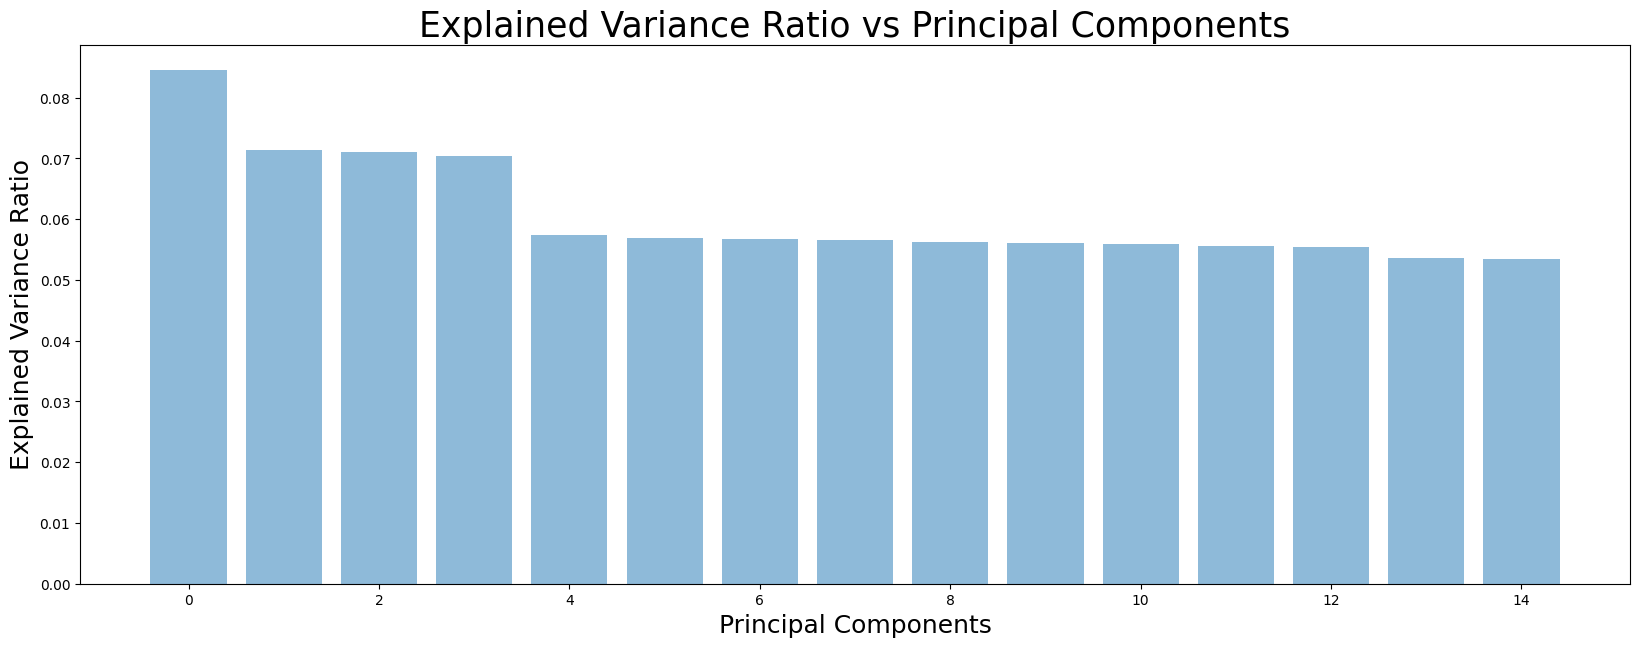

In [54]:
background_color = "#ffffff"
fig = plt.figure(figsize=(20,7), facecolor=background_color)
plt.bar(range(n+1), reduced_exp_variance, alpha=0.5, align='center', label='Individual Explained Variance')
plt.ylabel('Explained Variance Ratio',  fontsize = 18)
plt.xlabel('Principal Components', fontsize = 18)
plt.title('Explained Variance Ratio vs Principal Components', fontsize = 25)
plt.show()

Se muestra que el valor se encuentra en los primeros 14 componentes, ya que explican la mayor parte de la varianza; se utilizarán para la aplicación del PCA

In [55]:
# SVM Random Over 
oversampler = RandomOverSampler(random_state=42)
X_over, y_over = oversampler.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

pca = PCA(n_components=n)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

svm_over = SVC(kernel='rbf')
svm_over.fit(X_train, y_train)
svm_over.score(X_test, y_test)

0.6134955244434244

In [56]:
# SVM Original
X = df_scaled.drop("Alzheimer’s Diagnosis_Yes", axis=1)
y = df_scaled['Alzheimer’s Diagnosis_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pca = PCA(n_components=n)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.6191021067510265

In [57]:
# Decision Tree Random Over Sampling
oversampler = RandomOverSampler(random_state=42)
X_over, y_over = oversampler.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

pca = PCA(n_components=n)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

dt_over = tree.DecisionTreeClassifier()
dt_over = dt.fit(X_train, y_train)
dt_over.score(X_test, y_test)

0.6466031673169612

# Modelado

En nuestro caso, se utilizará SVM con Random Over Sampling para la optimización de hiperparámetros por medio de GridSearch

In [ ]:
# Random Over Sampling
oversampler = RandomOverSampler(random_state=42)
X_over, y_over = oversampler.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)
svm_over = SVC()

parameters = [{'C': [1, 10], 'kernel':['linear', 'rbf', 'poly'], 'gamma':['scale']}]

grid_search = GridSearchCV(estimator = svm_over,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5)
grid_search.fit(X_train, y_train)


In [ ]:
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

# Mejor modelo del GridSearch

In [ ]:
best_model = grid_search.best_estimator_
accuracy_best_model = grid_search.best_score_
y_pred = best_model.predict(X_test)

A continuación se grafica visualmente la matriz de confusión

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap (SVM - Random Over Sampling)")
plt.show()

# Evaluación del modelo

Para no afectar valores que ya fueron ejecutados, para este paso se decidió entrenar los modelos nuevamente.

In [ ]:
# SVM Random Over Sampling
# En este caso, este fue el mejor modelo antes de GridSearch
oversampler = RandomOverSampler(random_state=42)
X_over, y_over = oversampler.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)
svm_over = SVC(kernel='rbf')
svm_over.fit(X_train, y_train)
accuracy_svm_default = svm_over.score(X_test, y_test)

# Resultados Del GridSearch 

A continuación, se mostrará una gráfica que compara el modelo SVM, tanto con GridSearch, como sin este.

In [ ]:
results = [
    ["SVM con GridSearch", accuracy_best_model],
    ["SVM RBF Sin GridSearch", accuracy_svm_default]
]
df_results = pd.DataFrame(results, columns=["Model", "Accuracy"])

plt.figure(figsize=(6, 5))
sns.barplot(data=df_results, x="Model", y="Accuracy", palette="Blues")
plt.xlabel("Model Type")
plt.ylabel("Accuracy")
plt.title("Model Comparison: GridSearch Best vs SVM RBF")
plt.show()

# Sin Terminar todavía
-----------------------------------------------

In [ ]:
models_to_evaluate = ["Decision Tree", "Logistic Regression", "SVM", "Neural Network"]
evaluation_results = []

# Visualización de matriz de confusión
def plot_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Sí"], yticklabels=["No", "Sí"])
    plt.xlabel("Predicho")
    plt.ylabel("Real")
    plt.title(f"Matriz de Confusión: {title}")
    plt.show()


for model_name in models_to_evaluate:
    for dataset_name, X_tr, y_tr in zip(["Original", "Near Miss", "SMOTE", "RandomUnderSampler", "RandomOverSampler"],
                                        [X_train, X_train_nm, X_train_sm, X_train_rus, X_train_ros],
                                        [X_train, X_train_nm, X_train_sm, X_train_rus, X_train_ros]):

        if model_name == "Neural Network":
            model = keras.Sequential([])
            model.add(keras.Input(shape=(X_train.shape[1],)))
            model.add(keras.layers.Dense(32, activation='relu'))
            model.add(keras.layers.Dense(16, activation='relu'))
            model.add(keras.layers.Dense(8, activation='relu'))
            model.add(keras.layers.Dense(1, activation='sigmoid'))
            model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
            model.fit(X_tr, y_tr, epochs=10, batch_size=16, verbose=0, validation_split=0.2)
            y_pred = (model.predict(X_test) > 0.5).astype("int32")
        else:
            model = models[model_name]
            model.fit(X_tr, y_tr)
            y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        evaluation_results.append([model_name, dataset_name, accuracy, precision, recall, f1, model])

evaluation_df = pd.DataFrame(evaluation_results, columns=["Modelo", "Dataset", "Accuracy", "Precision", "Recall", "F1-Score", "Model(Object)"])
print(evaluation_df)

In [ ]:
best_model_row = evaluation_df.loc[evaluation_df["Accuracy"].idxmax()]
best_model = best_model_row["Model(Object)"]

# Mostrar matriz de confusión para el mejor modelo
plot_confusion_matrix(best_model, X_test_selected, y_test, best_model_row["Modelo"])

# Comparación antes y después de balanceo
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train, palette='viridis')
plt.title("Distribución de Clases Antes del Balanceo")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_sm, palette='viridis')
plt.title("Distribución de Clases Después del Balanceo (SMOTE)")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.show()

# Comparación de modelos
evaluation_df.plot(x='Modelo', y=['Accuracy', 'Precision', 'Recall', 'F1-Score'], kind='bar', figsize=(10, 6))
plt.title("Comparación de Modelos en Diferentes Métricas")
plt.ylabel("Valor")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Configuración del tamaño del gráfico
plt.figure(figsize=(12, 6))

# Gráfico de barras apilado
evaluation_df.set_index(['Modelo', 'Dataset'])[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(
    kind='bar', figsize=(12, 6), colormap='viridis', width=0.8)

plt.title("Comparación de Modelos en Diferentes Métricas")
plt.ylabel("Valor")
plt.xticks(rotation=45)
plt.legend(title="Métrica")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
def plot_radar_chart(df, modelo):
    """
    Genera un gráfico radar (spider chart) para visualizar las métricas de un modelo específico.
    """
    categorias = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

    valores = df[df["Modelo"] == modelo][categorias].mean().values  # Promedio de los datasets
    valores = np.append(valores, valores[0])  # Cerrar el círculo

    # Ángulos para el radar
    num_vars = len(categorias)
    angulos = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angulos += angulos[:1]  # Cerrar la forma

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.fill(angulos, valores, color='blue', alpha=0.25)
    ax.plot(angulos, valores, color='blue', linewidth=2)

    # Etiquetas
    ax.set_xticks(angulos[:-1])
    ax.set_xticklabels(categorias, fontsize=12)
    ax.set_yticklabels([])
    ax.set_title(f"Rendimiento del Modelo: {modelo}", fontsize=14)

    plt.show()

# Ejemplo con Neural Network
plot_radar_chart(evaluation_df, "Neural Network")

## Análisis de evaluación 

1. Comparación entre métricas de modelos

La evaluación de los modelos se realizó con las métricas: Accuracy, Precision, Recall y F1-Score.

* Accuracy: El modelo con mejor accuracy es Neural Network con SMOTE (0.7228), seguido de SVM con datos originales (0.7195) y Logistic Regression con SMOTE (0.7144). Esto es sin contar las ejecuciones de los modelos anteriores, donde, en general, el modelo con mejor accuracy es Neural Network con SMOTE (0.7256)
* Precision: La precisión más alta es obtenida por Logistic Regression con SMOTE (0.6356) y Neural Network con datos originales (0.6593), y esto indica que cuando predicen la presencia de Alzheimer, son modelos confiables.
* Recall: El mejor recall lo obtuvo SVM con Near Miss (0.7610) y SVM con SMOTE (0.7501). Debido a esto se concluye que estos modelos identificaron mejor los casos positivos.
* F1-Score: La métrica que balancea precisión y recall tiene sus mejores valores en Neural Network con SMOTE (0.6721) y SVM con SMOTE (0.6818).


Con este análisis, podemos concluir que Neural Network con SMOTE es el mejor modelo, ya que logra el mejor balance entre todas las métricas, mostrando que no solamente se predice correctamente, sino que mantiene un buen recall y precisión a su vez.

2. Impacto del Balanceo de Clases
Se analizaron los efectos de las técnicas de balanceo Near Miss y SMOTE y se concluyó lo siguiente:

* SMOTE mejoró la mayoría de los modelos, logrando mejores valores en accuracy y recall al generar datos sintéticos en la clase minoritaria, sobre todo con Neural Network, como ya vimos.
* Near Miss redujo el rendimiento en general, ya que al eliminar datos puede haber perdido información relevante.


3. Interpretación de la matriz de confusión
La Matriz de Confusión del mejor modelo (Neural Network con SMOTE) mostró:

Altos valores en la diagonal principal, lo que indica que predice correctamente la mayoría de los casos. Hubieron errores pero no considerables para tomar el modelo como malo.

Hubieron menos falsos negativos comparado con otros modelos, lo cual es importante en caso de problemas médicos, ya que identificar correctamente casos positivos es lo más importante.

Con esto se puede concluir que Neural Network con SMOTE no solo obtuvo el mejor accuracy, sino que su matriz de confusión confirma que es el más confiable en la detección de Alzheimer.

# Interpretación de resultados

## Evaluación del impacto del balanceo de clases 

Los datos antes del balanceo de clases mostraron una pequeña desproporción con la variable objetivo, haciendo que pudiera afectar el rendimiento de los modelos. Debido a esto, se aplicaron técnicas de **Near Miss** (undersampling) y **SMOTE** (oversampling) para equilibrar las clases.
Los resultados obtenidos mostraron que:
- **SMOTE** mejoró el rendimiento en la mayoría de los modelos, especialmente en Neural Network y Logistic Regression.
- **Near Miss** generalmente disminuyó la precisión debido a la eliminación de datos relevantes, por lo que no funcionó mucho para este proyecto
- **SVM** y **Neural Network** se beneficiaron más del balanceo, obteniendo su mayor accuracy con SMOTE. Estos modelos se utilizaron para seguir con la evaluación.


## Importancia de las características y PCA

Se aplicó PCA para reducir la dimensionalidad y mejorar el desempeño de los modelos. PCA logra esto eliminando ruido y redundancias en las variables, lo que es útil para este proyecto.
Los obtenidos mostraron que:
- **Neural Network con SMOTE y PCA obtuvo un accuracy de 71.76%**, manteniendo un buen desempeño con menos características. Este fue, por mucho, el mejor accuracy de todos nuestros modelos
- **SVM y Logistic Regression mostraron una ligera disminución en accuracy tras haber aplicado PCA**, esto muestra que esta reducción de características no fue beneficiosa para estos modelos.
- En general, PCA nos permitió mejorar la eficiencia sin sacrificar demasiado el rendimiento, aunque no para todos los modelos.

## Conclusiones y visualización de resultados

Con este proyecto se pudo demostrar la importancia de realizar un pipeline completo de Machine Learning para el entrenamiento de modelos paraciertos proyectos, en este caso para un proyecto sobre Alzheimer. Se realizaron múltiples experimentos con técnicas de balanceo de clases, selección de características y optimización de hiperparámetros, para de esta forma poder construir el mejor modelo posible y obtener los mejores resultados.

1. **Neural Network con SMOTE y Grid Search es el mejor modelo**, alcanzando una accuracy superior a los otros métodos.
2. **SMOTE es la mejor estrategia de balanceo**, ya que permitió mejorar la precisión sin perder información relevante.
3. **PCA ayudó a reducir la complejidad del modelo**, aunque su impacto en la precisión varió según el algoritmo.
